## Data Preprocessing: Feasture Scaling

1. Rescaling Data
2. Normalizing Data
3. Standardizing Data

[More Information](https://machinelearningmastery.com/prepare-data-machine-learning-python-scikit-learn/)


[Data Description](https://www.kaggle.com/uciml/pima-indians-diabetes-database)


### <font color='red'>numerical inputs only. Have to code in data (no categories), Then need to decode on the back side. Each row would have a category row with all options. Applicable cat is 1 and non-applicables are 0. If there are three categories, there are 3 colums, but only one would ever have a 1 in it.</font>

In [1]:
# Rescale data (between 0 and 1)
import pandas
import scipy
import numpy
from sklearn.preprocessing import MinMaxScaler

dataframe = pandas.read_csv("./files/prims.csv")
array = dataframe.values

X = array[:,:8]
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX=scaler.fit_transform(X)

numpy.set_printoptions(precision=3)
print(rescaledX[0:5,:])


[[0.353 0.744 0.59  0.354 0.    0.501 0.234 0.483]
 [0.059 0.427 0.541 0.293 0.    0.396 0.117 0.167]
 [0.471 0.92  0.525 0.    0.    0.347 0.254 0.183]
 [0.059 0.447 0.541 0.232 0.111 0.419 0.038 0.   ]
 [0.    0.688 0.328 0.354 0.199 0.642 0.944 0.2  ]]


### <font color='red'>min max scaler makes every value in set between the range. why is that important? Disadvantes: may loose some information, scaling may cause all values to be in one cluster because they are so tiny and close. Scaling with clustering can be problematic</font>

### <font color='red'>also, scaling happens on the training data, not on all the data, and the scaled values in the test set may be different.</font>

In [2]:
# Normalize data (length of 1)
#Normalizing in scikit-learn refers to rescaling each observation (row) to have a length of 1 (called a unit norm in linear algebra).

from sklearn.preprocessing import Normalizer
import pandas
import numpy

dataframe = pandas.read_csv("./files/prims.csv")
array = dataframe.values

X = array[:,0:8]
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)

numpy.set_printoptions(precision=3)
print(normalizedX[0:5,:])

 

[[0.034 0.828 0.403 0.196 0.    0.188 0.004 0.28 ]
 [0.008 0.716 0.556 0.244 0.    0.224 0.003 0.261]
 [0.04  0.924 0.323 0.    0.    0.118 0.003 0.162]
 [0.007 0.588 0.436 0.152 0.622 0.186 0.001 0.139]
 [0.    0.596 0.174 0.152 0.731 0.188 0.01  0.144]]


In [3]:
# Standardize data (0 mean, 1 stdev)
# Standardization is a useful technique to transform attributes with a Gaussian distribution and differing means and standard deviations to a standard Gaussian distribution with a mean of 0 and a standard deviation of 1.

"""
scaled_train =  (train - train_mean) / train_std_deviation
scaled_test = (test - train_mean) / train_std_deviation
"""


import pandas
import numpy
from sklearn.preprocessing import StandardScaler 

dataframe = pandas.read_csv("./files/prims.csv")
array = dataframe.values

 
X = array[:700,:8]
 
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)

numpy.set_printoptions(precision=3)
print(rescaledX[0:5,:])

std = numpy.std(rescaledX,axis=0)
print(std)
print("\n")


test=scaler.transform(array[700:,:8])

print(test[0:5,:])

std = numpy.std(test,axis=0)
print(std)

[[ 0.646  0.853  0.16   0.912 -0.692  0.215  0.448  1.433]
 [-0.841 -1.104 -0.147  0.538 -0.692 -0.666 -0.371 -0.18 ]
 [ 1.241  1.941 -0.25  -1.272 -0.692 -1.081  0.581 -0.095]
 [-0.841 -0.98  -0.147  0.163  0.122 -0.477 -0.917 -1.03 ]
 [-1.138  0.511 -1.479  0.912  0.763  1.411  5.375 -0.011]]
[1. 1. 1. 1. 1. 1. 1. 1.]


[[-0.543  0.045  0.365  0.413  1.04   0.505  0.021 -0.605]
 [ 0.646  0.139  0.467  0.663 -0.692 -0.54   0.264  1.348]
 [-0.841  1.475  0.979  0.538 -0.692  0.391  1.273  1.603]
 [-0.543  0.263 -3.527 -1.272 -0.692  0.832 -0.51   0.669]
 [ 0.051 -0.328  0.365 -0.024  0.174 -0.439 -1.062 -0.52 ]]
[1.016 0.907 0.879 0.937 0.966 0.892 0.764 0.971]


# Neural Network 

## Feedforward

[Code](https://enlight.nyc/projects/neural-network/)

In [4]:
import numpy as np

# X = (hours sleeping, hours studying), y = score on test
X = np.array(([2, 9], [1, 5], [3, 6]), dtype=float)
y = np.array(([92], [86], [89]), dtype=float)

# scale units
X = X/np.amax(X, axis=0) # maximum of X array
y = y/100 # max test score is 100

class Neural_Network(object):
  def __init__(self):
    #parameters
    #2 input values
    self.inputSize = 2
    #1 output var, score
    self.outputSize = 1
    #3 nodes
    self.hiddenSize = 3

    #weights
    #initialize weights randomly, is a matrix
    self.W1 = np.random.randn(self.inputSize, self.hiddenSize) # (3x2) weight matrix from input to hidden layer
    self.W2 = np.random.randn(self.hiddenSize, self.outputSize) # (3x1) weight matrix from hidden to output layer

  def forward(self, X):
    #forward propagation through our network
    self.z = np.dot(X, self.W1) # dot product of X (input) and first set of 3x2 weights
    self.z2 = self.sigmoid(self.z) # activation function
    self.z3 = np.dot(self.z2, self.W2) # dot product of hidden layer (z2) and second set of 3x1 weights
    o = self.sigmoid(self.z3) # final activation function
    return o

  def sigmoid(self, s):
    # activation function
    return 1/(1+np.exp(-s))

NN = Neural_Network()

#defining our output
o = NN.forward(X)

print("Predicted Output: \n" + str(o))
print ("Actual Output: \n" + str(y))

Predicted Output: 
[[0.1  ]
 [0.128]
 [0.083]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]


# Neural Network 

## Feedforward and Backpropagation



In [5]:
import numpy as np

#this is the test data
# X = (hours studying, hours sleeping), y = score on test, xPredicted = 4 hours studying & 8 hours sleeping (input data for prediction)
X = np.array(([2, 9], [1, 5], [3, 6]), dtype=float)
y = np.array(([92], [86], [89]), dtype=float)
xPredicted = np.array(([4,8]), dtype=float)

# scale units
X = X/np.amax(X, axis=0) # maximum of X array
xPredicted = xPredicted/np.amax(xPredicted, axis=0) # maximum of xPredicted (our input data for the prediction)
y = y/100 # max test score is 100

class Neural_Network(object):
  def __init__(self):
  #parameters
    self.inputSize = 2
    self.outputSize = 1
    self.hiddenSize = 3

  #weights
    self.W1 = np.random.randn(self.inputSize, self.hiddenSize) # (3x2) weight matrix from input to hidden layer
    self.W2 = np.random.randn(self.hiddenSize, self.outputSize) # (3x1) weight matrix from hidden to output layer

  def forward(self, X):
    #forward propagation through our network
    self.z = np.dot(X, self.W1) # dot product of X (input) and first set of 3x2 weights
    self.z2 = self.sigmoid(self.z) # activation function
    self.z3 = np.dot(self.z2, self.W2) # dot product of hidden layer (z2) and second set of 3x1 weights
    o = self.sigmoid(self.z3) # final activation function
    return o

  def sigmoid(self, s):
    # activation function
    return 1/(1+np.exp(-s))

  def sigmoidPrime(self, s):
    #derivative of sigmoid
    return s * (1 - s)

  def backward(self, X, y, o):
    # backward propagate through the network
    self.o_error = y - o # error in output
    self.o_delta = self.o_error*self.sigmoidPrime(o) # applying derivative of sigmoid to error

    self.z2_error = self.o_delta.dot(self.W2.T) # z2 error: how much our hidden layer weights contributed to output error
    self.z2_delta = self.z2_error*self.sigmoidPrime(self.z2) # applying derivative of sigmoid to z2 error

    self.W1 += X.T.dot(self.z2_delta) # adjusting first set (input --> hidden) weights
    self.W2 += self.z2.T.dot(self.o_delta) # adjusting second set (hidden --> output) weights

  def train(self, X, y):
    o = self.forward(X)
    self.backward(X, y, o)

  def saveWeights(self):
    np.savetxt("w1.txt", self.W1, fmt="%s")
    np.savetxt("w2.txt", self.W2, fmt="%s")

  def predict(self):
    print ("Predicted data based on trained weights: ")
    print ("Input (scaled): \n" + str(xPredicted))
    print ("Output: \n" + str(self.forward(xPredicted)));

NN = Neural_Network()
for i in range(0,10): # trains the NN 1,000 times
  print("# " + str(i) + "\n")
  print("Input (scaled): \n" + str(X))
  print("Actual Output: \n" + str(y))
  print("Predicted Output: \n" + str(NN.forward(X)))
  print("Loss: \n" + str(np.mean(np.square(y - NN.forward(X))))) # mean sum squared loss
  print ("\n")
  NN.train(X, y)

NN.saveWeights()
NN.predict()

# 0

Input (scaled): 
[[0.667 1.   ]
 [0.333 0.556]
 [1.    0.667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
[[0.058]
 [0.072]
 [0.053]]
Loss: 
0.6883521577073353


# 1

Input (scaled): 
[[0.667 1.   ]
 [0.333 0.556]
 [1.    0.667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
[[0.068]
 [0.083]
 [0.063]]
Loss: 
0.6709439581523112


# 2

Input (scaled): 
[[0.667 1.   ]
 [0.333 0.556]
 [1.    0.667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
[[0.082]
 [0.098]
 [0.076]]
Loss: 
0.6487727743946315


# 3

Input (scaled): 
[[0.667 1.   ]
 [0.333 0.556]
 [1.    0.667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
[[0.1  ]
 [0.116]
 [0.093]]
Loss: 
0.620307413478355


# 4

Input (scaled): 
[[0.667 1.   ]
 [0.333 0.556]
 [1.    0.667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
[[0.124]
 [0.14 ]
 [0.116]]
Loss: 
0.5837050809421456


# 5

Input (scaled): 
[[0.667 1.   ]
 [0.333 0.556]
 [1.    0.667]]
Actual Output

In [6]:
from sklearn.neural_network import MLPClassifier
help(MLPClassifier)

Help on class MLPClassifier in module sklearn.neural_network.multilayer_perceptron:

class MLPClassifier(BaseMultilayerPerceptron, sklearn.base.ClassifierMixin)
 |  Multi-layer Perceptron classifier.
 |  
 |  This model optimizes the log-loss function using LBFGS or stochastic
 |  gradient descent.
 |  
 |  .. versionadded:: 0.18
 |  
 |  Parameters
 |  ----------
 |  hidden_layer_sizes : tuple, length = n_layers - 2, default (100,)
 |      The ith element represents the number of neurons in the ith
 |      hidden layer.
 |  
 |  activation : {'identity', 'logistic', 'tanh', 'relu'}, default 'relu'
 |      Activation function for the hidden layer.
 |  
 |      - 'identity', no-op activation, useful to implement linear bottleneck,
 |        returns f(x) = x
 |  
 |      - 'logistic', the logistic sigmoid function,
 |        returns f(x) = 1 / (1 + exp(-x)).
 |  
 |      - 'tanh', the hyperbolic tan function,
 |        returns f(x) = tanh(x).
 |  
 |      - 'relu', the rectified linear u

### <font color='red'>what is the advantage or disadvantage when num iter is small or large</font>

### <font color='red'>small num of iterations, fast but may not converge</font>

In [7]:
from sklearn.neural_network import MLPClassifier


dataframe = pandas.read_csv("./files/prims.csv")
array = dataframe.values
X=array[:,:8]
y = array[:,8]
scaler = MinMaxScaler(feature_range=(0, 1))
X=scaler.fit_transform(X)

# rescale the data, use the traditional train/test split
X_train, X_test = X[:700], X[700:]
y_train, y_test = y[:700], y[700:]

mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10000, alpha=1e-4,
                    solver='adam', verbose=10, tol=1e-4, random_state=1)
#mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4,
#                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
#                    learning_rate_init=.1)

mlp.fit(X_train, y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))



Iteration 1, loss = 0.69225859
Iteration 2, loss = 0.68286383
Iteration 3, loss = 0.67564925
Iteration 4, loss = 0.66941684
Iteration 5, loss = 0.66401914
Iteration 6, loss = 0.66004404
Iteration 7, loss = 0.65619876
Iteration 8, loss = 0.65268342
Iteration 9, loss = 0.64974644
Iteration 10, loss = 0.64698598
Iteration 11, loss = 0.64431285
Iteration 12, loss = 0.64173960
Iteration 13, loss = 0.63922889
Iteration 14, loss = 0.63679691
Iteration 15, loss = 0.63425251
Iteration 16, loss = 0.63186714
Iteration 17, loss = 0.62935345
Iteration 18, loss = 0.62690308
Iteration 19, loss = 0.62411275
Iteration 20, loss = 0.62153795
Iteration 21, loss = 0.61873835
Iteration 22, loss = 0.61591680
Iteration 23, loss = 0.61303832
Iteration 24, loss = 0.61015721
Iteration 25, loss = 0.60733694
Iteration 26, loss = 0.60470102
Iteration 27, loss = 0.60239766
Iteration 28, loss = 0.59998877
Iteration 29, loss = 0.59782174
Iteration 30, loss = 0.59573785
Iteration 31, loss = 0.59376595
Iteration 32, los

#### In the above code, play on the hyperparameters 

### <font color='red'>any classifier can be made into a regressor</font>

### <font color='red'>output comes with ranges instead of binary/classes. With regression, there are thresholds, because the answer is numeric, not classed, it has ranges</font>

In [8]:
from sklearn.neural_network import MLPRegressor
help(MLPRegressor)

Help on class MLPRegressor in module sklearn.neural_network.multilayer_perceptron:

class MLPRegressor(BaseMultilayerPerceptron, sklearn.base.RegressorMixin)
 |  Multi-layer Perceptron regressor.
 |  
 |  This model optimizes the squared-loss using LBFGS or stochastic gradient
 |  descent.
 |  
 |  .. versionadded:: 0.18
 |  
 |  Parameters
 |  ----------
 |  hidden_layer_sizes : tuple, length = n_layers - 2, default (100,)
 |      The ith element represents the number of neurons in the ith
 |      hidden layer.
 |  
 |  activation : {'identity', 'logistic', 'tanh', 'relu'}, default 'relu'
 |      Activation function for the hidden layer.
 |  
 |      - 'identity', no-op activation, useful to implement linear bottleneck,
 |        returns f(x) = x
 |  
 |      - 'logistic', the logistic sigmoid function,
 |        returns f(x) = 1 / (1 + exp(-x)).
 |  
 |      - 'tanh', the hyperbolic tan function,
 |        returns f(x) = tanh(x).
 |  
 |      - 'relu', the rectified linear unit funct

### <font color='red'>must put seed if not, there are different outpust every time. Don't forget the seed</font>

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor

#http://www.machinelearningtutorial.net/2017/01/28/python-scikit-simple-function-approximation/

#don't for get the seed, solutions are differnig without a set seed
np.random.seed(3)
n = 20
x = np.random.uniform(-15, 15, size = n)
#y is a predictor for x, the random thing is noise added to the data
y = x**2 + 2*np.random.randn(n, )
X = np.reshape(x ,[n, 1]) 
y = np.reshape(y ,[n ,])

#if verbose false, results won't show
clf = MLPRegressor(alpha=0.001, hidden_layer_sizes = (10,), max_iter = 50000, 
                 activation = 'logistic', verbose = 'True', learning_rate = 'adaptive')

"""
clf = MLPRegressor(alpha=0.1, hidden_layer_sizes = (10,), max_iter = 50000, 
                 activation = 'logistic', verbose = 'True', learning_rate = 'adaptive')
"""
a = clf.fit(X, y)

mlp.fit(X_)

Iteration 1, loss = 4576.85361484
Iteration 2, loss = 4576.29953733
Iteration 3, loss = 4575.74594857
Iteration 4, loss = 4575.19286444
Iteration 5, loss = 4574.64030059
Iteration 6, loss = 4574.08827245
Iteration 7, loss = 4573.53679519
Iteration 8, loss = 4572.98588368
Iteration 9, loss = 4572.43555249
Iteration 10, loss = 4571.88581588
Iteration 11, loss = 4571.33668775
Iteration 12, loss = 4570.78818165
Iteration 13, loss = 4570.24031074
Iteration 14, loss = 4569.69308778
Iteration 15, loss = 4569.14652512
Iteration 16, loss = 4568.60063466
Iteration 17, loss = 4568.05542787
Iteration 18, loss = 4567.51091573
Iteration 19, loss = 4566.96710874
Iteration 20, loss = 4566.42401690
Iteration 21, loss = 4565.88164967
Iteration 22, loss = 4565.34001600
Iteration 23, loss = 4564.79912426
Iteration 24, loss = 4564.25898227
Iteration 25, loss = 4563.71959730
Iteration 26, loss = 4563.18097603
Iteration 27, loss = 4562.64312462
Iteration 28, loss = 4562.10604868
Iteration 29, loss = 4561.569

Iteration 424, loss = 4365.51683418
Iteration 425, loss = 4364.95564466
Iteration 426, loss = 4364.39385220
Iteration 427, loss = 4363.83144941
Iteration 428, loss = 4363.26842908
Iteration 429, loss = 4362.70478432
Iteration 430, loss = 4362.14050854
Iteration 431, loss = 4361.57559552
Iteration 432, loss = 4361.01003945
Iteration 433, loss = 4360.44383499
Iteration 434, loss = 4359.87697725
Iteration 435, loss = 4359.30946192
Iteration 436, loss = 4358.74128523
Iteration 437, loss = 4358.17244404
Iteration 438, loss = 4357.60293585
Iteration 439, loss = 4357.03275887
Iteration 440, loss = 4356.46191201
Iteration 441, loss = 4355.89039494
Iteration 442, loss = 4355.31820812
Iteration 443, loss = 4354.74535284
Iteration 444, loss = 4354.17183122
Iteration 445, loss = 4353.59764625
Iteration 446, loss = 4353.02280180
Iteration 447, loss = 4352.44730267
Iteration 448, loss = 4351.87115457
Iteration 449, loss = 4351.29436413
Iteration 450, loss = 4350.71693894
Iteration 451, loss = 4350.1

Iteration 711, loss = 4197.30025035
Iteration 712, loss = 4196.66690989
Iteration 713, loss = 4196.03214936
Iteration 714, loss = 4195.39593624
Iteration 715, loss = 4194.75823732
Iteration 716, loss = 4194.11901845
Iteration 717, loss = 4193.47824454
Iteration 718, loss = 4192.83587959
Iteration 719, loss = 4192.19188697
Iteration 720, loss = 4191.54622981
Iteration 721, loss = 4190.89887141
Iteration 722, loss = 4190.24977585
Iteration 723, loss = 4189.59890856
Iteration 724, loss = 4188.94623695
Iteration 725, loss = 4188.29173103
Iteration 726, loss = 4187.63536401
Iteration 727, loss = 4186.97711289
Iteration 728, loss = 4186.31695894
Iteration 729, loss = 4185.65488822
Iteration 730, loss = 4184.99089196
Iteration 731, loss = 4184.32496695
Iteration 732, loss = 4183.65711580
Iteration 733, loss = 4182.98734720
Iteration 734, loss = 4182.31567614
Iteration 735, loss = 4181.64212403
Iteration 736, loss = 4180.96671880
Iteration 737, loss = 4180.28949502
Iteration 738, loss = 4179.6

Iteration 1065, loss = 3964.30947818
Iteration 1066, loss = 3963.65020102
Iteration 1067, loss = 3962.99102364
Iteration 1068, loss = 3962.33194611
Iteration 1069, loss = 3961.67296855
Iteration 1070, loss = 3961.01409108
Iteration 1071, loss = 3960.35531389
Iteration 1072, loss = 3959.69663718
Iteration 1073, loss = 3959.03806120
Iteration 1074, loss = 3958.37958620
Iteration 1075, loss = 3957.72121250
Iteration 1076, loss = 3957.06294040
Iteration 1077, loss = 3956.40477025
Iteration 1078, loss = 3955.74670241
Iteration 1079, loss = 3955.08873725
Iteration 1080, loss = 3954.43087515
Iteration 1081, loss = 3953.77311653
Iteration 1082, loss = 3953.11546179
Iteration 1083, loss = 3952.45791133
Iteration 1084, loss = 3951.80046557
Iteration 1085, loss = 3951.14312494
Iteration 1086, loss = 3950.48588984
Iteration 1087, loss = 3949.82876068
Iteration 1088, loss = 3949.17173789
Iteration 1089, loss = 3948.51482185
Iteration 1090, loss = 3947.85801298
Iteration 1091, loss = 3947.20131165
I

Iteration 1493, loss = 3696.34627351
Iteration 1494, loss = 3695.76242060
Iteration 1495, loss = 3695.17878140
Iteration 1496, loss = 3694.59535590
Iteration 1497, loss = 3694.01214411
Iteration 1498, loss = 3693.42914604
Iteration 1499, loss = 3692.84636167
Iteration 1500, loss = 3692.26379102
Iteration 1501, loss = 3691.68143409
Iteration 1502, loss = 3691.09929088
Iteration 1503, loss = 3690.51736138
Iteration 1504, loss = 3689.93564561
Iteration 1505, loss = 3689.35414355
Iteration 1506, loss = 3688.77285521
Iteration 1507, loss = 3688.19178059
Iteration 1508, loss = 3687.61091969
Iteration 1509, loss = 3687.03027250
Iteration 1510, loss = 3686.44983902
Iteration 1511, loss = 3685.86961925
Iteration 1512, loss = 3685.28961319
Iteration 1513, loss = 3684.70982083
Iteration 1514, loss = 3684.13024216
Iteration 1515, loss = 3683.55087719
Iteration 1516, loss = 3682.97172591
Iteration 1517, loss = 3682.39278830
Iteration 1518, loss = 3681.81406438
Iteration 1519, loss = 3681.23555412
I

Iteration 1892, loss = 3480.07121831
Iteration 1893, loss = 3479.56993788
Iteration 1894, loss = 3479.06885328
Iteration 1895, loss = 3478.56796444
Iteration 1896, loss = 3478.06727131
Iteration 1897, loss = 3477.56677380
Iteration 1898, loss = 3477.06647185
Iteration 1899, loss = 3476.56636540
Iteration 1900, loss = 3476.06645438
Iteration 1901, loss = 3475.56673872
Iteration 1902, loss = 3475.06721836
Iteration 1903, loss = 3474.56789323
Iteration 1904, loss = 3474.06876325
Iteration 1905, loss = 3473.56982837
Iteration 1906, loss = 3473.07108852
Iteration 1907, loss = 3472.57254363
Iteration 1908, loss = 3472.07419363
Iteration 1909, loss = 3471.57603846
Iteration 1910, loss = 3471.07807805
Iteration 1911, loss = 3470.58031232
Iteration 1912, loss = 3470.08274122
Iteration 1913, loss = 3469.58536468
Iteration 1914, loss = 3469.08818263
Iteration 1915, loss = 3468.59119500
Iteration 1916, loss = 3468.09440172
Iteration 1917, loss = 3467.59780273
Iteration 1918, loss = 3467.10139797
I

Iteration 2219, loss = 3326.19795650
Iteration 2220, loss = 3325.75708715
Iteration 2221, loss = 3325.31639147
Iteration 2222, loss = 3324.87586937
Iteration 2223, loss = 3324.43552079
Iteration 2224, loss = 3323.99534568
Iteration 2225, loss = 3323.55534395
Iteration 2226, loss = 3323.11551556
Iteration 2227, loss = 3322.67586042
Iteration 2228, loss = 3322.23637849
Iteration 2229, loss = 3321.79706968
Iteration 2230, loss = 3321.35793393
Iteration 2231, loss = 3320.91897119
Iteration 2232, loss = 3320.48018137
Iteration 2233, loss = 3320.04156443
Iteration 2234, loss = 3319.60312028
Iteration 2235, loss = 3319.16484887
Iteration 2236, loss = 3318.72675013
Iteration 2237, loss = 3318.28882400
Iteration 2238, loss = 3317.85107040
Iteration 2239, loss = 3317.41348928
Iteration 2240, loss = 3316.97608057
Iteration 2241, loss = 3316.53884420
Iteration 2242, loss = 3316.10178010
Iteration 2243, loss = 3315.66488822
Iteration 2244, loss = 3315.22816848
Iteration 2245, loss = 3314.79162083
I

Iteration 2654, loss = 3149.95419192
Iteration 2655, loss = 3149.58302163
Iteration 2656, loss = 3149.21199905
Iteration 2657, loss = 3148.84112412
Iteration 2658, loss = 3148.47039678
Iteration 2659, loss = 3148.09981699
Iteration 2660, loss = 3147.72938468
Iteration 2661, loss = 3147.35909982
Iteration 2662, loss = 3146.98896233
Iteration 2663, loss = 3146.61897218
Iteration 2664, loss = 3146.24912931
Iteration 2665, loss = 3145.87943367
Iteration 2666, loss = 3145.50988520
Iteration 2667, loss = 3145.14048385
Iteration 2668, loss = 3144.77122956
Iteration 2669, loss = 3144.40212230
Iteration 2670, loss = 3144.03316200
Iteration 2671, loss = 3143.66434861
Iteration 2672, loss = 3143.29568208
Iteration 2673, loss = 3142.92716235
Iteration 2674, loss = 3142.55878938
Iteration 2675, loss = 3142.19056311
Iteration 2676, loss = 3141.82248350
Iteration 2677, loss = 3141.45455047
Iteration 2678, loss = 3141.08676400
Iteration 2679, loss = 3140.71912401
Iteration 2680, loss = 3140.35163047
I

Iteration 2947, loss = 3047.30939219
Iteration 2948, loss = 3046.97936167
Iteration 2949, loss = 3046.64946463
Iteration 2950, loss = 3046.31970104
Iteration 2951, loss = 3045.99007084
Iteration 2952, loss = 3045.66057399
Iteration 2953, loss = 3045.33121045
Iteration 2954, loss = 3045.00198017
Iteration 2955, loss = 3044.67288311
Iteration 2956, loss = 3044.34391922
Iteration 2957, loss = 3044.01508847
Iteration 2958, loss = 3043.68639080
Iteration 2959, loss = 3043.35782618
Iteration 2960, loss = 3043.02939455
Iteration 2961, loss = 3042.70109588
Iteration 2962, loss = 3042.37293012
Iteration 2963, loss = 3042.04489722
Iteration 2964, loss = 3041.71699715
Iteration 2965, loss = 3041.38922986
Iteration 2966, loss = 3041.06159530
Iteration 2967, loss = 3040.73409342
Iteration 2968, loss = 3040.40672420
Iteration 2969, loss = 3040.07948758
Iteration 2970, loss = 3039.75238352
Iteration 2971, loss = 3039.42541197
Iteration 2972, loss = 3039.09857290
Iteration 2973, loss = 3038.77186625
I

Iteration 3300, loss = 2938.79541791
Iteration 3301, loss = 2938.50993304
Iteration 3302, loss = 2938.22456751
Iteration 3303, loss = 2937.93932129
Iteration 3304, loss = 2937.65419434
Iteration 3305, loss = 2937.36918662
Iteration 3306, loss = 2937.08429810
Iteration 3307, loss = 2936.79952874
Iteration 3308, loss = 2936.51487850
Iteration 3309, loss = 2936.23034735
Iteration 3310, loss = 2935.94593525
Iteration 3311, loss = 2935.66164217
Iteration 3312, loss = 2935.37746807
Iteration 3313, loss = 2935.09341291
Iteration 3314, loss = 2934.80947666
Iteration 3315, loss = 2934.52565929
Iteration 3316, loss = 2934.24196075
Iteration 3317, loss = 2933.95838101
Iteration 3318, loss = 2933.67492004
Iteration 3319, loss = 2933.39157780
Iteration 3320, loss = 2933.10835425
Iteration 3321, loss = 2932.82524935
Iteration 3322, loss = 2932.54226308
Iteration 3323, loss = 2932.25939540
Iteration 3324, loss = 2931.97664626
Iteration 3325, loss = 2931.69401564
Iteration 3326, loss = 2931.41150350
I

Iteration 3654, loss = 2844.93724321
Iteration 3655, loss = 2844.69188027
Iteration 3656, loss = 2844.44662498
Iteration 3657, loss = 2844.20147732
Iteration 3658, loss = 2843.95643725
Iteration 3659, loss = 2843.71150475
Iteration 3660, loss = 2843.46667978
Iteration 3661, loss = 2843.22196231
Iteration 3662, loss = 2842.97735231
Iteration 3663, loss = 2842.73284976
Iteration 3664, loss = 2842.48845462
Iteration 3665, loss = 2842.24416686
Iteration 3666, loss = 2841.99998646
Iteration 3667, loss = 2841.75591337
Iteration 3668, loss = 2841.51194758
Iteration 3669, loss = 2841.26808905
Iteration 3670, loss = 2841.02433776
Iteration 3671, loss = 2840.78069366
Iteration 3672, loss = 2840.53715674
Iteration 3673, loss = 2840.29372696
Iteration 3674, loss = 2840.05040430
Iteration 3675, loss = 2839.80718871
Iteration 3676, loss = 2839.56408018
Iteration 3677, loss = 2839.32107867
Iteration 3678, loss = 2839.07818415
Iteration 3679, loss = 2838.83539659
Iteration 3680, loss = 2838.59271597
I

Iteration 4011, loss = 2763.96502334
Iteration 4012, loss = 2763.75626775
Iteration 4013, loss = 2763.54760980
Iteration 4014, loss = 2763.33904946
Iteration 4015, loss = 2763.13058672
Iteration 4016, loss = 2762.92222154
Iteration 4017, loss = 2762.71395390
Iteration 4018, loss = 2762.50578376
Iteration 4019, loss = 2762.29771112
Iteration 4020, loss = 2762.08973593
Iteration 4021, loss = 2761.88185818
Iteration 4022, loss = 2761.67407783
Iteration 4023, loss = 2761.46639487
Iteration 4024, loss = 2761.25880926
Iteration 4025, loss = 2761.05132098
Iteration 4026, loss = 2760.84393000
Iteration 4027, loss = 2760.63663630
Iteration 4028, loss = 2760.42943985
Iteration 4029, loss = 2760.22234063
Iteration 4030, loss = 2760.01533860
Iteration 4031, loss = 2759.80843375
Iteration 4032, loss = 2759.60162605
Iteration 4033, loss = 2759.39491546
Iteration 4034, loss = 2759.18830197
Iteration 4035, loss = 2758.98178555
Iteration 4036, loss = 2758.77536617
Iteration 4037, loss = 2758.56904381
I

Iteration 4372, loss = 2694.75137701
Iteration 4373, loss = 2694.57623290
Iteration 4374, loss = 2694.40117748
Iteration 4375, loss = 2694.22621074
Iteration 4376, loss = 2694.05133266
Iteration 4377, loss = 2693.87654319
Iteration 4378, loss = 2693.70184234
Iteration 4379, loss = 2693.52723006
Iteration 4380, loss = 2693.35270634
Iteration 4381, loss = 2693.17827115
Iteration 4382, loss = 2693.00392447
Iteration 4383, loss = 2692.82966628
Iteration 4384, loss = 2692.65549655
Iteration 4385, loss = 2692.48141526
Iteration 4386, loss = 2692.30742238
Iteration 4387, loss = 2692.13351790
Iteration 4388, loss = 2691.95970178
Iteration 4389, loss = 2691.78597401
Iteration 4390, loss = 2691.61233455
Iteration 4391, loss = 2691.43878340
Iteration 4392, loss = 2691.26532052
Iteration 4393, loss = 2691.09194588
Iteration 4394, loss = 2690.91865948
Iteration 4395, loss = 2690.74546128
Iteration 4396, loss = 2690.57235126
Iteration 4397, loss = 2690.39932939
Iteration 4398, loss = 2690.22639566
I

Iteration 4736, loss = 2636.67375982
Iteration 4737, loss = 2636.52937568
Iteration 4738, loss = 2636.38507190
Iteration 4739, loss = 2636.24084847
Iteration 4740, loss = 2636.09670537
Iteration 4741, loss = 2635.95264256
Iteration 4742, loss = 2635.80866004
Iteration 4743, loss = 2635.66475777
Iteration 4744, loss = 2635.52093573
Iteration 4745, loss = 2635.37719391
Iteration 4746, loss = 2635.23353228
Iteration 4747, loss = 2635.08995081
Iteration 4748, loss = 2634.94644949
Iteration 4749, loss = 2634.80302829
Iteration 4750, loss = 2634.65968719
Iteration 4751, loss = 2634.51642617
Iteration 4752, loss = 2634.37324521
Iteration 4753, loss = 2634.23014428
Iteration 4754, loss = 2634.08712336
Iteration 4755, loss = 2633.94418243
Iteration 4756, loss = 2633.80132147
Iteration 4757, loss = 2633.65854045
Iteration 4758, loss = 2633.51583935
Iteration 4759, loss = 2633.37321815
Iteration 4760, loss = 2633.23067683
Iteration 4761, loss = 2633.08821537
Iteration 4762, loss = 2632.94583374
I

Iteration 5100, loss = 2589.25068552
Iteration 5101, loss = 2589.13409196
Iteration 5102, loss = 2589.01757073
Iteration 5103, loss = 2588.90112180
Iteration 5104, loss = 2588.78474514
Iteration 5105, loss = 2588.66844075
Iteration 5106, loss = 2588.55220859
Iteration 5107, loss = 2588.43604865
Iteration 5108, loss = 2588.31996089
Iteration 5109, loss = 2588.20394531
Iteration 5110, loss = 2588.08800188
Iteration 5111, loss = 2587.97213057
Iteration 5112, loss = 2587.85633136
Iteration 5113, loss = 2587.74060424
Iteration 5114, loss = 2587.62494918
Iteration 5115, loss = 2587.50936615
Iteration 5116, loss = 2587.39385514
Iteration 5117, loss = 2587.27841612
Iteration 5118, loss = 2587.16304908
Iteration 5119, loss = 2587.04775398
Iteration 5120, loss = 2586.93253082
Iteration 5121, loss = 2586.81737955
Iteration 5122, loss = 2586.70230017
Iteration 5123, loss = 2586.58729266
Iteration 5124, loss = 2586.47235698
Iteration 5125, loss = 2586.35749312
Iteration 5126, loss = 2586.24270106
I

Iteration 5530, loss = 2545.49554931
Iteration 5531, loss = 2545.40801359
Iteration 5532, loss = 2545.32054063
Iteration 5533, loss = 2545.23313042
Iteration 5534, loss = 2545.14578292
Iteration 5535, loss = 2545.05849813
Iteration 5536, loss = 2544.97127601
Iteration 5537, loss = 2544.88411654
Iteration 5538, loss = 2544.79701970
Iteration 5539, loss = 2544.70998547
Iteration 5540, loss = 2544.62301382
Iteration 5541, loss = 2544.53610473
Iteration 5542, loss = 2544.44925819
Iteration 5543, loss = 2544.36247416
Iteration 5544, loss = 2544.27575262
Iteration 5545, loss = 2544.18909355
Iteration 5546, loss = 2544.10249694
Iteration 5547, loss = 2544.01596275
Iteration 5548, loss = 2543.92949096
Iteration 5549, loss = 2543.84308155
Iteration 5550, loss = 2543.75673450
Iteration 5551, loss = 2543.67044979
Iteration 5552, loss = 2543.58422739
Iteration 5553, loss = 2543.49806728
Iteration 5554, loss = 2543.41196944
Iteration 5555, loss = 2543.32593384
Iteration 5556, loss = 2543.23996047
I

Iteration 5851, loss = 2520.49578255
Iteration 5852, loss = 2520.42722076
Iteration 5853, loss = 2520.35871435
Iteration 5854, loss = 2520.29026330
Iteration 5855, loss = 2520.22186759
Iteration 5856, loss = 2520.15352719
Iteration 5857, loss = 2520.08524207
Iteration 5858, loss = 2520.01701223
Iteration 5859, loss = 2519.94883763
Iteration 5860, loss = 2519.88071824
Iteration 5861, loss = 2519.81265405
Iteration 5862, loss = 2519.74464504
Iteration 5863, loss = 2519.67669117
Iteration 5864, loss = 2519.60879242
Iteration 5865, loss = 2519.54094878
Iteration 5866, loss = 2519.47316022
Iteration 5867, loss = 2519.40542671
Iteration 5868, loss = 2519.33774823
Iteration 5869, loss = 2519.27012476
Iteration 5870, loss = 2519.20255627
Iteration 5871, loss = 2519.13504275
Iteration 5872, loss = 2519.06758416
Iteration 5873, loss = 2519.00018048
Iteration 5874, loss = 2518.93283169
Iteration 5875, loss = 2518.86553777
Iteration 5876, loss = 2518.79829870
Iteration 5877, loss = 2518.73111444
I

Iteration 6211, loss = 2499.20939202
Iteration 6212, loss = 2499.15922844
Iteration 6213, loss = 2499.10911159
Iteration 6214, loss = 2499.05904146
Iteration 6215, loss = 2499.00901801
Iteration 6216, loss = 2498.95904123
Iteration 6217, loss = 2498.90911109
Iteration 6218, loss = 2498.85922755
Iteration 6219, loss = 2498.80939061
Iteration 6220, loss = 2498.75960023
Iteration 6221, loss = 2498.70985639
Iteration 6222, loss = 2498.66015907
Iteration 6223, loss = 2498.61050824
Iteration 6224, loss = 2498.56090387
Iteration 6225, loss = 2498.51134594
Iteration 6226, loss = 2498.46183443
Iteration 6227, loss = 2498.41236931
Iteration 6228, loss = 2498.36295056
Iteration 6229, loss = 2498.31357815
Iteration 6230, loss = 2498.26425206
Iteration 6231, loss = 2498.21497226
Iteration 6232, loss = 2498.16573873
Iteration 6233, loss = 2498.11655145
Iteration 6234, loss = 2498.06741038
Iteration 6235, loss = 2498.01831551
Iteration 6236, loss = 2497.96926681
Iteration 6237, loss = 2497.92026425
I

Iteration 6573, loss = 2483.90901710
Iteration 6574, loss = 2483.87414174
Iteration 6575, loss = 2483.83930401
Iteration 6576, loss = 2483.80450391
Iteration 6577, loss = 2483.76974140
Iteration 6578, loss = 2483.73501645
Iteration 6579, loss = 2483.70032904
Iteration 6580, loss = 2483.66567915
Iteration 6581, loss = 2483.63106675
Iteration 6582, loss = 2483.59649181
Iteration 6583, loss = 2483.56195431
Iteration 6584, loss = 2483.52745422
Iteration 6585, loss = 2483.49299152
Iteration 6586, loss = 2483.45856618
Iteration 6587, loss = 2483.42417818
Iteration 6588, loss = 2483.38982748
Iteration 6589, loss = 2483.35551407
Iteration 6590, loss = 2483.32123792
Iteration 6591, loss = 2483.28699901
Iteration 6592, loss = 2483.25279730
Iteration 6593, loss = 2483.21863277
Iteration 6594, loss = 2483.18450539
Iteration 6595, loss = 2483.15041515
Iteration 6596, loss = 2483.11636201
Iteration 6597, loss = 2483.08234596
Iteration 6598, loss = 2483.04836695
Iteration 6599, loss = 2483.01442498
I

Iteration 6924, loss = 2473.79583199
Iteration 6925, loss = 2473.77258324
Iteration 6926, loss = 2473.74936303
Iteration 6927, loss = 2473.72617135
Iteration 6928, loss = 2473.70300816
Iteration 6929, loss = 2473.67987344
Iteration 6930, loss = 2473.65676716
Iteration 6931, loss = 2473.63368930
Iteration 6932, loss = 2473.61063982
Iteration 6933, loss = 2473.58761872
Iteration 6934, loss = 2473.56462595
Iteration 6935, loss = 2473.54166149
Iteration 6936, loss = 2473.51872531
Iteration 6937, loss = 2473.49581740
Iteration 6938, loss = 2473.47293772
Iteration 6939, loss = 2473.45008624
Iteration 6940, loss = 2473.42726295
Iteration 6941, loss = 2473.40446781
Iteration 6942, loss = 2473.38170080
Iteration 6943, loss = 2473.35896189
Iteration 6944, loss = 2473.33625106
Iteration 6945, loss = 2473.31356827
Iteration 6946, loss = 2473.29091351
Iteration 6947, loss = 2473.26828675
Iteration 6948, loss = 2473.24568796
Iteration 6949, loss = 2473.22311712
Iteration 6950, loss = 2473.20057419
I

Iteration 7271, loss = 2467.26116369
Iteration 7272, loss = 2467.24624490
Iteration 7273, loss = 2467.23134568
Iteration 7274, loss = 2467.21646590
Iteration 7275, loss = 2467.20160535
Iteration 7276, loss = 2467.18676417
Iteration 7277, loss = 2467.17194240
Iteration 7278, loss = 2467.15713988
Iteration 7279, loss = 2467.14235655
Iteration 7280, loss = 2467.12759253
Iteration 7281, loss = 2467.11284775
Iteration 7282, loss = 2467.09812209
Iteration 7283, loss = 2467.08341559
Iteration 7284, loss = 2467.06872827
Iteration 7285, loss = 2467.05406004
Iteration 7286, loss = 2467.03941085
Iteration 7287, loss = 2467.02478074
Iteration 7288, loss = 2467.01016968
Iteration 7289, loss = 2466.99557759
Iteration 7290, loss = 2466.98100446
Iteration 7291, loss = 2466.96645031
Iteration 7292, loss = 2466.95191507
Iteration 7293, loss = 2466.93739871
Iteration 7294, loss = 2466.92290123
Iteration 7295, loss = 2466.90842259
Iteration 7296, loss = 2466.89396277
Iteration 7297, loss = 2466.87952172
I

Iteration 7623, loss = 2463.01757455
Iteration 7624, loss = 2463.00784039
Iteration 7625, loss = 2462.99811500
Iteration 7626, loss = 2462.98839998
Iteration 7627, loss = 2462.97869554
Iteration 7628, loss = 2462.96900018
Iteration 7629, loss = 2462.95931443
Iteration 7630, loss = 2462.94963916
Iteration 7631, loss = 2462.93997345
Iteration 7632, loss = 2462.93031699
Iteration 7633, loss = 2462.92067061
Iteration 7634, loss = 2462.91103408
Iteration 7635, loss = 2462.90140677
Iteration 7636, loss = 2462.89178913
Iteration 7637, loss = 2462.88218137
Iteration 7638, loss = 2462.87258297
Iteration 7639, loss = 2462.86299393
Iteration 7640, loss = 2462.85341463
Iteration 7641, loss = 2462.84384480
Iteration 7642, loss = 2462.83428421
Iteration 7643, loss = 2462.82473311
Iteration 7644, loss = 2462.81519152
Iteration 7645, loss = 2462.80565915
Iteration 7646, loss = 2462.79613607
Iteration 7647, loss = 2462.78662240
Iteration 7648, loss = 2462.77711797
Iteration 7649, loss = 2462.76762270
I

Iteration 7983, loss = 2459.92743548
Iteration 7984, loss = 2459.91933538
Iteration 7985, loss = 2459.91123392
Iteration 7986, loss = 2459.90313107
Iteration 7987, loss = 2459.89502681
Iteration 7988, loss = 2459.88692109
Iteration 7989, loss = 2459.87881389
Iteration 7990, loss = 2459.87070517
Iteration 7991, loss = 2459.86259492
Iteration 7992, loss = 2459.85448313
Iteration 7993, loss = 2459.84636981
Iteration 7994, loss = 2459.83825500
Iteration 7995, loss = 2459.83013875
Iteration 7996, loss = 2459.82202110
Iteration 7997, loss = 2459.81390185
Iteration 7998, loss = 2459.80578040
Iteration 7999, loss = 2459.79765578
Iteration 8000, loss = 2459.78952771
Iteration 8001, loss = 2459.78139750
Iteration 8002, loss = 2459.77326684
Iteration 8003, loss = 2459.76513582
Iteration 8004, loss = 2459.75700292
Iteration 8005, loss = 2459.74886666
Iteration 8006, loss = 2459.74072711
Iteration 8007, loss = 2459.73258570
Iteration 8008, loss = 2459.72444331
Iteration 8009, loss = 2459.71629923
I

Iteration 8340, loss = 2456.64388860
Iteration 8341, loss = 2456.63261307
Iteration 8342, loss = 2456.62131979
Iteration 8343, loss = 2456.61000868
Iteration 8344, loss = 2456.59867967
Iteration 8345, loss = 2456.58733273
Iteration 8346, loss = 2456.57596781
Iteration 8347, loss = 2456.56458483
Iteration 8348, loss = 2456.55318373
Iteration 8349, loss = 2456.54176446
Iteration 8350, loss = 2456.53032696
Iteration 8351, loss = 2456.51887119
Iteration 8352, loss = 2456.50739706
Iteration 8353, loss = 2456.49590453
Iteration 8354, loss = 2456.48439353
Iteration 8355, loss = 2456.47286402
Iteration 8356, loss = 2456.46131593
Iteration 8357, loss = 2456.44974920
Iteration 8358, loss = 2456.43816377
Iteration 8359, loss = 2456.42655959
Iteration 8360, loss = 2456.41493660
Iteration 8361, loss = 2456.40329473
Iteration 8362, loss = 2456.39163393
Iteration 8363, loss = 2456.37995414
Iteration 8364, loss = 2456.36825530
Iteration 8365, loss = 2456.35653735
Iteration 8366, loss = 2456.34480023
I

Iteration 8701, loss = 2450.92463414
Iteration 8702, loss = 2450.90270459
Iteration 8703, loss = 2450.88073063
Iteration 8704, loss = 2450.85871258
Iteration 8705, loss = 2450.83665202
Iteration 8706, loss = 2450.81455026
Iteration 8707, loss = 2450.79240713
Iteration 8708, loss = 2450.77022143
Iteration 8709, loss = 2450.74799199
Iteration 8710, loss = 2450.72571855
Iteration 8711, loss = 2450.70340176
Iteration 8712, loss = 2450.68104240
Iteration 8713, loss = 2450.65864065
Iteration 8714, loss = 2450.63619606
Iteration 8715, loss = 2450.61370794
Iteration 8716, loss = 2450.59117590
Iteration 8717, loss = 2450.56860002
Iteration 8718, loss = 2450.54598061
Iteration 8719, loss = 2450.52331789
Iteration 8720, loss = 2450.50061177
Iteration 8721, loss = 2450.47786198
Iteration 8722, loss = 2450.45506823
Iteration 8723, loss = 2450.43223036
Iteration 8724, loss = 2450.40934836
Iteration 8725, loss = 2450.38642231
Iteration 8726, loss = 2450.36345222
Iteration 8727, loss = 2450.34043801
I

Iteration 9061, loss = 2439.71298448
Iteration 9062, loss = 2439.67099284
Iteration 9063, loss = 2439.62893261
Iteration 9064, loss = 2439.58680362
Iteration 9065, loss = 2439.54460572
Iteration 9066, loss = 2439.50233890
Iteration 9067, loss = 2439.46000318
Iteration 9068, loss = 2439.41759850
Iteration 9069, loss = 2439.37512471
Iteration 9070, loss = 2439.33258173
Iteration 9071, loss = 2439.28996952
Iteration 9072, loss = 2439.24728804
Iteration 9073, loss = 2439.20453720
Iteration 9074, loss = 2439.16171691
Iteration 9075, loss = 2439.11882709
Iteration 9076, loss = 2439.07586771
Iteration 9077, loss = 2439.03283871
Iteration 9078, loss = 2438.98974002
Iteration 9079, loss = 2438.94657154
Iteration 9080, loss = 2438.90333320
Iteration 9081, loss = 2438.86002496
Iteration 9082, loss = 2438.81664674
Iteration 9083, loss = 2438.77319848
Iteration 9084, loss = 2438.72968010
Iteration 9085, loss = 2438.68609152
Iteration 9086, loss = 2438.64243269
Iteration 9087, loss = 2438.59870354
I

Iteration 9415, loss = 2420.05743781
Iteration 9416, loss = 2419.98683001
Iteration 9417, loss = 2419.91613070
Iteration 9418, loss = 2419.84533949
Iteration 9419, loss = 2419.77445399
Iteration 9420, loss = 2419.70347240
Iteration 9421, loss = 2419.63239462
Iteration 9422, loss = 2419.56122188
Iteration 9423, loss = 2419.48995537
Iteration 9424, loss = 2419.41859533
Iteration 9425, loss = 2419.34714097
Iteration 9426, loss = 2419.27559117
Iteration 9427, loss = 2419.20394534
Iteration 9428, loss = 2419.13220365
Iteration 9429, loss = 2419.06036672
Iteration 9430, loss = 2418.98843492
Iteration 9431, loss = 2418.91640818
Iteration 9432, loss = 2418.84428607
Iteration 9433, loss = 2418.77206808
Iteration 9434, loss = 2418.69975392
Iteration 9435, loss = 2418.62734352
Iteration 9436, loss = 2418.55483702
Iteration 9437, loss = 2418.48223455
Iteration 9438, loss = 2418.40953612
Iteration 9439, loss = 2418.33674157
Iteration 9440, loss = 2418.26385067
Iteration 9441, loss = 2418.19086319
I

Iteration 9773, loss = 2387.31210544
Iteration 9774, loss = 2387.19015317
Iteration 9775, loss = 2387.06791133
Iteration 9776, loss = 2386.94537358
Iteration 9777, loss = 2386.82253142
Iteration 9778, loss = 2386.69938213
Iteration 9779, loss = 2386.57592758
Iteration 9780, loss = 2386.45216822
Iteration 9781, loss = 2386.32809957
Iteration 9782, loss = 2386.20371535
Iteration 9783, loss = 2386.07901229
Iteration 9784, loss = 2385.95398990
Iteration 9785, loss = 2385.82864750
Iteration 9786, loss = 2385.70298169
Iteration 9787, loss = 2385.57698755
Iteration 9788, loss = 2385.45066136
Iteration 9789, loss = 2385.32400108
Iteration 9790, loss = 2385.19700517
Iteration 9791, loss = 2385.06967071
Iteration 9792, loss = 2384.94199360
Iteration 9793, loss = 2384.81396991
Iteration 9794, loss = 2384.68559661
Iteration 9795, loss = 2384.55687132
Iteration 9796, loss = 2384.42779117
Iteration 9797, loss = 2384.29835251
Iteration 9798, loss = 2384.16855141
Iteration 9799, loss = 2384.03838420
I

Iteration 10131, loss = 2299.45773040
Iteration 10132, loss = 2299.14035052
Iteration 10133, loss = 2298.82267791
Iteration 10134, loss = 2298.50469682
Iteration 10135, loss = 2298.18639306
Iteration 10136, loss = 2297.86775389
Iteration 10137, loss = 2297.54876799
Iteration 10138, loss = 2297.22942542
Iteration 10139, loss = 2296.90971755
Iteration 10140, loss = 2296.58963699
Iteration 10141, loss = 2296.26917751
Iteration 10142, loss = 2295.94833399
Iteration 10143, loss = 2295.62710233
Iteration 10144, loss = 2295.30547936
Iteration 10145, loss = 2294.98346274
Iteration 10146, loss = 2294.66105091
Iteration 10147, loss = 2294.33824295
Iteration 10148, loss = 2294.01503848
Iteration 10149, loss = 2293.69143761
Iteration 10150, loss = 2293.36744077
Iteration 10151, loss = 2293.04304865
Iteration 10152, loss = 2292.71826207
Iteration 10153, loss = 2292.39308188
Iteration 10154, loss = 2292.06750886
Iteration 10155, loss = 2291.74154362
Iteration 10156, loss = 2291.41518647
Iteration 10

Iteration 10486, loss = 2150.23564654
Iteration 10487, loss = 2149.79888661
Iteration 10488, loss = 2149.36285700
Iteration 10489, loss = 2148.92755845
Iteration 10490, loss = 2148.49299141
Iteration 10491, loss = 2148.05915602
Iteration 10492, loss = 2147.62605215
Iteration 10493, loss = 2147.19367939
Iteration 10494, loss = 2146.76203711
Iteration 10495, loss = 2146.33112445
Iteration 10496, loss = 2145.90094031
Iteration 10497, loss = 2145.47148343
Iteration 10498, loss = 2145.04275234
Iteration 10499, loss = 2144.61474541
Iteration 10500, loss = 2144.18746085
Iteration 10501, loss = 2143.76089672
Iteration 10502, loss = 2143.33505096
Iteration 10503, loss = 2142.90992137
Iteration 10504, loss = 2142.48550565
Iteration 10505, loss = 2142.06180137
Iteration 10506, loss = 2141.63880603
Iteration 10507, loss = 2141.21651703
Iteration 10508, loss = 2140.79493170
Iteration 10509, loss = 2140.37404729
Iteration 10510, loss = 2139.95386098
Iteration 10511, loss = 2139.53436990
Iteration 10

Iteration 10850, loss = 2023.59032737
Iteration 10851, loss = 2023.30235865
Iteration 10852, loss = 2023.01462710
Iteration 10853, loss = 2022.72713227
Iteration 10854, loss = 2022.43987371
Iteration 10855, loss = 2022.15285097
Iteration 10856, loss = 2021.86606359
Iteration 10857, loss = 2021.57951113
Iteration 10858, loss = 2021.29319314
Iteration 10859, loss = 2021.00710919
Iteration 10860, loss = 2020.72125882
Iteration 10861, loss = 2020.43564159
Iteration 10862, loss = 2020.15025708
Iteration 10863, loss = 2019.86510483
Iteration 10864, loss = 2019.58018441
Iteration 10865, loss = 2019.29549538
Iteration 10866, loss = 2019.01103732
Iteration 10867, loss = 2018.72680979
Iteration 10868, loss = 2018.44281236
Iteration 10869, loss = 2018.15904459
Iteration 10870, loss = 2017.87550607
Iteration 10871, loss = 2017.59219637
Iteration 10872, loss = 2017.30911506
Iteration 10873, loss = 2017.02626171
Iteration 10874, loss = 2016.74363591
Iteration 10875, loss = 2016.46123723
Iteration 10

Iteration 11191, loss = 1936.80810612
Iteration 11192, loss = 1936.58175580
Iteration 11193, loss = 1936.35554369
Iteration 11194, loss = 1936.12946960
Iteration 11195, loss = 1935.90353334
Iteration 11196, loss = 1935.67773472
Iteration 11197, loss = 1935.45207356
Iteration 11198, loss = 1935.22654965
Iteration 11199, loss = 1935.00116283
Iteration 11200, loss = 1934.77591290
Iteration 11201, loss = 1934.55079967
Iteration 11202, loss = 1934.32582296
Iteration 11203, loss = 1934.10098257
Iteration 11204, loss = 1933.87627834
Iteration 11205, loss = 1933.65171006
Iteration 11206, loss = 1933.42727755
Iteration 11207, loss = 1933.20298064
Iteration 11208, loss = 1932.97881913
Iteration 11209, loss = 1932.75479284
Iteration 11210, loss = 1932.53090158
Iteration 11211, loss = 1932.30714518
Iteration 11212, loss = 1932.08352345
Iteration 11213, loss = 1931.86003621
Iteration 11214, loss = 1931.63668328
Iteration 11215, loss = 1931.41346447
Iteration 11216, loss = 1931.19037960
Iteration 11

Iteration 11542, loss = 1864.68590822
Iteration 11543, loss = 1864.49853933
Iteration 11544, loss = 1864.31125909
Iteration 11545, loss = 1864.12406739
Iteration 11546, loss = 1863.93696412
Iteration 11547, loss = 1863.74994919
Iteration 11548, loss = 1863.56302249
Iteration 11549, loss = 1863.37618391
Iteration 11550, loss = 1863.18943335
Iteration 11551, loss = 1863.00277071
Iteration 11552, loss = 1862.81619588
Iteration 11553, loss = 1862.62970877
Iteration 11554, loss = 1862.44330925
Iteration 11555, loss = 1862.25699724
Iteration 11556, loss = 1862.07077264
Iteration 11557, loss = 1861.88463532
Iteration 11558, loss = 1861.69858521
Iteration 11559, loss = 1861.51262218
Iteration 11560, loss = 1861.32674615
Iteration 11561, loss = 1861.14095700
Iteration 11562, loss = 1860.95525464
Iteration 11563, loss = 1860.76963897
Iteration 11564, loss = 1860.58410987
Iteration 11565, loss = 1860.39866726
Iteration 11566, loss = 1860.21331103
Iteration 11567, loss = 1860.02804107
Iteration 11

Iteration 11875, loss = 1806.62438356
Iteration 11876, loss = 1806.46156963
Iteration 11877, loss = 1806.29882206
Iteration 11878, loss = 1806.13614334
Iteration 11879, loss = 1805.97352533
Iteration 11880, loss = 1805.81096220
Iteration 11881, loss = 1805.64845682
Iteration 11882, loss = 1805.48601477
Iteration 11883, loss = 1805.32363721
Iteration 11884, loss = 1805.16132066
Iteration 11885, loss = 1804.99906179
Iteration 11886, loss = 1804.83686105
Iteration 11887, loss = 1804.67472156
Iteration 11888, loss = 1804.51264499
Iteration 11889, loss = 1804.35062948
Iteration 11890, loss = 1804.18867231
Iteration 11891, loss = 1804.02677350
Iteration 11892, loss = 1803.86493524
Iteration 11893, loss = 1803.70315865
Iteration 11894, loss = 1803.54144246
Iteration 11895, loss = 1803.37978509
Iteration 11896, loss = 1803.21818654
Iteration 11897, loss = 1803.05664785
Iteration 11898, loss = 1802.89516956
Iteration 11899, loss = 1802.73375128
Iteration 11900, loss = 1802.57239225
Iteration 11

Iteration 12224, loss = 1753.09941237
Iteration 12225, loss = 1752.95448105
Iteration 12226, loss = 1752.80959251
Iteration 12227, loss = 1752.66474673
Iteration 12228, loss = 1752.51994366
Iteration 12229, loss = 1752.37518326
Iteration 12230, loss = 1752.23046549
Iteration 12231, loss = 1752.08579031
Iteration 12232, loss = 1751.94115767
Iteration 12233, loss = 1751.79656754
Iteration 12234, loss = 1751.65201987
Iteration 12235, loss = 1751.50751463
Iteration 12236, loss = 1751.36305177
Iteration 12237, loss = 1751.21863126
Iteration 12238, loss = 1751.07425305
Iteration 12239, loss = 1750.92991710
Iteration 12240, loss = 1750.78562337
Iteration 12241, loss = 1750.64137182
Iteration 12242, loss = 1750.49716242
Iteration 12243, loss = 1750.35299511
Iteration 12244, loss = 1750.20886987
Iteration 12245, loss = 1750.06478664
Iteration 12246, loss = 1749.92074540
Iteration 12247, loss = 1749.77674610
Iteration 12248, loss = 1749.63278869
Iteration 12249, loss = 1749.48887315
Iteration 12

Iteration 12579, loss = 1704.06350148
Iteration 12580, loss = 1703.93150424
Iteration 12581, loss = 1703.79953757
Iteration 12582, loss = 1703.66760160
Iteration 12583, loss = 1703.53569651
Iteration 12584, loss = 1703.40382225
Iteration 12585, loss = 1703.27197863
Iteration 12586, loss = 1703.14016552
Iteration 12587, loss = 1703.00838296
Iteration 12588, loss = 1702.87663105
Iteration 12589, loss = 1702.74490978
Iteration 12590, loss = 1702.61321906
Iteration 12591, loss = 1702.48155876
Iteration 12592, loss = 1702.34992888
Iteration 12593, loss = 1702.21832945
Iteration 12594, loss = 1702.08676049
Iteration 12595, loss = 1701.95522193
Iteration 12596, loss = 1701.82371372
Iteration 12597, loss = 1701.69223578
Iteration 12598, loss = 1701.56078813
Iteration 12599, loss = 1701.42937077
Iteration 12600, loss = 1701.29798368
Iteration 12601, loss = 1701.16662681
Iteration 12602, loss = 1701.03530010
Iteration 12603, loss = 1700.90400352
Iteration 12604, loss = 1700.77273707
Iteration 12

Iteration 12940, loss = 1658.18656443
Iteration 12941, loss = 1658.06372401
Iteration 12942, loss = 1657.94090223
Iteration 12943, loss = 1657.81809906
Iteration 12944, loss = 1657.69531443
Iteration 12945, loss = 1657.57254829
Iteration 12946, loss = 1657.44980058
Iteration 12947, loss = 1657.32707125
Iteration 12948, loss = 1657.20436024
Iteration 12949, loss = 1657.08166749
Iteration 12950, loss = 1656.95899295
Iteration 12951, loss = 1656.83633656
Iteration 12952, loss = 1656.71369825
Iteration 12953, loss = 1656.59107799
Iteration 12954, loss = 1656.46847570
Iteration 12955, loss = 1656.34589132
Iteration 12956, loss = 1656.22332480
Iteration 12957, loss = 1656.10077608
Iteration 12958, loss = 1655.97824510
Iteration 12959, loss = 1655.85573180
Iteration 12960, loss = 1655.73323611
Iteration 12961, loss = 1655.61075798
Iteration 12962, loss = 1655.48829735
Iteration 12963, loss = 1655.36585415
Iteration 12964, loss = 1655.24342833
Iteration 12965, loss = 1655.12101981
Iteration 12

Iteration 13299, loss = 1614.10072647
Iteration 13300, loss = 1613.96753661
Iteration 13301, loss = 1613.83411432
Iteration 13302, loss = 1613.70045863
Iteration 13303, loss = 1613.56656685
Iteration 13304, loss = 1613.43243253
Iteration 13305, loss = 1613.29803613
Iteration 13306, loss = 1613.16334607
Iteration 13307, loss = 1613.02833436
Iteration 13308, loss = 1612.89301427
Iteration 13309, loss = 1612.75743548
Iteration 13310, loss = 1612.62163435
Iteration 13311, loss = 1612.48559131
Iteration 13312, loss = 1612.34924880
Iteration 13313, loss = 1612.21256256
Iteration 13314, loss = 1612.07553622
Iteration 13315, loss = 1611.93821163
Iteration 13316, loss = 1611.80061016
Iteration 13317, loss = 1611.66270640
Iteration 13318, loss = 1611.52445761
Iteration 13319, loss = 1611.38584486
Iteration 13320, loss = 1611.24688528
Iteration 13321, loss = 1611.10759826
Iteration 13322, loss = 1610.96797546
Iteration 13323, loss = 1610.82798716
Iteration 13324, loss = 1610.68761207
Iteration 13

Iteration 13665, loss = 1540.79906770
Iteration 13666, loss = 1540.61396771
Iteration 13667, loss = 1540.42905131
Iteration 13668, loss = 1540.24431810
Iteration 13669, loss = 1540.05976825
Iteration 13670, loss = 1539.87540111
Iteration 13671, loss = 1539.69121522
Iteration 13672, loss = 1539.50720930
Iteration 13673, loss = 1539.32338277
Iteration 13674, loss = 1539.13973537
Iteration 13675, loss = 1538.95626649
Iteration 13676, loss = 1538.77297506
Iteration 13677, loss = 1538.58985997
Iteration 13678, loss = 1538.40692050
Iteration 13679, loss = 1538.22415624
Iteration 13680, loss = 1538.04156659
Iteration 13681, loss = 1537.85915066
Iteration 13682, loss = 1537.67690749
Iteration 13683, loss = 1537.49483636
Iteration 13684, loss = 1537.31293670
Iteration 13685, loss = 1537.13120790
Iteration 13686, loss = 1536.94964924
Iteration 13687, loss = 1536.76825986
Iteration 13688, loss = 1536.58703903
Iteration 13689, loss = 1536.40598612
Iteration 13690, loss = 1536.22510053
Iteration 13

Iteration 14019, loss = 1483.22895200
Iteration 14020, loss = 1483.08266868
Iteration 14021, loss = 1482.93645492
Iteration 14022, loss = 1482.79031059
Iteration 14023, loss = 1482.64423557
Iteration 14024, loss = 1482.49822972
Iteration 14025, loss = 1482.35229293
Iteration 14026, loss = 1482.20642507
Iteration 14027, loss = 1482.06062601
Iteration 14028, loss = 1481.91489564
Iteration 14029, loss = 1481.76923382
Iteration 14030, loss = 1481.62364045
Iteration 14031, loss = 1481.47811540
Iteration 14032, loss = 1481.33265854
Iteration 14033, loss = 1481.18726975
Iteration 14034, loss = 1481.04194892
Iteration 14035, loss = 1480.89669592
Iteration 14036, loss = 1480.75151064
Iteration 14037, loss = 1480.60639295
Iteration 14038, loss = 1480.46134274
Iteration 14039, loss = 1480.31635988
Iteration 14040, loss = 1480.17144426
Iteration 14041, loss = 1480.02659576
Iteration 14042, loss = 1479.88181427
Iteration 14043, loss = 1479.73709966
Iteration 14044, loss = 1479.59245182
Iteration 14

Iteration 14372, loss = 1435.20285169
Iteration 14373, loss = 1435.07549758
Iteration 14374, loss = 1434.94818545
Iteration 14375, loss = 1434.82091526
Iteration 14376, loss = 1434.69368694
Iteration 14377, loss = 1434.56650046
Iteration 14378, loss = 1434.43935577
Iteration 14379, loss = 1434.31225282
Iteration 14380, loss = 1434.18519156
Iteration 14381, loss = 1434.05817194
Iteration 14382, loss = 1433.93119392
Iteration 14383, loss = 1433.80425744
Iteration 14384, loss = 1433.67736247
Iteration 14385, loss = 1433.55050895
Iteration 14386, loss = 1433.42369684
Iteration 14387, loss = 1433.29692609
Iteration 14388, loss = 1433.17019666
Iteration 14389, loss = 1433.04350849
Iteration 14390, loss = 1432.91686154
Iteration 14391, loss = 1432.79025577
Iteration 14392, loss = 1432.66369112
Iteration 14393, loss = 1432.53716756
Iteration 14394, loss = 1432.41068503
Iteration 14395, loss = 1432.28424351
Iteration 14396, loss = 1432.15784294
Iteration 14397, loss = 1432.03148329
Iteration 14

Iteration 14728, loss = 1392.21517752
Iteration 14729, loss = 1392.10034155
Iteration 14730, loss = 1391.98553569
Iteration 14731, loss = 1391.87075926
Iteration 14732, loss = 1391.75601207
Iteration 14733, loss = 1391.64129448
Iteration 14734, loss = 1391.52660684
Iteration 14735, loss = 1391.41194897
Iteration 14736, loss = 1391.29732047
Iteration 14737, loss = 1391.18272126
Iteration 14738, loss = 1391.06815158
Iteration 14739, loss = 1390.95361160
Iteration 14740, loss = 1390.83910116
Iteration 14741, loss = 1390.72462005
Iteration 14742, loss = 1390.61016821
Iteration 14743, loss = 1390.49574577
Iteration 14744, loss = 1390.38135283
Iteration 14745, loss = 1390.26698927
Iteration 14746, loss = 1390.15265497
Iteration 14747, loss = 1390.03834987
Iteration 14748, loss = 1389.92407405
Iteration 14749, loss = 1389.80982755
Iteration 14750, loss = 1389.69561030
Iteration 14751, loss = 1389.58142222
Iteration 14752, loss = 1389.46726326
Iteration 14753, loss = 1389.35313345
Iteration 14

Iteration 15090, loss = 1352.41895264
Iteration 15091, loss = 1352.31354284
Iteration 15092, loss = 1352.20815601
Iteration 15093, loss = 1352.10279215
Iteration 15094, loss = 1351.99745124
Iteration 15095, loss = 1351.89213326
Iteration 15096, loss = 1351.78683821
Iteration 15097, loss = 1351.68156606
Iteration 15098, loss = 1351.57631681
Iteration 15099, loss = 1351.47109044
Iteration 15100, loss = 1351.36588693
Iteration 15101, loss = 1351.26070628
Iteration 15102, loss = 1351.15554846
Iteration 15103, loss = 1351.05041347
Iteration 15104, loss = 1350.94530129
Iteration 15105, loss = 1350.84021190
Iteration 15106, loss = 1350.73514530
Iteration 15107, loss = 1350.63010147
Iteration 15108, loss = 1350.52508039
Iteration 15109, loss = 1350.42008205
Iteration 15110, loss = 1350.31510645
Iteration 15111, loss = 1350.21015355
Iteration 15112, loss = 1350.10522336
Iteration 15113, loss = 1350.00031586
Iteration 15114, loss = 1349.89543103
Iteration 15115, loss = 1349.79056885
Iteration 15

Iteration 15463, loss = 1314.58858458
Iteration 15464, loss = 1314.49091539
Iteration 15465, loss = 1314.39326505
Iteration 15466, loss = 1314.29563354
Iteration 15467, loss = 1314.19802086
Iteration 15468, loss = 1314.10042699
Iteration 15469, loss = 1314.00285193
Iteration 15470, loss = 1313.90529567
Iteration 15471, loss = 1313.80775820
Iteration 15472, loss = 1313.71023951
Iteration 15473, loss = 1313.61273959
Iteration 15474, loss = 1313.51525844
Iteration 15475, loss = 1313.41779604
Iteration 15476, loss = 1313.32035239
Iteration 15477, loss = 1313.22292747
Iteration 15478, loss = 1313.12552129
Iteration 15479, loss = 1313.02813383
Iteration 15480, loss = 1312.93076508
Iteration 15481, loss = 1312.83341503
Iteration 15482, loss = 1312.73608368
Iteration 15483, loss = 1312.63877102
Iteration 15484, loss = 1312.54147703
Iteration 15485, loss = 1312.44420172
Iteration 15486, loss = 1312.34694506
Iteration 15487, loss = 1312.24970706
Iteration 15488, loss = 1312.15248770
Iteration 15

Iteration 15810, loss = 1281.77372480
Iteration 15811, loss = 1281.68213166
Iteration 15812, loss = 1281.59055484
Iteration 15813, loss = 1281.49899435
Iteration 15814, loss = 1281.40745017
Iteration 15815, loss = 1281.31592230
Iteration 15816, loss = 1281.22441073
Iteration 15817, loss = 1281.13291546
Iteration 15818, loss = 1281.04143649
Iteration 15819, loss = 1280.94997381
Iteration 15820, loss = 1280.85852743
Iteration 15821, loss = 1280.76709735
Iteration 15822, loss = 1280.67568360
Iteration 15823, loss = 1280.58428622
Iteration 15824, loss = 1280.49290531
Iteration 15825, loss = 1280.40154104
Iteration 15826, loss = 1280.31019374
Iteration 15827, loss = 1280.21886402
Iteration 15828, loss = 1280.12755306
Iteration 15829, loss = 1280.03626296
Iteration 15830, loss = 1279.94499745
Iteration 15831, loss = 1279.85376238
Iteration 15832, loss = 1279.76256543
Iteration 15833, loss = 1279.67141020
Iteration 15834, loss = 1279.58028216
Iteration 15835, loss = 1279.48912804
Iteration 15

Iteration 16184, loss = 1248.60872542
Iteration 16185, loss = 1248.52287854
Iteration 16186, loss = 1248.43706423
Iteration 16187, loss = 1248.35122410
Iteration 16188, loss = 1248.26536860
Iteration 16189, loss = 1248.17955052
Iteration 16190, loss = 1248.09377950
Iteration 16191, loss = 1248.00801565
Iteration 16192, loss = 1247.92223738
Iteration 16193, loss = 1247.83647019
Iteration 16194, loss = 1247.75074018
Iteration 16195, loss = 1247.66503459
Iteration 16196, loss = 1247.57932824
Iteration 16197, loss = 1247.49362355
Iteration 16198, loss = 1247.40794169
Iteration 16199, loss = 1247.32228729
Iteration 16200, loss = 1247.23664458
Iteration 16201, loss = 1247.15100483
Iteration 16202, loss = 1247.06537817
Iteration 16203, loss = 1246.97977479
Iteration 16204, loss = 1246.89418961
Iteration 16205, loss = 1246.80861283
Iteration 16206, loss = 1246.72304542
Iteration 16207, loss = 1246.63749560
Iteration 16208, loss = 1246.55196522
Iteration 16209, loss = 1246.46644820
Iteration 16

Iteration 16518, loss = 1220.70521178
Iteration 16519, loss = 1220.62392511
Iteration 16520, loss = 1220.54265145
Iteration 16521, loss = 1220.46139081
Iteration 16522, loss = 1220.38014321
Iteration 16523, loss = 1220.29890866
Iteration 16524, loss = 1220.21768721
Iteration 16525, loss = 1220.13647895
Iteration 16526, loss = 1220.05528402
Iteration 16527, loss = 1219.97410274
Iteration 16528, loss = 1219.89293563
Iteration 16529, loss = 1219.81178372
Iteration 16530, loss = 1219.73064877
Iteration 16531, loss = 1219.64953392
Iteration 16532, loss = 1219.56844406
Iteration 16533, loss = 1219.48738594
Iteration 16534, loss = 1219.40636398
Iteration 16535, loss = 1219.32537075
Iteration 16536, loss = 1219.24436687
Iteration 16537, loss = 1219.16329143
Iteration 16538, loss = 1219.08212433
Iteration 16539, loss = 1219.00095716
Iteration 16540, loss = 1218.91990690
Iteration 16541, loss = 1218.83897771
Iteration 16542, loss = 1218.75806370
Iteration 16543, loss = 1218.67707066
Iteration 16

Iteration 16828, loss = 1196.10471999
Iteration 16829, loss = 1196.02719929
Iteration 16830, loss = 1195.94968934
Iteration 16831, loss = 1195.87219013
Iteration 16832, loss = 1195.79470164
Iteration 16833, loss = 1195.71722385
Iteration 16834, loss = 1195.63975675
Iteration 16835, loss = 1195.56230031
Iteration 16836, loss = 1195.48485453
Iteration 16837, loss = 1195.40741937
Iteration 16838, loss = 1195.32999482
Iteration 16839, loss = 1195.25258087
Iteration 16840, loss = 1195.17517749
Iteration 16841, loss = 1195.09778466
Iteration 16842, loss = 1195.02040237
Iteration 16843, loss = 1194.94303059
Iteration 16844, loss = 1194.86566930
Iteration 16845, loss = 1194.78831849
Iteration 16846, loss = 1194.71097813
Iteration 16847, loss = 1194.63364821
Iteration 16848, loss = 1194.55632870
Iteration 16849, loss = 1194.47901958
Iteration 16850, loss = 1194.40172082
Iteration 16851, loss = 1194.32443242
Iteration 16852, loss = 1194.24715434
Iteration 16853, loss = 1194.16988656
Iteration 16

Iteration 17187, loss = 1158.00126350
Iteration 17188, loss = 1157.78569908
Iteration 17189, loss = 1157.57097895
Iteration 17190, loss = 1157.35710135
Iteration 17191, loss = 1157.14406386
Iteration 17192, loss = 1156.93186346
Iteration 17193, loss = 1156.72049656
Iteration 17194, loss = 1156.50995909
Iteration 17195, loss = 1156.30024654
Iteration 17196, loss = 1156.09135399
Iteration 17197, loss = 1155.88327617
Iteration 17198, loss = 1155.67600748
Iteration 17199, loss = 1155.46954204
Iteration 17200, loss = 1155.26387373
Iteration 17201, loss = 1155.05899621
Iteration 17202, loss = 1154.85490293
Iteration 17203, loss = 1154.65158719
Iteration 17204, loss = 1154.44904215
Iteration 17205, loss = 1154.24726085
Iteration 17206, loss = 1154.04623622
Iteration 17207, loss = 1153.84596113
Iteration 17208, loss = 1153.64642838
Iteration 17209, loss = 1153.44763069
Iteration 17210, loss = 1153.24956080
Iteration 17211, loss = 1153.05221139
Iteration 17212, loss = 1152.85557513
Iteration 17

Iteration 17548, loss = 1105.23679370
Iteration 17549, loss = 1105.12294740
Iteration 17550, loss = 1105.00919755
Iteration 17551, loss = 1104.89554385
Iteration 17552, loss = 1104.78198601
Iteration 17553, loss = 1104.66852374
Iteration 17554, loss = 1104.55515675
Iteration 17555, loss = 1104.44188476
Iteration 17556, loss = 1104.32870748
Iteration 17557, loss = 1104.21562463
Iteration 17558, loss = 1104.10263593
Iteration 17559, loss = 1103.98974109
Iteration 17560, loss = 1103.87693984
Iteration 17561, loss = 1103.76423190
Iteration 17562, loss = 1103.65161699
Iteration 17563, loss = 1103.53909484
Iteration 17564, loss = 1103.42666518
Iteration 17565, loss = 1103.31432773
Iteration 17566, loss = 1103.20208223
Iteration 17567, loss = 1103.08992840
Iteration 17568, loss = 1102.97786599
Iteration 17569, loss = 1102.86589471
Iteration 17570, loss = 1102.75401431
Iteration 17571, loss = 1102.64222453
Iteration 17572, loss = 1102.53052510
Iteration 17573, loss = 1102.41891577
Iteration 17

Iteration 17910, loss = 1068.75863247
Iteration 17911, loss = 1068.66797798
Iteration 17912, loss = 1068.57736734
Iteration 17913, loss = 1068.48680050
Iteration 17914, loss = 1068.39627738
Iteration 17915, loss = 1068.30579792
Iteration 17916, loss = 1068.21536204
Iteration 17917, loss = 1068.12496967
Iteration 17918, loss = 1068.03462074
Iteration 17919, loss = 1067.94431519
Iteration 17920, loss = 1067.85405295
Iteration 17921, loss = 1067.76383395
Iteration 17922, loss = 1067.67365811
Iteration 17923, loss = 1067.58352538
Iteration 17924, loss = 1067.49343567
Iteration 17925, loss = 1067.40338894
Iteration 17926, loss = 1067.31338510
Iteration 17927, loss = 1067.22342409
Iteration 17928, loss = 1067.13350585
Iteration 17929, loss = 1067.04363030
Iteration 17930, loss = 1066.95379738
Iteration 17931, loss = 1066.86400703
Iteration 17932, loss = 1066.77425917
Iteration 17933, loss = 1066.68455374
Iteration 17934, loss = 1066.59489068
Iteration 17935, loss = 1066.50526991
Iteration 17

Iteration 18270, loss = 1038.52420605
Iteration 18271, loss = 1038.44594395
Iteration 18272, loss = 1038.36770905
Iteration 18273, loss = 1038.28950131
Iteration 18274, loss = 1038.21132070
Iteration 18275, loss = 1038.13316719
Iteration 18276, loss = 1038.05504076
Iteration 18277, loss = 1037.97694136
Iteration 18278, loss = 1037.89886897
Iteration 18279, loss = 1037.82082355
Iteration 18280, loss = 1037.74280508
Iteration 18281, loss = 1037.66481353
Iteration 18282, loss = 1037.58684885
Iteration 18283, loss = 1037.50891103
Iteration 18284, loss = 1037.43100003
Iteration 18285, loss = 1037.35311583
Iteration 18286, loss = 1037.27525838
Iteration 18287, loss = 1037.19742766
Iteration 18288, loss = 1037.11962364
Iteration 18289, loss = 1037.04184628
Iteration 18290, loss = 1036.96409557
Iteration 18291, loss = 1036.88637146
Iteration 18292, loss = 1036.80867392
Iteration 18293, loss = 1036.73100293
Iteration 18294, loss = 1036.65335846
Iteration 18295, loss = 1036.57574047
Iteration 18

Iteration 18639, loss = 1011.25273117
Iteration 18640, loss = 1011.18256143
Iteration 18641, loss = 1011.11240811
Iteration 18642, loss = 1011.04227118
Iteration 18643, loss = 1010.97215060
Iteration 18644, loss = 1010.90204633
Iteration 18645, loss = 1010.83195834
Iteration 18646, loss = 1010.76188658
Iteration 18647, loss = 1010.69183102
Iteration 18648, loss = 1010.62179162
Iteration 18649, loss = 1010.55176834
Iteration 18650, loss = 1010.48176114
Iteration 18651, loss = 1010.41176999
Iteration 18652, loss = 1010.34179484
Iteration 18653, loss = 1010.27183565
Iteration 18654, loss = 1010.20189240
Iteration 18655, loss = 1010.13196503
Iteration 18656, loss = 1010.06205351
Iteration 18657, loss = 1009.99215779
Iteration 18658, loss = 1009.92227784
Iteration 18659, loss = 1009.85241362
Iteration 18660, loss = 1009.78256509
Iteration 18661, loss = 1009.71273220
Iteration 18662, loss = 1009.64291492
Iteration 18663, loss = 1009.57311321
Iteration 18664, loss = 1009.50332701
Iteration 18

Iteration 19000, loss = 986.10676516
Iteration 19001, loss = 986.02577928
Iteration 19002, loss = 985.94434795
Iteration 19003, loss = 985.86245084
Iteration 19004, loss = 985.78006624
Iteration 19005, loss = 985.69717104
Iteration 19006, loss = 985.61374055
Iteration 19007, loss = 985.52974833
Iteration 19008, loss = 985.44516611
Iteration 19009, loss = 985.35996349
Iteration 19010, loss = 985.27410785
Iteration 19011, loss = 985.18756402
Iteration 19012, loss = 985.10029405
Iteration 19013, loss = 985.01225690
Iteration 19014, loss = 984.92340811
Iteration 19015, loss = 984.83369932
Iteration 19016, loss = 984.74307791
Iteration 19017, loss = 984.65148633
Iteration 19018, loss = 984.55886158
Iteration 19019, loss = 984.46513434
Iteration 19020, loss = 984.37022815
Iteration 19021, loss = 984.27405832
Iteration 19022, loss = 984.17653062
Iteration 19023, loss = 984.07753970
Iteration 19024, loss = 983.97696718
Iteration 19025, loss = 983.87467921
Iteration 19026, loss = 983.77052344
I

Iteration 19357, loss = 920.00441978
Iteration 19358, loss = 919.86963767
Iteration 19359, loss = 919.73500300
Iteration 19360, loss = 919.60051522
Iteration 19361, loss = 919.46617379
Iteration 19362, loss = 919.33197815
Iteration 19363, loss = 919.19792777
Iteration 19364, loss = 919.06402211
Iteration 19365, loss = 918.93026065
Iteration 19366, loss = 918.79664286
Iteration 19367, loss = 918.66316821
Iteration 19368, loss = 918.52983619
Iteration 19369, loss = 918.39664627
Iteration 19370, loss = 918.26359794
Iteration 19371, loss = 918.13069070
Iteration 19372, loss = 917.99792404
Iteration 19373, loss = 917.86529745
Iteration 19374, loss = 917.73281044
Iteration 19375, loss = 917.60046251
Iteration 19376, loss = 917.46825317
Iteration 19377, loss = 917.33618193
Iteration 19378, loss = 917.20424830
Iteration 19379, loss = 917.07245181
Iteration 19380, loss = 916.94079196
Iteration 19381, loss = 916.80926829
Iteration 19382, loss = 916.67788033
Iteration 19383, loss = 916.54662760
I

Iteration 19675, loss = 882.65237930
Iteration 19676, loss = 882.54821842
Iteration 19677, loss = 882.44412278
Iteration 19678, loss = 882.34009257
Iteration 19679, loss = 882.23612740
Iteration 19680, loss = 882.13222698
Iteration 19681, loss = 882.02839144
Iteration 19682, loss = 881.92462075
Iteration 19683, loss = 881.82091455
Iteration 19684, loss = 881.71727273
Iteration 19685, loss = 881.61369534
Iteration 19686, loss = 881.51018225
Iteration 19687, loss = 881.40673317
Iteration 19688, loss = 881.30334808
Iteration 19689, loss = 881.20002693
Iteration 19690, loss = 881.09676956
Iteration 19691, loss = 880.99357578
Iteration 19692, loss = 880.89044554
Iteration 19693, loss = 880.78737876
Iteration 19694, loss = 880.68437528
Iteration 19695, loss = 880.58143495
Iteration 19696, loss = 880.47855773
Iteration 19697, loss = 880.37574349
Iteration 19698, loss = 880.27299208
Iteration 19699, loss = 880.17030340
Iteration 19700, loss = 880.06767736
Iteration 19701, loss = 879.96511385
I

Iteration 20051, loss = 847.27760125
Iteration 20052, loss = 847.19195621
Iteration 20053, loss = 847.10634886
Iteration 20054, loss = 847.02077915
Iteration 20055, loss = 846.93524704
Iteration 20056, loss = 846.84975249
Iteration 20057, loss = 846.76429545
Iteration 20058, loss = 846.67887587
Iteration 20059, loss = 846.59349373
Iteration 20060, loss = 846.50814896
Iteration 20061, loss = 846.42284153
Iteration 20062, loss = 846.33757140
Iteration 20063, loss = 846.25233851
Iteration 20064, loss = 846.16714284
Iteration 20065, loss = 846.08198432
Iteration 20066, loss = 845.99686293
Iteration 20067, loss = 845.91177862
Iteration 20068, loss = 845.82673134
Iteration 20069, loss = 845.74172105
Iteration 20070, loss = 845.65674772
Iteration 20071, loss = 845.57181129
Iteration 20072, loss = 845.48691172
Iteration 20073, loss = 845.40204898
Iteration 20074, loss = 845.31722302
Iteration 20075, loss = 845.23243379
Iteration 20076, loss = 845.14768126
Iteration 20077, loss = 845.06296538
I

Iteration 20382, loss = 820.76145944
Iteration 20383, loss = 820.68632783
Iteration 20384, loss = 820.61122312
Iteration 20385, loss = 820.53614528
Iteration 20386, loss = 820.46109430
Iteration 20387, loss = 820.38607015
Iteration 20388, loss = 820.31107280
Iteration 20389, loss = 820.23610224
Iteration 20390, loss = 820.16115843
Iteration 20391, loss = 820.08624135
Iteration 20392, loss = 820.01135099
Iteration 20393, loss = 819.93648731
Iteration 20394, loss = 819.86165029
Iteration 20395, loss = 819.78683992
Iteration 20396, loss = 819.71205615
Iteration 20397, loss = 819.63729898
Iteration 20398, loss = 819.56256838
Iteration 20399, loss = 819.48786432
Iteration 20400, loss = 819.41318678
Iteration 20401, loss = 819.33853574
Iteration 20402, loss = 819.26391117
Iteration 20403, loss = 819.18931306
Iteration 20404, loss = 819.11474137
Iteration 20405, loss = 819.04019609
Iteration 20406, loss = 818.96567719
Iteration 20407, loss = 818.89118464
Iteration 20408, loss = 818.81671843
I

Iteration 20736, loss = 795.68950407
Iteration 20737, loss = 795.62261136
Iteration 20738, loss = 795.55573875
Iteration 20739, loss = 795.48888623
Iteration 20740, loss = 795.42205379
Iteration 20741, loss = 795.35524140
Iteration 20742, loss = 795.28844906
Iteration 20743, loss = 795.22167674
Iteration 20744, loss = 795.15492443
Iteration 20745, loss = 795.08819211
Iteration 20746, loss = 795.02147977
Iteration 20747, loss = 794.95478740
Iteration 20748, loss = 794.88811497
Iteration 20749, loss = 794.82146247
Iteration 20750, loss = 794.75482989
Iteration 20751, loss = 794.68821721
Iteration 20752, loss = 794.62162441
Iteration 20753, loss = 794.55505148
Iteration 20754, loss = 794.48849840
Iteration 20755, loss = 794.42196516
Iteration 20756, loss = 794.35545174
Iteration 20757, loss = 794.28895812
Iteration 20758, loss = 794.22248430
Iteration 20759, loss = 794.15603025
Iteration 20760, loss = 794.08959596
Iteration 20761, loss = 794.02318141
Iteration 20762, loss = 793.95678660
I

Iteration 21095, loss = 772.85148492
Iteration 21096, loss = 772.79084588
Iteration 21097, loss = 772.73022518
Iteration 21098, loss = 772.66962135
Iteration 21099, loss = 772.60903169
Iteration 21100, loss = 772.54845442
Iteration 21101, loss = 772.48788998
Iteration 21102, loss = 772.42734022
Iteration 21103, loss = 772.36680662
Iteration 21104, loss = 772.30628931
Iteration 21105, loss = 772.24578733
Iteration 21106, loss = 772.18529944
Iteration 21107, loss = 772.12482504
Iteration 21108, loss = 772.06436451
Iteration 21109, loss = 772.00391866
Iteration 21110, loss = 771.94348809
Iteration 21111, loss = 771.88307287
Iteration 21112, loss = 771.82267259
Iteration 21113, loss = 771.76228668
Iteration 21114, loss = 771.70191484
Iteration 21115, loss = 771.64155715
Iteration 21116, loss = 771.58121383
Iteration 21117, loss = 771.52088521
Iteration 21118, loss = 771.46057142
Iteration 21119, loss = 771.40027238
Iteration 21120, loss = 771.33998790
Iteration 21121, loss = 771.27971778
I

Iteration 21452, loss = 752.03192629
Iteration 21453, loss = 751.97560560
Iteration 21454, loss = 751.91929419
Iteration 21455, loss = 751.86299211
Iteration 21456, loss = 751.80669939
Iteration 21457, loss = 751.75041613
Iteration 21458, loss = 751.69414249
Iteration 21459, loss = 751.63787876
Iteration 21460, loss = 751.58162537
Iteration 21461, loss = 751.52538309
Iteration 21462, loss = 751.46915296
Iteration 21463, loss = 751.41293643
Iteration 21464, loss = 751.35673481
Iteration 21465, loss = 751.30054793
Iteration 21466, loss = 751.24437162
Iteration 21467, loss = 751.18819506
Iteration 21468, loss = 751.13200444
Iteration 21469, loss = 751.07579493
Iteration 21470, loss = 751.01958212
Iteration 21471, loss = 750.96339349
Iteration 21472, loss = 750.90724445
Iteration 21473, loss = 750.85112681
Iteration 21474, loss = 750.79501863
Iteration 21475, loss = 750.73890099
Iteration 21476, loss = 750.68277096
Iteration 21477, loss = 750.62664315
Iteration 21478, loss = 750.57053591
I

Iteration 21812, loss = 732.22037615
Iteration 21813, loss = 732.16622550
Iteration 21814, loss = 732.11208007
Iteration 21815, loss = 732.05793452
Iteration 21816, loss = 732.00378603
Iteration 21817, loss = 731.94963602
Iteration 21818, loss = 731.89548818
Iteration 21819, loss = 731.84134487
Iteration 21820, loss = 731.78720550
Iteration 21821, loss = 731.73306753
Iteration 21822, loss = 731.67892886
Iteration 21823, loss = 731.62478933
Iteration 21824, loss = 731.57065037
Iteration 21825, loss = 731.51651357
Iteration 21826, loss = 731.46237939
Iteration 21827, loss = 731.40824700
Iteration 21828, loss = 731.35411515
Iteration 21829, loss = 731.29998309
Iteration 21830, loss = 731.24585098
Iteration 21831, loss = 731.19171954
Iteration 21832, loss = 731.13758936
Iteration 21833, loss = 731.08346051
Iteration 21834, loss = 731.02933257
Iteration 21835, loss = 730.97520495
Iteration 21836, loss = 730.92107728
Iteration 21837, loss = 730.86694956
Iteration 21838, loss = 730.81282204
I

Iteration 22170, loss = 703.51374411
Iteration 22171, loss = 703.26304853
Iteration 22172, loss = 703.01378478
Iteration 22173, loss = 702.76589516
Iteration 22174, loss = 702.51937797
Iteration 22175, loss = 702.27427922
Iteration 22176, loss = 702.03067082
Iteration 22177, loss = 701.78862414
Iteration 22178, loss = 701.54818735
Iteration 22179, loss = 701.30937203
Iteration 22180, loss = 701.07215152
Iteration 22181, loss = 700.83646995
Iteration 22182, loss = 700.60225809
Iteration 22183, loss = 700.36945050
Iteration 22184, loss = 700.13799890
Iteration 22185, loss = 699.90787814
Iteration 22186, loss = 699.67908413
Iteration 22187, loss = 699.45162564
Iteration 22188, loss = 699.22551317
Iteration 22189, loss = 699.00074890
Iteration 22190, loss = 698.77732055
Iteration 22191, loss = 698.55520074
Iteration 22192, loss = 698.33435131
Iteration 22193, loss = 698.11473059
Iteration 22194, loss = 697.89630081
Iteration 22195, loss = 697.67903315
Iteration 22196, loss = 697.46290896
I

Iteration 22528, loss = 649.32087115
Iteration 22529, loss = 649.20836081
Iteration 22530, loss = 649.09596191
Iteration 22531, loss = 648.98367412
Iteration 22532, loss = 648.87149712
Iteration 22533, loss = 648.75943056
Iteration 22534, loss = 648.64747411
Iteration 22535, loss = 648.53562746
Iteration 22536, loss = 648.42389027
Iteration 22537, loss = 648.31226222
Iteration 22538, loss = 648.20074298
Iteration 22539, loss = 648.08933224
Iteration 22540, loss = 647.97802967
Iteration 22541, loss = 647.86683496
Iteration 22542, loss = 647.75574780
Iteration 22543, loss = 647.64476786
Iteration 22544, loss = 647.53389484
Iteration 22545, loss = 647.42312842
Iteration 22546, loss = 647.31246830
Iteration 22547, loss = 647.20191417
Iteration 22548, loss = 647.09146572
Iteration 22549, loss = 646.98112264
Iteration 22550, loss = 646.87088464
Iteration 22551, loss = 646.76075142
Iteration 22552, loss = 646.65072266
Iteration 22553, loss = 646.54079808
Iteration 22554, loss = 646.43097739
I

Iteration 22881, loss = 614.84034143
Iteration 22882, loss = 614.75415940
Iteration 22883, loss = 614.66803727
Iteration 22884, loss = 614.58198389
Iteration 22885, loss = 614.49601109
Iteration 22886, loss = 614.41011607
Iteration 22887, loss = 614.32424065
Iteration 22888, loss = 614.23828351
Iteration 22889, loss = 614.15228764
Iteration 22890, loss = 614.06645521
Iteration 22891, loss = 613.98081531
Iteration 22892, loss = 613.89517480
Iteration 22893, loss = 613.80944935
Iteration 22894, loss = 613.72380742
Iteration 22895, loss = 613.63833317
Iteration 22896, loss = 613.55287520
Iteration 22897, loss = 613.46737332
Iteration 22898, loss = 613.38196544
Iteration 22899, loss = 613.29667636
Iteration 22900, loss = 613.21138439
Iteration 22901, loss = 613.12609950
Iteration 22902, loss = 613.04092009
Iteration 22903, loss = 612.95580697
Iteration 22904, loss = 612.87069168
Iteration 22905, loss = 612.78562998
Iteration 22906, loss = 612.70065767
Iteration 22907, loss = 612.61571528
I

Iteration 23237, loss = 586.83581497
Iteration 23238, loss = 586.76348879
Iteration 23239, loss = 586.69119245
Iteration 23240, loss = 586.61892591
Iteration 23241, loss = 586.54668912
Iteration 23242, loss = 586.47448206
Iteration 23243, loss = 586.40230467
Iteration 23244, loss = 586.33015693
Iteration 23245, loss = 586.25803879
Iteration 23246, loss = 586.18595021
Iteration 23247, loss = 586.11389115
Iteration 23248, loss = 586.04186159
Iteration 23249, loss = 585.96986147
Iteration 23250, loss = 585.89789076
Iteration 23251, loss = 585.82594942
Iteration 23252, loss = 585.75403741
Iteration 23253, loss = 585.68215470
Iteration 23254, loss = 585.61030125
Iteration 23255, loss = 585.53847701
Iteration 23256, loss = 585.46668195
Iteration 23257, loss = 585.39491604
Iteration 23258, loss = 585.32317923
Iteration 23259, loss = 585.25147148
Iteration 23260, loss = 585.17979277
Iteration 23261, loss = 585.10814304
Iteration 23262, loss = 585.03652227
Iteration 23263, loss = 584.96493042
I

Iteration 23596, loss = 562.52965595
Iteration 23597, loss = 562.46596453
Iteration 23598, loss = 562.40229230
Iteration 23599, loss = 562.33863924
Iteration 23600, loss = 562.27500531
Iteration 23601, loss = 562.21139050
Iteration 23602, loss = 562.14779478
Iteration 23603, loss = 562.08421814
Iteration 23604, loss = 562.02066054
Iteration 23605, loss = 561.95712196
Iteration 23606, loss = 561.89360239
Iteration 23607, loss = 561.83010180
Iteration 23608, loss = 561.76662016
Iteration 23609, loss = 561.70315745
Iteration 23610, loss = 561.63971366
Iteration 23611, loss = 561.57628875
Iteration 23612, loss = 561.51288270
Iteration 23613, loss = 561.44949550
Iteration 23614, loss = 561.38612711
Iteration 23615, loss = 561.32277752
Iteration 23616, loss = 561.25944670
Iteration 23617, loss = 561.19613463
Iteration 23618, loss = 561.13284129
Iteration 23619, loss = 561.06956665
Iteration 23620, loss = 561.00631069
Iteration 23621, loss = 560.94307340
Iteration 23622, loss = 560.87985474
I

Iteration 23951, loss = 540.96059924
Iteration 23952, loss = 540.90232598
Iteration 23953, loss = 540.84406426
Iteration 23954, loss = 540.78581407
Iteration 23955, loss = 540.72757539
Iteration 23956, loss = 540.66934823
Iteration 23957, loss = 540.61113256
Iteration 23958, loss = 540.55292837
Iteration 23959, loss = 540.49473566
Iteration 23960, loss = 540.43655443
Iteration 23961, loss = 540.37838464
Iteration 23962, loss = 540.32022631
Iteration 23963, loss = 540.26207942
Iteration 23964, loss = 540.20394396
Iteration 23965, loss = 540.14581991
Iteration 23966, loss = 540.08770728
Iteration 23967, loss = 540.02960606
Iteration 23968, loss = 539.97151622
Iteration 23969, loss = 539.91343777
Iteration 23970, loss = 539.85537070
Iteration 23971, loss = 539.79731500
Iteration 23972, loss = 539.73927066
Iteration 23973, loss = 539.68123766
Iteration 23974, loss = 539.62321601
Iteration 23975, loss = 539.56520569
Iteration 23976, loss = 539.50720670
Iteration 23977, loss = 539.44921903
I

Iteration 24301, loss = 521.19190933
Iteration 24302, loss = 521.13693577
Iteration 24303, loss = 521.08196872
Iteration 24304, loss = 521.02700816
Iteration 24305, loss = 520.97205407
Iteration 24306, loss = 520.91710642
Iteration 24307, loss = 520.86216520
Iteration 24308, loss = 520.80723037
Iteration 24309, loss = 520.75230193
Iteration 24310, loss = 520.69737985
Iteration 24311, loss = 520.64246410
Iteration 24312, loss = 520.58755467
Iteration 24313, loss = 520.53265153
Iteration 24314, loss = 520.47775466
Iteration 24315, loss = 520.42286404
Iteration 24316, loss = 520.36797965
Iteration 24317, loss = 520.31310146
Iteration 24318, loss = 520.25822945
Iteration 24319, loss = 520.20336361
Iteration 24320, loss = 520.14850390
Iteration 24321, loss = 520.09365031
Iteration 24322, loss = 520.03880282
Iteration 24323, loss = 519.98396139
Iteration 24324, loss = 519.92912602
Iteration 24325, loss = 519.87429667
Iteration 24326, loss = 519.81947332
Iteration 24327, loss = 519.76465596
I

Iteration 24653, loss = 502.03764974
Iteration 24654, loss = 501.98293795
Iteration 24655, loss = 501.92815526
Iteration 24656, loss = 501.87338198
Iteration 24657, loss = 501.81866298
Iteration 24658, loss = 501.76395129
Iteration 24659, loss = 501.70918529
Iteration 24660, loss = 501.65437526
Iteration 24661, loss = 501.59957875
Iteration 24662, loss = 501.54480985
Iteration 24663, loss = 501.49002590
Iteration 24664, loss = 501.43519890
Iteration 24665, loss = 501.38035410
Iteration 24666, loss = 501.32552320
Iteration 24667, loss = 501.27069555
Iteration 24668, loss = 501.21584156
Iteration 24669, loss = 501.16096027
Iteration 24670, loss = 501.10607550
Iteration 24671, loss = 501.05119501
Iteration 24672, loss = 500.99630149
Iteration 24673, loss = 500.94138325
Iteration 24674, loss = 500.88645068
Iteration 24675, loss = 500.83151618
Iteration 24676, loss = 500.77657464
Iteration 24677, loss = 500.72161436
Iteration 24678, loss = 500.66663576
Iteration 24679, loss = 500.61164828
I

Iteration 25009, loss = 469.44382180
Iteration 25010, loss = 469.25784529
Iteration 25011, loss = 469.07261229
Iteration 25012, loss = 468.88811310
Iteration 25013, loss = 468.70433813
Iteration 25014, loss = 468.52127795
Iteration 25015, loss = 468.33892324
Iteration 25016, loss = 468.15726472
Iteration 25017, loss = 467.97629318
Iteration 25018, loss = 467.79599952
Iteration 25019, loss = 467.61637476
Iteration 25020, loss = 467.43741012
Iteration 25021, loss = 467.25909697
Iteration 25022, loss = 467.08142681
Iteration 25023, loss = 466.90439123
Iteration 25024, loss = 466.72798195
Iteration 25025, loss = 466.55219081
Iteration 25026, loss = 466.37700983
Iteration 25027, loss = 466.20243118
Iteration 25028, loss = 466.02844716
Iteration 25029, loss = 465.85505020
Iteration 25030, loss = 465.68223284
Iteration 25031, loss = 465.50998779
Iteration 25032, loss = 465.33830785
Iteration 25033, loss = 465.16718600
Iteration 25034, loss = 464.99661535
Iteration 25035, loss = 464.82658913
I

Iteration 25364, loss = 422.98872263
Iteration 25365, loss = 422.88534544
Iteration 25366, loss = 422.78205989
Iteration 25367, loss = 422.67886574
Iteration 25368, loss = 422.57576273
Iteration 25369, loss = 422.47275063
Iteration 25370, loss = 422.36982918
Iteration 25371, loss = 422.26699816
Iteration 25372, loss = 422.16425731
Iteration 25373, loss = 422.06160640
Iteration 25374, loss = 421.95904518
Iteration 25375, loss = 421.85657343
Iteration 25376, loss = 421.75419090
Iteration 25377, loss = 421.65189736
Iteration 25378, loss = 421.54969258
Iteration 25379, loss = 421.44757632
Iteration 25380, loss = 421.34554835
Iteration 25381, loss = 421.24360845
Iteration 25382, loss = 421.14175638
Iteration 25383, loss = 421.03999191
Iteration 25384, loss = 420.93831481
Iteration 25385, loss = 420.83672487
Iteration 25386, loss = 420.73522185
Iteration 25387, loss = 420.63380554
Iteration 25388, loss = 420.53247570
Iteration 25389, loss = 420.43123212
Iteration 25390, loss = 420.33007458
I

Iteration 25727, loss = 390.11133652
Iteration 25728, loss = 390.03090630
Iteration 25729, loss = 389.95052224
Iteration 25730, loss = 389.87018338
Iteration 25731, loss = 389.78988767
Iteration 25732, loss = 389.70963696
Iteration 25733, loss = 389.62943164
Iteration 25734, loss = 389.54926980
Iteration 25735, loss = 389.46915212
Iteration 25736, loss = 389.38907957
Iteration 25737, loss = 389.30905089
Iteration 25738, loss = 389.22906586
Iteration 25739, loss = 389.14912548
Iteration 25740, loss = 389.06922918
Iteration 25741, loss = 388.98937633
Iteration 25742, loss = 388.90956759
Iteration 25743, loss = 388.82980295
Iteration 25744, loss = 388.75008173
Iteration 25745, loss = 388.67040416
Iteration 25746, loss = 388.59077052
Iteration 25747, loss = 388.51118030
Iteration 25748, loss = 388.43163342
Iteration 25749, loss = 388.35213017
Iteration 25750, loss = 388.27267032
Iteration 25751, loss = 388.19325361
Iteration 25752, loss = 388.11388021
Iteration 25753, loss = 388.03455010
I

Iteration 26079, loss = 364.17292395
Iteration 26080, loss = 364.10509754
Iteration 26081, loss = 364.03730006
Iteration 26082, loss = 363.96953150
Iteration 26083, loss = 363.90179182
Iteration 26084, loss = 363.83408099
Iteration 26085, loss = 363.76639898
Iteration 26086, loss = 363.69874576
Iteration 26087, loss = 363.63112131
Iteration 26088, loss = 363.56352558
Iteration 26089, loss = 363.49595856
Iteration 26090, loss = 363.42842022
Iteration 26091, loss = 363.36091052
Iteration 26092, loss = 363.29342943
Iteration 26093, loss = 363.22597693
Iteration 26094, loss = 363.15855299
Iteration 26095, loss = 363.09115758
Iteration 26096, loss = 363.02379067
Iteration 26097, loss = 362.95645223
Iteration 26098, loss = 362.88914223
Iteration 26099, loss = 362.82186064
Iteration 26100, loss = 362.75460744
Iteration 26101, loss = 362.68738259
Iteration 26102, loss = 362.62018608
Iteration 26103, loss = 362.55301786
Iteration 26104, loss = 362.48587790
Iteration 26105, loss = 362.41876620
I

Iteration 26466, loss = 339.84526045
Iteration 26467, loss = 339.78685804
Iteration 26468, loss = 339.72847630
Iteration 26469, loss = 339.67011520
Iteration 26470, loss = 339.61177474
Iteration 26471, loss = 339.55345490
Iteration 26472, loss = 339.49515566
Iteration 26473, loss = 339.43687701
Iteration 26474, loss = 339.37861893
Iteration 26475, loss = 339.32038141
Iteration 26476, loss = 339.26216443
Iteration 26477, loss = 339.20396799
Iteration 26478, loss = 339.14579205
Iteration 26479, loss = 339.08763662
Iteration 26480, loss = 339.02950167
Iteration 26481, loss = 338.97138718
Iteration 26482, loss = 338.91329315
Iteration 26483, loss = 338.85521956
Iteration 26484, loss = 338.79716639
Iteration 26485, loss = 338.73913364
Iteration 26486, loss = 338.68112127
Iteration 26487, loss = 338.62312929
Iteration 26488, loss = 338.56515767
Iteration 26489, loss = 338.50720640
Iteration 26490, loss = 338.44927546
Iteration 26491, loss = 338.39136485
Iteration 26492, loss = 338.33347454
I

Iteration 26801, loss = 321.35268526
Iteration 26802, loss = 321.30047808
Iteration 26803, loss = 321.24828753
Iteration 26804, loss = 321.19611359
Iteration 26805, loss = 321.14395625
Iteration 26806, loss = 321.09181551
Iteration 26807, loss = 321.03969135
Iteration 26808, loss = 320.98758376
Iteration 26809, loss = 320.93549275
Iteration 26810, loss = 320.88341828
Iteration 26811, loss = 320.83136037
Iteration 26812, loss = 320.77931899
Iteration 26813, loss = 320.72729414
Iteration 26814, loss = 320.67528580
Iteration 26815, loss = 320.62329398
Iteration 26816, loss = 320.57131865
Iteration 26817, loss = 320.51935982
Iteration 26818, loss = 320.46741746
Iteration 26819, loss = 320.41549158
Iteration 26820, loss = 320.36358216
Iteration 26821, loss = 320.31168919
Iteration 26822, loss = 320.25981266
Iteration 26823, loss = 320.20795257
Iteration 26824, loss = 320.15610890
Iteration 26825, loss = 320.10428165
Iteration 26826, loss = 320.05247080
Iteration 26827, loss = 320.00067635
I

Iteration 27159, loss = 303.65948736
Iteration 27160, loss = 303.61269661
Iteration 27161, loss = 303.56592267
Iteration 27162, loss = 303.51916336
Iteration 27163, loss = 303.47241530
Iteration 27164, loss = 303.42568097
Iteration 27165, loss = 303.37896257
Iteration 27166, loss = 303.33225759
Iteration 27167, loss = 303.28556477
Iteration 27168, loss = 303.23888639
Iteration 27169, loss = 303.19222298
Iteration 27170, loss = 303.14557259
Iteration 27171, loss = 303.09893515
Iteration 27172, loss = 303.05231224
Iteration 27173, loss = 303.00570361
Iteration 27174, loss = 302.95910801
Iteration 27175, loss = 302.91252585
Iteration 27176, loss = 302.86595806
Iteration 27177, loss = 302.81940413
Iteration 27178, loss = 302.77286339
Iteration 27179, loss = 302.72633634
Iteration 27180, loss = 302.67982344
Iteration 27181, loss = 302.63332418
Iteration 27182, loss = 302.58683829
Iteration 27183, loss = 302.54036616
Iteration 27184, loss = 302.49390799
Iteration 27185, loss = 302.44746338
I

Iteration 27518, loss = 287.70576144
Iteration 27519, loss = 287.66356638
Iteration 27520, loss = 287.62138317
Iteration 27521, loss = 287.57921181
Iteration 27522, loss = 287.53705229
Iteration 27523, loss = 287.49490462
Iteration 27524, loss = 287.45276879
Iteration 27525, loss = 287.41064479
Iteration 27526, loss = 287.36853262
Iteration 27527, loss = 287.32643227
Iteration 27528, loss = 287.28434373
Iteration 27529, loss = 287.24226701
Iteration 27530, loss = 287.20020210
Iteration 27531, loss = 287.15814900
Iteration 27532, loss = 287.11610769
Iteration 27533, loss = 287.07407818
Iteration 27534, loss = 287.03206046
Iteration 27535, loss = 286.99005452
Iteration 27536, loss = 286.94806036
Iteration 27537, loss = 286.90607798
Iteration 27538, loss = 286.86410737
Iteration 27539, loss = 286.82214853
Iteration 27540, loss = 286.78020145
Iteration 27541, loss = 286.73826612
Iteration 27542, loss = 286.69634255
Iteration 27543, loss = 286.65443073
Iteration 27544, loss = 286.61253064
I

Iteration 27877, loss = 273.28535270
Iteration 27878, loss = 273.24713075
Iteration 27879, loss = 273.20891914
Iteration 27880, loss = 273.17071784
Iteration 27881, loss = 273.13252686
Iteration 27882, loss = 273.09434619
Iteration 27883, loss = 273.05617583
Iteration 27884, loss = 273.01801578
Iteration 27885, loss = 272.97986603
Iteration 27886, loss = 272.94172658
Iteration 27887, loss = 272.90359743
Iteration 27888, loss = 272.86547856
Iteration 27889, loss = 272.82736998
Iteration 27890, loss = 272.78927168
Iteration 27891, loss = 272.75118366
Iteration 27892, loss = 272.71310592
Iteration 27893, loss = 272.67503845
Iteration 27894, loss = 272.63698124
Iteration 27895, loss = 272.59893430
Iteration 27896, loss = 272.56089761
Iteration 27897, loss = 272.52287119
Iteration 27898, loss = 272.48485501
Iteration 27899, loss = 272.44684908
Iteration 27900, loss = 272.40885340
Iteration 27901, loss = 272.37086796
Iteration 27902, loss = 272.33289275
Iteration 27903, loss = 272.29492777
I

Iteration 28238, loss = 260.12910998
Iteration 28239, loss = 260.09437513
Iteration 28240, loss = 260.05964931
Iteration 28241, loss = 260.02493250
Iteration 28242, loss = 259.99022469
Iteration 28243, loss = 259.95552590
Iteration 28244, loss = 259.92083610
Iteration 28245, loss = 259.88615531
Iteration 28246, loss = 259.85148351
Iteration 28247, loss = 259.81682071
Iteration 28248, loss = 259.78216689
Iteration 28249, loss = 259.74752206
Iteration 28250, loss = 259.71288622
Iteration 28251, loss = 259.67825935
Iteration 28252, loss = 259.64364146
Iteration 28253, loss = 259.60903254
Iteration 28254, loss = 259.57443259
Iteration 28255, loss = 259.53984160
Iteration 28256, loss = 259.50525958
Iteration 28257, loss = 259.47068652
Iteration 28258, loss = 259.43612241
Iteration 28259, loss = 259.40156725
Iteration 28260, loss = 259.36702105
Iteration 28261, loss = 259.33248378
Iteration 28262, loss = 259.29795546
Iteration 28263, loss = 259.26343608
Iteration 28264, loss = 259.22892563
I

Iteration 28598, loss = 248.18148514
Iteration 28599, loss = 248.14978216
Iteration 28600, loss = 248.11808701
Iteration 28601, loss = 248.08639971
Iteration 28602, loss = 248.05472024
Iteration 28603, loss = 248.02304861
Iteration 28604, loss = 247.99138480
Iteration 28605, loss = 247.95972882
Iteration 28606, loss = 247.92808066
Iteration 28607, loss = 247.89644032
Iteration 28608, loss = 247.86480780
Iteration 28609, loss = 247.83318310
Iteration 28610, loss = 247.80156622
Iteration 28611, loss = 247.76995715
Iteration 28612, loss = 247.73835590
Iteration 28613, loss = 247.70676247
Iteration 28614, loss = 247.67517689
Iteration 28615, loss = 247.64359916
Iteration 28616, loss = 247.61202933
Iteration 28617, loss = 247.58046747
Iteration 28618, loss = 247.54891369
Iteration 28619, loss = 247.51736816
Iteration 28620, loss = 247.48583119
Iteration 28621, loss = 247.45430325
Iteration 28622, loss = 247.42278507
Iteration 28623, loss = 247.39127760
Iteration 28624, loss = 247.35978210
I

Iteration 28951, loss = 237.45536821
Iteration 28952, loss = 237.42624572
Iteration 28953, loss = 237.39713006
Iteration 28954, loss = 237.36802121
Iteration 28955, loss = 237.33891914
Iteration 28956, loss = 237.30982385
Iteration 28957, loss = 237.28073533
Iteration 28958, loss = 237.25165359
Iteration 28959, loss = 237.22257865
Iteration 28960, loss = 237.19351049
Iteration 28961, loss = 237.16444911
Iteration 28962, loss = 237.13539448
Iteration 28963, loss = 237.10634662
Iteration 28964, loss = 237.07730552
Iteration 28965, loss = 237.04827120
Iteration 28966, loss = 237.01924364
Iteration 28967, loss = 236.99022283
Iteration 28968, loss = 236.96120877
Iteration 28969, loss = 236.93220146
Iteration 28970, loss = 236.90320091
Iteration 28971, loss = 236.87420710
Iteration 28972, loss = 236.84522003
Iteration 28973, loss = 236.81623971
Iteration 28974, loss = 236.78726612
Iteration 28975, loss = 236.75829926
Iteration 28976, loss = 236.72933914
Iteration 28977, loss = 236.70038575
I

Iteration 29314, loss = 227.30932543
Iteration 29315, loss = 227.28249706
Iteration 29316, loss = 227.25567457
Iteration 29317, loss = 227.22885795
Iteration 29318, loss = 227.20204720
Iteration 29319, loss = 227.17524234
Iteration 29320, loss = 227.14844337
Iteration 29321, loss = 227.12165031
Iteration 29322, loss = 227.09486316
Iteration 29323, loss = 227.06808197
Iteration 29324, loss = 227.04130676
Iteration 29325, loss = 227.01453760
Iteration 29326, loss = 226.98777451
Iteration 29327, loss = 226.96101754
Iteration 29328, loss = 226.93426655
Iteration 29329, loss = 226.90752139
Iteration 29330, loss = 226.88078151
Iteration 29331, loss = 226.85404654
Iteration 29332, loss = 226.82731612
Iteration 29333, loss = 226.80059078
Iteration 29334, loss = 226.77387141
Iteration 29335, loss = 226.74715893
Iteration 29336, loss = 226.72045357
Iteration 29337, loss = 226.69375484
Iteration 29338, loss = 226.66706191
Iteration 29339, loss = 226.64037406
Iteration 29340, loss = 226.61369117
I

Iteration 29673, loss = 218.03830260
Iteration 29674, loss = 218.01343966
Iteration 29675, loss = 217.98858181
Iteration 29676, loss = 217.96373103
Iteration 29677, loss = 217.93888737
Iteration 29678, loss = 217.91404930
Iteration 29679, loss = 217.88921520
Iteration 29680, loss = 217.86438471
Iteration 29681, loss = 217.83955871
Iteration 29682, loss = 217.81473844
Iteration 29683, loss = 217.78992440
Iteration 29684, loss = 217.76511613
Iteration 29685, loss = 217.74031274
Iteration 29686, loss = 217.71551370
Iteration 29687, loss = 217.69071915
Iteration 29688, loss = 217.66592969
Iteration 29689, loss = 217.64114580
Iteration 29690, loss = 217.61636752
Iteration 29691, loss = 217.59159448
Iteration 29692, loss = 217.56682628
Iteration 29693, loss = 217.54206279
Iteration 29694, loss = 217.51730417
Iteration 29695, loss = 217.49255073
Iteration 29696, loss = 217.46780262
Iteration 29697, loss = 217.44305980
Iteration 29698, loss = 217.41832209
Iteration 29699, loss = 217.39358930
I

Iteration 30024, loss = 209.61363264
Iteration 30025, loss = 209.59045740
Iteration 30026, loss = 209.56728666
Iteration 30027, loss = 209.54412040
Iteration 30028, loss = 209.52095864
Iteration 30029, loss = 209.49780137
Iteration 30030, loss = 209.47464858
Iteration 30031, loss = 209.45150027
Iteration 30032, loss = 209.42835645
Iteration 30033, loss = 209.40521711
Iteration 30034, loss = 209.38208225
Iteration 30035, loss = 209.35895187
Iteration 30036, loss = 209.33582596
Iteration 30037, loss = 209.31270453
Iteration 30038, loss = 209.28958757
Iteration 30039, loss = 209.26647508
Iteration 30040, loss = 209.24336706
Iteration 30041, loss = 209.22026350
Iteration 30042, loss = 209.19716442
Iteration 30043, loss = 209.17406979
Iteration 30044, loss = 209.15097963
Iteration 30045, loss = 209.12789393
Iteration 30046, loss = 209.10481269
Iteration 30047, loss = 209.08173591
Iteration 30048, loss = 209.05866358
Iteration 30049, loss = 209.03559571
Iteration 30050, loss = 209.01253228
I

Iteration 30377, loss = 201.69970171
Iteration 30378, loss = 201.67800821
Iteration 30379, loss = 201.65631860
Iteration 30380, loss = 201.63463290
Iteration 30381, loss = 201.61295110
Iteration 30382, loss = 201.59127319
Iteration 30383, loss = 201.56959917
Iteration 30384, loss = 201.54792905
Iteration 30385, loss = 201.52626281
Iteration 30386, loss = 201.50460047
Iteration 30387, loss = 201.48294201
Iteration 30388, loss = 201.46128744
Iteration 30389, loss = 201.43963675
Iteration 30390, loss = 201.41798994
Iteration 30391, loss = 201.39634701
Iteration 30392, loss = 201.37470796
Iteration 30393, loss = 201.35307279
Iteration 30394, loss = 201.33144150
Iteration 30395, loss = 201.30981407
Iteration 30396, loss = 201.28819052
Iteration 30397, loss = 201.26657084
Iteration 30398, loss = 201.24495502
Iteration 30399, loss = 201.22334308
Iteration 30400, loss = 201.20173500
Iteration 30401, loss = 201.18013078
Iteration 30402, loss = 201.15853042
Iteration 30403, loss = 201.13693392
I

Iteration 30705, loss = 194.78301650
Iteration 30706, loss = 194.76250259
Iteration 30707, loss = 194.74199188
Iteration 30708, loss = 194.72148437
Iteration 30709, loss = 194.70098005
Iteration 30710, loss = 194.68047893
Iteration 30711, loss = 194.65998098
Iteration 30712, loss = 194.63948622
Iteration 30713, loss = 194.61899463
Iteration 30714, loss = 194.59850622
Iteration 30715, loss = 194.57802097
Iteration 30716, loss = 194.55753888
Iteration 30717, loss = 194.53705996
Iteration 30718, loss = 194.51658418
Iteration 30719, loss = 194.49611156
Iteration 30720, loss = 194.47564208
Iteration 30721, loss = 194.45517574
Iteration 30722, loss = 194.43471253
Iteration 30723, loss = 194.41425245
Iteration 30724, loss = 194.39379549
Iteration 30725, loss = 194.37334166
Iteration 30726, loss = 194.35289093
Iteration 30727, loss = 194.33244331
Iteration 30728, loss = 194.31199880
Iteration 30729, loss = 194.29155738
Iteration 30730, loss = 194.27111906
Iteration 30731, loss = 194.25068382
I

Iteration 31013, loss = 188.16446246
Iteration 31014, loss = 188.14332966
Iteration 31015, loss = 188.12220296
Iteration 31016, loss = 188.10108236
Iteration 31017, loss = 188.07996783
Iteration 31018, loss = 188.05885938
Iteration 31019, loss = 188.03775700
Iteration 31020, loss = 188.01666066
Iteration 31021, loss = 187.99557037
Iteration 31022, loss = 187.97448612
Iteration 31023, loss = 187.95340789
Iteration 31024, loss = 187.93233567
Iteration 31025, loss = 187.91126947
Iteration 31026, loss = 187.89020926
Iteration 31027, loss = 187.86915505
Iteration 31028, loss = 187.84810682
Iteration 31029, loss = 187.82706456
Iteration 31030, loss = 187.80602828
Iteration 31031, loss = 187.78499795
Iteration 31032, loss = 187.76397356
Iteration 31033, loss = 187.74295513
Iteration 31034, loss = 187.72194262
Iteration 31035, loss = 187.70093604
Iteration 31036, loss = 187.67993537
Iteration 31037, loss = 187.65894061
Iteration 31038, loss = 187.63795175
Iteration 31039, loss = 187.61696879
I

Iteration 31379, loss = 180.78200817
Iteration 31380, loss = 180.76268688
Iteration 31381, loss = 180.74336971
Iteration 31382, loss = 180.72405664
Iteration 31383, loss = 180.70474768
Iteration 31384, loss = 180.68544283
Iteration 31385, loss = 180.66614207
Iteration 31386, loss = 180.64684541
Iteration 31387, loss = 180.62755284
Iteration 31388, loss = 180.60826436
Iteration 31389, loss = 180.58897996
Iteration 31390, loss = 180.56969965
Iteration 31391, loss = 180.55042342
Iteration 31392, loss = 180.53115126
Iteration 31393, loss = 180.51188317
Iteration 31394, loss = 180.49261915
Iteration 31395, loss = 180.47335920
Iteration 31396, loss = 180.45410330
Iteration 31397, loss = 180.43485147
Iteration 31398, loss = 180.41560369
Iteration 31399, loss = 180.39635996
Iteration 31400, loss = 180.37712028
Iteration 31401, loss = 180.35788464
Iteration 31402, loss = 180.33865305
Iteration 31403, loss = 180.31942550
Iteration 31404, loss = 180.30020197
Iteration 31405, loss = 180.28098249
I

Iteration 31742, loss = 174.01462176
Iteration 31743, loss = 173.99660145
Iteration 31744, loss = 173.97858426
Iteration 31745, loss = 173.96057020
Iteration 31746, loss = 173.94255926
Iteration 31747, loss = 173.92455144
Iteration 31748, loss = 173.90654673
Iteration 31749, loss = 173.88854514
Iteration 31750, loss = 173.87054666
Iteration 31751, loss = 173.85255129
Iteration 31752, loss = 173.83455903
Iteration 31753, loss = 173.81656987
Iteration 31754, loss = 173.79858382
Iteration 31755, loss = 173.78060087
Iteration 31756, loss = 173.76262101
Iteration 31757, loss = 173.74464426
Iteration 31758, loss = 173.72667060
Iteration 31759, loss = 173.70870003
Iteration 31760, loss = 173.69073255
Iteration 31761, loss = 173.67276816
Iteration 31762, loss = 173.65480686
Iteration 31763, loss = 173.63684864
Iteration 31764, loss = 173.61889350
Iteration 31765, loss = 173.60094144
Iteration 31766, loss = 173.58299246
Iteration 31767, loss = 173.56504655
Iteration 31768, loss = 173.54710372
I

Iteration 32108, loss = 167.61128760
Iteration 32109, loss = 167.59427626
Iteration 32110, loss = 167.57726734
Iteration 32111, loss = 167.56026082
Iteration 32112, loss = 167.54325670
Iteration 32113, loss = 167.52625497
Iteration 32114, loss = 167.50925563
Iteration 32115, loss = 167.49225868
Iteration 32116, loss = 167.47526413
Iteration 32117, loss = 167.45827198
Iteration 32118, loss = 167.44128220
Iteration 32119, loss = 167.42429481
Iteration 32120, loss = 167.40730980
Iteration 32121, loss = 167.39032717
Iteration 32122, loss = 167.37334693
Iteration 32123, loss = 167.35636906
Iteration 32124, loss = 167.33939356
Iteration 32125, loss = 167.32242043
Iteration 32126, loss = 167.30544967
Iteration 32127, loss = 167.28848128
Iteration 32128, loss = 167.27151526
Iteration 32129, loss = 167.25455160
Iteration 32130, loss = 167.23759030
Iteration 32131, loss = 167.22063136
Iteration 32132, loss = 167.20367477
Iteration 32133, loss = 167.18672054
Iteration 32134, loss = 167.16976867
I

Iteration 32467, loss = 161.63063211
Iteration 32468, loss = 161.61425439
Iteration 32469, loss = 161.59787808
Iteration 32470, loss = 161.58150318
Iteration 32471, loss = 161.56512969
Iteration 32472, loss = 161.54875761
Iteration 32473, loss = 161.53238693
Iteration 32474, loss = 161.51601766
Iteration 32475, loss = 161.49964979
Iteration 32476, loss = 161.48328334
Iteration 32477, loss = 161.46691829
Iteration 32478, loss = 161.45055464
Iteration 32479, loss = 161.43419241
Iteration 32480, loss = 161.41783157
Iteration 32481, loss = 161.40147215
Iteration 32482, loss = 161.38511413
Iteration 32483, loss = 161.36875751
Iteration 32484, loss = 161.35240231
Iteration 32485, loss = 161.33604850
Iteration 32486, loss = 161.31969610
Iteration 32487, loss = 161.30334511
Iteration 32488, loss = 161.28699552
Iteration 32489, loss = 161.27064733
Iteration 32490, loss = 161.25430055
Iteration 32491, loss = 161.23795517
Iteration 32492, loss = 161.22161120
Iteration 32493, loss = 161.20526863
I

Iteration 32842, loss = 155.58640127
Iteration 32843, loss = 155.57054141
Iteration 32844, loss = 155.55468291
Iteration 32845, loss = 155.53882577
Iteration 32846, loss = 155.52296998
Iteration 32847, loss = 155.50711555
Iteration 32848, loss = 155.49126249
Iteration 32849, loss = 155.47541078
Iteration 32850, loss = 155.45956043
Iteration 32851, loss = 155.44371143
Iteration 32852, loss = 155.42786380
Iteration 32853, loss = 155.41201752
Iteration 32854, loss = 155.39617260
Iteration 32855, loss = 155.38032904
Iteration 32856, loss = 155.36448683
Iteration 32857, loss = 155.34864598
Iteration 32858, loss = 155.33280649
Iteration 32859, loss = 155.31696836
Iteration 32860, loss = 155.30113158
Iteration 32861, loss = 155.28529616
Iteration 32862, loss = 155.26946210
Iteration 32863, loss = 155.25362940
Iteration 32864, loss = 155.23779805
Iteration 32865, loss = 155.22196806
Iteration 32866, loss = 155.20613942
Iteration 32867, loss = 155.19031214
Iteration 32868, loss = 155.17448622
I

Iteration 33183, loss = 150.25639148
Iteration 33184, loss = 150.24099007
Iteration 33185, loss = 150.22559000
Iteration 33186, loss = 150.21019125
Iteration 33187, loss = 150.19479384
Iteration 33188, loss = 150.17939777
Iteration 33189, loss = 150.16400302
Iteration 33190, loss = 150.14860960
Iteration 33191, loss = 150.13321752
Iteration 33192, loss = 150.11782676
Iteration 33193, loss = 150.10243734
Iteration 33194, loss = 150.08704925
Iteration 33195, loss = 150.07166250
Iteration 33196, loss = 150.05627707
Iteration 33197, loss = 150.04089299
Iteration 33198, loss = 150.02551024
Iteration 33199, loss = 150.01012884
Iteration 33200, loss = 149.99474879
Iteration 33201, loss = 149.97937013
Iteration 33202, loss = 149.96399287
Iteration 33203, loss = 149.94861709
Iteration 33204, loss = 149.93324289
Iteration 33205, loss = 149.91787046
Iteration 33206, loss = 149.90250015
Iteration 33207, loss = 149.88713253
Iteration 33208, loss = 149.87176852
Iteration 33209, loss = 149.85640951
I

Iteration 33543, loss = 144.79747788
Iteration 33544, loss = 144.78255277
Iteration 33545, loss = 144.76762871
Iteration 33546, loss = 144.75270508
Iteration 33547, loss = 144.73778213
Iteration 33548, loss = 144.72286064
Iteration 33549, loss = 144.70794075
Iteration 33550, loss = 144.69302226
Iteration 33551, loss = 144.67810518
Iteration 33552, loss = 144.66318981
Iteration 33553, loss = 144.64827621
Iteration 33554, loss = 144.63336398
Iteration 33555, loss = 144.61845268
Iteration 33556, loss = 144.60354230
Iteration 33557, loss = 144.58863312
Iteration 33558, loss = 144.57372534
Iteration 33559, loss = 144.55881896
Iteration 33560, loss = 144.54391394
Iteration 33561, loss = 144.52901034
Iteration 33562, loss = 144.51410822
Iteration 33563, loss = 144.49920746
Iteration 33564, loss = 144.48430788
Iteration 33565, loss = 144.46940943
Iteration 33566, loss = 144.45451221
Iteration 33567, loss = 144.43961635
Iteration 33568, loss = 144.42472188
Iteration 33569, loss = 144.40982877
I

Iteration 33909, loss = 139.42166197
Iteration 33910, loss = 139.40721177
Iteration 33911, loss = 139.39276285
Iteration 33912, loss = 139.37831522
Iteration 33913, loss = 139.36386887
Iteration 33914, loss = 139.34942382
Iteration 33915, loss = 139.33498005
Iteration 33916, loss = 139.32053757
Iteration 33917, loss = 139.30609638
Iteration 33918, loss = 139.29165647
Iteration 33919, loss = 139.27721786
Iteration 33920, loss = 139.26278052
Iteration 33921, loss = 139.24834448
Iteration 33922, loss = 139.23390972
Iteration 33923, loss = 139.21947625
Iteration 33924, loss = 139.20504407
Iteration 33925, loss = 139.19061317
Iteration 33926, loss = 139.17618356
Iteration 33927, loss = 139.16175524
Iteration 33928, loss = 139.14732820
Iteration 33929, loss = 139.13290245
Iteration 33930, loss = 139.11847799
Iteration 33931, loss = 139.10405481
Iteration 33932, loss = 139.08963292
Iteration 33933, loss = 139.07521231
Iteration 33934, loss = 139.06079300
Iteration 33935, loss = 139.04637496
I

Iteration 34268, loss = 134.31624596
Iteration 34269, loss = 134.30225326
Iteration 34270, loss = 134.28826183
Iteration 34271, loss = 134.27427165
Iteration 34272, loss = 134.26028273
Iteration 34273, loss = 134.24629507
Iteration 34274, loss = 134.23230866
Iteration 34275, loss = 134.21832352
Iteration 34276, loss = 134.20433963
Iteration 34277, loss = 134.19035701
Iteration 34278, loss = 134.17637564
Iteration 34279, loss = 134.16239553
Iteration 34280, loss = 134.14841667
Iteration 34281, loss = 134.13443908
Iteration 34282, loss = 134.12046274
Iteration 34283, loss = 134.10648766
Iteration 34284, loss = 134.09251383
Iteration 34285, loss = 134.07854127
Iteration 34286, loss = 134.06456996
Iteration 34287, loss = 134.05059991
Iteration 34288, loss = 134.03663112
Iteration 34289, loss = 134.02266358
Iteration 34290, loss = 134.00869730
Iteration 34291, loss = 133.99473228
Iteration 34292, loss = 133.98076852
Iteration 34293, loss = 133.96680602
Iteration 34294, loss = 133.95284477
I

Iteration 34632, loss = 129.30531486
Iteration 34633, loss = 129.29177375
Iteration 34634, loss = 129.27823410
Iteration 34635, loss = 129.26469548
Iteration 34636, loss = 129.25115788
Iteration 34637, loss = 129.23762166
Iteration 34638, loss = 129.22408691
Iteration 34639, loss = 129.21055337
Iteration 34640, loss = 129.19702079
Iteration 34641, loss = 129.18348928
Iteration 34642, loss = 129.16995910
Iteration 34643, loss = 129.15643032
Iteration 34644, loss = 129.14290277
Iteration 34645, loss = 129.12937634
Iteration 34646, loss = 129.11585109
Iteration 34647, loss = 129.10232713
Iteration 34648, loss = 129.08880444
Iteration 34649, loss = 129.07528291
Iteration 34650, loss = 129.06176253
Iteration 34651, loss = 129.04824335
Iteration 34652, loss = 129.03472545
Iteration 34653, loss = 129.02120883
Iteration 34654, loss = 129.00769341
Iteration 34655, loss = 128.99417916
Iteration 34656, loss = 128.98066612
Iteration 34657, loss = 128.96715432
Iteration 34658, loss = 128.95364375
I

Iteration 34993, loss = 124.49524049
Iteration 34994, loss = 124.48213076
Iteration 34995, loss = 124.46902264
Iteration 34996, loss = 124.45591599
Iteration 34997, loss = 124.44281044
Iteration 34998, loss = 124.42970576
Iteration 34999, loss = 124.41660201
Iteration 35000, loss = 124.40349947
Iteration 35001, loss = 124.39039831
Iteration 35002, loss = 124.37729851
Iteration 35003, loss = 124.36419988
Iteration 35004, loss = 124.35110226
Iteration 35005, loss = 124.33800567
Iteration 35006, loss = 124.32491025
Iteration 35007, loss = 124.31181610
Iteration 35008, loss = 124.29872322
Iteration 35009, loss = 124.28563153
Iteration 35010, loss = 124.27254094
Iteration 35011, loss = 124.25945144
Iteration 35012, loss = 124.24636308
Iteration 35013, loss = 124.23327594
Iteration 35014, loss = 124.22019002
Iteration 35015, loss = 124.20710530
Iteration 35016, loss = 124.19402171
Iteration 35017, loss = 124.18093925
Iteration 35018, loss = 124.16785793
Iteration 35019, loss = 124.15477779
I

Iteration 35353, loss = 119.85031761
Iteration 35354, loss = 119.83761941
Iteration 35355, loss = 119.82492232
Iteration 35356, loss = 119.81222635
Iteration 35357, loss = 119.79953149
Iteration 35358, loss = 119.78683774
Iteration 35359, loss = 119.77414510
Iteration 35360, loss = 119.76145357
Iteration 35361, loss = 119.74876315
Iteration 35362, loss = 119.73607384
Iteration 35363, loss = 119.72338565
Iteration 35364, loss = 119.71069856
Iteration 35365, loss = 119.69801258
Iteration 35366, loss = 119.68532772
Iteration 35367, loss = 119.67264396
Iteration 35368, loss = 119.65996131
Iteration 35369, loss = 119.64727977
Iteration 35370, loss = 119.63459935
Iteration 35371, loss = 119.62192003
Iteration 35372, loss = 119.60924182
Iteration 35373, loss = 119.59656472
Iteration 35374, loss = 119.58388873
Iteration 35375, loss = 119.57121384
Iteration 35376, loss = 119.55854007
Iteration 35377, loss = 119.54586742
Iteration 35378, loss = 119.53319588
Iteration 35379, loss = 119.52052546
I

Iteration 35716, loss = 115.31257926
Iteration 35717, loss = 115.30027341
Iteration 35718, loss = 115.28796838
Iteration 35719, loss = 115.27566424
Iteration 35720, loss = 115.26336122
Iteration 35721, loss = 115.25105943
Iteration 35722, loss = 115.23875875
Iteration 35723, loss = 115.22645902
Iteration 35724, loss = 115.21416022
Iteration 35725, loss = 115.20186244
Iteration 35726, loss = 115.18956580
Iteration 35727, loss = 115.17727029
Iteration 35728, loss = 115.16497580
Iteration 35729, loss = 115.15268228
Iteration 35730, loss = 115.14038977
Iteration 35731, loss = 115.12809832
Iteration 35732, loss = 115.11580797
Iteration 35733, loss = 115.10351869
Iteration 35734, loss = 115.09123043
Iteration 35735, loss = 115.07894317
Iteration 35736, loss = 115.06665694
Iteration 35737, loss = 115.05437178
Iteration 35738, loss = 115.04208768
Iteration 35739, loss = 115.02980464
Iteration 35740, loss = 115.01752261
Iteration 35741, loss = 115.00524161
Iteration 35742, loss = 114.99296165
I

Iteration 36081, loss = 110.88882789
Iteration 36082, loss = 110.87689084
Iteration 36083, loss = 110.86495477
Iteration 36084, loss = 110.85301967
Iteration 36085, loss = 110.84108554
Iteration 36086, loss = 110.82915239
Iteration 36087, loss = 110.81722021
Iteration 36088, loss = 110.80528901
Iteration 36089, loss = 110.79335877
Iteration 36090, loss = 110.78142951
Iteration 36091, loss = 110.76950122
Iteration 36092, loss = 110.75757390
Iteration 36093, loss = 110.74564756
Iteration 36094, loss = 110.73372218
Iteration 36095, loss = 110.72179778
Iteration 36096, loss = 110.70987435
Iteration 36097, loss = 110.69795189
Iteration 36098, loss = 110.68603040
Iteration 36099, loss = 110.67410988
Iteration 36100, loss = 110.66219034
Iteration 36101, loss = 110.65027176
Iteration 36102, loss = 110.63835415
Iteration 36103, loss = 110.62643751
Iteration 36104, loss = 110.61452185
Iteration 36105, loss = 110.60260715
Iteration 36106, loss = 110.59069342
Iteration 36107, loss = 110.57878066
I

Iteration 36442, loss = 106.64127179
Iteration 36443, loss = 106.62967301
Iteration 36444, loss = 106.61807513
Iteration 36445, loss = 106.60647814
Iteration 36446, loss = 106.59488206
Iteration 36447, loss = 106.58328687
Iteration 36448, loss = 106.57169258
Iteration 36449, loss = 106.56009919
Iteration 36450, loss = 106.54850669
Iteration 36451, loss = 106.53691509
Iteration 36452, loss = 106.52532439
Iteration 36453, loss = 106.51373459
Iteration 36454, loss = 106.50214568
Iteration 36455, loss = 106.49055766
Iteration 36456, loss = 106.47897055
Iteration 36457, loss = 106.46738432
Iteration 36458, loss = 106.45579900
Iteration 36459, loss = 106.44421457
Iteration 36460, loss = 106.43263103
Iteration 36461, loss = 106.42104839
Iteration 36462, loss = 106.40946664
Iteration 36463, loss = 106.39788579
Iteration 36464, loss = 106.38630583
Iteration 36465, loss = 106.37472677
Iteration 36466, loss = 106.36314860
Iteration 36467, loss = 106.35157132
Iteration 36468, loss = 106.33999493
I

Iteration 36800, loss = 102.54474124
Iteration 36801, loss = 102.53345057
Iteration 36802, loss = 102.52216071
Iteration 36803, loss = 102.51087168
Iteration 36804, loss = 102.49958346
Iteration 36805, loss = 102.48829607
Iteration 36806, loss = 102.47700950
Iteration 36807, loss = 102.46572375
Iteration 36808, loss = 102.45443882
Iteration 36809, loss = 102.44315471
Iteration 36810, loss = 102.43187142
Iteration 36811, loss = 102.42058895
Iteration 36812, loss = 102.40930730
Iteration 36813, loss = 102.39802647
Iteration 36814, loss = 102.38674646
Iteration 36815, loss = 102.37546727
Iteration 36816, loss = 102.36418889
Iteration 36817, loss = 102.35291134
Iteration 36818, loss = 102.34163460
Iteration 36819, loss = 102.33035868
Iteration 36820, loss = 102.31908358
Iteration 36821, loss = 102.30780929
Iteration 36822, loss = 102.29653583
Iteration 36823, loss = 102.28526318
Iteration 36824, loss = 102.27399134
Iteration 36825, loss = 102.26272033
Iteration 36826, loss = 102.25145013
I

Iteration 37152, loss = 98.61971269
Iteration 37153, loss = 98.60869858
Iteration 37154, loss = 98.59768522
Iteration 37155, loss = 98.58667261
Iteration 37156, loss = 98.57566074
Iteration 37157, loss = 98.56464963
Iteration 37158, loss = 98.55363926
Iteration 37159, loss = 98.54262965
Iteration 37160, loss = 98.53162078
Iteration 37161, loss = 98.52061266
Iteration 37162, loss = 98.50960529
Iteration 37163, loss = 98.49859866
Iteration 37164, loss = 98.48759279
Iteration 37165, loss = 98.47658766
Iteration 37166, loss = 98.46558328
Iteration 37167, loss = 98.45457965
Iteration 37168, loss = 98.44357676
Iteration 37169, loss = 98.43257462
Iteration 37170, loss = 98.42157323
Iteration 37171, loss = 98.41057259
Iteration 37172, loss = 98.39957269
Iteration 37173, loss = 98.38857354
Iteration 37174, loss = 98.37757513
Iteration 37175, loss = 98.36657747
Iteration 37176, loss = 98.35558055
Iteration 37177, loss = 98.34458438
Iteration 37178, loss = 98.33358896
Iteration 37179, loss = 98.3

Iteration 37520, loss = 94.61569155
Iteration 37521, loss = 94.60494153
Iteration 37522, loss = 94.59419220
Iteration 37523, loss = 94.58344355
Iteration 37524, loss = 94.57269559
Iteration 37525, loss = 94.56194832
Iteration 37526, loss = 94.55120174
Iteration 37527, loss = 94.54045584
Iteration 37528, loss = 94.52971063
Iteration 37529, loss = 94.51896610
Iteration 37530, loss = 94.50822227
Iteration 37531, loss = 94.49747911
Iteration 37532, loss = 94.48673665
Iteration 37533, loss = 94.47599487
Iteration 37534, loss = 94.46525377
Iteration 37535, loss = 94.45451337
Iteration 37536, loss = 94.44377364
Iteration 37537, loss = 94.43303461
Iteration 37538, loss = 94.42229625
Iteration 37539, loss = 94.41155859
Iteration 37540, loss = 94.40082161
Iteration 37541, loss = 94.39008531
Iteration 37542, loss = 94.37934970
Iteration 37543, loss = 94.36861477
Iteration 37544, loss = 94.35788053
Iteration 37545, loss = 94.34714697
Iteration 37546, loss = 94.33641409
Iteration 37547, loss = 94.3

Iteration 37880, loss = 90.78916740
Iteration 37881, loss = 90.77865722
Iteration 37882, loss = 90.76814770
Iteration 37883, loss = 90.75763882
Iteration 37884, loss = 90.74713058
Iteration 37885, loss = 90.73662300
Iteration 37886, loss = 90.72611606
Iteration 37887, loss = 90.71560977
Iteration 37888, loss = 90.70510413
Iteration 37889, loss = 90.69459914
Iteration 37890, loss = 90.68409479
Iteration 37891, loss = 90.67359109
Iteration 37892, loss = 90.66308804
Iteration 37893, loss = 90.65258563
Iteration 37894, loss = 90.64208388
Iteration 37895, loss = 90.63158277
Iteration 37896, loss = 90.62108230
Iteration 37897, loss = 90.61058249
Iteration 37898, loss = 90.60008332
Iteration 37899, loss = 90.58958479
Iteration 37900, loss = 90.57908692
Iteration 37901, loss = 90.56858969
Iteration 37902, loss = 90.55809311
Iteration 37903, loss = 90.54759717
Iteration 37904, loss = 90.53710188
Iteration 37905, loss = 90.52660724
Iteration 37906, loss = 90.51611324
Iteration 37907, loss = 90.5

Iteration 38234, loss = 87.10864394
Iteration 38235, loss = 87.09835992
Iteration 38236, loss = 87.08807652
Iteration 38237, loss = 87.07779376
Iteration 38238, loss = 87.06751163
Iteration 38239, loss = 87.05723014
Iteration 38240, loss = 87.04694927
Iteration 38241, loss = 87.03666904
Iteration 38242, loss = 87.02638944
Iteration 38243, loss = 87.01611048
Iteration 38244, loss = 87.00583214
Iteration 38245, loss = 86.99555444
Iteration 38246, loss = 86.98527737
Iteration 38247, loss = 86.97500093
Iteration 38248, loss = 86.96472512
Iteration 38249, loss = 86.95444995
Iteration 38250, loss = 86.94417541
Iteration 38251, loss = 86.93390150
Iteration 38252, loss = 86.92362822
Iteration 38253, loss = 86.91335558
Iteration 38254, loss = 86.90308356
Iteration 38255, loss = 86.89281218
Iteration 38256, loss = 86.88254143
Iteration 38257, loss = 86.87227132
Iteration 38258, loss = 86.86200183
Iteration 38259, loss = 86.85173298
Iteration 38260, loss = 86.84146476
Iteration 38261, loss = 86.8

Iteration 38594, loss = 83.44724624
Iteration 38595, loss = 83.43718996
Iteration 38596, loss = 83.42713431
Iteration 38597, loss = 83.41707930
Iteration 38598, loss = 83.40702492
Iteration 38599, loss = 83.39697118
Iteration 38600, loss = 83.38691807
Iteration 38601, loss = 83.37686559
Iteration 38602, loss = 83.36681375
Iteration 38603, loss = 83.35676254
Iteration 38604, loss = 83.34671197
Iteration 38605, loss = 83.33666203
Iteration 38606, loss = 83.32661273
Iteration 38607, loss = 83.31656406
Iteration 38608, loss = 83.30651603
Iteration 38609, loss = 83.29646863
Iteration 38610, loss = 83.28642187
Iteration 38611, loss = 83.27637574
Iteration 38612, loss = 83.26633024
Iteration 38613, loss = 83.25628538
Iteration 38614, loss = 83.24624115
Iteration 38615, loss = 83.23619756
Iteration 38616, loss = 83.22615461
Iteration 38617, loss = 83.21611229
Iteration 38618, loss = 83.20607060
Iteration 38619, loss = 83.19602955
Iteration 38620, loss = 83.18598913
Iteration 38621, loss = 83.1

Iteration 38960, loss = 79.80923776
Iteration 38961, loss = 79.79941556
Iteration 38962, loss = 79.78959400
Iteration 38963, loss = 79.77977308
Iteration 38964, loss = 79.76995280
Iteration 38965, loss = 79.76013317
Iteration 38966, loss = 79.75031420
Iteration 38967, loss = 79.74049586
Iteration 38968, loss = 79.73067817
Iteration 38969, loss = 79.72086112
Iteration 38970, loss = 79.71104472
Iteration 38971, loss = 79.70122898
Iteration 38972, loss = 79.69141388
Iteration 38973, loss = 79.68159943
Iteration 38974, loss = 79.67178562
Iteration 38975, loss = 79.66197248
Iteration 38976, loss = 79.65216000
Iteration 38977, loss = 79.64234818
Iteration 38978, loss = 79.63253704
Iteration 38979, loss = 79.62272659
Iteration 38980, loss = 79.61291683
Iteration 38981, loss = 79.60310778
Iteration 38982, loss = 79.59329945
Iteration 38983, loss = 79.58349181
Iteration 38984, loss = 79.57368481
Iteration 38985, loss = 79.56387835
Iteration 38986, loss = 79.55407231
Iteration 38987, loss = 79.5

Iteration 39303, loss = 76.47825211
Iteration 39304, loss = 76.46865290
Iteration 39305, loss = 76.45905435
Iteration 39306, loss = 76.44945645
Iteration 39307, loss = 76.43985920
Iteration 39308, loss = 76.43026260
Iteration 39309, loss = 76.42066666
Iteration 39310, loss = 76.41107138
Iteration 39311, loss = 76.40147675
Iteration 39312, loss = 76.39188277
Iteration 39313, loss = 76.38228945
Iteration 39314, loss = 76.37269678
Iteration 39315, loss = 76.36310477
Iteration 39316, loss = 76.35351341
Iteration 39317, loss = 76.34392271
Iteration 39318, loss = 76.33433266
Iteration 39319, loss = 76.32474326
Iteration 39320, loss = 76.31515452
Iteration 39321, loss = 76.30556643
Iteration 39322, loss = 76.29597900
Iteration 39323, loss = 76.28639222
Iteration 39324, loss = 76.27680610
Iteration 39325, loss = 76.26722064
Iteration 39326, loss = 76.25763582
Iteration 39327, loss = 76.24805166
Iteration 39328, loss = 76.23846816
Iteration 39329, loss = 76.22888531
Iteration 39330, loss = 76.2

Iteration 39662, loss = 73.07436814
Iteration 39663, loss = 73.06501391
Iteration 39664, loss = 73.05566352
Iteration 39665, loss = 73.04631638
Iteration 39666, loss = 73.03697042
Iteration 39667, loss = 73.02762006
Iteration 39668, loss = 73.01825908
Iteration 39669, loss = 73.00888327
Iteration 39670, loss = 72.99949833
Iteration 39671, loss = 72.99011700
Iteration 39672, loss = 72.98075086
Iteration 39673, loss = 72.97140121
Iteration 39674, loss = 72.96205955
Iteration 39675, loss = 72.95271442
Iteration 39676, loss = 72.94335853
Iteration 39677, loss = 72.93399363
Iteration 39678, loss = 72.92462826
Iteration 39679, loss = 72.91527086
Iteration 39680, loss = 72.90592299
Iteration 39681, loss = 72.89657937
Iteration 39682, loss = 72.88723308
Iteration 39683, loss = 72.87788094
Iteration 39684, loss = 72.86852547
Iteration 39685, loss = 72.85917192
Iteration 39686, loss = 72.84982372
Iteration 39687, loss = 72.84047996
Iteration 39688, loss = 72.83113700
Iteration 39689, loss = 72.8

Iteration 40024, loss = 69.72830212
Iteration 40025, loss = 69.71917938
Iteration 40026, loss = 69.71005732
Iteration 40027, loss = 69.70093591
Iteration 40028, loss = 69.69181517
Iteration 40029, loss = 69.68269510
Iteration 40030, loss = 69.67357569
Iteration 40031, loss = 69.66445694
Iteration 40032, loss = 69.65533886
Iteration 40033, loss = 69.64622144
Iteration 40034, loss = 69.63710468
Iteration 40035, loss = 69.62798859
Iteration 40036, loss = 69.61887316
Iteration 40037, loss = 69.60975840
Iteration 40038, loss = 69.60064430
Iteration 40039, loss = 69.59153087
Iteration 40040, loss = 69.58241809
Iteration 40041, loss = 69.57330599
Iteration 40042, loss = 69.56419455
Iteration 40043, loss = 69.55508377
Iteration 40044, loss = 69.54597365
Iteration 40045, loss = 69.53686420
Iteration 40046, loss = 69.52775541
Iteration 40047, loss = 69.51864729
Iteration 40048, loss = 69.50953983
Iteration 40049, loss = 69.50043304
Iteration 40050, loss = 69.49132691
Iteration 40051, loss = 69.4

Iteration 40384, loss = 66.48703214
Iteration 40385, loss = 66.47814843
Iteration 40386, loss = 66.46926539
Iteration 40387, loss = 66.46038301
Iteration 40388, loss = 66.45150130
Iteration 40389, loss = 66.44262025
Iteration 40390, loss = 66.43373986
Iteration 40391, loss = 66.42486013
Iteration 40392, loss = 66.41598107
Iteration 40393, loss = 66.40710268
Iteration 40394, loss = 66.39822495
Iteration 40395, loss = 66.38934788
Iteration 40396, loss = 66.38047148
Iteration 40397, loss = 66.37159574
Iteration 40398, loss = 66.36272066
Iteration 40399, loss = 66.35384625
Iteration 40400, loss = 66.34497250
Iteration 40401, loss = 66.33609942
Iteration 40402, loss = 66.32722700
Iteration 40403, loss = 66.31835524
Iteration 40404, loss = 66.30948415
Iteration 40405, loss = 66.30061373
Iteration 40406, loss = 66.29174396
Iteration 40407, loss = 66.28287486
Iteration 40408, loss = 66.27400643
Iteration 40409, loss = 66.26513866
Iteration 40410, loss = 66.25627155
Iteration 40411, loss = 66.2

Iteration 40688, loss = 63.81705013
Iteration 40689, loss = 63.80837882
Iteration 40690, loss = 63.79970079
Iteration 40691, loss = 63.79101226
Iteration 40692, loss = 63.78231333
Iteration 40693, loss = 63.77361183
Iteration 40694, loss = 63.76491787
Iteration 40695, loss = 63.75623739
Iteration 40696, loss = 63.74756836
Iteration 40697, loss = 63.73890318
Iteration 40698, loss = 63.73023387
Iteration 40699, loss = 63.72155628
Iteration 40700, loss = 63.71287258
Iteration 40701, loss = 63.70418909
Iteration 40702, loss = 63.69551170
Iteration 40703, loss = 63.68684164
Iteration 40704, loss = 63.67817553
Iteration 40705, loss = 63.66950847
Iteration 40706, loss = 63.66083754
Iteration 40707, loss = 63.65216351
Iteration 40708, loss = 63.64348964
Iteration 40709, loss = 63.63481903
Iteration 40710, loss = 63.62615241
Iteration 40711, loss = 63.61748811
Iteration 40712, loss = 63.60882364
Iteration 40713, loss = 63.60015759
Iteration 40714, loss = 63.59149040
Iteration 40715, loss = 63.5

Iteration 41037, loss = 60.82736321
Iteration 41038, loss = 60.81891286
Iteration 41039, loss = 60.81046317
Iteration 41040, loss = 60.80201415
Iteration 41041, loss = 60.79356579
Iteration 41042, loss = 60.78511809
Iteration 41043, loss = 60.77667105
Iteration 41044, loss = 60.76822468
Iteration 41045, loss = 60.75977897
Iteration 41046, loss = 60.75133392
Iteration 41047, loss = 60.74288954
Iteration 41048, loss = 60.73444584
Iteration 41049, loss = 60.72600281
Iteration 41050, loss = 60.71756047
Iteration 41051, loss = 60.70911882
Iteration 41052, loss = 60.70067790
Iteration 41053, loss = 60.69223771
Iteration 41054, loss = 60.68379829
Iteration 41055, loss = 60.67535964
Iteration 41056, loss = 60.66692175
Iteration 41057, loss = 60.65848448
Iteration 41058, loss = 60.65004763
Iteration 41059, loss = 60.64161094
Iteration 41060, loss = 60.63317437
Iteration 41061, loss = 60.62473825
Iteration 41062, loss = 60.61630308
Iteration 41063, loss = 60.60786919
Iteration 41064, loss = 60.5

Iteration 41385, loss = 57.92658503
Iteration 41386, loss = 57.91836478
Iteration 41387, loss = 57.91014519
Iteration 41388, loss = 57.90192625
Iteration 41389, loss = 57.89370798
Iteration 41390, loss = 57.88549036
Iteration 41391, loss = 57.87727341
Iteration 41392, loss = 57.86905711
Iteration 41393, loss = 57.86084147
Iteration 41394, loss = 57.85262650
Iteration 41395, loss = 57.84441218
Iteration 41396, loss = 57.83619852
Iteration 41397, loss = 57.82798551
Iteration 41398, loss = 57.81977317
Iteration 41399, loss = 57.81156149
Iteration 41400, loss = 57.80335047
Iteration 41401, loss = 57.79514010
Iteration 41402, loss = 57.78693040
Iteration 41403, loss = 57.77872135
Iteration 41404, loss = 57.77051296
Iteration 41405, loss = 57.76230523
Iteration 41406, loss = 57.75409816
Iteration 41407, loss = 57.74589175
Iteration 41408, loss = 57.73768600
Iteration 41409, loss = 57.72948091
Iteration 41410, loss = 57.72127648
Iteration 41411, loss = 57.71307270
Iteration 41412, loss = 57.7

Iteration 41703, loss = 55.34575695
Iteration 41704, loss = 55.33774616
Iteration 41705, loss = 55.32973602
Iteration 41706, loss = 55.32172654
Iteration 41707, loss = 55.31371772
Iteration 41708, loss = 55.30570956
Iteration 41709, loss = 55.29770205
Iteration 41710, loss = 55.28969520
Iteration 41711, loss = 55.28168901
Iteration 41712, loss = 55.27368347
Iteration 41713, loss = 55.26567859
Iteration 41714, loss = 55.25767437
Iteration 41715, loss = 55.24967080
Iteration 41716, loss = 55.24166789
Iteration 41717, loss = 55.23366564
Iteration 41718, loss = 55.22566404
Iteration 41719, loss = 55.21766311
Iteration 41720, loss = 55.20966282
Iteration 41721, loss = 55.20166320
Iteration 41722, loss = 55.19366423
Iteration 41723, loss = 55.18566592
Iteration 41724, loss = 55.17766827
Iteration 41725, loss = 55.16967127
Iteration 41726, loss = 55.16167493
Iteration 41727, loss = 55.15367925
Iteration 41728, loss = 55.14568422
Iteration 41729, loss = 55.13768985
Iteration 41730, loss = 55.1

Iteration 42017, loss = 52.86265206
Iteration 42018, loss = 52.85484777
Iteration 42019, loss = 52.84704396
Iteration 42020, loss = 52.83924049
Iteration 42021, loss = 52.83143733
Iteration 42022, loss = 52.82363461
Iteration 42023, loss = 52.81583265
Iteration 42024, loss = 52.80803169
Iteration 42025, loss = 52.80023176
Iteration 42026, loss = 52.79243268
Iteration 42027, loss = 52.78463419
Iteration 42028, loss = 52.77683612
Iteration 42029, loss = 52.76903845
Iteration 42030, loss = 52.76124134
Iteration 42031, loss = 52.75344499
Iteration 42032, loss = 52.74564949
Iteration 42033, loss = 52.73785481
Iteration 42034, loss = 52.73006079
Iteration 42035, loss = 52.72226731
Iteration 42036, loss = 52.71447435
Iteration 42037, loss = 52.70668199
Iteration 42038, loss = 52.69889032
Iteration 42039, loss = 52.69109941
Iteration 42040, loss = 52.68330923
Iteration 42041, loss = 52.67551971
Iteration 42042, loss = 52.66773079
Iteration 42043, loss = 52.65994246
Iteration 42044, loss = 52.6

Iteration 42346, loss = 50.33023549
Iteration 42347, loss = 50.32264599
Iteration 42348, loss = 50.31505714
Iteration 42349, loss = 50.30746895
Iteration 42350, loss = 50.29988140
Iteration 42351, loss = 50.29229451
Iteration 42352, loss = 50.28470827
Iteration 42353, loss = 50.27712268
Iteration 42354, loss = 50.26953775
Iteration 42355, loss = 50.26195346
Iteration 42356, loss = 50.25436983
Iteration 42357, loss = 50.24678685
Iteration 42358, loss = 50.23920452
Iteration 42359, loss = 50.23162285
Iteration 42360, loss = 50.22404182
Iteration 42361, loss = 50.21646145
Iteration 42362, loss = 50.20888173
Iteration 42363, loss = 50.20130266
Iteration 42364, loss = 50.19372424
Iteration 42365, loss = 50.18614648
Iteration 42366, loss = 50.17856937
Iteration 42367, loss = 50.17099291
Iteration 42368, loss = 50.16341710
Iteration 42369, loss = 50.15584194
Iteration 42370, loss = 50.14826744
Iteration 42371, loss = 50.14069359
Iteration 42372, loss = 50.13312039
Iteration 42373, loss = 50.1

Iteration 42718, loss = 47.55194308
Iteration 42719, loss = 47.54459595
Iteration 42720, loss = 47.53724954
Iteration 42721, loss = 47.52990378
Iteration 42722, loss = 47.52255861
Iteration 42723, loss = 47.51521404
Iteration 42724, loss = 47.50787009
Iteration 42725, loss = 47.50052680
Iteration 42726, loss = 47.49318421
Iteration 42727, loss = 47.48584229
Iteration 42728, loss = 47.47850104
Iteration 42729, loss = 47.47116042
Iteration 42730, loss = 47.46382042
Iteration 42731, loss = 47.45648105
Iteration 42732, loss = 47.44914232
Iteration 42733, loss = 47.44180427
Iteration 42734, loss = 47.43446687
Iteration 42735, loss = 47.42713014
Iteration 42736, loss = 47.41979406
Iteration 42737, loss = 47.41245861
Iteration 42738, loss = 47.40512381
Iteration 42739, loss = 47.39778964
Iteration 42740, loss = 47.39045613
Iteration 42741, loss = 47.38312327
Iteration 42742, loss = 47.37579106
Iteration 42743, loss = 47.36845951
Iteration 42744, loss = 47.36112861
Iteration 42745, loss = 47.3

Iteration 43082, loss = 44.92043888
Iteration 43083, loss = 44.91332853
Iteration 43084, loss = 44.90621945
Iteration 43085, loss = 44.89911208
Iteration 43086, loss = 44.89200714
Iteration 43087, loss = 44.88490573
Iteration 43088, loss = 44.87780950
Iteration 43089, loss = 44.87072031
Iteration 43090, loss = 44.86363957
Iteration 43091, loss = 44.85656461
Iteration 43092, loss = 44.84948599
Iteration 43093, loss = 44.84238450
Iteration 43094, loss = 44.83524795
Iteration 43095, loss = 44.82808880
Iteration 43096, loss = 44.82094521
Iteration 43097, loss = 44.81384259
Iteration 43098, loss = 44.80677004
Iteration 43099, loss = 44.79969403
Iteration 43100, loss = 44.79258901
Iteration 43101, loss = 44.78546087
Iteration 43102, loss = 44.77833888
Iteration 43103, loss = 44.77124298
Iteration 43104, loss = 44.76416355
Iteration 43105, loss = 44.75707643
Iteration 43106, loss = 44.74997064
Iteration 43107, loss = 44.74285811
Iteration 43108, loss = 44.73575738
Iteration 43109, loss = 44.7

Iteration 43442, loss = 42.40213997
Iteration 43443, loss = 42.39526106
Iteration 43444, loss = 42.38838280
Iteration 43445, loss = 42.38150517
Iteration 43446, loss = 42.37462819
Iteration 43447, loss = 42.36775185
Iteration 43448, loss = 42.36087615
Iteration 43449, loss = 42.35400110
Iteration 43450, loss = 42.34712668
Iteration 43451, loss = 42.34025292
Iteration 43452, loss = 42.33337979
Iteration 43453, loss = 42.32650730
Iteration 43454, loss = 42.31963546
Iteration 43455, loss = 42.31276426
Iteration 43456, loss = 42.30589370
Iteration 43457, loss = 42.29902379
Iteration 43458, loss = 42.29215452
Iteration 43459, loss = 42.28528589
Iteration 43460, loss = 42.27841790
Iteration 43461, loss = 42.27155055
Iteration 43462, loss = 42.26468385
Iteration 43463, loss = 42.25781779
Iteration 43464, loss = 42.25095237
Iteration 43465, loss = 42.24408759
Iteration 43466, loss = 42.23722346
Iteration 43467, loss = 42.23035997
Iteration 43468, loss = 42.22349712
Iteration 43469, loss = 42.2

Iteration 43802, loss = 39.96723451
Iteration 43803, loss = 39.96058659
Iteration 43804, loss = 39.95393930
Iteration 43805, loss = 39.94729266
Iteration 43806, loss = 39.94064666
Iteration 43807, loss = 39.93400129
Iteration 43808, loss = 39.92735657
Iteration 43809, loss = 39.92071248
Iteration 43810, loss = 39.91406903
Iteration 43811, loss = 39.90742623
Iteration 43812, loss = 39.90078406
Iteration 43813, loss = 39.89414253
Iteration 43814, loss = 39.88750164
Iteration 43815, loss = 39.88086138
Iteration 43816, loss = 39.87422177
Iteration 43817, loss = 39.86758280
Iteration 43818, loss = 39.86094446
Iteration 43819, loss = 39.85430677
Iteration 43820, loss = 39.84766971
Iteration 43821, loss = 39.84103329
Iteration 43822, loss = 39.83439751
Iteration 43823, loss = 39.82776237
Iteration 43824, loss = 39.82112787
Iteration 43825, loss = 39.81449401
Iteration 43826, loss = 39.80786078
Iteration 43827, loss = 39.80122820
Iteration 43828, loss = 39.79459626
Iteration 43829, loss = 39.7

Iteration 44169, loss = 37.57037633
Iteration 44170, loss = 37.56396268
Iteration 44171, loss = 37.55754965
Iteration 44172, loss = 37.55113727
Iteration 44173, loss = 37.54472552
Iteration 44174, loss = 37.53831440
Iteration 44175, loss = 37.53190393
Iteration 44176, loss = 37.52549409
Iteration 44177, loss = 37.51908488
Iteration 44178, loss = 37.51267631
Iteration 44179, loss = 37.50626838
Iteration 44180, loss = 37.49986108
Iteration 44181, loss = 37.49345442
Iteration 44182, loss = 37.48704840
Iteration 44183, loss = 37.48064301
Iteration 44184, loss = 37.47423826
Iteration 44185, loss = 37.46783414
Iteration 44186, loss = 37.46143067
Iteration 44187, loss = 37.45502782
Iteration 44188, loss = 37.44862562
Iteration 44189, loss = 37.44222405
Iteration 44190, loss = 37.43582311
Iteration 44191, loss = 37.42942281
Iteration 44192, loss = 37.42302315
Iteration 44193, loss = 37.41662413
Iteration 44194, loss = 37.41022574
Iteration 44195, loss = 37.40382798
Iteration 44196, loss = 37.3

Iteration 44507, loss = 35.43896735
Iteration 44508, loss = 35.43276960
Iteration 44509, loss = 35.42657247
Iteration 44510, loss = 35.42037598
Iteration 44511, loss = 35.41418013
Iteration 44512, loss = 35.40798491
Iteration 44513, loss = 35.40179033
Iteration 44514, loss = 35.39559638
Iteration 44515, loss = 35.38940306
Iteration 44516, loss = 35.38321038
Iteration 44517, loss = 35.37701833
Iteration 44518, loss = 35.37082692
Iteration 44519, loss = 35.36463615
Iteration 44520, loss = 35.35844600
Iteration 44521, loss = 35.35225650
Iteration 44522, loss = 35.34606763
Iteration 44523, loss = 35.33987940
Iteration 44524, loss = 35.33369180
Iteration 44525, loss = 35.32750486
Iteration 44526, loss = 35.32131856
Iteration 44527, loss = 35.31513292
Iteration 44528, loss = 35.30894795
Iteration 44529, loss = 35.30276367
Iteration 44530, loss = 35.29658013
Iteration 44531, loss = 35.29039739
Iteration 44532, loss = 35.28421554
Iteration 44533, loss = 35.27803475
Iteration 44534, loss = 35.2

Iteration 44830, loss = 33.47000054
Iteration 44831, loss = 33.46400693
Iteration 44832, loss = 33.45801394
Iteration 44833, loss = 33.45202156
Iteration 44834, loss = 33.44602976
Iteration 44835, loss = 33.44003856
Iteration 44836, loss = 33.43404798
Iteration 44837, loss = 33.42805805
Iteration 44838, loss = 33.42206878
Iteration 44839, loss = 33.41608016
Iteration 44840, loss = 33.41009217
Iteration 44841, loss = 33.40410481
Iteration 44842, loss = 33.39811806
Iteration 44843, loss = 33.39213192
Iteration 44844, loss = 33.38614640
Iteration 44845, loss = 33.38016152
Iteration 44846, loss = 33.37417727
Iteration 44847, loss = 33.36819366
Iteration 44848, loss = 33.36221069
Iteration 44849, loss = 33.35622834
Iteration 44850, loss = 33.35024663
Iteration 44851, loss = 33.34426553
Iteration 44852, loss = 33.33828506
Iteration 44853, loss = 33.33230522
Iteration 44854, loss = 33.32632600
Iteration 44855, loss = 33.32034741
Iteration 44856, loss = 33.31436946
Iteration 44857, loss = 33.3

Iteration 45185, loss = 31.38172642
Iteration 45186, loss = 31.37595605
Iteration 45187, loss = 31.37018595
Iteration 45188, loss = 31.36441614
Iteration 45189, loss = 31.35864695
Iteration 45190, loss = 31.35287865
Iteration 45191, loss = 31.34711121
Iteration 45192, loss = 31.34134442
Iteration 45193, loss = 31.33557807
Iteration 45194, loss = 31.32981217
Iteration 45195, loss = 31.32404688
Iteration 45196, loss = 31.31828235
Iteration 45197, loss = 31.31251857
Iteration 45198, loss = 31.30675544
Iteration 45199, loss = 31.30099285
Iteration 45200, loss = 31.29523079
Iteration 45201, loss = 31.28946933
Iteration 45202, loss = 31.28370855
Iteration 45203, loss = 31.27794847
Iteration 45204, loss = 31.27218905
Iteration 45205, loss = 31.26643021
Iteration 45206, loss = 31.26067195
Iteration 45207, loss = 31.25491429
Iteration 45208, loss = 31.24915726
Iteration 45209, loss = 31.24340090
Iteration 45210, loss = 31.23764520
Iteration 45211, loss = 31.23189011
Iteration 45212, loss = 31.2

Iteration 45550, loss = 29.31688423
Iteration 45551, loss = 29.31134108
Iteration 45552, loss = 29.30579844
Iteration 45553, loss = 29.30025646
Iteration 45554, loss = 29.29471525
Iteration 45555, loss = 29.28917478
Iteration 45556, loss = 29.28363493
Iteration 45557, loss = 29.27809561
Iteration 45558, loss = 29.27255682
Iteration 45559, loss = 29.26701863
Iteration 45560, loss = 29.26148111
Iteration 45561, loss = 29.25594429
Iteration 45562, loss = 29.25040812
Iteration 45563, loss = 29.24487255
Iteration 45564, loss = 29.23933755
Iteration 45565, loss = 29.23380314
Iteration 45566, loss = 29.22826935
Iteration 45567, loss = 29.22273623
Iteration 45568, loss = 29.21720376
Iteration 45569, loss = 29.21167191
Iteration 45570, loss = 29.20614066
Iteration 45571, loss = 29.20061002
Iteration 45572, loss = 29.19507998
Iteration 45573, loss = 29.18955058
Iteration 45574, loss = 29.18402182
Iteration 45575, loss = 29.17849370
Iteration 45576, loss = 29.17296621
Iteration 45577, loss = 29.1

Iteration 45912, loss = 27.35087913
Iteration 45913, loss = 27.34556036
Iteration 45914, loss = 27.34024183
Iteration 45915, loss = 27.33492376
Iteration 45916, loss = 27.32960654
Iteration 45917, loss = 27.32429040
Iteration 45918, loss = 27.31897527
Iteration 45919, loss = 27.31366090
Iteration 45920, loss = 27.30834698
Iteration 45921, loss = 27.30303341
Iteration 45922, loss = 27.29772026
Iteration 45923, loss = 27.29240781
Iteration 45924, loss = 27.28709629
Iteration 45925, loss = 27.28178574
Iteration 45926, loss = 27.27647609
Iteration 45927, loss = 27.27116723
Iteration 45928, loss = 27.26585919
Iteration 45929, loss = 27.26055216
Iteration 45930, loss = 27.25524645
Iteration 45931, loss = 27.24994239
Iteration 45932, loss = 27.24464021
Iteration 45933, loss = 27.23934001
Iteration 45934, loss = 27.23404171
Iteration 45935, loss = 27.22874485
Iteration 45936, loss = 27.22344839
Iteration 45937, loss = 27.21815038
Iteration 45938, loss = 27.21284846
Iteration 45939, loss = 27.2

Iteration 46283, loss = 25.42005437
Iteration 46284, loss = 25.41496441
Iteration 46285, loss = 25.40987506
Iteration 46286, loss = 25.40478633
Iteration 46287, loss = 25.39969821
Iteration 46288, loss = 25.39461070
Iteration 46289, loss = 25.38952381
Iteration 46290, loss = 25.38443753
Iteration 46291, loss = 25.37935186
Iteration 46292, loss = 25.37426681
Iteration 46293, loss = 25.36918237
Iteration 46294, loss = 25.36409854
Iteration 46295, loss = 25.35901533
Iteration 46296, loss = 25.35393273
Iteration 46297, loss = 25.34885075
Iteration 46298, loss = 25.34376939
Iteration 46299, loss = 25.33868865
Iteration 46300, loss = 25.33360854
Iteration 46301, loss = 25.32852906
Iteration 46302, loss = 25.32345023
Iteration 46303, loss = 25.31837208
Iteration 46304, loss = 25.31329464
Iteration 46305, loss = 25.30821798
Iteration 46306, loss = 25.30314221
Iteration 46307, loss = 25.29806752
Iteration 46308, loss = 25.29299422
Iteration 46309, loss = 25.28792280
Iteration 46310, loss = 25.2

Iteration 46642, loss = 23.63216480
Iteration 46643, loss = 23.62729458
Iteration 46644, loss = 23.62242501
Iteration 46645, loss = 23.61755617
Iteration 46646, loss = 23.61268799
Iteration 46647, loss = 23.60782038
Iteration 46648, loss = 23.60295329
Iteration 46649, loss = 23.59808679
Iteration 46650, loss = 23.59322094
Iteration 46651, loss = 23.58835575
Iteration 46652, loss = 23.58349119
Iteration 46653, loss = 23.57862719
Iteration 46654, loss = 23.57376377
Iteration 46655, loss = 23.56890095
Iteration 46656, loss = 23.56403877
Iteration 46657, loss = 23.55917723
Iteration 46658, loss = 23.55431630
Iteration 46659, loss = 23.54945595
Iteration 46660, loss = 23.54459619
Iteration 46661, loss = 23.53973704
Iteration 46662, loss = 23.53487852
Iteration 46663, loss = 23.53002063
Iteration 46664, loss = 23.52516333
Iteration 46665, loss = 23.52030663
Iteration 46666, loss = 23.51545053
Iteration 46667, loss = 23.51059505
Iteration 46668, loss = 23.50574018
Iteration 46669, loss = 23.5

Iteration 47003, loss = 21.91356664
Iteration 47004, loss = 21.90891584
Iteration 47005, loss = 21.90426564
Iteration 47006, loss = 21.89961605
Iteration 47007, loss = 21.89496706
Iteration 47008, loss = 21.89031867
Iteration 47009, loss = 21.88567089
Iteration 47010, loss = 21.88102371
Iteration 47011, loss = 21.87637714
Iteration 47012, loss = 21.87173117
Iteration 47013, loss = 21.86708581
Iteration 47014, loss = 21.86244105
Iteration 47015, loss = 21.85779689
Iteration 47016, loss = 21.85315334
Iteration 47017, loss = 21.84851039
Iteration 47018, loss = 21.84386805
Iteration 47019, loss = 21.83922631
Iteration 47020, loss = 21.83458517
Iteration 47021, loss = 21.82994464
Iteration 47022, loss = 21.82530471
Iteration 47023, loss = 21.82066538
Iteration 47024, loss = 21.81602666
Iteration 47025, loss = 21.81138855
Iteration 47026, loss = 21.80675103
Iteration 47027, loss = 21.80211413
Iteration 47028, loss = 21.79747782
Iteration 47029, loss = 21.79284212
Iteration 47030, loss = 21.7

Iteration 47359, loss = 20.29602677
Iteration 47360, loss = 20.29159065
Iteration 47361, loss = 20.28715512
Iteration 47362, loss = 20.28272020
Iteration 47363, loss = 20.27828587
Iteration 47364, loss = 20.27385214
Iteration 47365, loss = 20.26941901
Iteration 47366, loss = 20.26498648
Iteration 47367, loss = 20.26055456
Iteration 47368, loss = 20.25612323
Iteration 47369, loss = 20.25169249
Iteration 47370, loss = 20.24726236
Iteration 47371, loss = 20.24283283
Iteration 47372, loss = 20.23840390
Iteration 47373, loss = 20.23397557
Iteration 47374, loss = 20.22954783
Iteration 47375, loss = 20.22512070
Iteration 47376, loss = 20.22069416
Iteration 47377, loss = 20.21626823
Iteration 47378, loss = 20.21184289
Iteration 47379, loss = 20.20741815
Iteration 47380, loss = 20.20299401
Iteration 47381, loss = 20.19857047
Iteration 47382, loss = 20.19414753
Iteration 47383, loss = 20.18972519
Iteration 47384, loss = 20.18530345
Iteration 47385, loss = 20.18088231
Iteration 47386, loss = 20.1

Iteration 47719, loss = 18.73771080
Iteration 47720, loss = 18.73349003
Iteration 47721, loss = 18.72926986
Iteration 47722, loss = 18.72505028
Iteration 47723, loss = 18.72083129
Iteration 47724, loss = 18.71661290
Iteration 47725, loss = 18.71239511
Iteration 47726, loss = 18.70817790
Iteration 47727, loss = 18.70396130
Iteration 47728, loss = 18.69974528
Iteration 47729, loss = 18.69552986
Iteration 47730, loss = 18.69131504
Iteration 47731, loss = 18.68710081
Iteration 47732, loss = 18.68288717
Iteration 47733, loss = 18.67867413
Iteration 47734, loss = 18.67446168
Iteration 47735, loss = 18.67024983
Iteration 47736, loss = 18.66603857
Iteration 47737, loss = 18.66182790
Iteration 47738, loss = 18.65761783
Iteration 47739, loss = 18.65340835
Iteration 47740, loss = 18.64919947
Iteration 47741, loss = 18.64499118
Iteration 47742, loss = 18.64078348
Iteration 47743, loss = 18.63657638
Iteration 47744, loss = 18.63236988
Iteration 47745, loss = 18.62816396
Iteration 47746, loss = 18.6

Iteration 47960, loss = 17.73766383
Iteration 47961, loss = 17.73358592
Iteration 47962, loss = 17.72950859
Iteration 47963, loss = 17.72543185
Iteration 47964, loss = 17.72135571
Iteration 47965, loss = 17.71728015
Iteration 47966, loss = 17.71320519
Iteration 47967, loss = 17.70913082
Iteration 47968, loss = 17.70505704
Iteration 47969, loss = 17.70098385
Iteration 47970, loss = 17.69691126
Iteration 47971, loss = 17.69283925
Iteration 47972, loss = 17.68876785
Iteration 47973, loss = 17.68469704
Iteration 47974, loss = 17.68062685
Iteration 47975, loss = 17.67655728
Iteration 47976, loss = 17.67248836
Iteration 47977, loss = 17.66842017
Iteration 47978, loss = 17.66435281
Iteration 47979, loss = 17.66028651
Iteration 47980, loss = 17.65622171
Iteration 47981, loss = 17.65215925
Iteration 47982, loss = 17.64810074
Iteration 47983, loss = 17.64404910
Iteration 47984, loss = 17.64000925
Iteration 47985, loss = 17.63598804
Iteration 47986, loss = 17.63198995
Iteration 47987, loss = 17.6

Iteration 48214, loss = 16.72091924
Iteration 48215, loss = 16.71699138
Iteration 48216, loss = 16.71306410
Iteration 48217, loss = 16.70913741
Iteration 48218, loss = 16.70521130
Iteration 48219, loss = 16.70128579
Iteration 48220, loss = 16.69736086
Iteration 48221, loss = 16.69343651
Iteration 48222, loss = 16.68951276
Iteration 48223, loss = 16.68558959
Iteration 48224, loss = 16.68166700
Iteration 48225, loss = 16.67774501
Iteration 48226, loss = 16.67382360
Iteration 48227, loss = 16.66990278
Iteration 48228, loss = 16.66598254
Iteration 48229, loss = 16.66206289
Iteration 48230, loss = 16.65814383
Iteration 48231, loss = 16.65422536
Iteration 48232, loss = 16.65030747
Iteration 48233, loss = 16.64639017
Iteration 48234, loss = 16.64247345
Iteration 48235, loss = 16.63855733
Iteration 48236, loss = 16.63464178
Iteration 48237, loss = 16.63072683
Iteration 48238, loss = 16.62681246
Iteration 48239, loss = 16.62289868
Iteration 48240, loss = 16.61898549
Iteration 48241, loss = 16.6

Iteration 48442, loss = 15.84054547
Iteration 48443, loss = 15.83675271
Iteration 48444, loss = 15.83296050
Iteration 48445, loss = 15.82916666
Iteration 48446, loss = 15.82537321
Iteration 48447, loss = 15.82158209
Iteration 48448, loss = 15.81779194
Iteration 48449, loss = 15.81400107
Iteration 48450, loss = 15.81021031
Iteration 48451, loss = 15.80642109
Iteration 48452, loss = 15.80263299
Iteration 48453, loss = 15.79884483
Iteration 48454, loss = 15.79505672
Iteration 48455, loss = 15.79126962
Iteration 48456, loss = 15.78748359
Iteration 48457, loss = 15.78369794
Iteration 48458, loss = 15.77991242
Iteration 48459, loss = 15.77612757
Iteration 48460, loss = 15.77234369
Iteration 48461, loss = 15.76856041
Iteration 48462, loss = 15.76477742
Iteration 48463, loss = 15.76099491
Iteration 48464, loss = 15.75721322
Iteration 48465, loss = 15.75343225
Iteration 48466, loss = 15.74965171
Iteration 48467, loss = 15.74587159
Iteration 48468, loss = 15.74209216
Iteration 48469, loss = 15.7

Iteration 48694, loss = 14.90287358
Iteration 48695, loss = 14.89922610
Iteration 48696, loss = 14.89557921
Iteration 48697, loss = 14.89193290
Iteration 48698, loss = 14.88828716
Iteration 48699, loss = 14.88464200
Iteration 48700, loss = 14.88099743
Iteration 48701, loss = 14.87735343
Iteration 48702, loss = 14.87371001
Iteration 48703, loss = 14.87006717
Iteration 48704, loss = 14.86642491
Iteration 48705, loss = 14.86278323
Iteration 48706, loss = 14.85914213
Iteration 48707, loss = 14.85550161
Iteration 48708, loss = 14.85186166
Iteration 48709, loss = 14.84822230
Iteration 48710, loss = 14.84458351
Iteration 48711, loss = 14.84094530
Iteration 48712, loss = 14.83730768
Iteration 48713, loss = 14.83367063
Iteration 48714, loss = 14.83003416
Iteration 48715, loss = 14.82639827
Iteration 48716, loss = 14.82276296
Iteration 48717, loss = 14.81912822
Iteration 48718, loss = 14.81549407
Iteration 48719, loss = 14.81186049
Iteration 48720, loss = 14.80822750
Iteration 48721, loss = 14.8

Iteration 48969, loss = 13.92165351
Iteration 48970, loss = 13.91816513
Iteration 48971, loss = 13.91467733
Iteration 48972, loss = 13.91119011
Iteration 48973, loss = 13.90770345
Iteration 48974, loss = 13.90421737
Iteration 48975, loss = 13.90073187
Iteration 48976, loss = 13.89724694
Iteration 48977, loss = 13.89376258
Iteration 48978, loss = 13.89027880
Iteration 48979, loss = 13.88679559
Iteration 48980, loss = 13.88331296
Iteration 48981, loss = 13.87983090
Iteration 48982, loss = 13.87634942
Iteration 48983, loss = 13.87286851
Iteration 48984, loss = 13.86938817
Iteration 48985, loss = 13.86590841
Iteration 48986, loss = 13.86242922
Iteration 48987, loss = 13.85895060
Iteration 48988, loss = 13.85547256
Iteration 48989, loss = 13.85199510
Iteration 48990, loss = 13.84851820
Iteration 48991, loss = 13.84504188
Iteration 48992, loss = 13.84156614
Iteration 48993, loss = 13.83809097
Iteration 48994, loss = 13.83461637
Iteration 48995, loss = 13.83114235
Iteration 48996, loss = 13.8

Iteration 49323, loss = 12.72256496
Iteration 49324, loss = 12.71927924
Iteration 49325, loss = 12.71599408
Iteration 49326, loss = 12.71270951
Iteration 49327, loss = 12.70942550
Iteration 49328, loss = 12.70614205
Iteration 49329, loss = 12.70285916
Iteration 49330, loss = 12.69957685
Iteration 49331, loss = 12.69629511
Iteration 49332, loss = 12.69301394
Iteration 49333, loss = 12.68973333
Iteration 49334, loss = 12.68645328
Iteration 49335, loss = 12.68317381
Iteration 49336, loss = 12.67989491
Iteration 49337, loss = 12.67661657
Iteration 49338, loss = 12.67333879
Iteration 49339, loss = 12.67006159
Iteration 49340, loss = 12.66678495
Iteration 49341, loss = 12.66350889
Iteration 49342, loss = 12.66023338
Iteration 49343, loss = 12.65695845
Iteration 49344, loss = 12.65368408
Iteration 49345, loss = 12.65041028
Iteration 49346, loss = 12.64713705
Iteration 49347, loss = 12.64386439
Iteration 49348, loss = 12.64059229
Iteration 49349, loss = 12.63732076
Iteration 49350, loss = 12.6

Iteration 49660, loss = 11.64730721
Iteration 49661, loss = 11.64423546
Iteration 49662, loss = 11.64116268
Iteration 49663, loss = 11.63804897
Iteration 49664, loss = 11.63493038
Iteration 49665, loss = 11.63184569
Iteration 49666, loss = 11.62877135
Iteration 49667, loss = 11.62567237
Iteration 49668, loss = 11.62256283
Iteration 49669, loss = 11.61947338
Iteration 49670, loss = 11.61639617
Iteration 49671, loss = 11.61330518
Iteration 49672, loss = 11.61020371
Iteration 49673, loss = 11.60711366
Iteration 49674, loss = 11.60403461
Iteration 49675, loss = 11.60094833
Iteration 49676, loss = 11.59785329
Iteration 49677, loss = 11.59476461
Iteration 49678, loss = 11.59168490
Iteration 49679, loss = 11.58860170
Iteration 49680, loss = 11.58551181
Iteration 49681, loss = 11.58242540
Iteration 49682, loss = 11.57934588
Iteration 49683, loss = 11.57626500
Iteration 49684, loss = 11.57317939
Iteration 49685, loss = 11.57009562
Iteration 49686, loss = 11.56701688
Iteration 49687, loss = 11.5

/opt/conda/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


NameError: name 'X_' is not defined

### <font color='red'>blue is equation, dots are x and y, green is the predictions. </font>

### <font color='red'>the green is overfit, it tries to hit each dot</font>

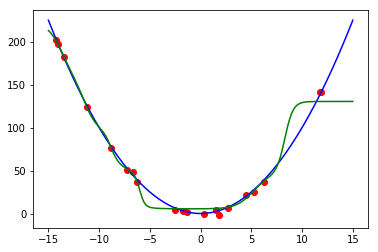

In [11]:
x_ = np.linspace(-15, 15, 160) # define axis

pred_x = np.reshape(x_, [160, 1]) # [160, ] -> [160, 1]
pred_y = clf.predict(pred_x) # predict network output given x_
fig = plt.figure() 
plt.plot(x_, x_**2, color = 'b') # plot original function
plt.scatter(x, y, color = 'r') # plot training data
plt.plot(pred_x, pred_y, 'g') # plot network output

#### In the above code, play on the hyperparameters, number of samples, and increase noise.

In [14]:
#changed n to 200

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor

#http://www.machinelearningtutorial.net/2017/01/28/python-scikit-simple-function-approximation/

#don't for get the seed, solutions are differnig without a set seed
np.random.seed(3)
n = 20
x = np.random.uniform(-15, 15, size = n)
#y is a predictor for x, the random thing is noise added to the data
y = x**2 + 200*np.random.randn(n, )
X = np.reshape(x ,[n, 1]) 
y = np.reshape(y ,[n ,])

#if verbose false, results won't show
clf = MLPRegressor(alpha=0.001, hidden_layer_sizes = (10,), max_iter = 50000, 
                 activation = 'logistic', verbose = 'True', learning_rate = 'adaptive')

"""
clf = MLPRegressor(alpha=0.1, hidden_layer_sizes = (10,), max_iter = 50000, 
                 activation = 'logistic', verbose = 'True', learning_rate = 'adaptive')
"""
a = clf.fit(X, y)

mlp.fit(X_)

Iteration 1, loss = 25554.00174196
Iteration 2, loss = 25553.96707114
Iteration 3, loss = 25553.93234848
Iteration 4, loss = 25553.89757495
Iteration 5, loss = 25553.86275113
Iteration 6, loss = 25553.82787730
Iteration 7, loss = 25553.79295342
Iteration 8, loss = 25553.75797916
Iteration 9, loss = 25553.72295391
Iteration 10, loss = 25553.68787680
Iteration 11, loss = 25553.65274665
Iteration 12, loss = 25553.61756205
Iteration 13, loss = 25553.58232125
Iteration 14, loss = 25553.54702225
Iteration 15, loss = 25553.51166273
Iteration 16, loss = 25553.47624004
Iteration 17, loss = 25553.44075121
Iteration 18, loss = 25553.40519290
Iteration 19, loss = 25553.36956140
Iteration 20, loss = 25553.33385259
Iteration 21, loss = 25553.29806189
Iteration 22, loss = 25553.26218426
Iteration 23, loss = 25553.22621414
Iteration 24, loss = 25553.19014541
Iteration 25, loss = 25553.15397135
Iteration 26, loss = 25553.11768457
Iteration 27, loss = 25553.08127701
Iteration 28, loss = 25553.04473986
I

Iteration 226, loss = 25538.74505261
Iteration 227, loss = 25538.64159424
Iteration 228, loss = 25538.53786344
Iteration 229, loss = 25538.43385977
Iteration 230, loss = 25538.32958276
Iteration 231, loss = 25538.22503191
Iteration 232, loss = 25538.12020668
Iteration 233, loss = 25538.01510652
Iteration 234, loss = 25537.90973083
Iteration 235, loss = 25537.80407897
Iteration 236, loss = 25537.69815030
Iteration 237, loss = 25537.59194414
Iteration 238, loss = 25537.48545977
Iteration 239, loss = 25537.37869644
Iteration 240, loss = 25537.27165340
Iteration 241, loss = 25537.16432986
Iteration 242, loss = 25537.05672498
Iteration 243, loss = 25536.94883794
Iteration 244, loss = 25536.84066785
Iteration 245, loss = 25536.73221384
Iteration 246, loss = 25536.62347499
Iteration 247, loss = 25536.51445035
Iteration 248, loss = 25536.40513897
Iteration 249, loss = 25536.29553988
Iteration 250, loss = 25536.18565206
Iteration 251, loss = 25536.07547451
Iteration 252, loss = 25535.96500616
I

Iteration 487, loss = 25500.96789763
Iteration 488, loss = 25500.78380544
Iteration 489, loss = 25500.59943996
Iteration 490, loss = 25500.41480124
Iteration 491, loss = 25500.22988934
Iteration 492, loss = 25500.04470433
Iteration 493, loss = 25499.85924627
Iteration 494, loss = 25499.67351522
Iteration 495, loss = 25499.48751125
Iteration 496, loss = 25499.30123443
Iteration 497, loss = 25499.11468482
Iteration 498, loss = 25498.92786250
Iteration 499, loss = 25498.74076753
Iteration 500, loss = 25498.55340000
Iteration 501, loss = 25498.36575997
Iteration 502, loss = 25498.17784753
Iteration 503, loss = 25497.98966274
Iteration 504, loss = 25497.80120570
Iteration 505, loss = 25497.61247649
Iteration 506, loss = 25497.42347518
Iteration 507, loss = 25497.23420188
Iteration 508, loss = 25497.04465667
Iteration 509, loss = 25496.85483964
Iteration 510, loss = 25496.66475089
Iteration 511, loss = 25496.47439051
Iteration 512, loss = 25496.28375861
Iteration 513, loss = 25496.09285530
I

Iteration 710, loss = 25453.63443848
Iteration 711, loss = 25453.39765677
Iteration 712, loss = 25453.16069498
Iteration 713, loss = 25452.92355354
Iteration 714, loss = 25452.68623288
Iteration 715, loss = 25452.44873343
Iteration 716, loss = 25452.21105561
Iteration 717, loss = 25451.97319985
Iteration 718, loss = 25451.73516659
Iteration 719, loss = 25451.49695624
Iteration 720, loss = 25451.25856923
Iteration 721, loss = 25451.02000599
Iteration 722, loss = 25450.78126694
Iteration 723, loss = 25450.54235249
Iteration 724, loss = 25450.30326309
Iteration 725, loss = 25450.06399913
Iteration 726, loss = 25449.82456106
Iteration 727, loss = 25449.58494928
Iteration 728, loss = 25449.34516421
Iteration 729, loss = 25449.10520629
Iteration 730, loss = 25448.86507591
Iteration 731, loss = 25448.62477351
Iteration 732, loss = 25448.38429950
Iteration 733, loss = 25448.14365430
Iteration 734, loss = 25447.90283832
Iteration 735, loss = 25447.66185197
Iteration 736, loss = 25447.42069568
I

Iteration 1026, loss = 25371.82385529
Iteration 1027, loss = 25371.54818536
Iteration 1028, loss = 25371.27243925
Iteration 1029, loss = 25370.99661718
Iteration 1030, loss = 25370.72071941
Iteration 1031, loss = 25370.44474615
Iteration 1032, loss = 25370.16869765
Iteration 1033, loss = 25369.89257414
Iteration 1034, loss = 25369.61637586
Iteration 1035, loss = 25369.34010302
Iteration 1036, loss = 25369.06375588
Iteration 1037, loss = 25368.78733465
Iteration 1038, loss = 25368.51083957
Iteration 1039, loss = 25368.23427087
Iteration 1040, loss = 25367.95762878
Iteration 1041, loss = 25367.68091352
Iteration 1042, loss = 25367.40412534
Iteration 1043, loss = 25367.12726445
Iteration 1044, loss = 25366.85033108
Iteration 1045, loss = 25366.57332547
Iteration 1046, loss = 25366.29624783
Iteration 1047, loss = 25366.01909840
Iteration 1048, loss = 25365.74187740
Iteration 1049, loss = 25365.46458505
Iteration 1050, loss = 25365.18722159
Iteration 1051, loss = 25364.90978723
Iteration 10

Iteration 1278, loss = 25300.48961765
Iteration 1279, loss = 25300.20099107
Iteration 1280, loss = 25299.91233367
Iteration 1281, loss = 25299.62364560
Iteration 1282, loss = 25299.33492698
Iteration 1283, loss = 25299.04617794
Iteration 1284, loss = 25298.75739863
Iteration 1285, loss = 25298.46858916
Iteration 1286, loss = 25298.17974966
Iteration 1287, loss = 25297.89088028
Iteration 1288, loss = 25297.60198113
Iteration 1289, loss = 25297.31305235
Iteration 1290, loss = 25297.02409407
Iteration 1291, loss = 25296.73510641
Iteration 1292, loss = 25296.44608950
Iteration 1293, loss = 25296.15704348
Iteration 1294, loss = 25295.86796846
Iteration 1295, loss = 25295.57886458
Iteration 1296, loss = 25295.28973197
Iteration 1297, loss = 25295.00057074
Iteration 1298, loss = 25294.71138104
Iteration 1299, loss = 25294.42216298
Iteration 1300, loss = 25294.13291668
Iteration 1301, loss = 25293.84364229
Iteration 1302, loss = 25293.55433991
Iteration 1303, loss = 25293.26500968
Iteration 13

Iteration 1531, loss = 25226.78844281
Iteration 1532, loss = 25226.49547183
Iteration 1533, loss = 25226.20249476
Iteration 1534, loss = 25225.90951167
Iteration 1535, loss = 25225.61652262
Iteration 1536, loss = 25225.32352770
Iteration 1537, loss = 25225.03052696
Iteration 1538, loss = 25224.73752047
Iteration 1539, loss = 25224.44450830
Iteration 1540, loss = 25224.15149053
Iteration 1541, loss = 25223.85846721
Iteration 1542, loss = 25223.56543841
Iteration 1543, loss = 25223.27240421
Iteration 1544, loss = 25222.97936467
Iteration 1545, loss = 25222.68631985
Iteration 1546, loss = 25222.39326982
Iteration 1547, loss = 25222.10021465
Iteration 1548, loss = 25221.80715441
Iteration 1549, loss = 25221.51408916
Iteration 1550, loss = 25221.22101897
Iteration 1551, loss = 25220.92794390
Iteration 1552, loss = 25220.63486402
Iteration 1553, loss = 25220.34177939
Iteration 1554, loss = 25220.04869008
Iteration 1555, loss = 25219.75559616
Iteration 1556, loss = 25219.46249769
Iteration 15

Iteration 1768, loss = 25157.31353509
Iteration 1769, loss = 25157.02069104
Iteration 1770, loss = 25156.72785287
Iteration 1771, loss = 25156.43502061
Iteration 1772, loss = 25156.14219431
Iteration 1773, loss = 25155.84937400
Iteration 1774, loss = 25155.55655971
Iteration 1775, loss = 25155.26375148
Iteration 1776, loss = 25154.97094934
Iteration 1777, loss = 25154.67815333
Iteration 1778, loss = 25154.38536348
Iteration 1779, loss = 25154.09257982
Iteration 1780, loss = 25153.79980240
Iteration 1781, loss = 25153.50703124
Iteration 1782, loss = 25153.21426638
Iteration 1783, loss = 25152.92150786
Iteration 1784, loss = 25152.62875569
Iteration 1785, loss = 25152.33600993
Iteration 1786, loss = 25152.04327061
Iteration 1787, loss = 25151.75053775
Iteration 1788, loss = 25151.45781139
Iteration 1789, loss = 25151.16509156
Iteration 1790, loss = 25150.87237830
Iteration 1791, loss = 25150.57967164
Iteration 1792, loss = 25150.28697162
Iteration 1793, loss = 25149.99427826
Iteration 17

Iteration 2013, loss = 25085.81412016
Iteration 2014, loss = 25085.52355006
Iteration 2015, loss = 25085.23299189
Iteration 2016, loss = 25084.94244567
Iteration 2017, loss = 25084.65191141
Iteration 2018, loss = 25084.36138913
Iteration 2019, loss = 25084.07087884
Iteration 2020, loss = 25083.78038056
Iteration 2021, loss = 25083.48989431
Iteration 2022, loss = 25083.19942009
Iteration 2023, loss = 25082.90895794
Iteration 2024, loss = 25082.61850786
Iteration 2025, loss = 25082.32806986
Iteration 2026, loss = 25082.03764397
Iteration 2027, loss = 25081.74723020
Iteration 2028, loss = 25081.45682856
Iteration 2029, loss = 25081.16643908
Iteration 2030, loss = 25080.87606176
Iteration 2031, loss = 25080.58569662
Iteration 2032, loss = 25080.29534367
Iteration 2033, loss = 25080.00500294
Iteration 2034, loss = 25079.71467444
Iteration 2035, loss = 25079.42435817
Iteration 2036, loss = 25079.13405416
Iteration 2037, loss = 25078.84376243
Iteration 2038, loss = 25078.55348298
Iteration 20

Iteration 2265, loss = 25013.00225571
Iteration 2266, loss = 25012.71507778
Iteration 2267, loss = 25012.42791444
Iteration 2268, loss = 25012.14076568
Iteration 2269, loss = 25011.85363153
Iteration 2270, loss = 25011.56651197
Iteration 2271, loss = 25011.27940702
Iteration 2272, loss = 25010.99231669
Iteration 2273, loss = 25010.70524097
Iteration 2274, loss = 25010.41817989
Iteration 2275, loss = 25010.13113343
Iteration 2276, loss = 25009.84410161
Iteration 2277, loss = 25009.55708444
Iteration 2278, loss = 25009.27008191
Iteration 2279, loss = 25008.98309404
Iteration 2280, loss = 25008.69612083
Iteration 2281, loss = 25008.40916229
Iteration 2282, loss = 25008.12221842
Iteration 2283, loss = 25007.83528922
Iteration 2284, loss = 25007.54837472
Iteration 2285, loss = 25007.26147490
Iteration 2286, loss = 25006.97458977
Iteration 2287, loss = 25006.68771935
Iteration 2288, loss = 25006.40086363
Iteration 2289, loss = 25006.11402262
Iteration 2290, loss = 25005.82719633
Iteration 22

Iteration 2503, loss = 24945.07560173
Iteration 2504, loss = 24944.79201508
Iteration 2505, loss = 24944.50844385
Iteration 2506, loss = 24944.22488803
Iteration 2507, loss = 24943.94134764
Iteration 2508, loss = 24943.65782266
Iteration 2509, loss = 24943.37431310
Iteration 2510, loss = 24943.09081897
Iteration 2511, loss = 24942.80734026
Iteration 2512, loss = 24942.52387697
Iteration 2513, loss = 24942.24042911
Iteration 2514, loss = 24941.95699668
Iteration 2515, loss = 24941.67357968
Iteration 2516, loss = 24941.39017811
Iteration 2517, loss = 24941.10679198
Iteration 2518, loss = 24940.82342127
Iteration 2519, loss = 24940.54006600
Iteration 2520, loss = 24940.25672617
Iteration 2521, loss = 24939.97340177
Iteration 2522, loss = 24939.69009281
Iteration 2523, loss = 24939.40679929
Iteration 2524, loss = 24939.12352121
Iteration 2525, loss = 24938.84025857
Iteration 2526, loss = 24938.55701138
Iteration 2527, loss = 24938.27377963
Iteration 2528, loss = 24937.99056333
Iteration 25

Iteration 2732, loss = 24880.53827662
Iteration 2733, loss = 24880.25823610
Iteration 2734, loss = 24879.97821106
Iteration 2735, loss = 24879.69820149
Iteration 2736, loss = 24879.41820740
Iteration 2737, loss = 24879.13822878
Iteration 2738, loss = 24878.85826563
Iteration 2739, loss = 24878.57831795
Iteration 2740, loss = 24878.29838575
Iteration 2741, loss = 24878.01846902
Iteration 2742, loss = 24877.73856776
Iteration 2743, loss = 24877.45868197
Iteration 2744, loss = 24877.17881165
Iteration 2745, loss = 24876.89895680
Iteration 2746, loss = 24876.61911742
Iteration 2747, loss = 24876.33929350
Iteration 2748, loss = 24876.05948505
Iteration 2749, loss = 24875.77969206
Iteration 2750, loss = 24875.49991454
Iteration 2751, loss = 24875.22015249
Iteration 2752, loss = 24874.94040589
Iteration 2753, loss = 24874.66067477
Iteration 2754, loss = 24874.38095910
Iteration 2755, loss = 24874.10125889
Iteration 2756, loss = 24873.82157415
Iteration 2757, loss = 24873.54190486
Iteration 27

Iteration 2980, loss = 24811.55985892
Iteration 2981, loss = 24811.28362509
Iteration 2982, loss = 24811.00740644
Iteration 2983, loss = 24810.73120297
Iteration 2984, loss = 24810.45501469
Iteration 2985, loss = 24810.17884158
Iteration 2986, loss = 24809.90268366
Iteration 2987, loss = 24809.62654092
Iteration 2988, loss = 24809.35041335
Iteration 2989, loss = 24809.07430096
Iteration 2990, loss = 24808.79820374
Iteration 2991, loss = 24808.52212170
Iteration 2992, loss = 24808.24605482
Iteration 2993, loss = 24807.97000312
Iteration 2994, loss = 24807.69396658
Iteration 2995, loss = 24807.41794520
Iteration 2996, loss = 24807.14193900
Iteration 2997, loss = 24806.86594795
Iteration 2998, loss = 24806.58997207
Iteration 2999, loss = 24806.31401134
Iteration 3000, loss = 24806.03806578
Iteration 3001, loss = 24805.76213537
Iteration 3002, loss = 24805.48622011
Iteration 3003, loss = 24805.21032001
Iteration 3004, loss = 24804.93443506
Iteration 3005, loss = 24804.65856527
Iteration 30

Iteration 3224, loss = 24744.60518947
Iteration 3225, loss = 24744.33261321
Iteration 3226, loss = 24744.06005173
Iteration 3227, loss = 24743.78750504
Iteration 3228, loss = 24743.51497313
Iteration 3229, loss = 24743.24245601
Iteration 3230, loss = 24742.96995366
Iteration 3231, loss = 24742.69746608
Iteration 3232, loss = 24742.42499329
Iteration 3233, loss = 24742.15253527
Iteration 3234, loss = 24741.88009202
Iteration 3235, loss = 24741.60766354
Iteration 3236, loss = 24741.33524983
Iteration 3237, loss = 24741.06285089
Iteration 3238, loss = 24740.79046672
Iteration 3239, loss = 24740.51809731
Iteration 3240, loss = 24740.24574266
Iteration 3241, loss = 24739.97340277
Iteration 3242, loss = 24739.70107764
Iteration 3243, loss = 24739.42876727
Iteration 3244, loss = 24739.15647165
Iteration 3245, loss = 24738.88419079
Iteration 3246, loss = 24738.61192468
Iteration 3247, loss = 24738.33967332
Iteration 3248, loss = 24738.06743672
Iteration 3249, loss = 24737.79521485
Iteration 32

Iteration 3466, loss = 24679.06907097
Iteration 3467, loss = 24678.80002544
Iteration 3468, loss = 24678.53099425
Iteration 3469, loss = 24678.26197740
Iteration 3470, loss = 24677.99297500
Iteration 3471, loss = 24677.72398703
Iteration 3472, loss = 24677.45501344
Iteration 3473, loss = 24677.18605419
Iteration 3474, loss = 24676.91710934
Iteration 3475, loss = 24676.64817892
Iteration 3476, loss = 24676.37926289
Iteration 3477, loss = 24676.11036121
Iteration 3478, loss = 24675.84147391
Iteration 3479, loss = 24675.57260101
Iteration 3480, loss = 24675.30374251
Iteration 3481, loss = 24675.03489837
Iteration 3482, loss = 24674.76606859
Iteration 3483, loss = 24674.49725320
Iteration 3484, loss = 24674.22845219
Iteration 3485, loss = 24673.95966556
Iteration 3486, loss = 24673.69089329
Iteration 3487, loss = 24673.42213539
Iteration 3488, loss = 24673.15339186
Iteration 3489, loss = 24672.88466271
Iteration 3490, loss = 24672.61594791
Iteration 3491, loss = 24672.34724748
Iteration 34

Iteration 3719, loss = 24611.45576229
Iteration 3720, loss = 24611.19031662
Iteration 3721, loss = 24610.92488524
Iteration 3722, loss = 24610.65946757
Iteration 3723, loss = 24610.39406317
Iteration 3724, loss = 24610.12867123
Iteration 3725, loss = 24609.86329209
Iteration 3726, loss = 24609.59792661
Iteration 3727, loss = 24609.33257622
Iteration 3728, loss = 24609.06724155
Iteration 3729, loss = 24608.80192217
Iteration 3730, loss = 24608.53661703
Iteration 3731, loss = 24608.27132511
Iteration 3732, loss = 24608.00604612
Iteration 3733, loss = 24607.74078051
Iteration 3734, loss = 24607.47552919
Iteration 3735, loss = 24607.21029272
Iteration 3736, loss = 24606.94507101
Iteration 3737, loss = 24606.67986348
Iteration 3738, loss = 24606.41466957
Iteration 3739, loss = 24606.14948918
Iteration 3740, loss = 24605.88432255
Iteration 3741, loss = 24605.61917014
Iteration 3742, loss = 24605.35403213
Iteration 3743, loss = 24605.08890843
Iteration 3744, loss = 24604.82379876
Iteration 37

Iteration 3973, loss = 24544.48105786
Iteration 3974, loss = 24544.21914864
Iteration 3975, loss = 24543.95725336
Iteration 3976, loss = 24543.69537170
Iteration 3977, loss = 24543.43350352
Iteration 3978, loss = 24543.17164889
Iteration 3979, loss = 24542.90980799
Iteration 3980, loss = 24542.64798102
Iteration 3981, loss = 24542.38616803
Iteration 3982, loss = 24542.12436896
Iteration 3983, loss = 24541.86258367
Iteration 3984, loss = 24541.60081206
Iteration 3985, loss = 24541.33905411
Iteration 3986, loss = 24541.07730989
Iteration 3987, loss = 24540.81557949
Iteration 3988, loss = 24540.55386299
Iteration 3989, loss = 24540.29216038
Iteration 3990, loss = 24540.03047164
Iteration 3991, loss = 24539.76879670
Iteration 3992, loss = 24539.50713551
Iteration 3993, loss = 24539.24548805
Iteration 3994, loss = 24538.98385436
Iteration 3995, loss = 24538.72223446
Iteration 3996, loss = 24538.46062838
Iteration 3997, loss = 24538.19903613
Iteration 3998, loss = 24537.93745769
Iteration 39

Iteration 4229, loss = 24477.88077564
Iteration 4230, loss = 24477.62237688
Iteration 4231, loss = 24477.36399175
Iteration 4232, loss = 24477.10562025
Iteration 4233, loss = 24476.84726238
Iteration 4234, loss = 24476.58891815
Iteration 4235, loss = 24476.33058755
Iteration 4236, loss = 24476.07227058
Iteration 4237, loss = 24475.81396723
Iteration 4238, loss = 24475.55567752
Iteration 4239, loss = 24475.29740144
Iteration 4240, loss = 24475.03913899
Iteration 4241, loss = 24474.78089016
Iteration 4242, loss = 24474.52265497
Iteration 4243, loss = 24474.26443340
Iteration 4244, loss = 24474.00622545
Iteration 4245, loss = 24473.74803114
Iteration 4246, loss = 24473.48985045
Iteration 4247, loss = 24473.23168338
Iteration 4248, loss = 24472.97352994
Iteration 4249, loss = 24472.71539012
Iteration 4250, loss = 24472.45726393
Iteration 4251, loss = 24472.19915136
Iteration 4252, loss = 24471.94105241
Iteration 4253, loss = 24471.68296708
Iteration 4254, loss = 24471.42489538
Iteration 42

Iteration 4484, loss = 24412.42935998
Iteration 4485, loss = 24412.17442343
Iteration 4486, loss = 24411.91950042
Iteration 4487, loss = 24411.66459093
Iteration 4488, loss = 24411.40969498
Iteration 4489, loss = 24411.15481255
Iteration 4490, loss = 24410.89994365
Iteration 4491, loss = 24410.64508828
Iteration 4492, loss = 24410.39024644
Iteration 4493, loss = 24410.13541813
Iteration 4494, loss = 24409.88060334
Iteration 4495, loss = 24409.62580208
Iteration 4496, loss = 24409.37101435
Iteration 4497, loss = 24409.11624015
Iteration 4498, loss = 24408.86147947
Iteration 4499, loss = 24408.60673232
Iteration 4500, loss = 24408.35199869
Iteration 4501, loss = 24408.09727859
Iteration 4502, loss = 24407.84257201
Iteration 4503, loss = 24407.58787896
Iteration 4504, loss = 24407.33319944
Iteration 4505, loss = 24407.07853344
Iteration 4506, loss = 24406.82388096
Iteration 4507, loss = 24406.56924201
Iteration 4508, loss = 24406.31461658
Iteration 4509, loss = 24406.06000467
Iteration 45

Iteration 4706, loss = 24356.16490925
Iteration 4707, loss = 24355.91297049
Iteration 4708, loss = 24355.66104522
Iteration 4709, loss = 24355.40913342
Iteration 4710, loss = 24355.15723511
Iteration 4711, loss = 24354.90535028
Iteration 4712, loss = 24354.65347892
Iteration 4713, loss = 24354.40162105
Iteration 4714, loss = 24354.14977666
Iteration 4715, loss = 24353.89794575
Iteration 4716, loss = 24353.64612832
Iteration 4717, loss = 24353.39432437
Iteration 4718, loss = 24353.14253390
Iteration 4719, loss = 24352.89075691
Iteration 4720, loss = 24352.63899339
Iteration 4721, loss = 24352.38724336
Iteration 4722, loss = 24352.13550681
Iteration 4723, loss = 24351.88378374
Iteration 4724, loss = 24351.63207414
Iteration 4725, loss = 24351.38037802
Iteration 4726, loss = 24351.12869539
Iteration 4727, loss = 24350.87702623
Iteration 4728, loss = 24350.62537055
Iteration 4729, loss = 24350.37372835
Iteration 4730, loss = 24350.12209962
Iteration 4731, loss = 24349.87048437
Iteration 47

Iteration 4944, loss = 24296.58344392
Iteration 4945, loss = 24296.33471061
Iteration 4946, loss = 24296.08599076
Iteration 4947, loss = 24295.83728436
Iteration 4948, loss = 24295.58859143
Iteration 4949, loss = 24295.33991195
Iteration 4950, loss = 24295.09124593
Iteration 4951, loss = 24294.84259337
Iteration 4952, loss = 24294.59395426
Iteration 4953, loss = 24294.34532861
Iteration 4954, loss = 24294.09671642
Iteration 4955, loss = 24293.84811769
Iteration 4956, loss = 24293.59953242
Iteration 4957, loss = 24293.35096060
Iteration 4958, loss = 24293.10240224
Iteration 4959, loss = 24292.85385734
Iteration 4960, loss = 24292.60532589
Iteration 4961, loss = 24292.35680790
Iteration 4962, loss = 24292.10830337
Iteration 4963, loss = 24291.85981230
Iteration 4964, loss = 24291.61133468
Iteration 4965, loss = 24291.36287052
Iteration 4966, loss = 24291.11441981
Iteration 4967, loss = 24290.86598257
Iteration 4968, loss = 24290.61755878
Iteration 4969, loss = 24290.36914845
Iteration 49

Iteration 5189, loss = 24236.04595962
Iteration 5190, loss = 24235.80052256
Iteration 5191, loss = 24235.55509896
Iteration 5192, loss = 24235.30968881
Iteration 5193, loss = 24235.06429213
Iteration 5194, loss = 24234.81890890
Iteration 5195, loss = 24234.57353916
Iteration 5196, loss = 24234.32818289
Iteration 5197, loss = 24234.08284012
Iteration 5198, loss = 24233.83751088
Iteration 5199, loss = 24233.59219520
Iteration 5200, loss = 24233.34689314
Iteration 5201, loss = 24233.10160479
Iteration 5202, loss = 24232.85633023
Iteration 5203, loss = 24232.61106964
Iteration 5204, loss = 24232.36582306
Iteration 5205, loss = 24232.12059063
Iteration 5206, loss = 24231.87537188
Iteration 5207, loss = 24231.63016643
Iteration 5208, loss = 24231.38497274
Iteration 5209, loss = 24231.13979017
Iteration 5210, loss = 24230.89461807
Iteration 5211, loss = 24230.64945819
Iteration 5212, loss = 24230.40431264
Iteration 5213, loss = 24230.15918337
Iteration 5214, loss = 24229.91407041
Iteration 52

Iteration 5429, loss = 24177.52684102
Iteration 5430, loss = 24177.28463211
Iteration 5431, loss = 24177.04243667
Iteration 5432, loss = 24176.80025470
Iteration 5433, loss = 24176.55808620
Iteration 5434, loss = 24176.31593113
Iteration 5435, loss = 24176.07378951
Iteration 5436, loss = 24175.83166131
Iteration 5437, loss = 24175.58954657
Iteration 5438, loss = 24175.34744528
Iteration 5439, loss = 24175.10535746
Iteration 5440, loss = 24174.86328309
Iteration 5441, loss = 24174.62122217
Iteration 5442, loss = 24174.37917468
Iteration 5443, loss = 24174.13714064
Iteration 5444, loss = 24173.89512005
Iteration 5445, loss = 24173.65311291
Iteration 5446, loss = 24173.41111923
Iteration 5447, loss = 24173.16913900
Iteration 5448, loss = 24172.92717222
Iteration 5449, loss = 24172.68521888
Iteration 5450, loss = 24172.44327899
Iteration 5451, loss = 24172.20135255
Iteration 5452, loss = 24171.95943955
Iteration 5453, loss = 24171.71754001
Iteration 5454, loss = 24171.47565392
Iteration 54

Iteration 5671, loss = 24119.30445423
Iteration 5672, loss = 24119.06549954
Iteration 5673, loss = 24118.82655828
Iteration 5674, loss = 24118.58763048
Iteration 5675, loss = 24118.34871611
Iteration 5676, loss = 24118.10981519
Iteration 5677, loss = 24117.87092771
Iteration 5678, loss = 24117.63205367
Iteration 5679, loss = 24117.39319307
Iteration 5680, loss = 24117.15434592
Iteration 5681, loss = 24116.91551220
Iteration 5682, loss = 24116.67669193
Iteration 5683, loss = 24116.43788511
Iteration 5684, loss = 24116.19909172
Iteration 5685, loss = 24115.96031178
Iteration 5686, loss = 24115.72154528
Iteration 5687, loss = 24115.48279222
Iteration 5688, loss = 24115.24405260
Iteration 5689, loss = 24115.00532642
Iteration 5690, loss = 24114.76661369
Iteration 5691, loss = 24114.52791439
Iteration 5692, loss = 24114.28922854
Iteration 5693, loss = 24114.05055613
Iteration 5694, loss = 24113.81189716
Iteration 5695, loss = 24113.57325163
Iteration 5696, loss = 24113.33461955
Iteration 56

Iteration 5908, loss = 24063.04800339
Iteration 5909, loss = 24062.81223277
Iteration 5910, loss = 24062.57647558
Iteration 5911, loss = 24062.34073180
Iteration 5912, loss = 24062.10500146
Iteration 5913, loss = 24061.86928453
Iteration 5914, loss = 24061.63358103
Iteration 5915, loss = 24061.39789096
Iteration 5916, loss = 24061.16221430
Iteration 5917, loss = 24060.92655107
Iteration 5918, loss = 24060.69090127
Iteration 5919, loss = 24060.45526488
Iteration 5920, loss = 24060.21964192
Iteration 5921, loss = 24059.98403238
Iteration 5922, loss = 24059.74843626
Iteration 5923, loss = 24059.51285357
Iteration 5924, loss = 24059.27728430
Iteration 5925, loss = 24059.04172845
Iteration 5926, loss = 24058.80618602
Iteration 5927, loss = 24058.57065701
Iteration 5928, loss = 24058.33514143
Iteration 5929, loss = 24058.09963927
Iteration 5930, loss = 24057.86415052
Iteration 5931, loss = 24057.62867520
Iteration 5932, loss = 24057.39321331
Iteration 5933, loss = 24057.15776483
Iteration 59

Iteration 6154, loss = 24005.45264948
Iteration 6155, loss = 24005.22017706
Iteration 6156, loss = 24004.98771802
Iteration 6157, loss = 24004.75527237
Iteration 6158, loss = 24004.52284011
Iteration 6159, loss = 24004.29042123
Iteration 6160, loss = 24004.05801574
Iteration 6161, loss = 24003.82562363
Iteration 6162, loss = 24003.59324491
Iteration 6163, loss = 24003.36087957
Iteration 6164, loss = 24003.12852762
Iteration 6165, loss = 24002.89618905
Iteration 6166, loss = 24002.66386386
Iteration 6167, loss = 24002.43155206
Iteration 6168, loss = 24002.19925365
Iteration 6169, loss = 24001.96696861
Iteration 6170, loss = 24001.73469696
Iteration 6171, loss = 24001.50243870
Iteration 6172, loss = 24001.27019381
Iteration 6173, loss = 24001.03796231
Iteration 6174, loss = 24000.80574420
Iteration 6175, loss = 24000.57353946
Iteration 6176, loss = 24000.34134811
Iteration 6177, loss = 24000.10917014
Iteration 6178, loss = 23999.87700555
Iteration 6179, loss = 23999.64485434
Iteration 61

Iteration 6408, loss = 23946.83418395
Iteration 6409, loss = 23946.60510438
Iteration 6410, loss = 23946.37603813
Iteration 6411, loss = 23946.14698521
Iteration 6412, loss = 23945.91794561
Iteration 6413, loss = 23945.68891934
Iteration 6414, loss = 23945.45990638
Iteration 6415, loss = 23945.23090675
Iteration 6416, loss = 23945.00192044
Iteration 6417, loss = 23944.77294745
Iteration 6418, loss = 23944.54398779
Iteration 6419, loss = 23944.31504144
Iteration 6420, loss = 23944.08610842
Iteration 6421, loss = 23943.85718872
Iteration 6422, loss = 23943.62828233
Iteration 6423, loss = 23943.39938927
Iteration 6424, loss = 23943.17050953
Iteration 6425, loss = 23942.94164310
Iteration 6426, loss = 23942.71279000
Iteration 6427, loss = 23942.48395021
Iteration 6428, loss = 23942.25512374
Iteration 6429, loss = 23942.02631059
Iteration 6430, loss = 23941.79751076
Iteration 6431, loss = 23941.56872425
Iteration 6432, loss = 23941.33995105
Iteration 6433, loss = 23941.11119117
Iteration 64

Iteration 6679, loss = 23885.24002526
Iteration 6680, loss = 23885.01454435
Iteration 6681, loss = 23884.78907667
Iteration 6682, loss = 23884.56362222
Iteration 6683, loss = 23884.33818100
Iteration 6684, loss = 23884.11275300
Iteration 6685, loss = 23883.88733823
Iteration 6686, loss = 23883.66193669
Iteration 6687, loss = 23883.43654837
Iteration 6688, loss = 23883.21117328
Iteration 6689, loss = 23882.98581141
Iteration 6690, loss = 23882.76046276
Iteration 6691, loss = 23882.53512734
Iteration 6692, loss = 23882.30980515
Iteration 6693, loss = 23882.08449618
Iteration 6694, loss = 23881.85920043
Iteration 6695, loss = 23881.63391790
Iteration 6696, loss = 23881.40864859
Iteration 6697, loss = 23881.18339251
Iteration 6698, loss = 23880.95814965
Iteration 6699, loss = 23880.73292001
Iteration 6700, loss = 23880.50770358
Iteration 6701, loss = 23880.28250038
Iteration 6702, loss = 23880.05731040
Iteration 6703, loss = 23879.83213364
Iteration 6704, loss = 23879.60697009
Iteration 67

Iteration 6910, loss = 23833.50447433
Iteration 6911, loss = 23833.28203745
Iteration 6912, loss = 23833.05961369
Iteration 6913, loss = 23832.83720306
Iteration 6914, loss = 23832.61480556
Iteration 6915, loss = 23832.39242120
Iteration 6916, loss = 23832.17004997
Iteration 6917, loss = 23831.94769189
Iteration 6918, loss = 23831.72534699
Iteration 6919, loss = 23831.50301526
Iteration 6920, loss = 23831.28069678
Iteration 6921, loss = 23831.05839157
Iteration 6922, loss = 23830.83609975
Iteration 6923, loss = 23830.61382141
Iteration 6924, loss = 23830.39155676
Iteration 6925, loss = 23830.16930591
Iteration 6926, loss = 23829.94706912
Iteration 6927, loss = 23829.72484614
Iteration 6928, loss = 23829.50263686
Iteration 6929, loss = 23829.28043988
Iteration 6930, loss = 23829.05825447
Iteration 6931, loss = 23828.83607905
Iteration 6932, loss = 23828.61391438
Iteration 6933, loss = 23828.39176095
Iteration 6934, loss = 23828.16962065
Iteration 6935, loss = 23827.94749435
Iteration 69

Iteration 7185, loss = 23772.82687578
Iteration 7186, loss = 23772.60802696
Iteration 7187, loss = 23772.38919112
Iteration 7188, loss = 23772.17036821
Iteration 7189, loss = 23771.95155820
Iteration 7190, loss = 23771.73276115
Iteration 7191, loss = 23771.51397707
Iteration 7192, loss = 23771.29520600
Iteration 7193, loss = 23771.07644791
Iteration 7194, loss = 23770.85770278
Iteration 7195, loss = 23770.63897059
Iteration 7196, loss = 23770.42025134
Iteration 7197, loss = 23770.20154504
Iteration 7198, loss = 23769.98285171
Iteration 7199, loss = 23769.76417136
Iteration 7200, loss = 23769.54550397
Iteration 7201, loss = 23769.32684954
Iteration 7202, loss = 23769.10820805
Iteration 7203, loss = 23768.88957951
Iteration 7204, loss = 23768.67096393
Iteration 7205, loss = 23768.45236130
Iteration 7206, loss = 23768.23377163
Iteration 7207, loss = 23768.01519492
Iteration 7208, loss = 23767.79663117
Iteration 7209, loss = 23767.57808036
Iteration 7210, loss = 23767.35954250
Iteration 72

Iteration 7420, loss = 23721.75250264
Iteration 7421, loss = 23721.53668271
Iteration 7422, loss = 23721.32087557
Iteration 7423, loss = 23721.10508125
Iteration 7424, loss = 23720.88929974
Iteration 7425, loss = 23720.67353106
Iteration 7426, loss = 23720.45777518
Iteration 7427, loss = 23720.24203209
Iteration 7428, loss = 23720.02630180
Iteration 7429, loss = 23719.81058430
Iteration 7430, loss = 23719.59487962
Iteration 7431, loss = 23719.37918774
Iteration 7432, loss = 23719.16350867
Iteration 7433, loss = 23718.94784239
Iteration 7434, loss = 23718.73218890
Iteration 7435, loss = 23718.51654821
Iteration 7436, loss = 23718.30092032
Iteration 7437, loss = 23718.08530522
Iteration 7438, loss = 23717.86970293
Iteration 7439, loss = 23717.65411343
Iteration 7440, loss = 23717.43853672
Iteration 7441, loss = 23717.22297280
Iteration 7442, loss = 23717.00742168
Iteration 7443, loss = 23716.79188335
Iteration 7444, loss = 23716.57635781
Iteration 7445, loss = 23716.36084507
Iteration 74

Iteration 7667, loss = 23668.83223037
Iteration 7668, loss = 23668.61955097
Iteration 7669, loss = 23668.40688419
Iteration 7670, loss = 23668.19423003
Iteration 7671, loss = 23667.98158849
Iteration 7672, loss = 23667.76895957
Iteration 7673, loss = 23667.55634326
Iteration 7674, loss = 23667.34373956
Iteration 7675, loss = 23667.13114847
Iteration 7676, loss = 23666.91856999
Iteration 7677, loss = 23666.70600412
Iteration 7678, loss = 23666.49345087
Iteration 7679, loss = 23666.28091022
Iteration 7680, loss = 23666.06838217
Iteration 7681, loss = 23665.85586674
Iteration 7682, loss = 23665.64336391
Iteration 7683, loss = 23665.43087368
Iteration 7684, loss = 23665.21839607
Iteration 7685, loss = 23665.00593105
Iteration 7686, loss = 23664.79347864
Iteration 7687, loss = 23664.58103884
Iteration 7688, loss = 23664.36861163
Iteration 7689, loss = 23664.15619702
Iteration 7690, loss = 23663.94379502
Iteration 7691, loss = 23663.73140561
Iteration 7692, loss = 23663.51902880
Iteration 76

Iteration 7913, loss = 23616.89126232
Iteration 7914, loss = 23616.68166128
Iteration 7915, loss = 23616.47207266
Iteration 7916, loss = 23616.26249648
Iteration 7917, loss = 23616.05293277
Iteration 7918, loss = 23615.84338154
Iteration 7919, loss = 23615.63384284
Iteration 7920, loss = 23615.42431670
Iteration 7921, loss = 23615.21480321
Iteration 7922, loss = 23615.00530241
Iteration 7923, loss = 23614.79581441
Iteration 7924, loss = 23614.58633912
Iteration 7925, loss = 23614.37687657
Iteration 7926, loss = 23614.16742634
Iteration 7927, loss = 23613.95798837
Iteration 7928, loss = 23613.74856220
Iteration 7929, loss = 23613.53914814
Iteration 7930, loss = 23613.32974585
Iteration 7931, loss = 23613.12035533
Iteration 7932, loss = 23612.91097554
Iteration 7933, loss = 23612.70160655
Iteration 7934, loss = 23612.49224895
Iteration 7935, loss = 23612.28290453
Iteration 7936, loss = 23612.07357460
Iteration 7937, loss = 23611.86425941
Iteration 7938, loss = 23611.65495800
Iteration 79

Iteration 8152, loss = 23567.14733429
Iteration 8153, loss = 23566.94067156
Iteration 8154, loss = 23566.73402097
Iteration 8155, loss = 23566.52738250
Iteration 8156, loss = 23566.32075615
Iteration 8157, loss = 23566.11414197
Iteration 8158, loss = 23565.90754000
Iteration 8159, loss = 23565.70095024
Iteration 8160, loss = 23565.49437269
Iteration 8161, loss = 23565.28780731
Iteration 8162, loss = 23565.08125407
Iteration 8163, loss = 23564.87471297
Iteration 8164, loss = 23564.66818403
Iteration 8165, loss = 23564.46166726
Iteration 8166, loss = 23564.25516268
Iteration 8167, loss = 23564.04867028
Iteration 8168, loss = 23563.84219006
Iteration 8169, loss = 23563.63572199
Iteration 8170, loss = 23563.42926607
Iteration 8171, loss = 23563.22282230
Iteration 8172, loss = 23563.01639069
Iteration 8173, loss = 23562.80997124
Iteration 8174, loss = 23562.60356396
Iteration 8175, loss = 23562.39716884
Iteration 8176, loss = 23562.19078589
Iteration 8177, loss = 23561.98441509
Iteration 81

Iteration 8394, loss = 23517.48772192
Iteration 8395, loss = 23517.28397679
Iteration 8396, loss = 23517.08024359
Iteration 8397, loss = 23516.87652232
Iteration 8398, loss = 23516.67281298
Iteration 8399, loss = 23516.46911557
Iteration 8400, loss = 23516.26543008
Iteration 8401, loss = 23516.06175652
Iteration 8402, loss = 23515.85809488
Iteration 8403, loss = 23515.65444516
Iteration 8404, loss = 23515.45080737
Iteration 8405, loss = 23515.24718149
Iteration 8406, loss = 23515.04356754
Iteration 8407, loss = 23514.83996550
Iteration 8408, loss = 23514.63637538
Iteration 8409, loss = 23514.43279718
Iteration 8410, loss = 23514.22923089
Iteration 8411, loss = 23514.02567651
Iteration 8412, loss = 23513.82213405
Iteration 8413, loss = 23513.61860350
Iteration 8414, loss = 23513.41508487
Iteration 8415, loss = 23513.21157814
Iteration 8416, loss = 23513.00808332
Iteration 8417, loss = 23512.80460040
Iteration 8418, loss = 23512.60112940
Iteration 8419, loss = 23512.39767030
Iteration 84

Iteration 8645, loss = 23466.71918981
Iteration 8646, loss = 23466.51840509
Iteration 8647, loss = 23466.31763203
Iteration 8648, loss = 23466.11687061
Iteration 8649, loss = 23465.91612085
Iteration 8650, loss = 23465.71538274
Iteration 8651, loss = 23465.51465628
Iteration 8652, loss = 23465.31394146
Iteration 8653, loss = 23465.11323830
Iteration 8654, loss = 23464.91254677
Iteration 8655, loss = 23464.71186690
Iteration 8656, loss = 23464.51119867
Iteration 8657, loss = 23464.31054208
Iteration 8658, loss = 23464.10989714
Iteration 8659, loss = 23463.90926383
Iteration 8660, loss = 23463.70864217
Iteration 8661, loss = 23463.50803214
Iteration 8662, loss = 23463.30743375
Iteration 8663, loss = 23463.10684700
Iteration 8664, loss = 23462.90627188
Iteration 8665, loss = 23462.70570839
Iteration 8666, loss = 23462.50515654
Iteration 8667, loss = 23462.30461632
Iteration 8668, loss = 23462.10408773
Iteration 8669, loss = 23461.90357077
Iteration 8670, loss = 23461.70306544
Iteration 86

Iteration 8894, loss = 23417.08071675
Iteration 8895, loss = 23416.88279833
Iteration 8896, loss = 23416.68489127
Iteration 8897, loss = 23416.48699558
Iteration 8898, loss = 23416.28911124
Iteration 8899, loss = 23416.09123827
Iteration 8900, loss = 23415.89337666
Iteration 8901, loss = 23415.69552640
Iteration 8902, loss = 23415.49768750
Iteration 8903, loss = 23415.29985996
Iteration 8904, loss = 23415.10204377
Iteration 8905, loss = 23414.90423893
Iteration 8906, loss = 23414.70644544
Iteration 8907, loss = 23414.50866331
Iteration 8908, loss = 23414.31089253
Iteration 8909, loss = 23414.11313309
Iteration 8910, loss = 23413.91538500
Iteration 8911, loss = 23413.71764826
Iteration 8912, loss = 23413.51992286
Iteration 8913, loss = 23413.32220880
Iteration 8914, loss = 23413.12450609
Iteration 8915, loss = 23412.92681472
Iteration 8916, loss = 23412.72913469
Iteration 8917, loss = 23412.53146599
Iteration 8918, loss = 23412.33380864
Iteration 8919, loss = 23412.13616262
Iteration 89

Iteration 9141, loss = 23368.53712378
Iteration 9142, loss = 23368.34197535
Iteration 9143, loss = 23368.14683798
Iteration 9144, loss = 23367.95171167
Iteration 9145, loss = 23367.75659642
Iteration 9146, loss = 23367.56149223
Iteration 9147, loss = 23367.36639909
Iteration 9148, loss = 23367.17131701
Iteration 9149, loss = 23366.97624598
Iteration 9150, loss = 23366.78118600
Iteration 9151, loss = 23366.58613708
Iteration 9152, loss = 23366.39109920
Iteration 9153, loss = 23366.19607237
Iteration 9154, loss = 23366.00105659
Iteration 9155, loss = 23365.80605186
Iteration 9156, loss = 23365.61105817
Iteration 9157, loss = 23365.41607552
Iteration 9158, loss = 23365.22110392
Iteration 9159, loss = 23365.02614335
Iteration 9160, loss = 23364.83119383
Iteration 9161, loss = 23364.63625534
Iteration 9162, loss = 23364.44132790
Iteration 9163, loss = 23364.24641149
Iteration 9164, loss = 23364.05150612
Iteration 9165, loss = 23363.85661178
Iteration 9166, loss = 23363.66172849
Iteration 91

Iteration 9380, loss = 23322.20840651
Iteration 9381, loss = 23322.01586558
Iteration 9382, loss = 23321.82333540
Iteration 9383, loss = 23321.63081598
Iteration 9384, loss = 23321.43830732
Iteration 9385, loss = 23321.24580940
Iteration 9386, loss = 23321.05332224
Iteration 9387, loss = 23320.86084582
Iteration 9388, loss = 23320.66838015
Iteration 9389, loss = 23320.47592522
Iteration 9390, loss = 23320.28348104
Iteration 9391, loss = 23320.09104761
Iteration 9392, loss = 23319.89862491
Iteration 9393, loss = 23319.70621296
Iteration 9394, loss = 23319.51381175
Iteration 9395, loss = 23319.32142127
Iteration 9396, loss = 23319.12904153
Iteration 9397, loss = 23318.93667253
Iteration 9398, loss = 23318.74431426
Iteration 9399, loss = 23318.55196672
Iteration 9400, loss = 23318.35962992
Iteration 9401, loss = 23318.16730384
Iteration 9402, loss = 23317.97498850
Iteration 9403, loss = 23317.78268388
Iteration 9404, loss = 23317.59038999
Iteration 9405, loss = 23317.39810682
Iteration 94

Iteration 9633, loss = 23273.83491618
Iteration 9634, loss = 23273.64505436
Iteration 9635, loss = 23273.45520297
Iteration 9636, loss = 23273.26536199
Iteration 9637, loss = 23273.07553144
Iteration 9638, loss = 23272.88571129
Iteration 9639, loss = 23272.69590156
Iteration 9640, loss = 23272.50610225
Iteration 9641, loss = 23272.31631334
Iteration 9642, loss = 23272.12653485
Iteration 9643, loss = 23271.93676676
Iteration 9644, loss = 23271.74700909
Iteration 9645, loss = 23271.55726182
Iteration 9646, loss = 23271.36752495
Iteration 9647, loss = 23271.17779849
Iteration 9648, loss = 23270.98808243
Iteration 9649, loss = 23270.79837677
Iteration 9650, loss = 23270.60868151
Iteration 9651, loss = 23270.41899666
Iteration 9652, loss = 23270.22932220
Iteration 9653, loss = 23270.03965814
Iteration 9654, loss = 23269.85000449
Iteration 9655, loss = 23269.66036123
Iteration 9656, loss = 23269.47072838
Iteration 9657, loss = 23269.28110594
Iteration 9658, loss = 23269.09149393
Iteration 96

Iteration 9880, loss = 23227.25226820
Iteration 9881, loss = 23227.06493885
Iteration 9882, loss = 23226.87761959
Iteration 9883, loss = 23226.69031041
Iteration 9884, loss = 23226.50301131
Iteration 9885, loss = 23226.31572228
Iteration 9886, loss = 23226.12844334
Iteration 9887, loss = 23225.94117447
Iteration 9888, loss = 23225.75391567
Iteration 9889, loss = 23225.56666695
Iteration 9890, loss = 23225.37942829
Iteration 9891, loss = 23225.19219971
Iteration 9892, loss = 23225.00498119
Iteration 9893, loss = 23224.81777275
Iteration 9894, loss = 23224.63057436
Iteration 9895, loss = 23224.44338605
Iteration 9896, loss = 23224.25620779
Iteration 9897, loss = 23224.06903960
Iteration 9898, loss = 23223.88188147
Iteration 9899, loss = 23223.69473339
Iteration 9900, loss = 23223.50759537
Iteration 9901, loss = 23223.32046741
Iteration 9902, loss = 23223.13334951
Iteration 9903, loss = 23222.94624165
Iteration 9904, loss = 23222.75914385
Iteration 9905, loss = 23222.57205610
Iteration 99

Iteration 10130, loss = 23180.73018801
Iteration 10131, loss = 23180.54533601
Iteration 10132, loss = 23180.36049374
Iteration 10133, loss = 23180.17566120
Iteration 10134, loss = 23179.99083839
Iteration 10135, loss = 23179.80602531
Iteration 10136, loss = 23179.62122195
Iteration 10137, loss = 23179.43642832
Iteration 10138, loss = 23179.25164442
Iteration 10139, loss = 23179.06687023
Iteration 10140, loss = 23178.88210577
Iteration 10141, loss = 23178.69735103
Iteration 10142, loss = 23178.51260601
Iteration 10143, loss = 23178.32787070
Iteration 10144, loss = 23178.14314512
Iteration 10145, loss = 23177.95842924
Iteration 10146, loss = 23177.77372308
Iteration 10147, loss = 23177.58902663
Iteration 10148, loss = 23177.40433989
Iteration 10149, loss = 23177.21966286
Iteration 10150, loss = 23177.03499553
Iteration 10151, loss = 23176.85033792
Iteration 10152, loss = 23176.66569000
Iteration 10153, loss = 23176.48105179
Iteration 10154, loss = 23176.29642328
Iteration 10155, loss = 2

Iteration 10390, loss = 23132.99227770
Iteration 10391, loss = 23132.80990853
Iteration 10392, loss = 23132.62754873
Iteration 10393, loss = 23132.44519829
Iteration 10394, loss = 23132.26285721
Iteration 10395, loss = 23132.08052549
Iteration 10396, loss = 23131.89820312
Iteration 10397, loss = 23131.71589011
Iteration 10398, loss = 23131.53358646
Iteration 10399, loss = 23131.35129216
Iteration 10400, loss = 23131.16900721
Iteration 10401, loss = 23130.98673160
Iteration 10402, loss = 23130.80446535
Iteration 10403, loss = 23130.62220845
Iteration 10404, loss = 23130.43996089
Iteration 10405, loss = 23130.25772267
Iteration 10406, loss = 23130.07549380
Iteration 10407, loss = 23129.89327426
Iteration 10408, loss = 23129.71106407
Iteration 10409, loss = 23129.52886322
Iteration 10410, loss = 23129.34667170
Iteration 10411, loss = 23129.16448952
Iteration 10412, loss = 23128.98231667
Iteration 10413, loss = 23128.80015316
Iteration 10414, loss = 23128.61799898
Iteration 10415, loss = 2

Iteration 10647, loss = 23086.42739902
Iteration 10648, loss = 23086.24738899
Iteration 10649, loss = 23086.06738796
Iteration 10650, loss = 23085.88739591
Iteration 10651, loss = 23085.70741286
Iteration 10652, loss = 23085.52743879
Iteration 10653, loss = 23085.34747371
Iteration 10654, loss = 23085.16751762
Iteration 10655, loss = 23084.98757051
Iteration 10656, loss = 23084.80763239
Iteration 10657, loss = 23084.62770324
Iteration 10658, loss = 23084.44778308
Iteration 10659, loss = 23084.26787189
Iteration 10660, loss = 23084.08796968
Iteration 10661, loss = 23083.90807645
Iteration 10662, loss = 23083.72819219
Iteration 10663, loss = 23083.54831691
Iteration 10664, loss = 23083.36845059
Iteration 10665, loss = 23083.18859325
Iteration 10666, loss = 23083.00874487
Iteration 10667, loss = 23082.82890546
Iteration 10668, loss = 23082.64907502
Iteration 10669, loss = 23082.46925354
Iteration 10670, loss = 23082.28944102
Iteration 10671, loss = 23082.10963747
Iteration 10672, loss = 2

Iteration 10901, loss = 23040.98991155
Iteration 10902, loss = 23040.81213948
Iteration 10903, loss = 23040.63437611
Iteration 10904, loss = 23040.45662147
Iteration 10905, loss = 23040.27887565
Iteration 10906, loss = 23040.10113877
Iteration 10907, loss = 23039.92341093
Iteration 10908, loss = 23039.74569234
Iteration 10909, loss = 23039.56798285
Iteration 10910, loss = 23039.39028221
Iteration 10911, loss = 23039.21258907
Iteration 10912, loss = 23039.03490263
Iteration 10913, loss = 23038.85722277
Iteration 10914, loss = 23038.67955190
Iteration 10915, loss = 23038.50189215
Iteration 10916, loss = 23038.32424351
Iteration 10917, loss = 23038.14660358
Iteration 10918, loss = 23037.96897007
Iteration 10919, loss = 23037.79134233
Iteration 10920, loss = 23037.61372212
Iteration 10921, loss = 23037.43611130
Iteration 10922, loss = 23037.25851049
Iteration 10923, loss = 23037.08091867
Iteration 10924, loss = 23036.90333489
Iteration 10925, loss = 23036.72575929
Iteration 10926, loss = 2

Iteration 11162, loss = 22994.87986449
Iteration 11163, loss = 22994.70429504
Iteration 11164, loss = 22994.52873384
Iteration 11165, loss = 22994.35318089
Iteration 11166, loss = 22994.17763618
Iteration 11167, loss = 22994.00209973
Iteration 11168, loss = 22993.82657152
Iteration 11169, loss = 22993.65105156
Iteration 11170, loss = 22993.47553984
Iteration 11171, loss = 22993.30003637
Iteration 11172, loss = 22993.12454113
Iteration 11173, loss = 22992.94905414
Iteration 11174, loss = 22992.77357540
Iteration 11175, loss = 22992.59810489
Iteration 11176, loss = 22992.42264264
Iteration 11177, loss = 22992.24718862
Iteration 11178, loss = 22992.07174287
Iteration 11179, loss = 22991.89630537
Iteration 11180, loss = 22991.72087615
Iteration 11181, loss = 22991.54545521
Iteration 11182, loss = 22991.37004260
Iteration 11183, loss = 22991.19463832
Iteration 11184, loss = 22991.01924243
Iteration 11185, loss = 22990.84385499
Iteration 11186, loss = 22990.66847609
Iteration 11187, loss = 2

Iteration 11419, loss = 22950.02596697
Iteration 11420, loss = 22949.85247143
Iteration 11421, loss = 22949.67898371
Iteration 11422, loss = 22949.50550377
Iteration 11423, loss = 22949.33203163
Iteration 11424, loss = 22949.15856736
Iteration 11425, loss = 22948.98511101
Iteration 11426, loss = 22948.81166261
Iteration 11427, loss = 22948.63822214
Iteration 11428, loss = 22948.46478955
Iteration 11429, loss = 22948.29136482
Iteration 11430, loss = 22948.11794792
Iteration 11431, loss = 22947.94453886
Iteration 11432, loss = 22947.77113765
Iteration 11433, loss = 22947.59774434
Iteration 11434, loss = 22947.42435891
Iteration 11435, loss = 22947.25098138
Iteration 11436, loss = 22947.07761173
Iteration 11437, loss = 22946.90424992
Iteration 11438, loss = 22946.73089597
Iteration 11439, loss = 22946.55754985
Iteration 11440, loss = 22946.38421159
Iteration 11441, loss = 22946.21088119
Iteration 11442, loss = 22946.03755866
Iteration 11443, loss = 22945.86424399
Iteration 11444, loss = 2

Iteration 11639, loss = 22912.04443148
Iteration 11640, loss = 22911.87263565
Iteration 11641, loss = 22911.70084940
Iteration 11642, loss = 22911.52907166
Iteration 11643, loss = 22911.35730080
Iteration 11644, loss = 22911.18553611
Iteration 11645, loss = 22911.01377813
Iteration 11646, loss = 22910.84202808
Iteration 11647, loss = 22910.67028663
Iteration 11648, loss = 22910.49855348
Iteration 11649, loss = 22910.32682780
Iteration 11650, loss = 22910.15510901
Iteration 11651, loss = 22909.98339724
Iteration 11652, loss = 22909.81169303
Iteration 11653, loss = 22909.63999683
Iteration 11654, loss = 22909.46830860
Iteration 11655, loss = 22909.29662799
Iteration 11656, loss = 22909.12495469
Iteration 11657, loss = 22908.95328867
Iteration 11658, loss = 22908.78163014
Iteration 11659, loss = 22908.60997931
Iteration 11660, loss = 22908.43833622
Iteration 11661, loss = 22908.26670074
Iteration 11662, loss = 22908.09507274
Iteration 11663, loss = 22907.92345218
Iteration 11664, loss = 2

Iteration 11892, loss = 22868.81837271
Iteration 11893, loss = 22868.64845275
Iteration 11894, loss = 22868.47854031
Iteration 11895, loss = 22868.30863550
Iteration 11896, loss = 22868.13873825
Iteration 11897, loss = 22867.96884850
Iteration 11898, loss = 22867.79896579
Iteration 11899, loss = 22867.62909008
Iteration 11900, loss = 22867.45922130
Iteration 11901, loss = 22867.28936027
Iteration 11902, loss = 22867.11950699
Iteration 11903, loss = 22866.94966114
Iteration 11904, loss = 22866.77982095
Iteration 11905, loss = 22866.60998579
Iteration 11906, loss = 22866.44015525
Iteration 11907, loss = 22866.27033085
Iteration 11908, loss = 22866.10051420
Iteration 11909, loss = 22865.93070679
Iteration 11910, loss = 22865.76090884
Iteration 11911, loss = 22865.59111952
Iteration 11912, loss = 22865.42133768
Iteration 11913, loss = 22865.25156234
Iteration 11914, loss = 22865.08179321
Iteration 11915, loss = 22864.91203037
Iteration 11916, loss = 22864.74227442
Iteration 11917, loss = 2

Iteration 12127, loss = 22829.08312331
Iteration 12128, loss = 22828.91486660
Iteration 12129, loss = 22828.74661686
Iteration 12130, loss = 22828.57837411
Iteration 12131, loss = 22828.41013840
Iteration 12132, loss = 22828.24190976
Iteration 12133, loss = 22828.07368830
Iteration 12134, loss = 22827.90547412
Iteration 12135, loss = 22827.73726743
Iteration 12136, loss = 22827.56906837
Iteration 12137, loss = 22827.40087728
Iteration 12138, loss = 22827.23269409
Iteration 12139, loss = 22827.06451885
Iteration 12140, loss = 22826.89635021
Iteration 12141, loss = 22826.72818699
Iteration 12142, loss = 22826.56002637
Iteration 12143, loss = 22826.39186813
Iteration 12144, loss = 22826.22371325
Iteration 12145, loss = 22826.05556588
Iteration 12146, loss = 22825.88742924
Iteration 12147, loss = 22825.71930436
Iteration 12148, loss = 22825.55118943
Iteration 12149, loss = 22825.38308125
Iteration 12150, loss = 22825.21497743
Iteration 12151, loss = 22825.04687737
Iteration 12152, loss = 2

Iteration 12383, loss = 22786.23191877
Iteration 12384, loss = 22786.06539343
Iteration 12385, loss = 22785.89887470
Iteration 12386, loss = 22785.73236256
Iteration 12387, loss = 22785.56585702
Iteration 12388, loss = 22785.39935809
Iteration 12389, loss = 22785.23286574
Iteration 12390, loss = 22785.06638000
Iteration 12391, loss = 22784.89990085
Iteration 12392, loss = 22784.73342829
Iteration 12393, loss = 22784.56696233
Iteration 12394, loss = 22784.40050295
Iteration 12395, loss = 22784.23405017
Iteration 12396, loss = 22784.06760398
Iteration 12397, loss = 22783.90116437
Iteration 12398, loss = 22783.73473135
Iteration 12399, loss = 22783.56830491
Iteration 12400, loss = 22783.40188506
Iteration 12401, loss = 22783.23547179
Iteration 12402, loss = 22783.06906510
Iteration 12403, loss = 22782.90266499
Iteration 12404, loss = 22782.73627146
Iteration 12405, loss = 22782.56988450
Iteration 12406, loss = 22782.40350413
Iteration 12407, loss = 22782.23713033
Iteration 12408, loss = 2

Iteration 12625, loss = 22746.12247982
Iteration 12626, loss = 22745.95751684
Iteration 12627, loss = 22745.79256016
Iteration 12628, loss = 22745.62760980
Iteration 12629, loss = 22745.46266575
Iteration 12630, loss = 22745.29772800
Iteration 12631, loss = 22745.13279656
Iteration 12632, loss = 22744.96787142
Iteration 12633, loss = 22744.80295259
Iteration 12634, loss = 22744.63804006
Iteration 12635, loss = 22744.47313383
Iteration 12636, loss = 22744.30823390
Iteration 12637, loss = 22744.14334026
Iteration 12638, loss = 22743.97845293
Iteration 12639, loss = 22743.81357189
Iteration 12640, loss = 22743.64869715
Iteration 12641, loss = 22743.48382870
Iteration 12642, loss = 22743.31896655
Iteration 12643, loss = 22743.15411068
Iteration 12644, loss = 22742.98926111
Iteration 12645, loss = 22742.82441782
Iteration 12646, loss = 22742.65958083
Iteration 12647, loss = 22742.49475012
Iteration 12648, loss = 22742.32992570
Iteration 12649, loss = 22742.16510756
Iteration 12650, loss = 2

Iteration 12838, loss = 22711.12599979
Iteration 12839, loss = 22710.96235490
Iteration 12840, loss = 22710.79871611
Iteration 12841, loss = 22710.63508344
Iteration 12842, loss = 22710.47145689
Iteration 12843, loss = 22710.30783650
Iteration 12844, loss = 22710.14422227
Iteration 12845, loss = 22709.98061427
Iteration 12846, loss = 22709.81701251
Iteration 12847, loss = 22709.65341705
Iteration 12848, loss = 22709.48982786
Iteration 12849, loss = 22709.32624497
Iteration 12850, loss = 22709.16266818
Iteration 12851, loss = 22708.99909739
Iteration 12852, loss = 22708.83553211
Iteration 12853, loss = 22708.67197215
Iteration 12854, loss = 22708.50841705
Iteration 12855, loss = 22708.34486706
Iteration 12856, loss = 22708.18132243
Iteration 12857, loss = 22708.01778397
Iteration 12858, loss = 22707.85425226
Iteration 12859, loss = 22707.69072766
Iteration 12860, loss = 22707.52721011
Iteration 12861, loss = 22707.36369922
Iteration 12862, loss = 22707.20019447
Iteration 12863, loss = 2

Iteration 13092, loss = 22669.75208099
Iteration 13093, loss = 22669.58994123
Iteration 13094, loss = 22669.42780726
Iteration 13095, loss = 22669.26567909
Iteration 13096, loss = 22669.10355669
Iteration 13097, loss = 22668.94144009
Iteration 13098, loss = 22668.77932927
Iteration 13099, loss = 22668.61722423
Iteration 13100, loss = 22668.45512497
Iteration 13101, loss = 22668.29303149
Iteration 13102, loss = 22668.13094379
Iteration 13103, loss = 22667.96886186
Iteration 13104, loss = 22667.80678571
Iteration 13105, loss = 22667.64471534
Iteration 13106, loss = 22667.48265075
Iteration 13107, loss = 22667.32059193
Iteration 13108, loss = 22667.15853888
Iteration 13109, loss = 22666.99649160
Iteration 13110, loss = 22666.83445009
Iteration 13111, loss = 22666.67241436
Iteration 13112, loss = 22666.51038439
Iteration 13113, loss = 22666.34836019
Iteration 13114, loss = 22666.18634175
Iteration 13115, loss = 22666.02432908
Iteration 13116, loss = 22665.86232218
Iteration 13117, loss = 2

Iteration 13342, loss = 22629.39458350
Iteration 13343, loss = 22629.23385813
Iteration 13344, loss = 22629.07313829
Iteration 13345, loss = 22628.91242398
Iteration 13346, loss = 22628.75171519
Iteration 13347, loss = 22628.59101193
Iteration 13348, loss = 22628.43031420
Iteration 13349, loss = 22628.26962198
Iteration 13350, loss = 22628.10893529
Iteration 13351, loss = 22627.94825412
Iteration 13352, loss = 22627.78757848
Iteration 13353, loss = 22627.62690835
Iteration 13354, loss = 22627.46624374
Iteration 13355, loss = 22627.30558464
Iteration 13356, loss = 22627.14493106
Iteration 13357, loss = 22626.98428300
Iteration 13358, loss = 22626.82364045
Iteration 13359, loss = 22626.66300342
Iteration 13360, loss = 22626.50237190
Iteration 13361, loss = 22626.34174589
Iteration 13362, loss = 22626.18112538
Iteration 13363, loss = 22626.02051039
Iteration 13364, loss = 22625.85990091
Iteration 13365, loss = 22625.69929693
Iteration 13366, loss = 22625.53869846
Iteration 13367, loss = 2

Iteration 13589, loss = 22589.86090721
Iteration 13590, loss = 22589.70151720
Iteration 13591, loss = 22589.54213248
Iteration 13592, loss = 22589.38275305
Iteration 13593, loss = 22589.22337890
Iteration 13594, loss = 22589.06401002
Iteration 13595, loss = 22588.90464643
Iteration 13596, loss = 22588.74528812
Iteration 13597, loss = 22588.58593509
Iteration 13598, loss = 22588.42658734
Iteration 13599, loss = 22588.26724486
Iteration 13600, loss = 22588.10790766
Iteration 13601, loss = 22587.94857574
Iteration 13602, loss = 22587.78924909
Iteration 13603, loss = 22587.62992771
Iteration 13604, loss = 22587.47061161
Iteration 13605, loss = 22587.31130077
Iteration 13606, loss = 22587.15199521
Iteration 13607, loss = 22586.99269491
Iteration 13608, loss = 22586.83339989
Iteration 13609, loss = 22586.67411013
Iteration 13610, loss = 22586.51482564
Iteration 13611, loss = 22586.35554641
Iteration 13612, loss = 22586.19627245
Iteration 13613, loss = 22586.03700376
Iteration 13614, loss = 2

Iteration 13837, loss = 22550.49166102
Iteration 13838, loss = 22550.33355259
Iteration 13839, loss = 22550.17544921
Iteration 13840, loss = 22550.01735088
Iteration 13841, loss = 22549.85925760
Iteration 13842, loss = 22549.70116937
Iteration 13843, loss = 22549.54308618
Iteration 13844, loss = 22549.38500804
Iteration 13845, loss = 22549.22693495
Iteration 13846, loss = 22549.06886690
Iteration 13847, loss = 22548.91080389
Iteration 13848, loss = 22548.75274593
Iteration 13849, loss = 22548.59469301
Iteration 13850, loss = 22548.43664513
Iteration 13851, loss = 22548.27860228
Iteration 13852, loss = 22548.12056448
Iteration 13853, loss = 22547.96253172
Iteration 13854, loss = 22547.80450399
Iteration 13855, loss = 22547.64648130
Iteration 13856, loss = 22547.48846365
Iteration 13857, loss = 22547.33045103
Iteration 13858, loss = 22547.17244345
Iteration 13859, loss = 22547.01444091
Iteration 13860, loss = 22546.85644340
Iteration 13861, loss = 22546.69845093
Iteration 13862, loss = 2

Iteration 14080, loss = 22512.21766055
Iteration 14081, loss = 22512.06075258
Iteration 14082, loss = 22511.90384945
Iteration 14083, loss = 22511.74695115
Iteration 14084, loss = 22511.59005768
Iteration 14085, loss = 22511.43316904
Iteration 14086, loss = 22511.27628523
Iteration 14087, loss = 22511.11940625
Iteration 14088, loss = 22510.96253211
Iteration 14089, loss = 22510.80566282
Iteration 14090, loss = 22510.64879837
Iteration 14091, loss = 22510.49193880
Iteration 14092, loss = 22510.33508411
Iteration 14093, loss = 22510.17823434
Iteration 14094, loss = 22510.02138955
Iteration 14095, loss = 22509.86454980
Iteration 14096, loss = 22509.70771515
Iteration 14097, loss = 22509.55088574
Iteration 14098, loss = 22509.39406156
Iteration 14099, loss = 22509.23724271
Iteration 14100, loss = 22509.08042891
Iteration 14101, loss = 22508.92362012
Iteration 14102, loss = 22508.76681562
Iteration 14103, loss = 22508.61001513
Iteration 14104, loss = 22508.45321734
Iteration 14105, loss = 2

Iteration 14332, loss = 22472.82724993
Iteration 14333, loss = 22472.67153088
Iteration 14334, loss = 22472.51581643
Iteration 14335, loss = 22472.36010660
Iteration 14336, loss = 22472.20440137
Iteration 14337, loss = 22472.04870075
Iteration 14338, loss = 22471.89300474
Iteration 14339, loss = 22471.73731335
Iteration 14340, loss = 22471.58162658
Iteration 14341, loss = 22471.42594444
Iteration 14342, loss = 22471.27026695
Iteration 14343, loss = 22471.11459413
Iteration 14344, loss = 22470.95892601
Iteration 14345, loss = 22470.80326259
Iteration 14346, loss = 22470.64760390
Iteration 14347, loss = 22470.49194983
Iteration 14348, loss = 22470.33630029
Iteration 14349, loss = 22470.18065498
Iteration 14350, loss = 22470.02501379
Iteration 14351, loss = 22469.86937677
Iteration 14352, loss = 22469.71374438
Iteration 14353, loss = 22469.55811705
Iteration 14354, loss = 22469.40249494
Iteration 14355, loss = 22469.24687780
Iteration 14356, loss = 22469.09126523
Iteration 14357, loss = 2

Iteration 14573, loss = 22435.43014621
Iteration 14574, loss = 22435.27551188
Iteration 14575, loss = 22435.12088195
Iteration 14576, loss = 22434.96625642
Iteration 14577, loss = 22434.81163528
Iteration 14578, loss = 22434.65701853
Iteration 14579, loss = 22434.50240618
Iteration 14580, loss = 22434.34779821
Iteration 14581, loss = 22434.19319464
Iteration 14582, loss = 22434.03859545
Iteration 14583, loss = 22433.88400065
Iteration 14584, loss = 22433.72941024
Iteration 14585, loss = 22433.57482422
Iteration 14586, loss = 22433.42024258
Iteration 14587, loss = 22433.26566533
Iteration 14588, loss = 22433.11109246
Iteration 14589, loss = 22432.95652397
Iteration 14590, loss = 22432.80195987
Iteration 14591, loss = 22432.64740015
Iteration 14592, loss = 22432.49284481
Iteration 14593, loss = 22432.33829384
Iteration 14594, loss = 22432.18374726
Iteration 14595, loss = 22432.02920505
Iteration 14596, loss = 22431.87466722
Iteration 14597, loss = 22431.72013377
Iteration 14598, loss = 2

Iteration 14804, loss = 22399.82462057
Iteration 14805, loss = 22399.67097851
Iteration 14806, loss = 22399.51734064
Iteration 14807, loss = 22399.36370696
Iteration 14808, loss = 22399.21007748
Iteration 14809, loss = 22399.05645220
Iteration 14810, loss = 22398.90283110
Iteration 14811, loss = 22398.74921419
Iteration 14812, loss = 22398.59560147
Iteration 14813, loss = 22398.44199295
Iteration 14814, loss = 22398.28838860
Iteration 14815, loss = 22398.13478845
Iteration 14816, loss = 22397.98119248
Iteration 14817, loss = 22397.82760070
Iteration 14818, loss = 22397.67401310
Iteration 14819, loss = 22397.52042969
Iteration 14820, loss = 22397.36685045
Iteration 14821, loss = 22397.21327540
Iteration 14822, loss = 22397.05970453
Iteration 14823, loss = 22396.90613784
Iteration 14824, loss = 22396.75257533
Iteration 14825, loss = 22396.59901700
Iteration 14826, loss = 22396.44546284
Iteration 14827, loss = 22396.29191286
Iteration 14828, loss = 22396.13836706
Iteration 14829, loss = 2

Iteration 15055, loss = 22361.38982075
Iteration 15056, loss = 22361.23720442
Iteration 15057, loss = 22361.08459207
Iteration 15058, loss = 22360.93198370
Iteration 15059, loss = 22360.77937930
Iteration 15060, loss = 22360.62677888
Iteration 15061, loss = 22360.47418243
Iteration 15062, loss = 22360.32158995
Iteration 15063, loss = 22360.16900145
Iteration 15064, loss = 22360.01641691
Iteration 15065, loss = 22359.86383635
Iteration 15066, loss = 22359.71125976
Iteration 15067, loss = 22359.55868714
Iteration 15068, loss = 22359.40611848
Iteration 15069, loss = 22359.25355379
Iteration 15070, loss = 22359.10099307
Iteration 15071, loss = 22358.94843631
Iteration 15072, loss = 22358.79588352
Iteration 15073, loss = 22358.64333470
Iteration 15074, loss = 22358.49078983
Iteration 15075, loss = 22358.33824893
Iteration 15076, loss = 22358.18571199
Iteration 15077, loss = 22358.03317901
Iteration 15078, loss = 22357.88064999
Iteration 15079, loss = 22357.72812493
Iteration 15080, loss = 2

Iteration 15315, loss = 22321.84100987
Iteration 15316, loss = 22321.68939910
Iteration 15317, loss = 22321.53779193
Iteration 15318, loss = 22321.38618835
Iteration 15319, loss = 22321.23458828
Iteration 15320, loss = 22321.08299178
Iteration 15321, loss = 22320.93139888
Iteration 15322, loss = 22320.77980971
Iteration 15323, loss = 22320.62822432
Iteration 15324, loss = 22320.47664277
Iteration 15325, loss = 22320.32506506
Iteration 15326, loss = 22320.17349119
Iteration 15327, loss = 22320.02192114
Iteration 15328, loss = 22319.87035491
Iteration 15329, loss = 22319.71879248
Iteration 15330, loss = 22319.56723383
Iteration 15331, loss = 22319.41567895
Iteration 15332, loss = 22319.26412782
Iteration 15333, loss = 22319.11258044
Iteration 15334, loss = 22318.96103678
Iteration 15335, loss = 22318.80949684
Iteration 15336, loss = 22318.65796062
Iteration 15337, loss = 22318.50642818
Iteration 15338, loss = 22318.35489955
Iteration 15339, loss = 22318.20337483
Iteration 15340, loss = 2

Iteration 15565, loss = 22284.05288917
Iteration 15566, loss = 22283.90219032
Iteration 15567, loss = 22283.75149508
Iteration 15568, loss = 22283.60080349
Iteration 15569, loss = 22283.45011563
Iteration 15570, loss = 22283.29943155
Iteration 15571, loss = 22283.14875096
Iteration 15572, loss = 22282.99807336
Iteration 15573, loss = 22282.84739826
Iteration 15574, loss = 22282.69672655
Iteration 15575, loss = 22282.54605941
Iteration 15576, loss = 22282.39539664
Iteration 15577, loss = 22282.24473700
Iteration 15578, loss = 22282.09407994
Iteration 15579, loss = 22281.94342645
Iteration 15580, loss = 22281.79277734
Iteration 15581, loss = 22281.64213193
Iteration 15582, loss = 22281.49148942
Iteration 15583, loss = 22281.34085017
Iteration 15584, loss = 22281.19021498
Iteration 15585, loss = 22281.03958358
Iteration 15586, loss = 22280.88895531
Iteration 15587, loss = 22280.73833033
Iteration 15588, loss = 22280.58770919
Iteration 15589, loss = 22280.43709180
Iteration 15590, loss = 2

Iteration 15802, loss = 22248.43457247
Iteration 15803, loss = 22248.28468947
Iteration 15804, loss = 22248.13481022
Iteration 15805, loss = 22247.98493559
Iteration 15806, loss = 22247.83506478
Iteration 15807, loss = 22247.68519650
Iteration 15808, loss = 22247.53533076
Iteration 15809, loss = 22247.38546883
Iteration 15810, loss = 22247.23561109
Iteration 15811, loss = 22247.08575653
Iteration 15812, loss = 22246.93590459
Iteration 15813, loss = 22246.78605601
Iteration 15814, loss = 22246.63621140
Iteration 15815, loss = 22246.48637020
Iteration 15816, loss = 22246.33653185
Iteration 15817, loss = 22246.18669675
Iteration 15818, loss = 22246.03686540
Iteration 15819, loss = 22245.88703749
Iteration 15820, loss = 22245.73721260
Iteration 15821, loss = 22245.58739096
Iteration 15822, loss = 22245.43757293
Iteration 15823, loss = 22245.28775831
Iteration 15824, loss = 22245.13794682
Iteration 15825, loss = 22244.98813860
Iteration 15826, loss = 22244.83833390
Iteration 15827, loss = 2

Iteration 16043, loss = 22212.40832467
Iteration 16044, loss = 22212.25922932
Iteration 16045, loss = 22212.11013719
Iteration 16046, loss = 22211.96104841
Iteration 16047, loss = 22211.81196279
Iteration 16048, loss = 22211.66288019
Iteration 16049, loss = 22211.51380078
Iteration 16050, loss = 22211.36472465
Iteration 16051, loss = 22211.21565170
Iteration 16052, loss = 22211.06658183
Iteration 16053, loss = 22210.91751511
Iteration 16054, loss = 22210.76845163
Iteration 16055, loss = 22210.61939135
Iteration 16056, loss = 22210.47033418
Iteration 16057, loss = 22210.32128014
Iteration 16058, loss = 22210.17222932
Iteration 16059, loss = 22210.02318169
Iteration 16060, loss = 22209.87413719
Iteration 16061, loss = 22209.72509584
Iteration 16062, loss = 22209.57605766
Iteration 16063, loss = 22209.42702267
Iteration 16064, loss = 22209.27799084
Iteration 16065, loss = 22209.12896214
Iteration 16066, loss = 22208.97993661
Iteration 16067, loss = 22208.83091425
Iteration 16068, loss = 2

Iteration 16302, loss = 22173.89681610
Iteration 16303, loss = 22173.74852095
Iteration 16304, loss = 22173.60022874
Iteration 16305, loss = 22173.45193951
Iteration 16306, loss = 22173.30365330
Iteration 16307, loss = 22173.15537013
Iteration 16308, loss = 22173.00709002
Iteration 16309, loss = 22172.85881293
Iteration 16310, loss = 22172.71053886
Iteration 16311, loss = 22172.56226777
Iteration 16312, loss = 22172.41399966
Iteration 16313, loss = 22172.26573452
Iteration 16314, loss = 22172.11747237
Iteration 16315, loss = 22171.96921323
Iteration 16316, loss = 22171.82095711
Iteration 16317, loss = 22171.67270401
Iteration 16318, loss = 22171.52445391
Iteration 16319, loss = 22171.37620681
Iteration 16320, loss = 22171.22796271
Iteration 16321, loss = 22171.07972159
Iteration 16322, loss = 22170.93148345
Iteration 16323, loss = 22170.78324831
Iteration 16324, loss = 22170.63501616
Iteration 16325, loss = 22170.48678702
Iteration 16326, loss = 22170.33856088
Iteration 16327, loss = 2

Iteration 16546, loss = 22137.80056386
Iteration 16547, loss = 22137.65298565
Iteration 16548, loss = 22137.50541030
Iteration 16549, loss = 22137.35783780
Iteration 16550, loss = 22137.21026816
Iteration 16551, loss = 22137.06270137
Iteration 16552, loss = 22136.91513745
Iteration 16553, loss = 22136.76757640
Iteration 16554, loss = 22136.62001824
Iteration 16555, loss = 22136.47246297
Iteration 16556, loss = 22136.32491057
Iteration 16557, loss = 22136.17736104
Iteration 16558, loss = 22136.02981438
Iteration 16559, loss = 22135.88227058
Iteration 16560, loss = 22135.73472964
Iteration 16561, loss = 22135.58719157
Iteration 16562, loss = 22135.43965635
Iteration 16563, loss = 22135.29212400
Iteration 16564, loss = 22135.14459452
Iteration 16565, loss = 22134.99706791
Iteration 16566, loss = 22134.84954417
Iteration 16567, loss = 22134.70202329
Iteration 16568, loss = 22134.55450528
Iteration 16569, loss = 22134.40699013
Iteration 16570, loss = 22134.25947784
Iteration 16571, loss = 2

Iteration 16789, loss = 22102.02242082
Iteration 16790, loss = 22101.87552724
Iteration 16791, loss = 22101.72863643
Iteration 16792, loss = 22101.58174841
Iteration 16793, loss = 22101.43486317
Iteration 16794, loss = 22101.28798072
Iteration 16795, loss = 22101.14110108
Iteration 16796, loss = 22100.99422426
Iteration 16797, loss = 22100.84735027
Iteration 16798, loss = 22100.70047912
Iteration 16799, loss = 22100.55361084
Iteration 16800, loss = 22100.40674540
Iteration 16801, loss = 22100.25988283
Iteration 16802, loss = 22100.11302303
Iteration 16803, loss = 22099.96616597
Iteration 16804, loss = 22099.81931146
Iteration 16805, loss = 22099.67245943
Iteration 16806, loss = 22099.52560971
Iteration 16807, loss = 22099.37876235
Iteration 16808, loss = 22099.23191742
Iteration 16809, loss = 22099.08507519
Iteration 16810, loss = 22098.93823589
Iteration 16811, loss = 22098.79139973
Iteration 16812, loss = 22098.64456673
Iteration 16813, loss = 22098.49773682
Iteration 16814, loss = 2

Iteration 17016, loss = 22068.74777574
Iteration 17017, loss = 22068.60150037
Iteration 17018, loss = 22068.45522767
Iteration 17019, loss = 22068.30895764
Iteration 17020, loss = 22068.16269028
Iteration 17021, loss = 22068.01642559
Iteration 17022, loss = 22067.87016360
Iteration 17023, loss = 22067.72390429
Iteration 17024, loss = 22067.57764768
Iteration 17025, loss = 22067.43139376
Iteration 17026, loss = 22067.28514252
Iteration 17027, loss = 22067.13889395
Iteration 17028, loss = 22066.99264806
Iteration 17029, loss = 22066.84640485
Iteration 17030, loss = 22066.70016432
Iteration 17031, loss = 22066.55392646
Iteration 17032, loss = 22066.40769129
Iteration 17033, loss = 22066.26145880
Iteration 17034, loss = 22066.11522900
Iteration 17035, loss = 22065.96900187
Iteration 17036, loss = 22065.82277742
Iteration 17037, loss = 22065.67655565
Iteration 17038, loss = 22065.53033655
Iteration 17039, loss = 22065.38412013
Iteration 17040, loss = 22065.23790639
Iteration 17041, loss = 2

Iteration 17263, loss = 22032.69855604
Iteration 17264, loss = 22032.55293468
Iteration 17265, loss = 22032.40731594
Iteration 17266, loss = 22032.26169981
Iteration 17267, loss = 22032.11608630
Iteration 17268, loss = 22031.97047539
Iteration 17269, loss = 22031.82486710
Iteration 17270, loss = 22031.67926142
Iteration 17271, loss = 22031.53365836
Iteration 17272, loss = 22031.38805790
Iteration 17273, loss = 22031.24246006
Iteration 17274, loss = 22031.09686483
Iteration 17275, loss = 22030.95127221
Iteration 17276, loss = 22030.80568221
Iteration 17277, loss = 22030.66009481
Iteration 17278, loss = 22030.51451002
Iteration 17279, loss = 22030.36892785
Iteration 17280, loss = 22030.22334828
Iteration 17281, loss = 22030.07777133
Iteration 17282, loss = 22029.93219698
Iteration 17283, loss = 22029.78662524
Iteration 17284, loss = 22029.64105612
Iteration 17285, loss = 22029.49548960
Iteration 17286, loss = 22029.34992569
Iteration 17287, loss = 22029.20436438
Iteration 17288, loss = 2

Iteration 17508, loss = 21997.09887860
Iteration 17509, loss = 21996.95389064
Iteration 17510, loss = 21996.80890524
Iteration 17511, loss = 21996.66392240
Iteration 17512, loss = 21996.51894212
Iteration 17513, loss = 21996.37396439
Iteration 17514, loss = 21996.22898923
Iteration 17515, loss = 21996.08401662
Iteration 17516, loss = 21995.93904656
Iteration 17517, loss = 21995.79407906
Iteration 17518, loss = 21995.64911412
Iteration 17519, loss = 21995.50415174
Iteration 17520, loss = 21995.35919191
Iteration 17521, loss = 21995.21423463
Iteration 17522, loss = 21995.06927992
Iteration 17523, loss = 21994.92432775
Iteration 17524, loss = 21994.77937815
Iteration 17525, loss = 21994.63443109
Iteration 17526, loss = 21994.48948659
Iteration 17527, loss = 21994.34454465
Iteration 17528, loss = 21994.19960526
Iteration 17529, loss = 21994.05466843
Iteration 17530, loss = 21993.90973415
Iteration 17531, loss = 21993.76480242
Iteration 17532, loss = 21993.61987325
Iteration 17533, loss = 2

Iteration 17748, loss = 21962.37469284
Iteration 17749, loss = 21962.23031329
Iteration 17750, loss = 21962.08593625
Iteration 17751, loss = 21961.94156173
Iteration 17752, loss = 21961.79718972
Iteration 17753, loss = 21961.65282022
Iteration 17754, loss = 21961.50845324
Iteration 17755, loss = 21961.36408876
Iteration 17756, loss = 21961.21972679
Iteration 17757, loss = 21961.07536734
Iteration 17758, loss = 21960.93101040
Iteration 17759, loss = 21960.78665597
Iteration 17760, loss = 21960.64230405
Iteration 17761, loss = 21960.49795464
Iteration 17762, loss = 21960.35360775
Iteration 17763, loss = 21960.20926336
Iteration 17764, loss = 21960.06492148
Iteration 17765, loss = 21959.92058211
Iteration 17766, loss = 21959.77624525
Iteration 17767, loss = 21959.63191091
Iteration 17768, loss = 21959.48757907
Iteration 17769, loss = 21959.34324974
Iteration 17770, loss = 21959.19892292
Iteration 17771, loss = 21959.05459861
Iteration 17772, loss = 21958.91027680
Iteration 17773, loss = 2

Iteration 17992, loss = 21927.22018400
Iteration 17993, loss = 21927.07641312
Iteration 17994, loss = 21926.93264389
Iteration 17995, loss = 21926.78887576
Iteration 17996, loss = 21926.64510932
Iteration 17997, loss = 21926.50134556
Iteration 17998, loss = 21926.35758562
Iteration 17999, loss = 21926.21382965
Iteration 18000, loss = 21926.07007679
Iteration 18001, loss = 21925.92632594
Iteration 18002, loss = 21925.78257643
Iteration 18003, loss = 21925.63882859
Iteration 18004, loss = 21925.49508333
Iteration 18005, loss = 21925.35134138
Iteration 18006, loss = 21925.20760269
Iteration 18007, loss = 21925.06386655
Iteration 18008, loss = 21924.92013233
Iteration 18009, loss = 21924.77639996
Iteration 18010, loss = 21924.63266996
Iteration 18011, loss = 21924.48894285
Iteration 18012, loss = 21924.34521871
Iteration 18013, loss = 21924.20149715
Iteration 18014, loss = 21924.05777776
Iteration 18015, loss = 21923.91406047
Iteration 18016, loss = 21923.77034558
Iteration 18017, loss = 2

Iteration 18220, loss = 21894.50401054
Iteration 18221, loss = 21894.36079915
Iteration 18222, loss = 21894.21759021
Iteration 18223, loss = 21894.07438370
Iteration 18224, loss = 21893.93117964
Iteration 18225, loss = 21893.78797801
Iteration 18226, loss = 21893.64477882
Iteration 18227, loss = 21893.50158207
Iteration 18228, loss = 21893.35838776
Iteration 18229, loss = 21893.21519588
Iteration 18230, loss = 21893.07200645
Iteration 18231, loss = 21892.92881945
Iteration 18232, loss = 21892.78563489
Iteration 18233, loss = 21892.64245277
Iteration 18234, loss = 21892.49927308
Iteration 18235, loss = 21892.35609584
Iteration 18236, loss = 21892.21292103
Iteration 18237, loss = 21892.06974865
Iteration 18238, loss = 21891.92657872
Iteration 18239, loss = 21891.78341122
Iteration 18240, loss = 21891.64024615
Iteration 18241, loss = 21891.49708353
Iteration 18242, loss = 21891.35392334
Iteration 18243, loss = 21891.21076559
Iteration 18244, loss = 21891.06761027
Iteration 18245, loss = 2

Iteration 18468, loss = 21859.06195998
Iteration 18469, loss = 21858.91934939
Iteration 18470, loss = 21858.77674120
Iteration 18471, loss = 21858.63413542
Iteration 18472, loss = 21858.49153204
Iteration 18473, loss = 21858.34893107
Iteration 18474, loss = 21858.20633250
Iteration 18475, loss = 21858.06373634
Iteration 18476, loss = 21857.92114259
Iteration 18477, loss = 21857.77855123
Iteration 18478, loss = 21857.63596229
Iteration 18479, loss = 21857.49337574
Iteration 18480, loss = 21857.35079160
Iteration 18481, loss = 21857.20820987
Iteration 18482, loss = 21857.06563054
Iteration 18483, loss = 21856.92305361
Iteration 18484, loss = 21856.78047909
Iteration 18485, loss = 21856.63790697
Iteration 18486, loss = 21856.49533725
Iteration 18487, loss = 21856.35276994
Iteration 18488, loss = 21856.21020503
Iteration 18489, loss = 21856.06764252
Iteration 18490, loss = 21855.92508242
Iteration 18491, loss = 21855.78252472
Iteration 18492, loss = 21855.63996942
Iteration 18493, loss = 2

Iteration 18706, loss = 21825.18820750
Iteration 18707, loss = 21825.04616588
Iteration 18708, loss = 21824.90412663
Iteration 18709, loss = 21824.76208976
Iteration 18710, loss = 21824.62005526
Iteration 18711, loss = 21824.47802315
Iteration 18712, loss = 21824.33599341
Iteration 18713, loss = 21824.19396605
Iteration 18714, loss = 21824.05194106
Iteration 18715, loss = 21823.90991846
Iteration 18716, loss = 21823.76789824
Iteration 18717, loss = 21823.62588039
Iteration 18718, loss = 21823.48386493
Iteration 18719, loss = 21823.34185184
Iteration 18720, loss = 21823.19984112
Iteration 18721, loss = 21823.05783277
Iteration 18722, loss = 21822.91582677
Iteration 18723, loss = 21822.77382311
Iteration 18724, loss = 21822.63182180
Iteration 18725, loss = 21822.48982284
Iteration 18726, loss = 21822.34782623
Iteration 18727, loss = 21822.20583200
Iteration 18728, loss = 21822.06384016
Iteration 18729, loss = 21821.92185073
Iteration 18730, loss = 21821.77986369
Iteration 18731, loss = 2

Iteration 18941, loss = 21791.87346971
Iteration 18942, loss = 21791.73198289
Iteration 18943, loss = 21791.59049841
Iteration 18944, loss = 21791.44901629
Iteration 18945, loss = 21791.30753654
Iteration 18946, loss = 21791.16605917
Iteration 18947, loss = 21791.02458418
Iteration 18948, loss = 21790.88311157
Iteration 18949, loss = 21790.74164131
Iteration 18950, loss = 21790.60017342
Iteration 18951, loss = 21790.45870784
Iteration 18952, loss = 21790.31724459
Iteration 18953, loss = 21790.17578362
Iteration 18954, loss = 21790.03432493
Iteration 18955, loss = 21789.89286850
Iteration 18956, loss = 21789.75141437
Iteration 18957, loss = 21789.60996256
Iteration 18958, loss = 21789.46851311
Iteration 18959, loss = 21789.32706604
Iteration 18960, loss = 21789.18562137
Iteration 18961, loss = 21789.04417912
Iteration 18962, loss = 21788.90273925
Iteration 18963, loss = 21788.76130175
Iteration 18964, loss = 21788.61986659
Iteration 18965, loss = 21788.47843377
Iteration 18966, loss = 2

Iteration 19180, loss = 21758.12459062
Iteration 19181, loss = 21757.98366094
Iteration 19182, loss = 21757.84273343
Iteration 19183, loss = 21757.70180905
Iteration 19184, loss = 21757.56088703
Iteration 19185, loss = 21757.41996670
Iteration 19186, loss = 21757.27904868
Iteration 19187, loss = 21757.13813351
Iteration 19188, loss = 21756.99722061
Iteration 19189, loss = 21756.85630958
Iteration 19190, loss = 21756.71540092
Iteration 19191, loss = 21756.57449489
Iteration 19192, loss = 21756.43359110
Iteration 19193, loss = 21756.29268936
Iteration 19194, loss = 21756.15178998
Iteration 19195, loss = 21756.01089315
Iteration 19196, loss = 21755.86999859
Iteration 19197, loss = 21755.72910618
Iteration 19198, loss = 21755.58821615
Iteration 19199, loss = 21755.44732859
Iteration 19200, loss = 21755.30644331
Iteration 19201, loss = 21755.16556025
Iteration 19202, loss = 21755.02467953
Iteration 19203, loss = 21754.88380122
Iteration 19204, loss = 21754.74292520
Iteration 19205, loss = 2

Iteration 19425, loss = 21723.66591295
Iteration 19426, loss = 21723.52554815
Iteration 19427, loss = 21723.38518563
Iteration 19428, loss = 21723.24482541
Iteration 19429, loss = 21723.10446749
Iteration 19430, loss = 21722.96411185
Iteration 19431, loss = 21722.82375850
Iteration 19432, loss = 21722.68340745
Iteration 19433, loss = 21722.54305870
Iteration 19434, loss = 21722.40271225
Iteration 19435, loss = 21722.26236811
Iteration 19436, loss = 21722.12202630
Iteration 19437, loss = 21721.98168683
Iteration 19438, loss = 21721.84134975
Iteration 19439, loss = 21721.70101514
Iteration 19440, loss = 21721.56068317
Iteration 19441, loss = 21721.42035419
Iteration 19442, loss = 21721.28002864
Iteration 19443, loss = 21721.13970729
Iteration 19444, loss = 21720.99938907
Iteration 19445, loss = 21720.85907146
Iteration 19446, loss = 21720.71874774
Iteration 19447, loss = 21720.57842124
Iteration 19448, loss = 21720.43810209
Iteration 19449, loss = 21720.29779434
Iteration 19450, loss = 2

Iteration 19662, loss = 21690.46327595
Iteration 19663, loss = 21690.32345089
Iteration 19664, loss = 21690.18362810
Iteration 19665, loss = 21690.04380758
Iteration 19666, loss = 21689.90398932
Iteration 19667, loss = 21689.76417334
Iteration 19668, loss = 21689.62435962
Iteration 19669, loss = 21689.48454817
Iteration 19670, loss = 21689.34473898
Iteration 19671, loss = 21689.20493205
Iteration 19672, loss = 21689.06512739
Iteration 19673, loss = 21688.92532498
Iteration 19674, loss = 21688.78552484
Iteration 19675, loss = 21688.64572696
Iteration 19676, loss = 21688.50593134
Iteration 19677, loss = 21688.36613799
Iteration 19678, loss = 21688.22634690
Iteration 19679, loss = 21688.08655807
Iteration 19680, loss = 21687.94677150
Iteration 19681, loss = 21687.80698720
Iteration 19682, loss = 21687.66720516
Iteration 19683, loss = 21687.52742538
Iteration 19684, loss = 21687.38764787
Iteration 19685, loss = 21687.24787261
Iteration 19686, loss = 21687.10809962
Iteration 19687, loss = 2

Iteration 19906, loss = 21656.41285034
Iteration 19907, loss = 21656.27357470
Iteration 19908, loss = 21656.13430130
Iteration 19909, loss = 21655.99503013
Iteration 19910, loss = 21655.85576121
Iteration 19911, loss = 21655.71649452
Iteration 19912, loss = 21655.57723007
Iteration 19913, loss = 21655.43796786
Iteration 19914, loss = 21655.29870788
Iteration 19915, loss = 21655.15945014
Iteration 19916, loss = 21655.02019464
Iteration 19917, loss = 21654.88094138
Iteration 19918, loss = 21654.74169036
Iteration 19919, loss = 21654.60244157
Iteration 19920, loss = 21654.46319502
Iteration 19921, loss = 21654.32395070
Iteration 19922, loss = 21654.18470863
Iteration 19923, loss = 21654.04546879
Iteration 19924, loss = 21653.90623118
Iteration 19925, loss = 21653.76699582
Iteration 19926, loss = 21653.62776269
Iteration 19927, loss = 21653.48853179
Iteration 19928, loss = 21653.34930314
Iteration 19929, loss = 21653.21007671
Iteration 19930, loss = 21653.07085253
Iteration 19931, loss = 2

Iteration 20168, loss = 21619.99887457
Iteration 20169, loss = 21619.86018173
Iteration 20170, loss = 21619.72149119
Iteration 20171, loss = 21619.58280297
Iteration 20172, loss = 21619.44411704
Iteration 20173, loss = 21619.30543334
Iteration 20174, loss = 21619.16675182
Iteration 20175, loss = 21619.02807245
Iteration 20176, loss = 21618.88939525
Iteration 20177, loss = 21618.75072024
Iteration 20178, loss = 21618.61204747
Iteration 20179, loss = 21618.47337696
Iteration 20180, loss = 21618.33470871
Iteration 20181, loss = 21618.19604268
Iteration 20182, loss = 21618.05737886
Iteration 20183, loss = 21617.91871722
Iteration 20184, loss = 21617.78005776
Iteration 20185, loss = 21617.64140049
Iteration 20186, loss = 21617.50274544
Iteration 20187, loss = 21617.36409263
Iteration 20188, loss = 21617.22544204
Iteration 20189, loss = 21617.08679368
Iteration 20190, loss = 21616.94814752
Iteration 20191, loss = 21616.80950357
Iteration 20192, loss = 21616.67086182
Iteration 20193, loss = 2

Iteration 20405, loss = 21587.19038294
Iteration 20406, loss = 21587.05221190
Iteration 20407, loss = 21586.91404304
Iteration 20408, loss = 21586.77587638
Iteration 20409, loss = 21586.63771190
Iteration 20410, loss = 21586.49954961
Iteration 20411, loss = 21586.36138951
Iteration 20412, loss = 21586.22323160
Iteration 20413, loss = 21586.08507587
Iteration 20414, loss = 21585.94692234
Iteration 20415, loss = 21585.80877099
Iteration 20416, loss = 21585.67062183
Iteration 20417, loss = 21585.53247486
Iteration 20418, loss = 21585.39433008
Iteration 20419, loss = 21585.25618749
Iteration 20420, loss = 21585.11804709
Iteration 20421, loss = 21584.97990888
Iteration 20422, loss = 21584.84177286
Iteration 20423, loss = 21584.70363903
Iteration 20424, loss = 21584.56550739
Iteration 20425, loss = 21584.42737794
Iteration 20426, loss = 21584.28925069
Iteration 20427, loss = 21584.15112562
Iteration 20428, loss = 21584.01300275
Iteration 20429, loss = 21583.87488207
Iteration 20430, loss = 2

Iteration 20646, loss = 21553.95426066
Iteration 20647, loss = 21553.81661451
Iteration 20648, loss = 21553.67897054
Iteration 20649, loss = 21553.54132873
Iteration 20650, loss = 21553.40368908
Iteration 20651, loss = 21553.26605161
Iteration 20652, loss = 21553.12841630
Iteration 20653, loss = 21552.99078316
Iteration 20654, loss = 21552.85315218
Iteration 20655, loss = 21552.71552336
Iteration 20656, loss = 21552.57789671
Iteration 20657, loss = 21552.44027223
Iteration 20658, loss = 21552.30264991
Iteration 20659, loss = 21552.16502975
Iteration 20660, loss = 21552.02741175
Iteration 20661, loss = 21551.88979592
Iteration 20662, loss = 21551.75218225
Iteration 20663, loss = 21551.61457075
Iteration 20664, loss = 21551.47696141
Iteration 20665, loss = 21551.33935424
Iteration 20666, loss = 21551.20174923
Iteration 20667, loss = 21551.06414639
Iteration 20668, loss = 21550.92654571
Iteration 20669, loss = 21550.78894719
Iteration 20670, loss = 21550.65135084
Iteration 20671, loss = 2

Iteration 20904, loss = 21518.51314063
Iteration 20905, loss = 21518.37605058
Iteration 20906, loss = 21518.23896266
Iteration 20907, loss = 21518.10187689
Iteration 20908, loss = 21517.96479326
Iteration 20909, loss = 21517.82771177
Iteration 20910, loss = 21517.69063243
Iteration 20911, loss = 21517.55355525
Iteration 20912, loss = 21517.41648022
Iteration 20913, loss = 21517.27940733
Iteration 20914, loss = 21517.14233659
Iteration 20915, loss = 21517.00526800
Iteration 20916, loss = 21516.86820153
Iteration 20917, loss = 21516.73113720
Iteration 20918, loss = 21516.59407500
Iteration 20919, loss = 21516.45701493
Iteration 20920, loss = 21516.31995698
Iteration 20921, loss = 21516.18290118
Iteration 20922, loss = 21516.04584752
Iteration 20923, loss = 21515.90879602
Iteration 20924, loss = 21515.77174665
Iteration 20925, loss = 21515.63469944
Iteration 20926, loss = 21515.49765438
Iteration 20927, loss = 21515.36061145
Iteration 20928, loss = 21515.22357067
Iteration 20929, loss = 2

Iteration 21136, loss = 21486.76552560
Iteration 21137, loss = 21486.62893072
Iteration 21138, loss = 21486.49233795
Iteration 21139, loss = 21486.35574726
Iteration 21140, loss = 21486.21915866
Iteration 21141, loss = 21486.08257212
Iteration 21142, loss = 21485.94598765
Iteration 21143, loss = 21485.80940522
Iteration 21144, loss = 21485.67282492
Iteration 21145, loss = 21485.53624679
Iteration 21146, loss = 21485.39967088
Iteration 21147, loss = 21485.26309721
Iteration 21148, loss = 21485.12652575
Iteration 21149, loss = 21484.98995643
Iteration 21150, loss = 21484.85338919
Iteration 21151, loss = 21484.71682401
Iteration 21152, loss = 21484.58026087
Iteration 21153, loss = 21484.44369982
Iteration 21154, loss = 21484.30714090
Iteration 21155, loss = 21484.17058414
Iteration 21156, loss = 21484.03402957
Iteration 21157, loss = 21483.89747716
Iteration 21158, loss = 21483.76092689
Iteration 21159, loss = 21483.62437872
Iteration 21160, loss = 21483.48783265
Iteration 21161, loss = 2

Iteration 21379, loss = 21453.63523661
Iteration 21380, loss = 21453.49915559
Iteration 21381, loss = 21453.36307667
Iteration 21382, loss = 21453.22699985
Iteration 21383, loss = 21453.09092514
Iteration 21384, loss = 21452.95485253
Iteration 21385, loss = 21452.81878203
Iteration 21386, loss = 21452.68271364
Iteration 21387, loss = 21452.54664735
Iteration 21388, loss = 21452.41058317
Iteration 21389, loss = 21452.27452110
Iteration 21390, loss = 21452.13846113
Iteration 21391, loss = 21452.00240327
Iteration 21392, loss = 21451.86634751
Iteration 21393, loss = 21451.73029386
Iteration 21394, loss = 21451.59424231
Iteration 21395, loss = 21451.45819286
Iteration 21396, loss = 21451.32214552
Iteration 21397, loss = 21451.18610029
Iteration 21398, loss = 21451.05005715
Iteration 21399, loss = 21450.91401612
Iteration 21400, loss = 21450.77797719
Iteration 21401, loss = 21450.64194037
Iteration 21402, loss = 21450.50590565
Iteration 21403, loss = 21450.36987303
Iteration 21404, loss = 2

Iteration 21611, loss = 21422.12068753
Iteration 21612, loss = 21421.98509284
Iteration 21613, loss = 21421.84950027
Iteration 21614, loss = 21421.71390982
Iteration 21615, loss = 21421.57832144
Iteration 21616, loss = 21421.44273512
Iteration 21617, loss = 21421.30715087
Iteration 21618, loss = 21421.17156874
Iteration 21619, loss = 21421.03598872
Iteration 21620, loss = 21420.90041077
Iteration 21621, loss = 21420.76483489
Iteration 21622, loss = 21420.62926110
Iteration 21623, loss = 21420.49368941
Iteration 21624, loss = 21420.35811981
Iteration 21625, loss = 21420.22255229
Iteration 21626, loss = 21420.08698685
Iteration 21627, loss = 21419.95142349
Iteration 21628, loss = 21419.81586222
Iteration 21629, loss = 21419.68030305
Iteration 21630, loss = 21419.54474595
Iteration 21631, loss = 21419.40919094
Iteration 21632, loss = 21419.27363801
Iteration 21633, loss = 21419.13808717
Iteration 21634, loss = 21419.00253842
Iteration 21635, loss = 21418.86699176
Iteration 21636, loss = 2

Iteration 21847, loss = 21390.17806866
Iteration 21848, loss = 21390.04296551
Iteration 21849, loss = 21389.90786432
Iteration 21850, loss = 21389.77276379
Iteration 21851, loss = 21389.63766530
Iteration 21852, loss = 21389.50257007
Iteration 21853, loss = 21389.36747701
Iteration 21854, loss = 21389.23238508
Iteration 21855, loss = 21389.09729507
Iteration 21856, loss = 21388.96220789
Iteration 21857, loss = 21388.82712296
Iteration 21858, loss = 21388.69203952
Iteration 21859, loss = 21388.55695794
Iteration 21860, loss = 21388.42187889
Iteration 21861, loss = 21388.28680213
Iteration 21862, loss = 21388.15172707
Iteration 21863, loss = 21388.01665388
Iteration 21864, loss = 21387.88158303
Iteration 21865, loss = 21387.74651444
Iteration 21866, loss = 21387.61144774
Iteration 21867, loss = 21387.47638292
Iteration 21868, loss = 21387.34132031
Iteration 21869, loss = 21387.20625993
Iteration 21870, loss = 21387.07120155
Iteration 21871, loss = 21386.93614509
Iteration 21872, loss = 2

Iteration 22097, loss = 21356.46633189
Iteration 22098, loss = 21356.33174331
Iteration 22099, loss = 21356.19715679
Iteration 22100, loss = 21356.06257231
Iteration 22101, loss = 21355.92798988
Iteration 22102, loss = 21355.79340951
Iteration 22103, loss = 21355.65883118
Iteration 22104, loss = 21355.52425492
Iteration 22105, loss = 21355.38968071
Iteration 22106, loss = 21355.25510855
Iteration 22107, loss = 21355.12053845
Iteration 22108, loss = 21354.98597041
Iteration 22109, loss = 21354.85140442
Iteration 22110, loss = 21354.71684049
Iteration 22111, loss = 21354.58227863
Iteration 22112, loss = 21354.44771885
Iteration 22113, loss = 21354.31316117
Iteration 22114, loss = 21354.17860565
Iteration 22115, loss = 21354.04405235
Iteration 22116, loss = 21353.90950141
Iteration 22117, loss = 21353.77495306
Iteration 22118, loss = 21353.64040772
Iteration 22119, loss = 21353.50586571
Iteration 22120, loss = 21353.37132766
Iteration 22121, loss = 21353.23679214
Iteration 22122, loss = 2

Iteration 22337, loss = 21324.22383940
Iteration 22338, loss = 21324.08974185
Iteration 22339, loss = 21323.95564634
Iteration 22340, loss = 21323.82155287
Iteration 22341, loss = 21323.68746145
Iteration 22342, loss = 21323.55337206
Iteration 22343, loss = 21323.41928471
Iteration 22344, loss = 21323.28519940
Iteration 22345, loss = 21323.15111612
Iteration 22346, loss = 21323.01703488
Iteration 22347, loss = 21322.88295567
Iteration 22348, loss = 21322.74887850
Iteration 22349, loss = 21322.61480337
Iteration 22350, loss = 21322.48073029
Iteration 22351, loss = 21322.34665923
Iteration 22352, loss = 21322.21259022
Iteration 22353, loss = 21322.07852324
Iteration 22354, loss = 21321.94445829
Iteration 22355, loss = 21321.81039538
Iteration 22356, loss = 21321.67633451
Iteration 22357, loss = 21321.54227568
Iteration 22358, loss = 21321.40821888
Iteration 22359, loss = 21321.27416412
Iteration 22360, loss = 21321.14011140
Iteration 22361, loss = 21321.00606071
Iteration 22362, loss = 2

Iteration 22589, loss = 21290.49557897
Iteration 22590, loss = 21290.36199319
Iteration 22591, loss = 21290.22840943
Iteration 22592, loss = 21290.09482769
Iteration 22593, loss = 21289.96124798
Iteration 22594, loss = 21289.82767029
Iteration 22595, loss = 21289.69409462
Iteration 22596, loss = 21289.56052098
Iteration 22597, loss = 21289.42694935
Iteration 22598, loss = 21289.29337975
Iteration 22599, loss = 21289.15981218
Iteration 22600, loss = 21289.02624662
Iteration 22601, loss = 21288.89268308
Iteration 22602, loss = 21288.75912157
Iteration 22603, loss = 21288.62556208
Iteration 22604, loss = 21288.49200461
Iteration 22605, loss = 21288.35844916
Iteration 22606, loss = 21288.22489574
Iteration 22607, loss = 21288.09134434
Iteration 22608, loss = 21287.95779496
Iteration 22609, loss = 21287.82424760
Iteration 22610, loss = 21287.69070226
Iteration 22611, loss = 21287.55715895
Iteration 22612, loss = 21287.42361765
Iteration 22613, loss = 21287.29007838
Iteration 22614, loss = 2

Iteration 22844, loss = 21256.49658629
Iteration 22845, loss = 21256.36351462
Iteration 22846, loss = 21256.23044495
Iteration 22847, loss = 21256.09737729
Iteration 22848, loss = 21255.96431164
Iteration 22849, loss = 21255.83124800
Iteration 22850, loss = 21255.69818637
Iteration 22851, loss = 21255.56512674
Iteration 22852, loss = 21255.43206912
Iteration 22853, loss = 21255.29901351
Iteration 22854, loss = 21255.16595991
Iteration 22855, loss = 21255.03290832
Iteration 22856, loss = 21254.89985873
Iteration 22857, loss = 21254.76681115
Iteration 22858, loss = 21254.63376558
Iteration 22859, loss = 21254.50072202
Iteration 22860, loss = 21254.36768046
Iteration 22861, loss = 21254.23464091
Iteration 22862, loss = 21254.10160337
Iteration 22863, loss = 21253.96856784
Iteration 22864, loss = 21253.83553431
Iteration 22865, loss = 21253.70250280
Iteration 22866, loss = 21253.56947329
Iteration 22867, loss = 21253.43644578
Iteration 22868, loss = 21253.30342029
Iteration 22869, loss = 2

Iteration 23095, loss = 21223.15849973
Iteration 23096, loss = 21223.02593067
Iteration 23097, loss = 21222.89336361
Iteration 23098, loss = 21222.76079853
Iteration 23099, loss = 21222.62823546
Iteration 23100, loss = 21222.49567437
Iteration 23101, loss = 21222.36311528
Iteration 23102, loss = 21222.23055818
Iteration 23103, loss = 21222.09800307
Iteration 23104, loss = 21221.96544996
Iteration 23105, loss = 21221.83289884
Iteration 23106, loss = 21221.70034972
Iteration 23107, loss = 21221.56780260
Iteration 23108, loss = 21221.43525747
Iteration 23109, loss = 21221.30271435
Iteration 23110, loss = 21221.17017322
Iteration 23111, loss = 21221.03763408
Iteration 23112, loss = 21220.90509693
Iteration 23113, loss = 21220.77256178
Iteration 23114, loss = 21220.64002861
Iteration 23115, loss = 21220.50749744
Iteration 23116, loss = 21220.37496826
Iteration 23117, loss = 21220.24244107
Iteration 23118, loss = 21220.10991588
Iteration 23119, loss = 21219.97739268
Iteration 23120, loss = 2

Iteration 23346, loss = 21189.94615752
Iteration 23347, loss = 21189.81408788
Iteration 23348, loss = 21189.68202022
Iteration 23349, loss = 21189.54995454
Iteration 23350, loss = 21189.41789084
Iteration 23351, loss = 21189.28582913
Iteration 23352, loss = 21189.15376940
Iteration 23353, loss = 21189.02171166
Iteration 23354, loss = 21188.88965589
Iteration 23355, loss = 21188.75760211
Iteration 23356, loss = 21188.62555031
Iteration 23357, loss = 21188.49350048
Iteration 23358, loss = 21188.36145264
Iteration 23359, loss = 21188.22940678
Iteration 23360, loss = 21188.09736289
Iteration 23361, loss = 21187.96532099
Iteration 23362, loss = 21187.83328108
Iteration 23363, loss = 21187.70124314
Iteration 23364, loss = 21187.56920720
Iteration 23365, loss = 21187.43717323
Iteration 23366, loss = 21187.30514125
Iteration 23367, loss = 21187.17311125
Iteration 23368, loss = 21187.04108323
Iteration 23369, loss = 21186.90905719
Iteration 23370, loss = 21186.77703313
Iteration 23371, loss = 2

Iteration 23591, loss = 21157.64826458
Iteration 23592, loss = 21157.51667956
Iteration 23593, loss = 21157.38509649
Iteration 23594, loss = 21157.25351539
Iteration 23595, loss = 21157.12193624
Iteration 23596, loss = 21156.99035905
Iteration 23597, loss = 21156.85878383
Iteration 23598, loss = 21156.72721058
Iteration 23599, loss = 21156.59563931
Iteration 23600, loss = 21156.46407004
Iteration 23601, loss = 21156.33250275
Iteration 23602, loss = 21156.20093744
Iteration 23603, loss = 21156.06937410
Iteration 23604, loss = 21155.93781272
Iteration 23605, loss = 21155.80625330
Iteration 23606, loss = 21155.67469585
Iteration 23607, loss = 21155.54314036
Iteration 23608, loss = 21155.41158683
Iteration 23609, loss = 21155.28003528
Iteration 23610, loss = 21155.14848570
Iteration 23611, loss = 21155.01693809
Iteration 23612, loss = 21154.88539245
Iteration 23613, loss = 21154.75384878
Iteration 23614, loss = 21154.62230709
Iteration 23615, loss = 21154.49076737
Iteration 23616, loss = 2

Iteration 23824, loss = 21127.04215727
Iteration 23825, loss = 21126.91103060
Iteration 23826, loss = 21126.77990595
Iteration 23827, loss = 21126.64878330
Iteration 23828, loss = 21126.51766256
Iteration 23829, loss = 21126.38654372
Iteration 23830, loss = 21126.25542685
Iteration 23831, loss = 21126.12431200
Iteration 23832, loss = 21125.99319915
Iteration 23833, loss = 21125.86208822
Iteration 23834, loss = 21125.73097924
Iteration 23835, loss = 21125.59987222
Iteration 23836, loss = 21125.46876720
Iteration 23837, loss = 21125.33766414
Iteration 23838, loss = 21125.20656302
Iteration 23839, loss = 21125.07546384
Iteration 23840, loss = 21124.94436664
Iteration 23841, loss = 21124.81327142
Iteration 23842, loss = 21124.68217817
Iteration 23843, loss = 21124.55108687
Iteration 23844, loss = 21124.41999752
Iteration 23845, loss = 21124.28891013
Iteration 23846, loss = 21124.15782472
Iteration 23847, loss = 21124.02674126
Iteration 23848, loss = 21123.89565975
Iteration 23849, loss = 2

Iteration 24068, loss = 21095.10532724
Iteration 24069, loss = 21094.97468425
Iteration 24070, loss = 21094.84403466
Iteration 24071, loss = 21094.71338307
Iteration 24072, loss = 21094.58273903
Iteration 24073, loss = 21094.45210228
Iteration 24074, loss = 21094.32146474
Iteration 24075, loss = 21094.19082381
Iteration 24076, loss = 21094.06018573
Iteration 24077, loss = 21093.92955418
Iteration 24078, loss = 21093.79892509
Iteration 24079, loss = 21093.66829444
Iteration 24080, loss = 21093.53766439
Iteration 24081, loss = 21093.40703893
Iteration 24082, loss = 21093.27641717
Iteration 24083, loss = 21093.14579564
Iteration 24084, loss = 21093.01517431
Iteration 24085, loss = 21092.88455591
Iteration 24086, loss = 21092.75394115
Iteration 24087, loss = 21092.62332799
Iteration 24088, loss = 21092.49271532
Iteration 24089, loss = 21092.36210461
Iteration 24090, loss = 21092.23149703
Iteration 24091, loss = 21092.10089170
Iteration 24092, loss = 21091.97028745
Iteration 24093, loss = 2

Iteration 24321, loss = 21062.11326606
Iteration 24322, loss = 21061.98310978
Iteration 24323, loss = 21061.85295544
Iteration 24324, loss = 21061.72280304
Iteration 24325, loss = 21061.59265259
Iteration 24326, loss = 21061.46250408
Iteration 24327, loss = 21061.33235751
Iteration 24328, loss = 21061.20221288
Iteration 24329, loss = 21061.07207020
Iteration 24330, loss = 21060.94192945
Iteration 24331, loss = 21060.81179065
Iteration 24332, loss = 21060.68165380
Iteration 24333, loss = 21060.55151888
Iteration 24334, loss = 21060.42138591
Iteration 24335, loss = 21060.29125488
Iteration 24336, loss = 21060.16112579
Iteration 24337, loss = 21060.03099865
Iteration 24338, loss = 21059.90087344
Iteration 24339, loss = 21059.77075018
Iteration 24340, loss = 21059.64062886
Iteration 24341, loss = 21059.51050949
Iteration 24342, loss = 21059.38039206
Iteration 24343, loss = 21059.25027657
Iteration 24344, loss = 21059.12016304
Iteration 24345, loss = 21058.99005146
Iteration 24346, loss = 2

Iteration 24567, loss = 21030.15332707
Iteration 24568, loss = 21030.02364787
Iteration 24569, loss = 21029.89397060
Iteration 24570, loss = 21029.76429526
Iteration 24571, loss = 21029.63462186
Iteration 24572, loss = 21029.50495039
Iteration 24573, loss = 21029.37528088
Iteration 24574, loss = 21029.24561330
Iteration 24575, loss = 21029.11594766
Iteration 24576, loss = 21028.98628396
Iteration 24577, loss = 21028.85662218
Iteration 24578, loss = 21028.72696233
Iteration 24579, loss = 21028.59730440
Iteration 24580, loss = 21028.46764840
Iteration 24581, loss = 21028.33799433
Iteration 24582, loss = 21028.20834219
Iteration 24583, loss = 21028.07869198
Iteration 24584, loss = 21027.94904372
Iteration 24585, loss = 21027.81939739
Iteration 24586, loss = 21027.68975301
Iteration 24587, loss = 21027.56011056
Iteration 24588, loss = 21027.43047005
Iteration 24589, loss = 21027.30083148
Iteration 24590, loss = 21027.17119484
Iteration 24591, loss = 21027.04156012
Iteration 24592, loss = 2

Iteration 24813, loss = 20998.31049077
Iteration 24814, loss = 20998.18128666
Iteration 24815, loss = 20998.05208448
Iteration 24816, loss = 20997.92288422
Iteration 24817, loss = 20997.79368589
Iteration 24818, loss = 20997.66448949
Iteration 24819, loss = 20997.53529501
Iteration 24820, loss = 20997.40610246
Iteration 24821, loss = 20997.27691183
Iteration 24822, loss = 20997.14772313
Iteration 24823, loss = 20997.01853635
Iteration 24824, loss = 20996.88935150
Iteration 24825, loss = 20996.76016857
Iteration 24826, loss = 20996.63098757
Iteration 24827, loss = 20996.50180848
Iteration 24828, loss = 20996.37263133
Iteration 24829, loss = 20996.24345610
Iteration 24830, loss = 20996.11428280
Iteration 24831, loss = 20995.98511142
Iteration 24832, loss = 20995.85594198
Iteration 24833, loss = 20995.72677446
Iteration 24834, loss = 20995.59760887
Iteration 24835, loss = 20995.46844521
Iteration 24836, loss = 20995.33928347
Iteration 24837, loss = 20995.21012366
Iteration 24838, loss = 2

Iteration 25057, loss = 20966.84176455
Iteration 25058, loss = 20966.71302987
Iteration 25059, loss = 20966.58429710
Iteration 25060, loss = 20966.45556626
Iteration 25061, loss = 20966.32683733
Iteration 25062, loss = 20966.19811032
Iteration 25063, loss = 20966.06938523
Iteration 25064, loss = 20965.94066207
Iteration 25065, loss = 20965.81194082
Iteration 25066, loss = 20965.68322149
Iteration 25067, loss = 20965.55450407
Iteration 25068, loss = 20965.42578858
Iteration 25069, loss = 20965.29707501
Iteration 25070, loss = 20965.16836336
Iteration 25071, loss = 20965.03965362
Iteration 25072, loss = 20964.91094581
Iteration 25073, loss = 20964.78223991
Iteration 25074, loss = 20964.65353594
Iteration 25075, loss = 20964.52483388
Iteration 25076, loss = 20964.39613374
Iteration 25077, loss = 20964.26743552
Iteration 25078, loss = 20964.13873923
Iteration 25079, loss = 20964.01004485
Iteration 25080, loss = 20963.88135239
Iteration 25081, loss = 20963.75266185
Iteration 25082, loss = 2

Iteration 25298, loss = 20935.87218511
Iteration 25299, loss = 20935.74391249
Iteration 25300, loss = 20935.61564177
Iteration 25301, loss = 20935.48737295
Iteration 25302, loss = 20935.35910606
Iteration 25303, loss = 20935.23084108
Iteration 25304, loss = 20935.10257803
Iteration 25305, loss = 20934.97431689
Iteration 25306, loss = 20934.84605766
Iteration 25307, loss = 20934.71780033
Iteration 25308, loss = 20934.58954491
Iteration 25309, loss = 20934.46129140
Iteration 25310, loss = 20934.33303981
Iteration 25311, loss = 20934.20479013
Iteration 25312, loss = 20934.07654237
Iteration 25313, loss = 20933.94829653
Iteration 25314, loss = 20933.82005259
Iteration 25315, loss = 20933.69181057
Iteration 25316, loss = 20933.56357045
Iteration 25317, loss = 20933.43533224
Iteration 25318, loss = 20933.30709594
Iteration 25319, loss = 20933.17886156
Iteration 25320, loss = 20933.05062910
Iteration 25321, loss = 20932.92239855
Iteration 25322, loss = 20932.79416991
Iteration 25323, loss = 2

Iteration 25553, loss = 20903.22457684
Iteration 25554, loss = 20903.09679149
Iteration 25555, loss = 20902.96900805
Iteration 25556, loss = 20902.84122652
Iteration 25557, loss = 20902.71344689
Iteration 25558, loss = 20902.58566918
Iteration 25559, loss = 20902.45789338
Iteration 25560, loss = 20902.33011949
Iteration 25561, loss = 20902.20234751
Iteration 25562, loss = 20902.07457745
Iteration 25563, loss = 20901.94680929
Iteration 25564, loss = 20901.81904304
Iteration 25565, loss = 20901.69127870
Iteration 25566, loss = 20901.56351625
Iteration 25567, loss = 20901.43575572
Iteration 25568, loss = 20901.30799708
Iteration 25569, loss = 20901.18024035
Iteration 25570, loss = 20901.05248553
Iteration 25571, loss = 20900.92473262
Iteration 25572, loss = 20900.79698161
Iteration 25573, loss = 20900.66923251
Iteration 25574, loss = 20900.54148530
Iteration 25575, loss = 20900.41373999
Iteration 25576, loss = 20900.28599658
Iteration 25577, loss = 20900.15825507
Iteration 25578, loss = 2

Iteration 25807, loss = 20870.82832572
Iteration 25808, loss = 20870.70102425
Iteration 25809, loss = 20870.57372469
Iteration 25810, loss = 20870.44642706
Iteration 25811, loss = 20870.31913135
Iteration 25812, loss = 20870.19183752
Iteration 25813, loss = 20870.06454557
Iteration 25814, loss = 20869.93725552
Iteration 25815, loss = 20869.80996739
Iteration 25816, loss = 20869.68268117
Iteration 25817, loss = 20869.55539684
Iteration 25818, loss = 20869.42811441
Iteration 25819, loss = 20869.30083387
Iteration 25820, loss = 20869.17355524
Iteration 25821, loss = 20869.04627853
Iteration 25822, loss = 20868.91900371
Iteration 25823, loss = 20868.79173078
Iteration 25824, loss = 20868.66445975
Iteration 25825, loss = 20868.53719063
Iteration 25826, loss = 20868.40992341
Iteration 25827, loss = 20868.28265810
Iteration 25828, loss = 20868.15539468
Iteration 25829, loss = 20868.02813316
Iteration 25830, loss = 20867.90087355
Iteration 25831, loss = 20867.77361584
Iteration 25832, loss = 2

Iteration 26053, loss = 20839.56942093
Iteration 26054, loss = 20839.44258436
Iteration 26055, loss = 20839.31575203
Iteration 26056, loss = 20839.18892347
Iteration 26057, loss = 20839.06209563
Iteration 26058, loss = 20838.93526779
Iteration 26059, loss = 20838.80844202
Iteration 26060, loss = 20838.68161980
Iteration 26061, loss = 20838.55480001
Iteration 26062, loss = 20838.42798096
Iteration 26063, loss = 20838.30116298
Iteration 26064, loss = 20838.17434747
Iteration 26065, loss = 20838.04753480
Iteration 26066, loss = 20837.92072394
Iteration 26067, loss = 20837.79391418
Iteration 26068, loss = 20837.66710609
Iteration 26069, loss = 20837.54030043
Iteration 26070, loss = 20837.41349709
Iteration 26071, loss = 20837.28669540
Iteration 26072, loss = 20837.15989515
Iteration 26073, loss = 20837.03309682
Iteration 26074, loss = 20836.90630075
Iteration 26075, loss = 20836.77950673
Iteration 26076, loss = 20836.65271439
Iteration 26077, loss = 20836.52592371
Iteration 26078, loss = 2

Iteration 26302, loss = 20808.04623515
Iteration 26303, loss = 20807.91987305
Iteration 26304, loss = 20807.79351312
Iteration 26305, loss = 20807.66715561
Iteration 26306, loss = 20807.54080085
Iteration 26307, loss = 20807.41444955
Iteration 26308, loss = 20807.28810227
Iteration 26309, loss = 20807.16176019
Iteration 26310, loss = 20807.03542158
Iteration 26311, loss = 20806.90908417
Iteration 26312, loss = 20806.78273757
Iteration 26313, loss = 20806.65638043
Iteration 26314, loss = 20806.53001929
Iteration 26315, loss = 20806.40367110
Iteration 26316, loss = 20806.27734022
Iteration 26317, loss = 20806.15101546
Iteration 26318, loss = 20806.02468357
Iteration 26319, loss = 20805.89834177
Iteration 26320, loss = 20805.77200254
Iteration 26321, loss = 20805.64567548
Iteration 26322, loss = 20805.51935626
Iteration 26323, loss = 20805.39303425
Iteration 26324, loss = 20805.26670620
Iteration 26325, loss = 20805.14038015
Iteration 26326, loss = 20805.01406254
Iteration 26327, loss = 2

Iteration 26530, loss = 20779.28457590
Iteration 26531, loss = 20779.15864463
Iteration 26532, loss = 20779.03271524
Iteration 26533, loss = 20778.90678774
Iteration 26534, loss = 20778.78086212
Iteration 26535, loss = 20778.65493839
Iteration 26536, loss = 20778.52901653
Iteration 26537, loss = 20778.40309655
Iteration 26538, loss = 20778.27717846
Iteration 26539, loss = 20778.15126225
Iteration 26540, loss = 20778.02534793
Iteration 26541, loss = 20777.89943551
Iteration 26542, loss = 20777.77352499
Iteration 26543, loss = 20777.64761636
Iteration 26544, loss = 20777.52170963
Iteration 26545, loss = 20777.39580478
Iteration 26546, loss = 20777.26990182
Iteration 26547, loss = 20777.14400074
Iteration 26548, loss = 20777.01810154
Iteration 26549, loss = 20776.89220422
Iteration 26550, loss = 20776.76630879
Iteration 26551, loss = 20776.64041525
Iteration 26552, loss = 20776.51452360
Iteration 26553, loss = 20776.38863384
Iteration 26554, loss = 20776.26274598
Iteration 26555, loss = 2

Iteration 26785, loss = 20747.23325459
Iteration 26786, loss = 20747.10780455
Iteration 26787, loss = 20746.98235641
Iteration 26788, loss = 20746.85691014
Iteration 26789, loss = 20746.73146577
Iteration 26790, loss = 20746.60602328
Iteration 26791, loss = 20746.48058269
Iteration 26792, loss = 20746.35514397
Iteration 26793, loss = 20746.22970714
Iteration 26794, loss = 20746.10427217
Iteration 26795, loss = 20745.97883907
Iteration 26796, loss = 20745.85340784
Iteration 26797, loss = 20745.72797850
Iteration 26798, loss = 20745.60255104
Iteration 26799, loss = 20745.47712549
Iteration 26800, loss = 20745.35170184
Iteration 26801, loss = 20745.22628008
Iteration 26802, loss = 20745.10086020
Iteration 26803, loss = 20744.97544221
Iteration 26804, loss = 20744.85002609
Iteration 26805, loss = 20744.72461185
Iteration 26806, loss = 20744.59919950
Iteration 26807, loss = 20744.47378905
Iteration 26808, loss = 20744.34838048
Iteration 26809, loss = 20744.22297378
Iteration 26810, loss = 2

Iteration 27044, loss = 20714.80467753
Iteration 27045, loss = 20714.67971540
Iteration 27046, loss = 20714.55475515
Iteration 27047, loss = 20714.42979678
Iteration 27048, loss = 20714.30484030
Iteration 27049, loss = 20714.17988569
Iteration 27050, loss = 20714.05493296
Iteration 27051, loss = 20713.92998212
Iteration 27052, loss = 20713.80503316
Iteration 27053, loss = 20713.68008607
Iteration 27054, loss = 20713.55514087
Iteration 27055, loss = 20713.43019755
Iteration 27056, loss = 20713.30525611
Iteration 27057, loss = 20713.18031656
Iteration 27058, loss = 20713.05537888
Iteration 27059, loss = 20712.93044308
Iteration 27060, loss = 20712.80550917
Iteration 27061, loss = 20712.68057713
Iteration 27062, loss = 20712.55564698
Iteration 27063, loss = 20712.43071871
Iteration 27064, loss = 20712.30579232
Iteration 27065, loss = 20712.18086781
Iteration 27066, loss = 20712.05594518
Iteration 27067, loss = 20711.93102443
Iteration 27068, loss = 20711.80610557
Iteration 27069, loss = 2

Iteration 27288, loss = 20684.36971812
Iteration 27289, loss = 20684.24521495
Iteration 27290, loss = 20684.12071367
Iteration 27291, loss = 20683.99621427
Iteration 27292, loss = 20683.87171675
Iteration 27293, loss = 20683.74722111
Iteration 27294, loss = 20683.62272735
Iteration 27295, loss = 20683.49823546
Iteration 27296, loss = 20683.37374545
Iteration 27297, loss = 20683.24925731
Iteration 27298, loss = 20683.12477105
Iteration 27299, loss = 20683.00028667
Iteration 27300, loss = 20682.87580418
Iteration 27301, loss = 20682.75132356
Iteration 27302, loss = 20682.62684482
Iteration 27303, loss = 20682.50236796
Iteration 27304, loss = 20682.37789298
Iteration 27305, loss = 20682.25341987
Iteration 27306, loss = 20682.12894864
Iteration 27307, loss = 20682.00447930
Iteration 27308, loss = 20681.88001182
Iteration 27309, loss = 20681.75554623
Iteration 27310, loss = 20681.63108252
Iteration 27311, loss = 20681.50662069
Iteration 27312, loss = 20681.38216073
Iteration 27313, loss = 2

Iteration 27530, loss = 20654.29474944
Iteration 27531, loss = 20654.17070087
Iteration 27532, loss = 20654.04665418
Iteration 27533, loss = 20653.92260936
Iteration 27534, loss = 20653.79856642
Iteration 27535, loss = 20653.67452536
Iteration 27536, loss = 20653.55048617
Iteration 27537, loss = 20653.42644886
Iteration 27538, loss = 20653.30241342
Iteration 27539, loss = 20653.17837987
Iteration 27540, loss = 20653.05434818
Iteration 27541, loss = 20652.93031838
Iteration 27542, loss = 20652.80629044
Iteration 27543, loss = 20652.68226439
Iteration 27544, loss = 20652.55824021
Iteration 27545, loss = 20652.43421791
Iteration 27546, loss = 20652.31019749
Iteration 27547, loss = 20652.18617894
Iteration 27548, loss = 20652.06216227
Iteration 27549, loss = 20651.93814748
Iteration 27550, loss = 20651.81413457
Iteration 27551, loss = 20651.69012353
Iteration 27552, loss = 20651.56611437
Iteration 27553, loss = 20651.44210708
Iteration 27554, loss = 20651.31810166
Iteration 27555, loss = 2

Iteration 27762, loss = 20625.56576740
Iteration 27763, loss = 20625.44215416
Iteration 27764, loss = 20625.31854280
Iteration 27765, loss = 20625.19493331
Iteration 27766, loss = 20625.07132570
Iteration 27767, loss = 20624.94771996
Iteration 27768, loss = 20624.82411610
Iteration 27769, loss = 20624.70051411
Iteration 27770, loss = 20624.57691400
Iteration 27771, loss = 20624.45331576
Iteration 27772, loss = 20624.32971939
Iteration 27773, loss = 20624.20612490
Iteration 27774, loss = 20624.08253228
Iteration 27775, loss = 20623.95894153
Iteration 27776, loss = 20623.83535266
Iteration 27777, loss = 20623.71176566
Iteration 27778, loss = 20623.58818053
Iteration 27779, loss = 20623.46459728
Iteration 27780, loss = 20623.34101591
Iteration 27781, loss = 20623.21743641
Iteration 27782, loss = 20623.09385878
Iteration 27783, loss = 20622.97028303
Iteration 27784, loss = 20622.84670915
Iteration 27785, loss = 20622.72313714
Iteration 27786, loss = 20622.59956701
Iteration 27787, loss = 2

Iteration 28025, loss = 20593.12006533
Iteration 28026, loss = 20592.99694502
Iteration 28027, loss = 20592.87382659
Iteration 28028, loss = 20592.75071004
Iteration 28029, loss = 20592.62759537
Iteration 28030, loss = 20592.50448258
Iteration 28031, loss = 20592.38137166
Iteration 28032, loss = 20592.25826261
Iteration 28033, loss = 20592.13515543
Iteration 28034, loss = 20592.01205011
Iteration 28035, loss = 20591.88894667
Iteration 28036, loss = 20591.76584510
Iteration 28037, loss = 20591.64274541
Iteration 28038, loss = 20591.51964759
Iteration 28039, loss = 20591.39655165
Iteration 28040, loss = 20591.27345757
Iteration 28041, loss = 20591.15036537
Iteration 28042, loss = 20591.02727503
Iteration 28043, loss = 20590.90418657
Iteration 28044, loss = 20590.78109998
Iteration 28045, loss = 20590.65801527
Iteration 28046, loss = 20590.53493243
Iteration 28047, loss = 20590.41185146
Iteration 28048, loss = 20590.28877236
Iteration 28049, loss = 20590.16569514
Iteration 28050, loss = 2

Iteration 28260, loss = 20564.23829592
Iteration 28261, loss = 20564.11561579
Iteration 28262, loss = 20563.99293753
Iteration 28263, loss = 20563.87026113
Iteration 28264, loss = 20563.74758661
Iteration 28265, loss = 20563.62491395
Iteration 28266, loss = 20563.50224317
Iteration 28267, loss = 20563.37957427
Iteration 28268, loss = 20563.25690723
Iteration 28269, loss = 20563.13424207
Iteration 28270, loss = 20563.01157877
Iteration 28271, loss = 20562.88891735
Iteration 28272, loss = 20562.76625779
Iteration 28273, loss = 20562.64360011
Iteration 28274, loss = 20562.52094430
Iteration 28275, loss = 20562.39829036
Iteration 28276, loss = 20562.27563829
Iteration 28277, loss = 20562.15298809
Iteration 28278, loss = 20562.03033976
Iteration 28279, loss = 20561.90769330
Iteration 28280, loss = 20561.78504872
Iteration 28281, loss = 20561.66240600
Iteration 28282, loss = 20561.53976516
Iteration 28283, loss = 20561.41712619
Iteration 28284, loss = 20561.29448909
Iteration 28285, loss = 2

Iteration 28507, loss = 20533.99317311
Iteration 28508, loss = 20533.87095549
Iteration 28509, loss = 20533.74873975
Iteration 28510, loss = 20533.62652587
Iteration 28511, loss = 20533.50431385
Iteration 28512, loss = 20533.38210369
Iteration 28513, loss = 20533.25989541
Iteration 28514, loss = 20533.13768898
Iteration 28515, loss = 20533.01548441
Iteration 28516, loss = 20532.89328170
Iteration 28517, loss = 20532.77108087
Iteration 28518, loss = 20532.64888192
Iteration 28519, loss = 20532.52668484
Iteration 28520, loss = 20532.40448963
Iteration 28521, loss = 20532.28229631
Iteration 28522, loss = 20532.16010486
Iteration 28523, loss = 20532.03791527
Iteration 28524, loss = 20531.91572755
Iteration 28525, loss = 20531.79354170
Iteration 28526, loss = 20531.67135772
Iteration 28527, loss = 20531.54917560
Iteration 28528, loss = 20531.42699535
Iteration 28529, loss = 20531.30481697
Iteration 28530, loss = 20531.18264046
Iteration 28531, loss = 20531.06046583
Iteration 28532, loss = 2

Iteration 28747, loss = 20504.71455851
Iteration 28748, loss = 20504.59278955
Iteration 28749, loss = 20504.47102246
Iteration 28750, loss = 20504.34925724
Iteration 28751, loss = 20504.22749389
Iteration 28752, loss = 20504.10573240
Iteration 28753, loss = 20503.98397279
Iteration 28754, loss = 20503.86221505
Iteration 28755, loss = 20503.74045917
Iteration 28756, loss = 20503.61870516
Iteration 28757, loss = 20503.49695303
Iteration 28758, loss = 20503.37520276
Iteration 28759, loss = 20503.25345436
Iteration 28760, loss = 20503.13170784
Iteration 28761, loss = 20503.00996318
Iteration 28762, loss = 20502.88822039
Iteration 28763, loss = 20502.76647947
Iteration 28764, loss = 20502.64474042
Iteration 28765, loss = 20502.52300324
Iteration 28766, loss = 20502.40126792
Iteration 28767, loss = 20502.27953448
Iteration 28768, loss = 20502.15780291
Iteration 28769, loss = 20502.03607320
Iteration 28770, loss = 20501.91434537
Iteration 28771, loss = 20501.79261940
Iteration 28772, loss = 2

Iteration 28991, loss = 20475.05842040
Iteration 28992, loss = 20474.93710786
Iteration 28993, loss = 20474.81579719
Iteration 28994, loss = 20474.69448840
Iteration 28995, loss = 20474.57318148
Iteration 28996, loss = 20474.45187643
Iteration 28997, loss = 20474.33057326
Iteration 28998, loss = 20474.20927195
Iteration 28999, loss = 20474.08797251
Iteration 29000, loss = 20473.96667493
Iteration 29001, loss = 20473.84537921
Iteration 29002, loss = 20473.72408534
Iteration 29003, loss = 20473.60279333
Iteration 29004, loss = 20473.48150319
Iteration 29005, loss = 20473.36021492
Iteration 29006, loss = 20473.23892853
Iteration 29007, loss = 20473.11764401
Iteration 29008, loss = 20472.99636138
Iteration 29009, loss = 20472.87508061
Iteration 29010, loss = 20472.75380171
Iteration 29011, loss = 20472.63252467
Iteration 29012, loss = 20472.51124950
Iteration 29013, loss = 20472.38997619
Iteration 29014, loss = 20472.26870476
Iteration 29015, loss = 20472.14743521
Iteration 29016, loss = 2

Iteration 29243, loss = 20444.54681198
Iteration 29244, loss = 20444.42597068
Iteration 29245, loss = 20444.30513124
Iteration 29246, loss = 20444.18429367
Iteration 29247, loss = 20444.06345797
Iteration 29248, loss = 20443.94262413
Iteration 29249, loss = 20443.82179217
Iteration 29250, loss = 20443.70096208
Iteration 29251, loss = 20443.58013386
Iteration 29252, loss = 20443.45930750
Iteration 29253, loss = 20443.33848302
Iteration 29254, loss = 20443.21766040
Iteration 29255, loss = 20443.09683965
Iteration 29256, loss = 20442.97602077
Iteration 29257, loss = 20442.85520376
Iteration 29258, loss = 20442.73438861
Iteration 29259, loss = 20442.61357534
Iteration 29260, loss = 20442.49276393
Iteration 29261, loss = 20442.37195439
Iteration 29262, loss = 20442.25114672
Iteration 29263, loss = 20442.13034092
Iteration 29264, loss = 20442.00953698
Iteration 29265, loss = 20441.88873492
Iteration 29266, loss = 20441.76793472
Iteration 29267, loss = 20441.64713640
Iteration 29268, loss = 2

Iteration 29483, loss = 20415.59853901
Iteration 29484, loss = 20415.47814655
Iteration 29485, loss = 20415.35775595
Iteration 29486, loss = 20415.23736723
Iteration 29487, loss = 20415.11698037
Iteration 29488, loss = 20414.99659538
Iteration 29489, loss = 20414.87621226
Iteration 29490, loss = 20414.75583101
Iteration 29491, loss = 20414.63545162
Iteration 29492, loss = 20414.51507411
Iteration 29493, loss = 20414.39469846
Iteration 29494, loss = 20414.27432467
Iteration 29495, loss = 20414.15395275
Iteration 29496, loss = 20414.03358270
Iteration 29497, loss = 20413.91321452
Iteration 29498, loss = 20413.79284821
Iteration 29499, loss = 20413.67248377
Iteration 29500, loss = 20413.55212120
Iteration 29501, loss = 20413.43176050
Iteration 29502, loss = 20413.31140167
Iteration 29503, loss = 20413.19104471
Iteration 29504, loss = 20413.07068961
Iteration 29505, loss = 20412.95033638
Iteration 29506, loss = 20412.82998502
Iteration 29507, loss = 20412.70963553
Iteration 29508, loss = 2

Iteration 29718, loss = 20387.35771357
Iteration 29719, loss = 20387.23776061
Iteration 29720, loss = 20387.11780952
Iteration 29721, loss = 20386.99786030
Iteration 29722, loss = 20386.87791297
Iteration 29723, loss = 20386.75796750
Iteration 29724, loss = 20386.63802390
Iteration 29725, loss = 20386.51808215
Iteration 29726, loss = 20386.39814228
Iteration 29727, loss = 20386.27820429
Iteration 29728, loss = 20386.15826817
Iteration 29729, loss = 20386.03833391
Iteration 29730, loss = 20385.91840152
Iteration 29731, loss = 20385.79847099
Iteration 29732, loss = 20385.67854233
Iteration 29733, loss = 20385.55861555
Iteration 29734, loss = 20385.43869063
Iteration 29735, loss = 20385.31876758
Iteration 29736, loss = 20385.19884640
Iteration 29737, loss = 20385.07892709
Iteration 29738, loss = 20384.95900964
Iteration 29739, loss = 20384.83909407
Iteration 29740, loss = 20384.71918037
Iteration 29741, loss = 20384.59926853
Iteration 29742, loss = 20384.47935856
Iteration 29743, loss = 2

Iteration 29956, loss = 20358.86163036
Iteration 29957, loss = 20358.74212298
Iteration 29958, loss = 20358.62261750
Iteration 29959, loss = 20358.50311336
Iteration 29960, loss = 20358.38361073
Iteration 29961, loss = 20358.26411016
Iteration 29962, loss = 20358.14461188
Iteration 29963, loss = 20358.02511561
Iteration 29964, loss = 20357.90562095
Iteration 29965, loss = 20357.78612790
Iteration 29966, loss = 20357.66663673
Iteration 29967, loss = 20357.54714766
Iteration 29968, loss = 20357.42766061
Iteration 29969, loss = 20357.30817535
Iteration 29970, loss = 20357.18869178
Iteration 29971, loss = 20357.06921002
Iteration 29972, loss = 20356.94973023
Iteration 29973, loss = 20356.83025243
Iteration 29974, loss = 20356.71077651
Iteration 29975, loss = 20356.59130237
Iteration 29976, loss = 20356.47183002
Iteration 29977, loss = 20356.35235956
Iteration 29978, loss = 20356.23289105
Iteration 29979, loss = 20356.11342444
Iteration 29980, loss = 20355.99395969
Iteration 29981, loss = 2

Iteration 30196, loss = 20330.23338752
Iteration 30197, loss = 20330.11432611
Iteration 30198, loss = 20329.99526808
Iteration 30199, loss = 20329.87621437
Iteration 30200, loss = 20329.75716274
Iteration 30201, loss = 20329.63811109
Iteration 30202, loss = 20329.51906013
Iteration 30203, loss = 20329.40001186
Iteration 30204, loss = 20329.28096693
Iteration 30205, loss = 20329.16192408
Iteration 30206, loss = 20329.04288201
Iteration 30207, loss = 20328.92384107
Iteration 30208, loss = 20328.80480241
Iteration 30209, loss = 20328.68576650
Iteration 30210, loss = 20328.56673265
Iteration 30211, loss = 20328.44770008
Iteration 30212, loss = 20328.32866888
Iteration 30213, loss = 20328.20963972
Iteration 30214, loss = 20328.09061295
Iteration 30215, loss = 20327.97158824
Iteration 30216, loss = 20327.85256509
Iteration 30217, loss = 20327.73354349
Iteration 30218, loss = 20327.61452379
Iteration 30219, loss = 20327.49550625
Iteration 30220, loss = 20327.37649075
Iteration 30221, loss = 2

Iteration 30432, loss = 20302.18740423
Iteration 30433, loss = 20302.06879899
Iteration 30434, loss = 20301.95019854
Iteration 30435, loss = 20301.83159404
Iteration 30436, loss = 20301.71297975
Iteration 30437, loss = 20301.59434891
Iteration 30438, loss = 20301.47571675
Iteration 30439, loss = 20301.35710053
Iteration 30440, loss = 20301.23850499
Iteration 30441, loss = 20301.11991739
Iteration 30442, loss = 20301.00132059
Iteration 30443, loss = 20300.88271174
Iteration 30444, loss = 20300.76410223
Iteration 30445, loss = 20300.64550581
Iteration 30446, loss = 20300.52692124
Iteration 30447, loss = 20300.40833621
Iteration 30448, loss = 20300.28974364
Iteration 30449, loss = 20300.17114834
Iteration 30450, loss = 20300.05256037
Iteration 30451, loss = 20299.93398133
Iteration 30452, loss = 20299.81540396
Iteration 30453, loss = 20299.69682281
Iteration 30454, loss = 20299.57824022
Iteration 30455, loss = 20299.45966250
Iteration 30456, loss = 20299.34109102
Iteration 30457, loss = 2

Iteration 30668, loss = 20274.24565817
Iteration 30669, loss = 20274.12748280
Iteration 30670, loss = 20274.00930930
Iteration 30671, loss = 20273.89113767
Iteration 30672, loss = 20273.77296792
Iteration 30673, loss = 20273.65480003
Iteration 30674, loss = 20273.53663402
Iteration 30675, loss = 20273.41846989
Iteration 30676, loss = 20273.30030762
Iteration 30677, loss = 20273.18214723
Iteration 30678, loss = 20273.06398871
Iteration 30679, loss = 20272.94583206
Iteration 30680, loss = 20272.82767727
Iteration 30681, loss = 20272.70952436
Iteration 30682, loss = 20272.59137331
Iteration 30683, loss = 20272.47322413
Iteration 30684, loss = 20272.35507682
Iteration 30685, loss = 20272.23693140
Iteration 30686, loss = 20272.11878787
Iteration 30687, loss = 20272.00064625
Iteration 30688, loss = 20271.88250654
Iteration 30689, loss = 20271.76436879
Iteration 30690, loss = 20271.64623303
Iteration 30691, loss = 20271.52809935
Iteration 30692, loss = 20271.40996792
Iteration 30693, loss = 2

Iteration 30908, loss = 20245.93733733
Iteration 30909, loss = 20245.81961167
Iteration 30910, loss = 20245.70188788
Iteration 30911, loss = 20245.58416596
Iteration 30912, loss = 20245.46644592
Iteration 30913, loss = 20245.34872775
Iteration 30914, loss = 20245.23101145
Iteration 30915, loss = 20245.11329703
Iteration 30916, loss = 20244.99558449
Iteration 30917, loss = 20244.87787381
Iteration 30918, loss = 20244.76016501
Iteration 30919, loss = 20244.64245808
Iteration 30920, loss = 20244.52475302
Iteration 30921, loss = 20244.40704983
Iteration 30922, loss = 20244.28934852
Iteration 30923, loss = 20244.17164908
Iteration 30924, loss = 20244.05395152
Iteration 30925, loss = 20243.93625583
Iteration 30926, loss = 20243.81856201
Iteration 30927, loss = 20243.70087006
Iteration 30928, loss = 20243.58317999
Iteration 30929, loss = 20243.46549179
Iteration 30930, loss = 20243.34780546
Iteration 30931, loss = 20243.23012101
Iteration 30932, loss = 20243.11243843
Iteration 30933, loss = 2

Iteration 31144, loss = 20218.20610239
Iteration 31145, loss = 20218.08881926
Iteration 31146, loss = 20217.97153802
Iteration 31147, loss = 20217.85425865
Iteration 31148, loss = 20217.73698115
Iteration 31149, loss = 20217.61970553
Iteration 31150, loss = 20217.50243178
Iteration 31151, loss = 20217.38515990
Iteration 31152, loss = 20217.26788990
Iteration 31153, loss = 20217.15062177
Iteration 31154, loss = 20217.03335552
Iteration 31155, loss = 20216.91609115
Iteration 31156, loss = 20216.79882865
Iteration 31157, loss = 20216.68156802
Iteration 31158, loss = 20216.56430926
Iteration 31159, loss = 20216.44705238
Iteration 31160, loss = 20216.32979736
Iteration 31161, loss = 20216.21254423
Iteration 31162, loss = 20216.09529296
Iteration 31163, loss = 20215.97804358
Iteration 31164, loss = 20215.86079606
Iteration 31165, loss = 20215.74355043
Iteration 31166, loss = 20215.62630667
Iteration 31167, loss = 20215.50906478
Iteration 31168, loss = 20215.39182477
Iteration 31169, loss = 2

Iteration 31372, loss = 20191.51412361
Iteration 31373, loss = 20191.39726835
Iteration 31374, loss = 20191.28041495
Iteration 31375, loss = 20191.16356344
Iteration 31376, loss = 20191.04671380
Iteration 31377, loss = 20190.92986603
Iteration 31378, loss = 20190.81302014
Iteration 31379, loss = 20190.69617613
Iteration 31380, loss = 20190.57933400
Iteration 31381, loss = 20190.46249373
Iteration 31382, loss = 20190.34565535
Iteration 31383, loss = 20190.22881884
Iteration 31384, loss = 20190.11198420
Iteration 31385, loss = 20189.99515144
Iteration 31386, loss = 20189.87832054
Iteration 31387, loss = 20189.76149153
Iteration 31388, loss = 20189.64466439
Iteration 31389, loss = 20189.52783913
Iteration 31390, loss = 20189.41101575
Iteration 31391, loss = 20189.29419424
Iteration 31392, loss = 20189.17737461
Iteration 31393, loss = 20189.06055686
Iteration 31394, loss = 20188.94374098
Iteration 31395, loss = 20188.82692698
Iteration 31396, loss = 20188.71011485
Iteration 31397, loss = 2

Iteration 31600, loss = 20164.91972449
Iteration 31601, loss = 20164.80329740
Iteration 31602, loss = 20164.68687218
Iteration 31603, loss = 20164.57044884
Iteration 31604, loss = 20164.45402737
Iteration 31605, loss = 20164.33760778
Iteration 31606, loss = 20164.22119007
Iteration 31607, loss = 20164.10477423
Iteration 31608, loss = 20163.98836028
Iteration 31609, loss = 20163.87194820
Iteration 31610, loss = 20163.75553800
Iteration 31611, loss = 20163.63912967
Iteration 31612, loss = 20163.52272322
Iteration 31613, loss = 20163.40631866
Iteration 31614, loss = 20163.28991596
Iteration 31615, loss = 20163.17351515
Iteration 31616, loss = 20163.05711621
Iteration 31617, loss = 20162.94071915
Iteration 31618, loss = 20162.82432397
Iteration 31619, loss = 20162.70793066
Iteration 31620, loss = 20162.59153924
Iteration 31621, loss = 20162.47514969
Iteration 31622, loss = 20162.35876202
Iteration 31623, loss = 20162.24237622
Iteration 31624, loss = 20162.12599230
Iteration 31625, loss = 2

Iteration 31828, loss = 20138.42299122
Iteration 31829, loss = 20138.30699267
Iteration 31830, loss = 20138.19099600
Iteration 31831, loss = 20138.07500121
Iteration 31832, loss = 20137.95900830
Iteration 31833, loss = 20137.84301726
Iteration 31834, loss = 20137.72702811
Iteration 31835, loss = 20137.61104083
Iteration 31836, loss = 20137.49505543
Iteration 31837, loss = 20137.37907192
Iteration 31838, loss = 20137.26309028
Iteration 31839, loss = 20137.14711052
Iteration 31840, loss = 20137.03113264
Iteration 31841, loss = 20136.91515663
Iteration 31842, loss = 20136.79918251
Iteration 31843, loss = 20136.68321027
Iteration 31844, loss = 20136.56723990
Iteration 31845, loss = 20136.45127141
Iteration 31846, loss = 20136.33530481
Iteration 31847, loss = 20136.21934008
Iteration 31848, loss = 20136.10337723
Iteration 31849, loss = 20135.98741626
Iteration 31850, loss = 20135.87145717
Iteration 31851, loss = 20135.75549996
Iteration 31852, loss = 20135.63954463
Iteration 31853, loss = 2

Iteration 32067, loss = 20110.75285187
Iteration 32068, loss = 20110.63730297
Iteration 32069, loss = 20110.52175595
Iteration 32070, loss = 20110.40621081
Iteration 32071, loss = 20110.29066755
Iteration 32072, loss = 20110.17512617
Iteration 32073, loss = 20110.05958668
Iteration 32074, loss = 20109.94404906
Iteration 32075, loss = 20109.82851333
Iteration 32076, loss = 20109.71297948
Iteration 32077, loss = 20109.59744752
Iteration 32078, loss = 20109.48191743
Iteration 32079, loss = 20109.36638922
Iteration 32080, loss = 20109.25086290
Iteration 32081, loss = 20109.13533846
Iteration 32082, loss = 20109.01981590
Iteration 32083, loss = 20108.90429521
Iteration 32084, loss = 20108.78877640
Iteration 32085, loss = 20108.67325947
Iteration 32086, loss = 20108.55774442
Iteration 32087, loss = 20108.44223125
Iteration 32088, loss = 20108.32671996
Iteration 32089, loss = 20108.21121055
Iteration 32090, loss = 20108.09570303
Iteration 32091, loss = 20107.98019739
Iteration 32092, loss = 2

Iteration 32322, loss = 20081.34888149
Iteration 32323, loss = 20081.23381284
Iteration 32324, loss = 20081.11874606
Iteration 32325, loss = 20081.00368117
Iteration 32326, loss = 20080.88861817
Iteration 32327, loss = 20080.77355704
Iteration 32328, loss = 20080.65849780
Iteration 32329, loss = 20080.54344044
Iteration 32330, loss = 20080.42838497
Iteration 32331, loss = 20080.31333137
Iteration 32332, loss = 20080.19827967
Iteration 32333, loss = 20080.08322984
Iteration 32334, loss = 20079.96818190
Iteration 32335, loss = 20079.85313584
Iteration 32336, loss = 20079.73809166
Iteration 32337, loss = 20079.62304937
Iteration 32338, loss = 20079.50800896
Iteration 32339, loss = 20079.39297043
Iteration 32340, loss = 20079.27793379
Iteration 32341, loss = 20079.16289902
Iteration 32342, loss = 20079.04786615
Iteration 32343, loss = 20078.93283515
Iteration 32344, loss = 20078.81780604
Iteration 32345, loss = 20078.70277881
Iteration 32346, loss = 20078.58775347
Iteration 32347, loss = 2

Iteration 32575, loss = 20052.29666152
Iteration 32576, loss = 20052.18207006
Iteration 32577, loss = 20052.06748049
Iteration 32578, loss = 20051.95289280
Iteration 32579, loss = 20051.83830699
Iteration 32580, loss = 20051.72372307
Iteration 32581, loss = 20051.60914104
Iteration 32582, loss = 20051.49456090
Iteration 32583, loss = 20051.37998264
Iteration 32584, loss = 20051.26540627
Iteration 32585, loss = 20051.15083178
Iteration 32586, loss = 20051.03625917
Iteration 32587, loss = 20050.92168845
Iteration 32588, loss = 20050.80711962
Iteration 32589, loss = 20050.69255267
Iteration 32590, loss = 20050.57798760
Iteration 32591, loss = 20050.46342442
Iteration 32592, loss = 20050.34886313
Iteration 32593, loss = 20050.23430372
Iteration 32594, loss = 20050.11974620
Iteration 32595, loss = 20050.00519056
Iteration 32596, loss = 20049.89063681
Iteration 32597, loss = 20049.77608494
Iteration 32598, loss = 20049.66153496
Iteration 32599, loss = 20049.54698686
Iteration 32600, loss = 2

Iteration 32820, loss = 20024.27817235
Iteration 32821, loss = 20024.16404345
Iteration 32822, loss = 20024.04991644
Iteration 32823, loss = 20023.93579132
Iteration 32824, loss = 20023.82166809
Iteration 32825, loss = 20023.70754674
Iteration 32826, loss = 20023.59342728
Iteration 32827, loss = 20023.47930970
Iteration 32828, loss = 20023.36519401
Iteration 32829, loss = 20023.25108021
Iteration 32830, loss = 20023.13696829
Iteration 32831, loss = 20023.02285826
Iteration 32832, loss = 20022.90875012
Iteration 32833, loss = 20022.79464387
Iteration 32834, loss = 20022.68053951
Iteration 32835, loss = 20022.56643704
Iteration 32836, loss = 20022.45233645
Iteration 32837, loss = 20022.33823775
Iteration 32838, loss = 20022.22414094
Iteration 32839, loss = 20022.11004601
Iteration 32840, loss = 20021.99595298
Iteration 32841, loss = 20021.88186183
Iteration 32842, loss = 20021.76777256
Iteration 32843, loss = 20021.65368519
Iteration 32844, loss = 20021.53959970
Iteration 32845, loss = 2

Iteration 33083, loss = 19994.32739206
Iteration 33084, loss = 19994.21376033
Iteration 33085, loss = 19994.10013049
Iteration 33086, loss = 19993.98650254
Iteration 33087, loss = 19993.87287649
Iteration 33088, loss = 19993.75925232
Iteration 33089, loss = 19993.64563005
Iteration 33090, loss = 19993.53200966
Iteration 33091, loss = 19993.41839117
Iteration 33092, loss = 19993.30477456
Iteration 33093, loss = 19993.19115985
Iteration 33094, loss = 19993.07754702
Iteration 33095, loss = 19992.96393608
Iteration 33096, loss = 19992.85032704
Iteration 33097, loss = 19992.73671988
Iteration 33098, loss = 19992.62311462
Iteration 33099, loss = 19992.50951125
Iteration 33100, loss = 19992.39590976
Iteration 33101, loss = 19992.28231017
Iteration 33102, loss = 19992.16871247
Iteration 33103, loss = 19992.05511665
Iteration 33104, loss = 19991.94152273
Iteration 33105, loss = 19991.82793070
Iteration 33106, loss = 19991.71434056
Iteration 33107, loss = 19991.60075231
Iteration 33108, loss = 1

Iteration 33332, loss = 19966.09154140
Iteration 33333, loss = 19965.97838104
Iteration 33334, loss = 19965.86522258
Iteration 33335, loss = 19965.75206601
Iteration 33336, loss = 19965.63891132
Iteration 33337, loss = 19965.52575853
Iteration 33338, loss = 19965.41260763
Iteration 33339, loss = 19965.29945862
Iteration 33340, loss = 19965.18631151
Iteration 33341, loss = 19965.07316629
Iteration 33342, loss = 19964.96002296
Iteration 33343, loss = 19964.84688153
Iteration 33344, loss = 19964.73374200
Iteration 33345, loss = 19964.62060435
Iteration 33346, loss = 19964.50746860
Iteration 33347, loss = 19964.39433474
Iteration 33348, loss = 19964.28120277
Iteration 33349, loss = 19964.16807269
Iteration 33350, loss = 19964.05494451
Iteration 33351, loss = 19963.94181822
Iteration 33352, loss = 19963.82869383
Iteration 33353, loss = 19963.71557133
Iteration 33354, loss = 19963.60245072
Iteration 33355, loss = 19963.48933201
Iteration 33356, loss = 19963.37621518
Iteration 33357, loss = 1

Iteration 33588, loss = 19937.18438531
Iteration 33589, loss = 19937.07171033
Iteration 33590, loss = 19936.95903724
Iteration 33591, loss = 19936.84636605
Iteration 33592, loss = 19936.73369676
Iteration 33593, loss = 19936.62102937
Iteration 33594, loss = 19936.50836387
Iteration 33595, loss = 19936.39570026
Iteration 33596, loss = 19936.28303855
Iteration 33597, loss = 19936.17037873
Iteration 33598, loss = 19936.05772080
Iteration 33599, loss = 19935.94506476
Iteration 33600, loss = 19935.83241063
Iteration 33601, loss = 19935.71975839
Iteration 33602, loss = 19935.60710805
Iteration 33603, loss = 19935.49445961
Iteration 33604, loss = 19935.38181306
Iteration 33605, loss = 19935.26916841
Iteration 33606, loss = 19935.15652565
Iteration 33607, loss = 19935.04388479
Iteration 33608, loss = 19934.93124582
Iteration 33609, loss = 19934.81860874
Iteration 33610, loss = 19934.70597357
Iteration 33611, loss = 19934.59334029
Iteration 33612, loss = 19934.48070891
Iteration 33613, loss = 1

Iteration 33833, loss = 19909.63577059
Iteration 33834, loss = 19909.52356083
Iteration 33835, loss = 19909.41135296
Iteration 33836, loss = 19909.29914700
Iteration 33837, loss = 19909.18694293
Iteration 33838, loss = 19909.07474076
Iteration 33839, loss = 19908.96254049
Iteration 33840, loss = 19908.85034212
Iteration 33841, loss = 19908.73814565
Iteration 33842, loss = 19908.62595107
Iteration 33843, loss = 19908.51375840
Iteration 33844, loss = 19908.40156762
Iteration 33845, loss = 19908.28937874
Iteration 33846, loss = 19908.17719176
Iteration 33847, loss = 19908.06500667
Iteration 33848, loss = 19907.95282348
Iteration 33849, loss = 19907.84064218
Iteration 33850, loss = 19907.72846279
Iteration 33851, loss = 19907.61628529
Iteration 33852, loss = 19907.50410969
Iteration 33853, loss = 19907.39193599
Iteration 33854, loss = 19907.27976419
Iteration 33855, loss = 19907.16759429
Iteration 33856, loss = 19907.05542629
Iteration 33857, loss = 19906.94326019
Iteration 33858, loss = 1

Iteration 34072, loss = 19882.87170560
Iteration 34073, loss = 19882.75995031
Iteration 34074, loss = 19882.64819692
Iteration 34075, loss = 19882.53644542
Iteration 34076, loss = 19882.42469583
Iteration 34077, loss = 19882.31294814
Iteration 34078, loss = 19882.20120234
Iteration 34079, loss = 19882.08945845
Iteration 34080, loss = 19881.97771646
Iteration 34081, loss = 19881.86597638
Iteration 34082, loss = 19881.75423819
Iteration 34083, loss = 19881.64250191
Iteration 34084, loss = 19881.53076753
Iteration 34085, loss = 19881.41903505
Iteration 34086, loss = 19881.30730447
Iteration 34087, loss = 19881.19557579
Iteration 34088, loss = 19881.08384900
Iteration 34089, loss = 19880.97212412
Iteration 34090, loss = 19880.86040114
Iteration 34091, loss = 19880.74868006
Iteration 34092, loss = 19880.63696088
Iteration 34093, loss = 19880.52524361
Iteration 34094, loss = 19880.41352824
Iteration 34095, loss = 19880.30181477
Iteration 34096, loss = 19880.19010319
Iteration 34097, loss = 1

Iteration 34318, loss = 19855.43727712
Iteration 34319, loss = 19855.32599036
Iteration 34320, loss = 19855.21470551
Iteration 34321, loss = 19855.10342256
Iteration 34322, loss = 19854.99214151
Iteration 34323, loss = 19854.88086236
Iteration 34324, loss = 19854.76958512
Iteration 34325, loss = 19854.65830978
Iteration 34326, loss = 19854.54703635
Iteration 34327, loss = 19854.43576482
Iteration 34328, loss = 19854.32449519
Iteration 34329, loss = 19854.21322746
Iteration 34330, loss = 19854.10196164
Iteration 34331, loss = 19853.99069772
Iteration 34332, loss = 19853.87943571
Iteration 34333, loss = 19853.76817560
Iteration 34334, loss = 19853.65691740
Iteration 34335, loss = 19853.54566110
Iteration 34336, loss = 19853.43440671
Iteration 34337, loss = 19853.32315422
Iteration 34338, loss = 19853.21190364
Iteration 34339, loss = 19853.10065495
Iteration 34340, loss = 19852.98940818
Iteration 34341, loss = 19852.87816330
Iteration 34342, loss = 19852.76692033
Iteration 34343, loss = 1

Iteration 34575, loss = 19826.89928614
Iteration 34576, loss = 19826.78848959
Iteration 34577, loss = 19826.67769494
Iteration 34578, loss = 19826.56690220
Iteration 34579, loss = 19826.45611136
Iteration 34580, loss = 19826.34532242
Iteration 34581, loss = 19826.23453540
Iteration 34582, loss = 19826.12375029
Iteration 34583, loss = 19826.01296708
Iteration 34584, loss = 19825.90218578
Iteration 34585, loss = 19825.79140638
Iteration 34586, loss = 19825.68062889
Iteration 34587, loss = 19825.56985331
Iteration 34588, loss = 19825.45907963
Iteration 34589, loss = 19825.34830787
Iteration 34590, loss = 19825.23753801
Iteration 34591, loss = 19825.12677005
Iteration 34592, loss = 19825.01600401
Iteration 34593, loss = 19824.90523987
Iteration 34594, loss = 19824.79447763
Iteration 34595, loss = 19824.68371731
Iteration 34596, loss = 19824.57295889
Iteration 34597, loss = 19824.46220238
Iteration 34598, loss = 19824.35144777
Iteration 34599, loss = 19824.24069508
Iteration 34600, loss = 1

Iteration 34828, loss = 19798.92862000
Iteration 34829, loss = 19798.81830680
Iteration 34830, loss = 19798.70799552
Iteration 34831, loss = 19798.59768615
Iteration 34832, loss = 19798.48737869
Iteration 34833, loss = 19798.37707314
Iteration 34834, loss = 19798.26676949
Iteration 34835, loss = 19798.15646775
Iteration 34836, loss = 19798.04616793
Iteration 34837, loss = 19797.93587002
Iteration 34838, loss = 19797.82557401
Iteration 34839, loss = 19797.71527992
Iteration 34840, loss = 19797.60498774
Iteration 34841, loss = 19797.49469747
Iteration 34842, loss = 19797.38440910
Iteration 34843, loss = 19797.27412265
Iteration 34844, loss = 19797.16383811
Iteration 34845, loss = 19797.05355548
Iteration 34846, loss = 19796.94327476
Iteration 34847, loss = 19796.83299595
Iteration 34848, loss = 19796.72271905
Iteration 34849, loss = 19796.61244406
Iteration 34850, loss = 19796.50217097
Iteration 34851, loss = 19796.39189980
Iteration 34852, loss = 19796.28163054
Iteration 34853, loss = 1

Iteration 35073, loss = 19771.95905266
Iteration 35074, loss = 19771.84920848
Iteration 35075, loss = 19771.73936620
Iteration 35076, loss = 19771.62952579
Iteration 35077, loss = 19771.51968729
Iteration 35078, loss = 19771.40985073
Iteration 35079, loss = 19771.30001610
Iteration 35080, loss = 19771.19018338
Iteration 35081, loss = 19771.08035255
Iteration 35082, loss = 19770.97052362
Iteration 35083, loss = 19770.86069662
Iteration 35084, loss = 19770.75087155
Iteration 35085, loss = 19770.64104839
Iteration 35086, loss = 19770.53122713
Iteration 35087, loss = 19770.42140778
Iteration 35088, loss = 19770.31159034
Iteration 35089, loss = 19770.20177483
Iteration 35090, loss = 19770.09196123
Iteration 35091, loss = 19769.98214954
Iteration 35092, loss = 19769.87233976
Iteration 35093, loss = 19769.76253189
Iteration 35094, loss = 19769.65272594
Iteration 35095, loss = 19769.54292191
Iteration 35096, loss = 19769.43311978
Iteration 35097, loss = 19769.32331957
Iteration 35098, loss = 1

Iteration 35318, loss = 19745.10444466
Iteration 35319, loss = 19744.99507295
Iteration 35320, loss = 19744.88570353
Iteration 35321, loss = 19744.77633215
Iteration 35322, loss = 19744.66695987
Iteration 35323, loss = 19744.55759107
Iteration 35324, loss = 19744.44822743
Iteration 35325, loss = 19744.33886646
Iteration 35326, loss = 19744.22950534
Iteration 35327, loss = 19744.12014418
Iteration 35328, loss = 19744.01078550
Iteration 35329, loss = 19743.90143065
Iteration 35330, loss = 19743.79207847
Iteration 35331, loss = 19743.68272720
Iteration 35332, loss = 19743.57337655
Iteration 35333, loss = 19743.46402787
Iteration 35334, loss = 19743.35468219
Iteration 35335, loss = 19743.24533907
Iteration 35336, loss = 19743.13599745
Iteration 35337, loss = 19743.02665693
Iteration 35338, loss = 19742.91731817
Iteration 35339, loss = 19742.80798186
Iteration 35340, loss = 19742.69864797
Iteration 35341, loss = 19742.58931591
Iteration 35342, loss = 19742.47998530
Iteration 35343, loss = 1

Iteration 35566, loss = 19718.03835269
Iteration 35567, loss = 19717.92941697
Iteration 35568, loss = 19717.82049513
Iteration 35569, loss = 19717.71160456
Iteration 35570, loss = 19717.60273347
Iteration 35571, loss = 19717.49385512
Iteration 35572, loss = 19717.38495676
Iteration 35573, loss = 19717.27604867
Iteration 35574, loss = 19717.16715473
Iteration 35575, loss = 19717.05828086
Iteration 35576, loss = 19716.94941140
Iteration 35577, loss = 19716.84053114
Iteration 35578, loss = 19716.73164184
Iteration 35579, loss = 19716.62275913
Iteration 35580, loss = 19716.51389003
Iteration 35581, loss = 19716.40502601
Iteration 35582, loss = 19716.29615650
Iteration 35583, loss = 19716.18728186
Iteration 35584, loss = 19716.07841168
Iteration 35585, loss = 19715.96955050
Iteration 35586, loss = 19715.86069312
Iteration 35587, loss = 19715.75183307
Iteration 35588, loss = 19715.64297084
Iteration 35589, loss = 19715.53411229
Iteration 35590, loss = 19715.42525989
Iteration 35591, loss = 1

Iteration 35807, loss = 19691.84935375
Iteration 35808, loss = 19691.74091852
Iteration 35809, loss = 19691.63248522
Iteration 35810, loss = 19691.52405384
Iteration 35811, loss = 19691.41562438
Iteration 35812, loss = 19691.30719684
Iteration 35813, loss = 19691.19877123
Iteration 35814, loss = 19691.09034755
Iteration 35815, loss = 19690.98192578
Iteration 35816, loss = 19690.87350594
Iteration 35817, loss = 19690.76508802
Iteration 35818, loss = 19690.65667203
Iteration 35819, loss = 19690.54825795
Iteration 35820, loss = 19690.43984581
Iteration 35821, loss = 19690.33143558
Iteration 35822, loss = 19690.22302728
Iteration 35823, loss = 19690.11462090
Iteration 35824, loss = 19690.00621645
Iteration 35825, loss = 19689.89781392
Iteration 35826, loss = 19689.78941331
Iteration 35827, loss = 19689.68101463
Iteration 35828, loss = 19689.57261787
Iteration 35829, loss = 19689.46422303
Iteration 35830, loss = 19689.35583011
Iteration 35831, loss = 19689.24743912
Iteration 35832, loss = 1

Iteration 36056, loss = 19664.90853879
Iteration 36057, loss = 19664.80058354
Iteration 36058, loss = 19664.69263021
Iteration 36059, loss = 19664.58467881
Iteration 36060, loss = 19664.47672933
Iteration 36061, loss = 19664.36878178
Iteration 36062, loss = 19664.26083616
Iteration 36063, loss = 19664.15289247
Iteration 36064, loss = 19664.04495070
Iteration 36065, loss = 19663.93701086
Iteration 36066, loss = 19663.82907294
Iteration 36067, loss = 19663.72113695
Iteration 36068, loss = 19663.61320289
Iteration 36069, loss = 19663.50527075
Iteration 36070, loss = 19663.39734054
Iteration 36071, loss = 19663.28941225
Iteration 36072, loss = 19663.18148590
Iteration 36073, loss = 19663.07356147
Iteration 36074, loss = 19662.96563896
Iteration 36075, loss = 19662.85771838
Iteration 36076, loss = 19662.74979973
Iteration 36077, loss = 19662.64188301
Iteration 36078, loss = 19662.53396821
Iteration 36079, loss = 19662.42605534
Iteration 36080, loss = 19662.31814440
Iteration 36081, loss = 1

Iteration 36297, loss = 19638.94712525
Iteration 36298, loss = 19638.83963526
Iteration 36299, loss = 19638.73214719
Iteration 36300, loss = 19638.62466105
Iteration 36301, loss = 19638.51717685
Iteration 36302, loss = 19638.40969457
Iteration 36303, loss = 19638.30221422
Iteration 36304, loss = 19638.19473581
Iteration 36305, loss = 19638.08725932
Iteration 36306, loss = 19637.97978476
Iteration 36307, loss = 19637.87231213
Iteration 36308, loss = 19637.76484144
Iteration 36309, loss = 19637.65737267
Iteration 36310, loss = 19637.54990583
Iteration 36311, loss = 19637.44244092
Iteration 36312, loss = 19637.33497795
Iteration 36313, loss = 19637.22751690
Iteration 36314, loss = 19637.12005778
Iteration 36315, loss = 19637.01260059
Iteration 36316, loss = 19636.90514533
Iteration 36317, loss = 19636.79769200
Iteration 36318, loss = 19636.69024060
Iteration 36319, loss = 19636.58279112
Iteration 36320, loss = 19636.47534357
Iteration 36321, loss = 19636.36789796
Iteration 36322, loss = 1

Iteration 36543, loss = 19612.56281703
Iteration 36544, loss = 19612.45580277
Iteration 36545, loss = 19612.34879042
Iteration 36546, loss = 19612.24178000
Iteration 36547, loss = 19612.13477152
Iteration 36548, loss = 19612.02776499
Iteration 36549, loss = 19611.92076039
Iteration 36550, loss = 19611.81375771
Iteration 36551, loss = 19611.70675697
Iteration 36552, loss = 19611.59975816
Iteration 36553, loss = 19611.49276128
Iteration 36554, loss = 19611.38576634
Iteration 36555, loss = 19611.27877333
Iteration 36556, loss = 19611.17178226
Iteration 36557, loss = 19611.06479312
Iteration 36558, loss = 19610.95780591
Iteration 36559, loss = 19610.85082063
Iteration 36560, loss = 19610.74383729
Iteration 36561, loss = 19610.63685588
Iteration 36562, loss = 19610.52987640
Iteration 36563, loss = 19610.42289886
Iteration 36564, loss = 19610.31592325
Iteration 36565, loss = 19610.20894957
Iteration 36566, loss = 19610.10197782
Iteration 36567, loss = 19609.99500800
Iteration 36568, loss = 1

Iteration 36789, loss = 19586.29563404
Iteration 36790, loss = 19586.18909635
Iteration 36791, loss = 19586.08256055
Iteration 36792, loss = 19585.97602687
Iteration 36793, loss = 19585.86949526
Iteration 36794, loss = 19585.76296551
Iteration 36795, loss = 19585.65643755
Iteration 36796, loss = 19585.54991151
Iteration 36797, loss = 19585.44338752
Iteration 36798, loss = 19585.33686554
Iteration 36799, loss = 19585.23034544
Iteration 36800, loss = 19585.12382720
Iteration 36801, loss = 19585.01731089
Iteration 36802, loss = 19584.91079658
Iteration 36803, loss = 19584.80428425
Iteration 36804, loss = 19584.69777382
Iteration 36805, loss = 19584.59126528
Iteration 36806, loss = 19584.48475868
Iteration 36807, loss = 19584.37825405
Iteration 36808, loss = 19584.27175138
Iteration 36809, loss = 19584.16525063
Iteration 36810, loss = 19584.05875179
Iteration 36811, loss = 19583.95225488
Iteration 36812, loss = 19583.84575993
Iteration 36813, loss = 19583.73926693
Iteration 36814, loss = 1

Iteration 37036, loss = 19560.03972991
Iteration 37037, loss = 19559.93367359
Iteration 37038, loss = 19559.82762095
Iteration 37039, loss = 19559.72157271
Iteration 37040, loss = 19559.61553058
Iteration 37041, loss = 19559.50949454
Iteration 37042, loss = 19559.40346543
Iteration 37043, loss = 19559.29743484
Iteration 37044, loss = 19559.19139614
Iteration 37045, loss = 19559.08533451
Iteration 37046, loss = 19558.97926026
Iteration 37047, loss = 19558.87319347
Iteration 37048, loss = 19558.76715330
Iteration 37049, loss = 19558.66113531
Iteration 37050, loss = 19558.55511842
Iteration 37051, loss = 19558.44908648
Iteration 37052, loss = 19558.34303978
Iteration 37053, loss = 19558.23699746
Iteration 37054, loss = 19558.13097279
Iteration 37055, loss = 19558.02496066
Iteration 37056, loss = 19557.91894604
Iteration 37057, loss = 19557.81292076
Iteration 37058, loss = 19557.70689267
Iteration 37059, loss = 19557.60087335
Iteration 37060, loss = 19557.49486491
Iteration 37061, loss = 1

Iteration 37290, loss = 19533.16332355
Iteration 37291, loss = 19533.05775867
Iteration 37292, loss = 19532.95219573
Iteration 37293, loss = 19532.84663473
Iteration 37294, loss = 19532.74107569
Iteration 37295, loss = 19532.63551859
Iteration 37296, loss = 19532.52996344
Iteration 37297, loss = 19532.42441025
Iteration 37298, loss = 19532.31885902
Iteration 37299, loss = 19532.21330977
Iteration 37300, loss = 19532.10776254
Iteration 37301, loss = 19532.00221735
Iteration 37302, loss = 19531.89667430
Iteration 37303, loss = 19531.79113354
Iteration 37304, loss = 19531.68559534
Iteration 37305, loss = 19531.58006013
Iteration 37306, loss = 19531.47452879
Iteration 37307, loss = 19531.36900234
Iteration 37308, loss = 19531.26348302
Iteration 37309, loss = 19531.15797147
Iteration 37310, loss = 19531.05246925
Iteration 37311, loss = 19530.94696569
Iteration 37312, loss = 19530.84145060
Iteration 37313, loss = 19530.73590275
Iteration 37314, loss = 19530.63033840
Iteration 37315, loss = 1

Iteration 37532, loss = 19507.67349246
Iteration 37533, loss = 19507.56839912
Iteration 37534, loss = 19507.46330771
Iteration 37535, loss = 19507.35821826
Iteration 37536, loss = 19507.25313076
Iteration 37537, loss = 19507.14804520
Iteration 37538, loss = 19507.04296159
Iteration 37539, loss = 19506.93787992
Iteration 37540, loss = 19506.83280021
Iteration 37541, loss = 19506.72772244
Iteration 37542, loss = 19506.62264662
Iteration 37543, loss = 19506.51757275
Iteration 37544, loss = 19506.41250082
Iteration 37545, loss = 19506.30743085
Iteration 37546, loss = 19506.20236282
Iteration 37547, loss = 19506.09729674
Iteration 37548, loss = 19505.99223260
Iteration 37549, loss = 19505.88717042
Iteration 37550, loss = 19505.78211018
Iteration 37551, loss = 19505.67705189
Iteration 37552, loss = 19505.57199555
Iteration 37553, loss = 19505.46694116
Iteration 37554, loss = 19505.36188871
Iteration 37555, loss = 19505.25683822
Iteration 37556, loss = 19505.15178967
Iteration 37557, loss = 1

Iteration 37783, loss = 19481.35631416
Iteration 37784, loss = 19481.25171072
Iteration 37785, loss = 19481.14710924
Iteration 37786, loss = 19481.04250971
Iteration 37787, loss = 19480.93791213
Iteration 37788, loss = 19480.83331651
Iteration 37789, loss = 19480.72872283
Iteration 37790, loss = 19480.62413111
Iteration 37791, loss = 19480.51954134
Iteration 37792, loss = 19480.41495352
Iteration 37793, loss = 19480.31036765
Iteration 37794, loss = 19480.20578373
Iteration 37795, loss = 19480.10120176
Iteration 37796, loss = 19479.99662175
Iteration 37797, loss = 19479.89204368
Iteration 37798, loss = 19479.78746757
Iteration 37799, loss = 19479.68289341
Iteration 37800, loss = 19479.57832120
Iteration 37801, loss = 19479.47375095
Iteration 37802, loss = 19479.36918264
Iteration 37803, loss = 19479.26461628
Iteration 37804, loss = 19479.16005188
Iteration 37805, loss = 19479.05548942
Iteration 37806, loss = 19478.95092892
Iteration 37807, loss = 19478.84637038
Iteration 37808, loss = 1

Iteration 38039, loss = 19454.64166868
Iteration 38040, loss = 19454.53756590
Iteration 38041, loss = 19454.43346509
Iteration 38042, loss = 19454.32936622
Iteration 38043, loss = 19454.22526931
Iteration 38044, loss = 19454.12117436
Iteration 38045, loss = 19454.01708136
Iteration 38046, loss = 19453.91299031
Iteration 38047, loss = 19453.80890122
Iteration 38048, loss = 19453.70481409
Iteration 38049, loss = 19453.60072891
Iteration 38050, loss = 19453.49664569
Iteration 38051, loss = 19453.39256442
Iteration 38052, loss = 19453.28848510
Iteration 38053, loss = 19453.18440774
Iteration 38054, loss = 19453.08033234
Iteration 38055, loss = 19452.97625889
Iteration 38056, loss = 19452.87218740
Iteration 38057, loss = 19452.76811786
Iteration 38058, loss = 19452.66405028
Iteration 38059, loss = 19452.55998465
Iteration 38060, loss = 19452.45592098
Iteration 38061, loss = 19452.35185927
Iteration 38062, loss = 19452.24779951
Iteration 38063, loss = 19452.14374170
Iteration 38064, loss = 1

Iteration 38409, loss = 19416.25739329
Iteration 38410, loss = 19416.15401558
Iteration 38411, loss = 19416.05063984
Iteration 38412, loss = 19415.94726605
Iteration 38413, loss = 19415.84389423
Iteration 38414, loss = 19415.74052436
Iteration 38415, loss = 19415.63715646
Iteration 38416, loss = 19415.53379052
Iteration 38417, loss = 19415.43042654
Iteration 38418, loss = 19415.32706452
Iteration 38419, loss = 19415.22370446
Iteration 38420, loss = 19415.12034636
Iteration 38421, loss = 19415.01699022
Iteration 38422, loss = 19414.91363605
Iteration 38423, loss = 19414.81028383
Iteration 38424, loss = 19414.70693358
Iteration 38425, loss = 19414.60358529
Iteration 38426, loss = 19414.50023896
Iteration 38427, loss = 19414.39689458
Iteration 38428, loss = 19414.29355217
Iteration 38429, loss = 19414.19021172
Iteration 38430, loss = 19414.08687323
Iteration 38431, loss = 19413.98353670
Iteration 38432, loss = 19413.88020214
Iteration 38433, loss = 19413.77686953
Iteration 38434, loss = 1

Iteration 38828, loss = 19373.11432013
Iteration 38829, loss = 19373.01176674
Iteration 38830, loss = 19372.90921537
Iteration 38831, loss = 19372.80666584
Iteration 38832, loss = 19372.70411814
Iteration 38833, loss = 19372.60157241
Iteration 38834, loss = 19372.49902875
Iteration 38835, loss = 19372.39648714
Iteration 38836, loss = 19372.29394749
Iteration 38837, loss = 19372.19140971
Iteration 38838, loss = 19372.08887386
Iteration 38839, loss = 19371.98633999
Iteration 38840, loss = 19371.88380816
Iteration 38841, loss = 19371.78127832
Iteration 38842, loss = 19371.67875043
Iteration 38843, loss = 19371.57622445
Iteration 38844, loss = 19371.47370043
Iteration 38845, loss = 19371.37117840
Iteration 38846, loss = 19371.26865836
Iteration 38847, loss = 19371.16614030
Iteration 38848, loss = 19371.06362420
Iteration 38849, loss = 19370.96111003
Iteration 38850, loss = 19370.85859783
Iteration 38851, loss = 19370.75608761
Iteration 38852, loss = 19370.65357937
Iteration 38853, loss = 1

Iteration 39197, loss = 19335.40585319
Iteration 39198, loss = 19335.30402716
Iteration 39199, loss = 19335.20220311
Iteration 39200, loss = 19335.10038103
Iteration 39201, loss = 19334.99856093
Iteration 39202, loss = 19334.89674280
Iteration 39203, loss = 19334.79492664
Iteration 39204, loss = 19334.69311245
Iteration 39205, loss = 19334.59130023
Iteration 39206, loss = 19334.48948999
Iteration 39207, loss = 19334.38768172
Iteration 39208, loss = 19334.28587543
Iteration 39209, loss = 19334.18407111
Iteration 39210, loss = 19334.08226876
Iteration 39211, loss = 19333.98046838
Iteration 39212, loss = 19333.87866997
Iteration 39213, loss = 19333.77687353
Iteration 39214, loss = 19333.67507907
Iteration 39215, loss = 19333.57328658
Iteration 39216, loss = 19333.47149607
Iteration 39217, loss = 19333.36970752
Iteration 39218, loss = 19333.26792095
Iteration 39219, loss = 19333.16613636
Iteration 39220, loss = 19333.06435373
Iteration 39221, loss = 19332.96257307
Iteration 39222, loss = 1

Iteration 39425, loss = 19312.24067541
Iteration 39426, loss = 19312.13930022
Iteration 39427, loss = 19312.03792702
Iteration 39428, loss = 19311.93655578
Iteration 39429, loss = 19311.83518653
Iteration 39430, loss = 19311.73381925
Iteration 39431, loss = 19311.63245394
Iteration 39432, loss = 19311.53109061
Iteration 39433, loss = 19311.42972926
Iteration 39434, loss = 19311.32836988
Iteration 39435, loss = 19311.22701247
Iteration 39436, loss = 19311.12565704
Iteration 39437, loss = 19311.02430359
Iteration 39438, loss = 19310.92295211
Iteration 39439, loss = 19310.82160261
Iteration 39440, loss = 19310.72025509
Iteration 39441, loss = 19310.61890954
Iteration 39442, loss = 19310.51756597
Iteration 39443, loss = 19310.41622438
Iteration 39444, loss = 19310.31488476
Iteration 39445, loss = 19310.21354712
Iteration 39446, loss = 19310.11221145
Iteration 39447, loss = 19310.01087776
Iteration 39448, loss = 19309.90954605
Iteration 39449, loss = 19309.80821631
Iteration 39450, loss = 1

Iteration 39645, loss = 19289.98579768
Iteration 39646, loss = 19289.88485824
Iteration 39647, loss = 19289.78392111
Iteration 39648, loss = 19289.68298591
Iteration 39649, loss = 19289.58205242
Iteration 39650, loss = 19289.48112075
Iteration 39651, loss = 19289.38019122
Iteration 39652, loss = 19289.27926387
Iteration 39653, loss = 19289.17833851
Iteration 39654, loss = 19289.07741498
Iteration 39655, loss = 19288.97649331
Iteration 39656, loss = 19288.87557369
Iteration 39657, loss = 19288.77465617
Iteration 39658, loss = 19288.67374066
Iteration 39659, loss = 19288.57282706
Iteration 39660, loss = 19288.47191535
Iteration 39661, loss = 19288.37100564
Iteration 39662, loss = 19288.27009797
Iteration 39663, loss = 19288.16919233
Iteration 39664, loss = 19288.06828864
Iteration 39665, loss = 19287.96738687
Iteration 39666, loss = 19287.86648707
Iteration 39667, loss = 19287.76558928
Iteration 39668, loss = 19287.66469351
Iteration 39669, loss = 19287.56379971
Iteration 39670, loss = 1

Iteration 40050, loss = 19249.26756804
Iteration 40051, loss = 19249.16743226
Iteration 40052, loss = 19249.06729846
Iteration 40053, loss = 19248.96716665
Iteration 40054, loss = 19248.86703683
Iteration 40055, loss = 19248.76690899
Iteration 40056, loss = 19248.66678313
Iteration 40057, loss = 19248.56665926
Iteration 40058, loss = 19248.46653738
Iteration 40059, loss = 19248.36641748
Iteration 40060, loss = 19248.26629956
Iteration 40061, loss = 19248.16618364
Iteration 40062, loss = 19248.06606970
Iteration 40063, loss = 19247.96595774
Iteration 40064, loss = 19247.86584777
Iteration 40065, loss = 19247.76573979
Iteration 40066, loss = 19247.66563379
Iteration 40067, loss = 19247.56552978
Iteration 40068, loss = 19247.46542776
Iteration 40069, loss = 19247.36532772
Iteration 40070, loss = 19247.26522966
Iteration 40071, loss = 19247.16513360
Iteration 40072, loss = 19247.06503952
Iteration 40073, loss = 19246.96494742
Iteration 40074, loss = 19246.86485731
Iteration 40075, loss = 1

Iteration 40283, loss = 19225.98972855
Iteration 40284, loss = 19225.89005666
Iteration 40285, loss = 19225.79038676
Iteration 40286, loss = 19225.69071885
Iteration 40287, loss = 19225.59105292
Iteration 40288, loss = 19225.49138899
Iteration 40289, loss = 19225.39172704
Iteration 40290, loss = 19225.29206709
Iteration 40291, loss = 19225.19240912
Iteration 40292, loss = 19225.09275314
Iteration 40293, loss = 19224.99309915
Iteration 40294, loss = 19224.89344715
Iteration 40295, loss = 19224.79379714
Iteration 40296, loss = 19224.69414912
Iteration 40297, loss = 19224.59450309
Iteration 40298, loss = 19224.49485904
Iteration 40299, loss = 19224.39521699
Iteration 40300, loss = 19224.29557692
Iteration 40301, loss = 19224.19593884
Iteration 40302, loss = 19224.09630276
Iteration 40303, loss = 19223.99666866
Iteration 40304, loss = 19223.89703655
Iteration 40305, loss = 19223.79740643
Iteration 40306, loss = 19223.69777830
Iteration 40307, loss = 19223.59815216
Iteration 40308, loss = 1

Iteration 40569, loss = 19197.56476049
Iteration 40570, loss = 19197.46565897
Iteration 40571, loss = 19197.36655945
Iteration 40572, loss = 19197.26746194
Iteration 40573, loss = 19197.16836643
Iteration 40574, loss = 19197.06927291
Iteration 40575, loss = 19196.97018136
Iteration 40576, loss = 19196.87109181
Iteration 40577, loss = 19196.77200427
Iteration 40578, loss = 19196.67291872
Iteration 40579, loss = 19196.57383516
Iteration 40580, loss = 19196.47475359
Iteration 40581, loss = 19196.37567401
Iteration 40582, loss = 19196.27659642
Iteration 40583, loss = 19196.17752084
Iteration 40584, loss = 19196.07844725
Iteration 40585, loss = 19195.97937564
Iteration 40586, loss = 19195.88030603
Iteration 40587, loss = 19195.78123841
Iteration 40588, loss = 19195.68217279
Iteration 40589, loss = 19195.58310917
Iteration 40590, loss = 19195.48404753
Iteration 40591, loss = 19195.38498789
Iteration 40592, loss = 19195.28593024
Iteration 40593, loss = 19195.18687459
Iteration 40594, loss = 1

Iteration 40829, loss = 19171.86555088
Iteration 40830, loss = 19171.76697787
Iteration 40831, loss = 19171.66839588
Iteration 40832, loss = 19171.56980820
Iteration 40833, loss = 19171.47122790
Iteration 40834, loss = 19171.37265867
Iteration 40835, loss = 19171.27409188
Iteration 40836, loss = 19171.17552019
Iteration 40837, loss = 19171.07694641
Iteration 40838, loss = 19170.97837842
Iteration 40839, loss = 19170.87981765
Iteration 40840, loss = 19170.78125852
Iteration 40841, loss = 19170.68269710
Iteration 40842, loss = 19170.58413571
Iteration 40843, loss = 19170.48557893
Iteration 40844, loss = 19170.38702707
Iteration 40845, loss = 19170.28847661
Iteration 40846, loss = 19170.18992557
Iteration 40847, loss = 19170.09137562
Iteration 40848, loss = 19169.99282937
Iteration 40849, loss = 19169.89428675
Iteration 40850, loss = 19169.79574559
Iteration 40851, loss = 19169.69720491
Iteration 40852, loss = 19169.59866580
Iteration 40853, loss = 19169.50012975
Iteration 40854, loss = 1

Iteration 41227, loss = 19132.78801258
Iteration 41228, loss = 19132.69022766
Iteration 41229, loss = 19132.59244474
Iteration 41230, loss = 19132.49466383
Iteration 41231, loss = 19132.39688492
Iteration 41232, loss = 19132.29910801
Iteration 41233, loss = 19132.20133311
Iteration 41234, loss = 19132.10356021
Iteration 41235, loss = 19132.00578932
Iteration 41236, loss = 19131.90802042
Iteration 41237, loss = 19131.81025354
Iteration 41238, loss = 19131.71248865
Iteration 41239, loss = 19131.61472577
Iteration 41240, loss = 19131.51696490
Iteration 41241, loss = 19131.41920602
Iteration 41242, loss = 19131.32144916
Iteration 41243, loss = 19131.22369429
Iteration 41244, loss = 19131.12594143
Iteration 41245, loss = 19131.02819057
Iteration 41246, loss = 19130.93044172
Iteration 41247, loss = 19130.83269487
Iteration 41248, loss = 19130.73495002
Iteration 41249, loss = 19130.63720718
Iteration 41250, loss = 19130.53946634
Iteration 41251, loss = 19130.44172751
Iteration 41252, loss = 1

Iteration 41658, loss = 19090.82882844
Iteration 41659, loss = 19090.73190942
Iteration 41660, loss = 19090.63499241
Iteration 41661, loss = 19090.53807741
Iteration 41662, loss = 19090.44116442
Iteration 41663, loss = 19090.34425344
Iteration 41664, loss = 19090.24734448
Iteration 41665, loss = 19090.15043752
Iteration 41666, loss = 19090.05353257
Iteration 41667, loss = 19089.95662963
Iteration 41668, loss = 19089.85972871
Iteration 41669, loss = 19089.76282980
Iteration 41670, loss = 19089.66593290
Iteration 41671, loss = 19089.56903801
Iteration 41672, loss = 19089.47214512
Iteration 41673, loss = 19089.37525425
Iteration 41674, loss = 19089.27836539
Iteration 41675, loss = 19089.18147855
Iteration 41676, loss = 19089.08459371
Iteration 41677, loss = 19088.98771088
Iteration 41678, loss = 19088.89083007
Iteration 41679, loss = 19088.79395126
Iteration 41680, loss = 19088.69707447
Iteration 41681, loss = 19088.60019969
Iteration 41682, loss = 19088.50332692
Iteration 41683, loss = 1

Iteration 41980, loss = 19059.72511505
Iteration 41981, loss = 19059.62884501
Iteration 41982, loss = 19059.53257698
Iteration 41983, loss = 19059.43631097
Iteration 41984, loss = 19059.34004697
Iteration 41985, loss = 19059.24378499
Iteration 41986, loss = 19059.14752502
Iteration 41987, loss = 19059.05126707
Iteration 41988, loss = 19058.95501114
Iteration 41989, loss = 19058.85875722
Iteration 41990, loss = 19058.76250532
Iteration 41991, loss = 19058.66625543
Iteration 41992, loss = 19058.57000756
Iteration 41993, loss = 19058.47376170
Iteration 41994, loss = 19058.37751787
Iteration 41995, loss = 19058.28127604
Iteration 41996, loss = 19058.18503624
Iteration 41997, loss = 19058.08879845
Iteration 41998, loss = 19057.99256267
Iteration 41999, loss = 19057.89632891
Iteration 42000, loss = 19057.80009717
Iteration 42001, loss = 19057.70386745
Iteration 42002, loss = 19057.60763975
Iteration 42003, loss = 19057.51141406
Iteration 42004, loss = 19057.41519040
Iteration 42005, loss = 1

Iteration 42197, loss = 19038.88192249
Iteration 42198, loss = 19038.78609097
Iteration 42199, loss = 19038.69026146
Iteration 42200, loss = 19038.59443398
Iteration 42201, loss = 19038.49860851
Iteration 42202, loss = 19038.40278506
Iteration 42203, loss = 19038.30696363
Iteration 42204, loss = 19038.21114422
Iteration 42205, loss = 19038.11532683
Iteration 42206, loss = 19038.01951146
Iteration 42207, loss = 19037.92369811
Iteration 42208, loss = 19037.82788677
Iteration 42209, loss = 19037.73207745
Iteration 42210, loss = 19037.63627016
Iteration 42211, loss = 19037.54046488
Iteration 42212, loss = 19037.44466162
Iteration 42213, loss = 19037.34886038
Iteration 42214, loss = 19037.25306116
Iteration 42215, loss = 19037.15726396
Iteration 42216, loss = 19037.06146877
Iteration 42217, loss = 19036.96567561
Iteration 42218, loss = 19036.86988446
Iteration 42219, loss = 19036.77409534
Iteration 42220, loss = 19036.67830823
Iteration 42221, loss = 19036.58252314
Iteration 42222, loss = 1

Iteration 42416, loss = 19017.94310320
Iteration 42417, loss = 19017.84771494
Iteration 42418, loss = 19017.75232871
Iteration 42419, loss = 19017.65694451
Iteration 42420, loss = 19017.56156233
Iteration 42421, loss = 19017.46618216
Iteration 42422, loss = 19017.37080402
Iteration 42423, loss = 19017.27542790
Iteration 42424, loss = 19017.18005380
Iteration 42425, loss = 19017.08468172
Iteration 42426, loss = 19016.98931167
Iteration 42427, loss = 19016.89394364
Iteration 42428, loss = 19016.79857763
Iteration 42429, loss = 19016.70321364
Iteration 42430, loss = 19016.60785167
Iteration 42431, loss = 19016.51249172
Iteration 42432, loss = 19016.41713380
Iteration 42433, loss = 19016.32177790
Iteration 42434, loss = 19016.22642402
Iteration 42435, loss = 19016.13107216
Iteration 42436, loss = 19016.03572233
Iteration 42437, loss = 19015.94037452
Iteration 42438, loss = 19015.84502872
Iteration 42439, loss = 19015.74968496
Iteration 42440, loss = 19015.65434321
Iteration 42441, loss = 1

Iteration 42629, loss = 18997.67117147
Iteration 42630, loss = 18997.57625610
Iteration 42631, loss = 18997.48132153
Iteration 42632, loss = 18997.38634898
Iteration 42633, loss = 18997.29133037
Iteration 42634, loss = 18997.19632578
Iteration 42635, loss = 18997.10137997
Iteration 42636, loss = 18997.00647590
Iteration 42637, loss = 18996.91155840
Iteration 42638, loss = 18996.81659378
Iteration 42639, loss = 18996.72161627
Iteration 42640, loss = 18996.62667340
Iteration 42641, loss = 18996.53176402
Iteration 42642, loss = 18996.43684642
Iteration 42643, loss = 18996.34189871
Iteration 42644, loss = 18996.24694882
Iteration 42645, loss = 18996.15202553
Iteration 42646, loss = 18996.05711798
Iteration 42647, loss = 18995.96219818
Iteration 42648, loss = 18995.86726342
Iteration 42649, loss = 18995.77233727
Iteration 42650, loss = 18995.67742916
Iteration 42651, loss = 18995.58252318
Iteration 42652, loss = 18995.48760660
Iteration 42653, loss = 18995.39268775
Iteration 42654, loss = 1

Iteration 43058, loss = 18957.12104106
Iteration 43059, loss = 18957.02695582
Iteration 43060, loss = 18956.93287261
Iteration 43061, loss = 18956.83879144
Iteration 43062, loss = 18956.74471230
Iteration 43063, loss = 18956.65063519
Iteration 43064, loss = 18956.55656011
Iteration 43065, loss = 18956.46248706
Iteration 43066, loss = 18956.36841605
Iteration 43067, loss = 18956.27434707
Iteration 43068, loss = 18956.18028012
Iteration 43069, loss = 18956.08621520
Iteration 43070, loss = 18955.99215231
Iteration 43071, loss = 18955.89809145
Iteration 43072, loss = 18955.80403262
Iteration 43073, loss = 18955.70997583
Iteration 43074, loss = 18955.61592107
Iteration 43075, loss = 18955.52186834
Iteration 43076, loss = 18955.42781765
Iteration 43077, loss = 18955.33376898
Iteration 43078, loss = 18955.23972234
Iteration 43079, loss = 18955.14567774
Iteration 43080, loss = 18955.05163517
Iteration 43081, loss = 18954.95759463
Iteration 43082, loss = 18954.86355612
Iteration 43083, loss = 1

Iteration 43316, loss = 18932.91450649
Iteration 43317, loss = 18932.82094684
Iteration 43318, loss = 18932.72738915
Iteration 43319, loss = 18932.63383363
Iteration 43320, loss = 18932.54028027
Iteration 43321, loss = 18932.44672892
Iteration 43322, loss = 18932.35317947
Iteration 43323, loss = 18932.25963202
Iteration 43324, loss = 18932.16608670
Iteration 43325, loss = 18932.07254348
Iteration 43326, loss = 18931.97900227
Iteration 43327, loss = 18931.88546302
Iteration 43328, loss = 18931.79192579
Iteration 43329, loss = 18931.69839065
Iteration 43330, loss = 18931.60485759
Iteration 43331, loss = 18931.51132654
Iteration 43332, loss = 18931.41779748
Iteration 43333, loss = 18931.32427045
Iteration 43334, loss = 18931.23074549
Iteration 43335, loss = 18931.13722258
Iteration 43336, loss = 18931.04370170
Iteration 43337, loss = 18930.95018283
Iteration 43338, loss = 18930.85666599
Iteration 43339, loss = 18930.76315121
Iteration 43340, loss = 18930.66963847
Iteration 43341, loss = 1

Iteration 43722, loss = 18895.09696167
Iteration 43723, loss = 18895.00423068
Iteration 43724, loss = 18894.91150173
Iteration 43725, loss = 18894.81877483
Iteration 43726, loss = 18894.72604996
Iteration 43727, loss = 18894.63332714
Iteration 43728, loss = 18894.54060636
Iteration 43729, loss = 18894.44788763
Iteration 43730, loss = 18894.35517093
Iteration 43731, loss = 18894.26245628
Iteration 43732, loss = 18894.16974366
Iteration 43733, loss = 18894.07703309
Iteration 43734, loss = 18893.98432456
Iteration 43735, loss = 18893.89161808
Iteration 43736, loss = 18893.79891363
Iteration 43737, loss = 18893.70621123
Iteration 43738, loss = 18893.61351087
Iteration 43739, loss = 18893.52081255
Iteration 43740, loss = 18893.42811627
Iteration 43741, loss = 18893.33542204
Iteration 43742, loss = 18893.24272984
Iteration 43743, loss = 18893.15003969
Iteration 43744, loss = 18893.05735158
Iteration 43745, loss = 18892.96466552
Iteration 43746, loss = 18892.87198149
Iteration 43747, loss = 1

Iteration 43978, loss = 18871.42458973
Iteration 43979, loss = 18871.33238278
Iteration 43980, loss = 18871.24017787
Iteration 43981, loss = 18871.14797502
Iteration 43982, loss = 18871.05577420
Iteration 43983, loss = 18870.96357543
Iteration 43984, loss = 18870.87137871
Iteration 43985, loss = 18870.77918403
Iteration 43986, loss = 18870.68699140
Iteration 43987, loss = 18870.59480081
Iteration 43988, loss = 18870.50261227
Iteration 43989, loss = 18870.41042578
Iteration 43990, loss = 18870.31824132
Iteration 43991, loss = 18870.22605892
Iteration 43992, loss = 18870.13387856
Iteration 43993, loss = 18870.04170025
Iteration 43994, loss = 18869.94952398
Iteration 43995, loss = 18869.85734976
Iteration 43996, loss = 18869.76517758
Iteration 43997, loss = 18869.67300745
Iteration 43998, loss = 18869.58083937
Iteration 43999, loss = 18869.48867333
Iteration 44000, loss = 18869.39650933
Iteration 44001, loss = 18869.30434739
Iteration 44002, loss = 18869.21218748
Iteration 44003, loss = 1

Iteration 44340, loss = 18838.17959551
Iteration 44341, loss = 18838.08813091
Iteration 44342, loss = 18837.99666836
Iteration 44343, loss = 18837.90520787
Iteration 44344, loss = 18837.81374942
Iteration 44345, loss = 18837.72229303
Iteration 44346, loss = 18837.63083868
Iteration 44347, loss = 18837.53938639
Iteration 44348, loss = 18837.44793615
Iteration 44349, loss = 18837.35648796
Iteration 44350, loss = 18837.26504183
Iteration 44351, loss = 18837.17359774
Iteration 44352, loss = 18837.08215571
Iteration 44353, loss = 18836.99071572
Iteration 44354, loss = 18836.89927779
Iteration 44355, loss = 18836.80784191
Iteration 44356, loss = 18836.71640808
Iteration 44357, loss = 18836.62497630
Iteration 44358, loss = 18836.53354657
Iteration 44359, loss = 18836.44211890
Iteration 44360, loss = 18836.35069328
Iteration 44361, loss = 18836.25926970
Iteration 44362, loss = 18836.16784818
Iteration 44363, loss = 18836.07642871
Iteration 44364, loss = 18835.98501130
Iteration 44365, loss = 1

Iteration 44575, loss = 18816.74194521
Iteration 44576, loss = 18816.65096407
Iteration 44577, loss = 18816.55998498
Iteration 44578, loss = 18816.46900794
Iteration 44579, loss = 18816.37803296
Iteration 44580, loss = 18816.28706003
Iteration 44581, loss = 18816.19608916
Iteration 44582, loss = 18816.10512035
Iteration 44583, loss = 18816.01415358
Iteration 44584, loss = 18815.92318887
Iteration 44585, loss = 18815.83222621
Iteration 44586, loss = 18815.74126561
Iteration 44587, loss = 18815.65030707
Iteration 44588, loss = 18815.55935058
Iteration 44589, loss = 18815.46839614
Iteration 44590, loss = 18815.37744375
Iteration 44591, loss = 18815.28649342
Iteration 44592, loss = 18815.19554515
Iteration 44593, loss = 18815.10459893
Iteration 44594, loss = 18815.01365476
Iteration 44595, loss = 18814.92271265
Iteration 44596, loss = 18814.83177259
Iteration 44597, loss = 18814.74083459
Iteration 44598, loss = 18814.64989864
Iteration 44599, loss = 18814.55896474
Iteration 44600, loss = 1

Iteration 44838, loss = 18792.88477486
Iteration 44839, loss = 18792.79429906
Iteration 44840, loss = 18792.70387706
Iteration 44841, loss = 18792.61347337
Iteration 44842, loss = 18792.52303486
Iteration 44843, loss = 18792.43257257
Iteration 44844, loss = 18792.34213357
Iteration 44845, loss = 18792.25172585
Iteration 44846, loss = 18792.16131205
Iteration 44847, loss = 18792.07087356
Iteration 44848, loss = 18791.98043773
Iteration 44849, loss = 18791.89002588
Iteration 44850, loss = 18791.79962114
Iteration 44851, loss = 18791.70920223
Iteration 44852, loss = 18791.61877744
Iteration 44853, loss = 18791.52836677
Iteration 44854, loss = 18791.43796715
Iteration 44855, loss = 18791.34756167
Iteration 44856, loss = 18791.25714964
Iteration 44857, loss = 18791.16674436
Iteration 44858, loss = 18791.07634925
Iteration 44859, loss = 18790.98595408
Iteration 44860, loss = 18790.89555396
Iteration 44861, loss = 18790.80515644
Iteration 44862, loss = 18790.71476676
Iteration 44863, loss = 1

Iteration 45066, loss = 18772.31790081
Iteration 45067, loss = 18772.22793131
Iteration 45068, loss = 18772.13796387
Iteration 45069, loss = 18772.04799850
Iteration 45070, loss = 18771.95803518
Iteration 45071, loss = 18771.86807393
Iteration 45072, loss = 18771.77811474
Iteration 45073, loss = 18771.68815761
Iteration 45074, loss = 18771.59820254
Iteration 45075, loss = 18771.50824954
Iteration 45076, loss = 18771.41829859
Iteration 45077, loss = 18771.32834971
Iteration 45078, loss = 18771.23840289
Iteration 45079, loss = 18771.14845813
Iteration 45080, loss = 18771.05851544
Iteration 45081, loss = 18770.96857481
Iteration 45082, loss = 18770.87863623
Iteration 45083, loss = 18770.78869973
Iteration 45084, loss = 18770.69876528
Iteration 45085, loss = 18770.60883289
Iteration 45086, loss = 18770.51890257
Iteration 45087, loss = 18770.42897431
Iteration 45088, loss = 18770.33904811
Iteration 45089, loss = 18770.24912398
Iteration 45090, loss = 18770.15920190
Iteration 45091, loss = 1

Iteration 45301, loss = 18751.23189117
Iteration 45302, loss = 18751.14240762
Iteration 45303, loss = 18751.05292613
Iteration 45304, loss = 18750.96344670
Iteration 45305, loss = 18750.87396935
Iteration 45306, loss = 18750.78449406
Iteration 45307, loss = 18750.69502083
Iteration 45308, loss = 18750.60554966
Iteration 45309, loss = 18750.51608056
Iteration 45310, loss = 18750.42661353
Iteration 45311, loss = 18750.33714856
Iteration 45312, loss = 18750.24768566
Iteration 45313, loss = 18750.15822482
Iteration 45314, loss = 18750.06876605
Iteration 45315, loss = 18749.97930934
Iteration 45316, loss = 18749.88985470
Iteration 45317, loss = 18749.80040212
Iteration 45318, loss = 18749.71095160
Iteration 45319, loss = 18749.62150316
Iteration 45320, loss = 18749.53205677
Iteration 45321, loss = 18749.44261246
Iteration 45322, loss = 18749.35317020
Iteration 45323, loss = 18749.26373002
Iteration 45324, loss = 18749.17429190
Iteration 45325, loss = 18749.08485584
Iteration 45326, loss = 1

Iteration 45715, loss = 18714.36262398
Iteration 45716, loss = 18714.27399779
Iteration 45717, loss = 18714.18537367
Iteration 45718, loss = 18714.09675163
Iteration 45719, loss = 18714.00813165
Iteration 45720, loss = 18713.91951374
Iteration 45721, loss = 18713.83089791
Iteration 45722, loss = 18713.74228415
Iteration 45723, loss = 18713.65367245
Iteration 45724, loss = 18713.56506283
Iteration 45725, loss = 18713.47645528
Iteration 45726, loss = 18713.38784980
Iteration 45727, loss = 18713.29924640
Iteration 45728, loss = 18713.21064506
Iteration 45729, loss = 18713.12204579
Iteration 45730, loss = 18713.03344860
Iteration 45731, loss = 18712.94485348
Iteration 45732, loss = 18712.85626043
Iteration 45733, loss = 18712.76766945
Iteration 45734, loss = 18712.67908054
Iteration 45735, loss = 18712.59049370
Iteration 45736, loss = 18712.50190894
Iteration 45737, loss = 18712.41332624
Iteration 45738, loss = 18712.32474562
Iteration 45739, loss = 18712.23616707
Iteration 45740, loss = 1

Iteration 45982, loss = 18690.77310214
Iteration 45983, loss = 18690.68503053
Iteration 45984, loss = 18690.59696098
Iteration 45985, loss = 18690.50889346
Iteration 45986, loss = 18690.42082803
Iteration 45987, loss = 18690.33276470
Iteration 45988, loss = 18690.24470345
Iteration 45989, loss = 18690.15664427
Iteration 45990, loss = 18690.06858715
Iteration 45991, loss = 18689.98053209
Iteration 45992, loss = 18689.89247913
Iteration 45993, loss = 18689.80442825
Iteration 45994, loss = 18689.71637945
Iteration 45995, loss = 18689.62833270
Iteration 45996, loss = 18689.54028803
Iteration 45997, loss = 18689.45224544
Iteration 45998, loss = 18689.36420493
Iteration 45999, loss = 18689.27616650
Iteration 46000, loss = 18689.18813013
Iteration 46001, loss = 18689.10009584
Iteration 46002, loss = 18689.01206362
Iteration 46003, loss = 18688.92403348
Iteration 46004, loss = 18688.83600542
Iteration 46005, loss = 18688.74797943
Iteration 46006, loss = 18688.65995552
Iteration 46007, loss = 1

Iteration 46435, loss = 18651.08953024
Iteration 46436, loss = 18651.00240118
Iteration 46437, loss = 18650.91527421
Iteration 46438, loss = 18650.82814932
Iteration 46439, loss = 18650.74102651
Iteration 46440, loss = 18650.65390579
Iteration 46441, loss = 18650.56678714
Iteration 46442, loss = 18650.47967058
Iteration 46443, loss = 18650.39255609
Iteration 46444, loss = 18650.30544369
Iteration 46445, loss = 18650.21833337
Iteration 46446, loss = 18650.13122514
Iteration 46447, loss = 18650.04411898
Iteration 46448, loss = 18649.95701491
Iteration 46449, loss = 18649.86991292
Iteration 46450, loss = 18649.78281300
Iteration 46451, loss = 18649.69571518
Iteration 46452, loss = 18649.60861943
Iteration 46453, loss = 18649.52152576
Iteration 46454, loss = 18649.43443418
Iteration 46455, loss = 18649.34734468
Iteration 46456, loss = 18649.26025726
Iteration 46457, loss = 18649.17317192
Iteration 46458, loss = 18649.08608866
Iteration 46459, loss = 18648.99900749
Iteration 46460, loss = 1

Iteration 46706, loss = 18627.55386687
Iteration 46707, loss = 18627.46730346
Iteration 46708, loss = 18627.38074215
Iteration 46709, loss = 18627.29418291
Iteration 46710, loss = 18627.20762576
Iteration 46711, loss = 18627.12107070
Iteration 46712, loss = 18627.03451772
Iteration 46713, loss = 18626.94796683
Iteration 46714, loss = 18626.86141802
Iteration 46715, loss = 18626.77487130
Iteration 46716, loss = 18626.68832666
Iteration 46717, loss = 18626.60178411
Iteration 46718, loss = 18626.51524365
Iteration 46719, loss = 18626.42870527
Iteration 46720, loss = 18626.34216897
Iteration 46721, loss = 18626.25563476
Iteration 46722, loss = 18626.16910263
Iteration 46723, loss = 18626.08257259
Iteration 46724, loss = 18625.99604464
Iteration 46725, loss = 18625.90951877
Iteration 46726, loss = 18625.82299499
Iteration 46727, loss = 18625.73647329
Iteration 46728, loss = 18625.64995367
Iteration 46729, loss = 18625.56343615
Iteration 46730, loss = 18625.47692070
Iteration 46731, loss = 1

Iteration 46998, loss = 18602.36608175
Iteration 46999, loss = 18602.28012886
Iteration 47000, loss = 18602.19417805
Iteration 47001, loss = 18602.10822931
Iteration 47002, loss = 18602.02228265
Iteration 47003, loss = 18601.93633809
Iteration 47004, loss = 18601.85039563
Iteration 47005, loss = 18601.76445527
Iteration 47006, loss = 18601.67851698
Iteration 47007, loss = 18601.59258078
Iteration 47008, loss = 18601.50664666
Iteration 47009, loss = 18601.42071464
Iteration 47010, loss = 18601.33478472
Iteration 47011, loss = 18601.24885688
Iteration 47012, loss = 18601.16293113
Iteration 47013, loss = 18601.07700747
Iteration 47014, loss = 18600.99108589
Iteration 47015, loss = 18600.90516641
Iteration 47016, loss = 18600.81924902
Iteration 47017, loss = 18600.73333372
Iteration 47018, loss = 18600.64742050
Iteration 47019, loss = 18600.56150937
Iteration 47020, loss = 18600.47560034
Iteration 47021, loss = 18600.38969339
Iteration 47022, loss = 18600.30378854
Iteration 47023, loss = 1

Iteration 47232, loss = 18582.31013485
Iteration 47233, loss = 18582.22470017
Iteration 47234, loss = 18582.13922859
Iteration 47235, loss = 18582.05373202
Iteration 47236, loss = 18581.96825633
Iteration 47237, loss = 18581.88281713
Iteration 47238, loss = 18581.79738622
Iteration 47239, loss = 18581.71193378
Iteration 47240, loss = 18581.62646349
Iteration 47241, loss = 18581.54100568
Iteration 47242, loss = 18581.45557158
Iteration 47243, loss = 18581.37014231
Iteration 47244, loss = 18581.28469942
Iteration 47245, loss = 18581.19924825
Iteration 47246, loss = 18581.11380789
Iteration 47247, loss = 18581.02838204
Iteration 47248, loss = 18580.94295701
Iteration 47249, loss = 18580.85752371
Iteration 47250, loss = 18580.77208870
Iteration 47251, loss = 18580.68666288
Iteration 47252, loss = 18580.60124538
Iteration 47253, loss = 18580.51582698
Iteration 47254, loss = 18580.43040452
Iteration 47255, loss = 18580.34498378
Iteration 47256, loss = 18580.25957015
Iteration 47257, loss = 1

Iteration 47477, loss = 18561.43434630
Iteration 47478, loss = 18561.34939686
Iteration 47479, loss = 18561.26444951
Iteration 47480, loss = 18561.17950425
Iteration 47481, loss = 18561.09456110
Iteration 47482, loss = 18561.00962004
Iteration 47483, loss = 18560.92468107
Iteration 47484, loss = 18560.83974421
Iteration 47485, loss = 18560.75480944
Iteration 47486, loss = 18560.66987676
Iteration 47487, loss = 18560.58494618
Iteration 47488, loss = 18560.50001770
Iteration 47489, loss = 18560.41509132
Iteration 47490, loss = 18560.33016703
Iteration 47491, loss = 18560.24524484
Iteration 47492, loss = 18560.16032475
Iteration 47493, loss = 18560.07540675
Iteration 47494, loss = 18559.99049085
Iteration 47495, loss = 18559.90557704
Iteration 47496, loss = 18559.82066534
Iteration 47497, loss = 18559.73575573
Iteration 47498, loss = 18559.65084821
Iteration 47499, loss = 18559.56594280
Iteration 47500, loss = 18559.48103948
Iteration 47501, loss = 18559.39613825
Iteration 47502, loss = 1

Iteration 47718, loss = 18541.02236257
Iteration 47719, loss = 18540.93791976
Iteration 47720, loss = 18540.85347905
Iteration 47721, loss = 18540.76904044
Iteration 47722, loss = 18540.68460392
Iteration 47723, loss = 18540.60016951
Iteration 47724, loss = 18540.51573719
Iteration 47725, loss = 18540.43130698
Iteration 47726, loss = 18540.34687886
Iteration 47727, loss = 18540.26245284
Iteration 47728, loss = 18540.17802893
Iteration 47729, loss = 18540.09360711
Iteration 47730, loss = 18540.00918739
Iteration 47731, loss = 18539.92476977
Iteration 47732, loss = 18539.84035425
Iteration 47733, loss = 18539.75594083
Iteration 47734, loss = 18539.67152951
Iteration 47735, loss = 18539.58712029
Iteration 47736, loss = 18539.50271317
Iteration 47737, loss = 18539.41830815
Iteration 47738, loss = 18539.33390523
Iteration 47739, loss = 18539.24950441
Iteration 47740, loss = 18539.16510568
Iteration 47741, loss = 18539.08070906
Iteration 47742, loss = 18538.99631454
Iteration 47743, loss = 1

Iteration 48155, loss = 18504.32135110
Iteration 48156, loss = 18504.23782820
Iteration 48157, loss = 18504.15430741
Iteration 48158, loss = 18504.07078873
Iteration 48159, loss = 18503.98727215
Iteration 48160, loss = 18503.90375768
Iteration 48161, loss = 18503.82024532
Iteration 48162, loss = 18503.73673505
Iteration 48163, loss = 18503.65322690
Iteration 48164, loss = 18503.56972085
Iteration 48165, loss = 18503.48621691
Iteration 48166, loss = 18503.40271507
Iteration 48167, loss = 18503.31921534
Iteration 48168, loss = 18503.23571771
Iteration 48169, loss = 18503.15222219
Iteration 48170, loss = 18503.06872877
Iteration 48171, loss = 18502.98523746
Iteration 48172, loss = 18502.90174826
Iteration 48173, loss = 18502.81826116
Iteration 48174, loss = 18502.73477617
Iteration 48175, loss = 18502.65129329
Iteration 48176, loss = 18502.56781251
Iteration 48177, loss = 18502.48433383
Iteration 48178, loss = 18502.40085726
Iteration 48179, loss = 18502.31738280
Iteration 48180, loss = 1

Iteration 48451, loss = 18479.69075978
Iteration 48452, loss = 18479.60786176
Iteration 48453, loss = 18479.52496585
Iteration 48454, loss = 18479.44207205
Iteration 48455, loss = 18479.35918036
Iteration 48456, loss = 18479.27629078
Iteration 48457, loss = 18479.19340331
Iteration 48458, loss = 18479.11051795
Iteration 48459, loss = 18479.02763470
Iteration 48460, loss = 18478.94475355
Iteration 48461, loss = 18478.86187452
Iteration 48462, loss = 18478.77899759
Iteration 48463, loss = 18478.69612278
Iteration 48464, loss = 18478.61325007
Iteration 48465, loss = 18478.53037948
Iteration 48466, loss = 18478.44751099
Iteration 48467, loss = 18478.36464461
Iteration 48468, loss = 18478.28178035
Iteration 48469, loss = 18478.19891819
Iteration 48470, loss = 18478.11605814
Iteration 48471, loss = 18478.03320020
Iteration 48472, loss = 18477.95034437
Iteration 48473, loss = 18477.86749065
Iteration 48474, loss = 18477.78463904
Iteration 48475, loss = 18477.70178954
Iteration 48476, loss = 1

Iteration 48799, loss = 18450.96991555
Iteration 48800, loss = 18450.88775352
Iteration 48801, loss = 18450.80559361
Iteration 48802, loss = 18450.72343581
Iteration 48803, loss = 18450.64128012
Iteration 48804, loss = 18450.55912655
Iteration 48805, loss = 18450.47697509
Iteration 48806, loss = 18450.39482575
Iteration 48807, loss = 18450.31267852
Iteration 48808, loss = 18450.23053340
Iteration 48809, loss = 18450.14839040
Iteration 48810, loss = 18450.06624951
Iteration 48811, loss = 18449.98411074
Iteration 48812, loss = 18449.90197408
Iteration 48813, loss = 18449.81983953
Iteration 48814, loss = 18449.73770710
Iteration 48815, loss = 18449.65557678
Iteration 48816, loss = 18449.57344858
Iteration 48817, loss = 18449.49132249
Iteration 48818, loss = 18449.40919851
Iteration 48819, loss = 18449.32707665
Iteration 48820, loss = 18449.24495691
Iteration 48821, loss = 18449.16283927
Iteration 48822, loss = 18449.08072375
Iteration 48823, loss = 18448.99861035
Iteration 48824, loss = 1

Iteration 49154, loss = 18421.93554066
Iteration 49155, loss = 18421.85413108
Iteration 49156, loss = 18421.77272361
Iteration 49157, loss = 18421.69131826
Iteration 49158, loss = 18421.60991503
Iteration 49159, loss = 18421.52851392
Iteration 49160, loss = 18421.44711493
Iteration 49161, loss = 18421.36571805
Iteration 49162, loss = 18421.28432330
Iteration 49163, loss = 18421.20293066
Iteration 49164, loss = 18421.12154014
Iteration 49165, loss = 18421.04015174
Iteration 49166, loss = 18420.95876546
Iteration 49167, loss = 18420.87738130
Iteration 49168, loss = 18420.79599925
Iteration 49169, loss = 18420.71461933
Iteration 49170, loss = 18420.63324152
Iteration 49171, loss = 18420.55186583
Iteration 49172, loss = 18420.47049227
Iteration 49173, loss = 18420.38912081
Iteration 49174, loss = 18420.30775148
Iteration 49175, loss = 18420.22638427
Iteration 49176, loss = 18420.14501918
Iteration 49177, loss = 18420.06365620
Iteration 49178, loss = 18419.98229534
Iteration 49179, loss = 1

Iteration 49510, loss = 18393.08789998
Iteration 49511, loss = 18393.00724654
Iteration 49512, loss = 18392.92659523
Iteration 49513, loss = 18392.84594604
Iteration 49514, loss = 18392.76529897
Iteration 49515, loss = 18392.68465403
Iteration 49516, loss = 18392.60401121
Iteration 49517, loss = 18392.52337051
Iteration 49518, loss = 18392.44273194
Iteration 49519, loss = 18392.36209549
Iteration 49520, loss = 18392.28146116
Iteration 49521, loss = 18392.20082896
Iteration 49522, loss = 18392.12019887
Iteration 49523, loss = 18392.03957092
Iteration 49524, loss = 18391.95894508
Iteration 49525, loss = 18391.87832137
Iteration 49526, loss = 18391.79769978
Iteration 49527, loss = 18391.71708032
Iteration 49528, loss = 18391.63646298
Iteration 49529, loss = 18391.55584776
Iteration 49530, loss = 18391.47523467
Iteration 49531, loss = 18391.39462370
Iteration 49532, loss = 18391.31401485
Iteration 49533, loss = 18391.23340812
Iteration 49534, loss = 18391.15280352
Iteration 49535, loss = 1

Iteration 49864, loss = 18364.66957966
Iteration 49865, loss = 18364.58967997
Iteration 49866, loss = 18364.50978240
Iteration 49867, loss = 18364.42988697
Iteration 49868, loss = 18364.34999366
Iteration 49869, loss = 18364.27010248
Iteration 49870, loss = 18364.19021342
Iteration 49871, loss = 18364.11032650
Iteration 49872, loss = 18364.03044170
Iteration 49873, loss = 18363.95055903
Iteration 49874, loss = 18363.87067848
Iteration 49875, loss = 18363.79080007
Iteration 49876, loss = 18363.71092378
Iteration 49877, loss = 18363.63104961
Iteration 49878, loss = 18363.55117758
Iteration 49879, loss = 18363.47130767
Iteration 49880, loss = 18363.39143989
Iteration 49881, loss = 18363.31157424
Iteration 49882, loss = 18363.23171072
Iteration 49883, loss = 18363.15184932
Iteration 49884, loss = 18363.07199005
Iteration 49885, loss = 18362.99213291
Iteration 49886, loss = 18362.91227790
Iteration 49887, loss = 18362.83242501
Iteration 49888, loss = 18362.75257425
Iteration 49889, loss = 1

/opt/conda/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


NameError: name 'X_' is not defined

### <font color='red'>change n to 200, converged faster, before max n, then green was correct</font>

### <font color='red'>changed n back to 20 then changed noise from 2 to 200*, would not converge, green again overfit</font>

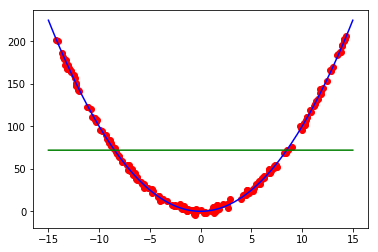

In [13]:
x_ = np.linspace(-15, 15, 160) # define axis

pred_x = np.reshape(x_, [160, 1]) # [160, ] -> [160, 1]
pred_y = clf.predict(pred_x) # predict network output given x_
fig = plt.figure() 
plt.plot(x_, x_**2, color = 'b') # plot original function
plt.scatter(x, y, color = 'r') # plot training data
plt.plot(pred_x, pred_y, 'g') # plot network output